In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import re

In [4]:
lda_30 = pd.read_csv('C:/Users/Hassan Ali/Desktop/lda_30.csv', low_memory = False)

In [14]:
lda_30[lda_30['from'] == 41078].sort_values(by=['score'],ascending=False)

Unnamed: 0   from     to     score
44703475    44703475  41078  41078  0.999910
44705419    44705419  41078  65083  0.873160
44699702    44699702  41078  20737  0.870292
44688494    44688494  41078  20709  0.851848
44719881    44719881  41078  65508  0.850034
...              ...    ...    ...       ...
44666045    44666045  41078  53965  0.167445
44680529    44680529  41078  41113  0.167445
44683250    44683250  41078  68747  0.167445
44680509    44680509  41078  29306  0.167445
44678071    44678071  41078   5636  0.167445

[56539 rows x 4 columns]

In [18]:
# load dataframes
items = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/items_cleaned.csv',encoding = "ISO-8859-1")
evaluation = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/evaluation_cleaned.csv')

#transactions = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/transactions.csv', sep = '|')
#books = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/descriptions/books_hug.csv', sep="|")

In [11]:
items

itemID                                     title.x  \
0       21310              Princess Poppy: The Big Mix Up   
1       73018              Einfach zeichnen! Step by Step   
2       40250          Meine Kindergarten-Freunde (Pirat)   
3       46107  Mein groÃes Schablonen-Buch - Wilde Tiere   
4       34217                                Ewig geliebt   
...       ...                                         ...   
74034   37678                        Timeless Fairy Tales   
74035   68688                                 Demon Games   
74036   57291                     Lori and the Lion's Den   
74037   78130                     The Everywhere Armchair   
74038   68789                           The Light Voyager   

                                                  author  \
0                                     Janey Louise Jones   
1                                          Wiebke Krabbe   
2                                                    NaN   
3                                      Elizabeth Golding   
4                                             J. R. Ward   
...                                                  ...   
74034  Brothers Grimm, Marie-Catherine Baroness D'Aulnoy   
74035                            A. Witt Timothy a. Witt   
74036                                        A. M. Glass   
74037                                         Ersila Bee   
74038                                      Mardi Orlando   

                                publisher main.topic  \
0      Penguin Random House Children's UK        YFB   
1                  Schwager und Steinlein        AGZ   
2                        Ars Edition GmbH         YB   
3                 Edition Michael Fischer       WFTM   
4                       Heyne Taschenbuch        FMR   
...                                   ...        ...   
74034                      MEDIAMORPHOSIS        YFA   
74035                           iUniverse        FMB   
74036                             Xlibris        YFU   
74037                      ELOQUENT BOOKS        YFC   
74038                 Trafford Publishing         FL   

                         subtopics  hug_article_id  \
0                              5AH      13899697.0   
1      5AJ,AGZ,WFA,YBG,YBL,YNA,YPA      39730541.0   
2               5AC,5AD,YBG,YBL,YF      23962765.0   
3       WD,WFTM,YBG,YBL,YBLD,YBLN1      35001654.0   
4        1KBB-US-NAK,FMX,FRX,3MRBF      26221111.0   
...                            ...             ...   
74034                          YFJ       9900634.0   
74035                          NaN       9901424.0   
74036                          NaN       9901450.0   
74037                      YFG,YFH       9902245.0   
74038                          NaN       9904311.0   

                                         title.y  \
0                 Princess Poppy: The Big Mix Up   
1                 Einfach zeichnen! Step by Step   
2             Meine Kindergarten-Freunde (Pirat)   
3      Mein großes Schablonen-Buch - Wilde Tiere   
4                                   Ewig geliebt   
...                                          ...   
74034                       Timeless Fairy Tales   
74035                                Demon Games   
74036                    Lori and the Lion's Den   
74037                    The Everywhere Armchair   
74038                          The Light Voyager   

                                                 authors  \
0                                     Janey Louise Jones   
1                                          Wiebke Krabbe   
2                                                    NaN   
3                                      Elizabeth Golding   
4                                             J. R. Ward   
...                                                  ...   
74034  Brothers Grimm, Marie-Catherine Baroness D'Aulnoy   
74035                            A. Witt Timothy a. Witt   
74036                                        A. M. Glass   
74037 

In [10]:
evaluation

itemID
0        12
1     45274
2     10104
3     41371
4     14015
..      ...
995   78384
996   58623
997   44964
998   12971
999   41078

[1000 rows x 1 columns]

In [19]:
# create dataframe containing only evaluation items
eval_items = items[0:0]
count = 0
for i in range(0, len(evaluation)):
    x = items[items['itemID']==evaluation['itemID'][i]]
    eval_items = eval_items.append(x, ignore_index=True)

print("Books in the evaluations.csv file: ", len(evaluation))
print("Books matched in the items.csv file: ", len(eval_items))

Books in the evaluations.csv file:  1000
Books matched in the items.csv file:  1000


In [20]:
# find percentage of books with no description
items_num = items['description'].isna().sum()
eval_num = eval_items['description'].isna().sum()
print("Percentage of books in the items_cleaned.csv file with no description: ", 100*items_num/len(items))
print("Percentage of books in the evaluation_cleaned.csv file with no description: ", 100*eval_num/len(eval_items) )

Percentage of books in the items_cleaned.csv file with no description:  23.636191736787367
Percentage of books in the evaluation_cleaned.csv file with no description:  20.9


In [21]:
# drop the rows which have no descriptions in them 
items = items.dropna(subset=['description'])
print("The items dataframe now has ",len(items), " rows.")
eval_items = eval_items.dropna(subset=['description'])
print("The eval_items dataframe now has ",len(eval_items), " rows.")

The items dataframe now has  56539  rows.
The eval_items dataframe now has  791  rows.


In [22]:
# reset index values for items and eval_items dataframes
eval_items = eval_items.reset_index()
items = items.reset_index()

In [23]:
del items['index']
items

itemID                                     title.x  \
0       21310              Princess Poppy: The Big Mix Up   
1       73018              Einfach zeichnen! Step by Step   
2       40250          Meine Kindergarten-Freunde (Pirat)   
3       46107  Mein groÃes Schablonen-Buch - Wilde Tiere   
4       34217                                Ewig geliebt   
...       ...                                         ...   
56534   22071                         The Dragon of Prali   
56535   37678                        Timeless Fairy Tales   
56536   68688                                 Demon Games   
56537   78130                     The Everywhere Armchair   
56538   68789                           The Light Voyager   

                                                  author  \
0                                     Janey Louise Jones   
1                                          Wiebke Krabbe   
2                                                    NaN   
3                                      Elizabeth Golding   
4                                             J. R. Ward   
...                                                  ...   
56534                                Davidson L. Haworth   
56535  Brothers Grimm, Marie-Catherine Baroness D'Aulnoy   
56536                            A. Witt Timothy a. Witt   
56537                                         Ersila Bee   
56538                                      Mardi Orlando   

                                publisher main.topic  \
0      Penguin Random House Children's UK        YFB   
1                  Schwager und Steinlein        AGZ   
2                        Ars Edition GmbH         YB   
3                 Edition Michael Fischer       WFTM   
4                       Heyne Taschenbuch        FMR   
...                                   ...        ...   
56534                           iUniverse        YFH   
56535                      MEDIAMORPHOSIS        YFA   
56536                           iUniverse        FMB   
56537                      ELOQUENT BOOKS        YFC   
56538                 Trafford Publishing         FL   

                         subtopics  hug_article_id  \
0                              5AH      13899697.0   
1      5AJ,AGZ,WFA,YBG,YBL,YNA,YPA      39730541.0   
2               5AC,5AD,YBG,YBL,YF      23962765.0   
3       WD,WFTM,YBG,YBL,YBLD,YBLN1      35001654.0   
4        1KBB-US-NAK,FMX,FRX,3MRBF      26221111.0   
...                            ...             ...   
56534                          NaN       9900479.0   
56535                          YFJ       9900634.0   
56536                          NaN       9901424.0   
56537                      YFG,YFH       9902245.0   
56538                          NaN       9904311.0   

                                         title.y  \
0                 Princess Poppy: The Big Mix Up   
1                 Einfach zeichnen! Step by Step   
2             Meine Kindergarten-Freunde (Pirat)   
3      Mein großes Schablonen-Buch - Wilde Tiere   
4                                   Ewig geliebt   
...                                          ...   
56534                        The Dragon of Prali   
56535                       Timeless Fairy Tales   
56536                                Demon Games   
56537                    The Everywhere Armchair   
56538                          The Light Voyager   

                                                 authors  \
0                                     Janey Louise Jones   
1                                          Wiebke Krabbe   
2                                                    NaN   
3                                      Elizabeth Golding   
4                                             J. R. Ward   
...                                                  ...   
56534                                Davidson L. Haworth   
56535  Brothers Grimm, Marie-Catherine Baroness D'Aulnoy   
56536                            A. Witt Timothy a. Witt   
56537 

In [24]:
del eval_items['index']
eval_items

itemID                                            title.x  \
0     45274                       The Dead Man in Indian Creek   
1     10104                                    The Humble Seed   
2     14015    The Man of Steel: Superman vs. the Moon Bandits   
3     28515                   Singing Innocence and Experience   
4     44234  Ein Lied, mein Leben und was sonst noch schief...   
..      ...                                                ...   
786    5357                                           Run Wild   
787   78384                            Ice Cream for Breakfast   
788   58623                                    Der ewige Krieg   
789   12971  Sharks - Read it yourself with Ladybird: Level...   
790   41078                       Jamie O'Rourke and the Pooka   

                author                           publisher main.topic  \
0    Mary Downing Hahn                          AVON BOOKS       YFCF   
1        Linda Appleby                       Linda Appleby        YFB   
2      Scott Sonneborn                    STONE ARCH BOOKS       YFCF   
3         Sonya Taaffe                               Prime         FM   
4           Tini Wider                           tredition         FB   
..                 ...                                 ...        ...   
786         Gill Lewis                Barrington Stoke Ltd        YFM   
787    Casey Gillespie         Australian Publishing House        YFQ   
788       Joe Haldeman                   Heyne Taschenbuch        FLR   
789           Ladybird  Penguin Random House Children's UK       YNNB   
790      Tomie dePaola                        PUFFIN BOOKS        YFJ   

       subtopics  hug_article_id  \
0            NaN      39798199.0   
1             YX      38442720.0   
2            XQK      19877592.0   
3            NaN       4407827.0   
4            NaN      39835033.0   
..           ...             ...   
786  5AJ,5AR,YFP      39822094.0   
787          NaN      39913511.0   
788          NaN      25702967.0   
789          YBL      23823172.0   
790          NaN       3364255.0   

                                               title.y            authors  \
0                         The Dead Man in Indian Creek  Mary Downing Hahn   
1                                      The Humble Seed      Linda Appleby   
2      The Man of Steel: Superman vs. the Moon Bandits    Scott Sonneborn   
3                     Singing Innocence and Experience       Sonya Taaffe   
4    Ein Lied, mein Leben und was sonst noch schief...         Tini Wider   
..                                                 ...                ...   
786                                           Run Wild         Gill Lewis   
787                            Ice Cream for Breakfast    Casey Gillespie   
788                                    Der ewige Krieg       Joe Haldeman   
789  Sharks - Read it yourself with Ladybird: Level...           Ladybird   
790                       Jamie O'Rourke and the Pooka      Tomie Depaola   

                                              subtitle  ...  \
0    Empfohlen von 10 bis 13 Jahren. \r\r\nLaufzeit...  ...   
1    HC gerader Rücken kaschiert. \r\r\nSprache: En...  ...   
2    Empfohlen von 8 bis 12 Jahren. \r\r\nSprache: ...  ...   
3                  Paperback. \r\r\nSprache: Englisch.  ...   
4         Auflage 1. \r\r\nHC runder Rücken kaschiert.  ...   
..                                                 ...  ...   
786  Empfohlen von 8 bis 12 Jahren. \r\r\nSprache: ...  ...   
787                Paperback. \r\r\nSprache: Englisch.  ...   
788  Roman. \r\r\nLaufzeit ca. 538 Minuten.  \r\r\n...  ...   
789                                 Sprache: Englisch.  ...   
790  Empfohlen von 5 bis 8 Jahren. \r\r\nSprache: E...  ...   

                                      shortDescription        book_type  \
0    A dead man in Indian Creek, a secret in an ant...              NaN   
1    Timothy was the best reader in his class, and ...              Na

In [4]:
# replace missing values in the books dataframe with empty strings ""  
books = books.replace(np.nan, '', regex=True)
books.head()

hug_article_id  item_id                                        title  \
0        35033685    29992                                  Gerwod VIII   
1        35033685    49539                                  Gerwod VIII   
2        34904870    34088  Mein funkelndes Stickerbuch: Meerjungfrauen   
3        37998727     7691                                 The New Bike   
4        35136977    11636             Gillbert: The Curious Mysterious   

                 authors                                           subtitle  \
0  Salvatore Treccarichi  Hanols Söhne. \r\nAuflage 9. \r\nHC runder Rüc...   
1  Salvatore Treccarichi  Hanols Söhne. \r\nAuflage 9. \r\nHC runder Rüc...   
2             Fiona Watt  Mit mehr als 250 Stickern, davon viele mit Gli...   
3          Jessie Kinder       Empfohlen ab 9 Jahre. \r\nSprache: Englisch.   
4           Art Baltazar  Empfohlen von 7 bis 10 Jahren. \r\nSprache: En...   

  age_recommendation_from age_recommendation_to  language       assortment  \
0                                                          Buch (gebunden)   
1                                                          Buch (gebunden)   
2                       5                    99                Taschenbuch   
3                                                Englisch       eBook epub   
4                       7                    10  Englisch      Taschenbuch   

                                    shortDescription book_type  price  \
0  Teramon muss in Merzen die zweite Niederlage e...            29.99   
1  Teramon muss in Merzen die zweite Niederlage e...            29.99   
2  Mit über 250 Stickern, zum Teil mit Glitzer, w...             6.95   
3  School's almost out, and Nathan wants a new bi...             3.56   
4  Young Gillbert is the prince of the underwater...            10.49   

                          availability  \
0  Lieferbar innerhalb von drei Wochen   
1  Lieferbar innerhalb von drei Wochen   
2                     Sofort lieferbar   
3          Sofort lieferbar (Download)   
4                        vorbestellbar   

                                         description         isbn  \
0  Teramon muss in Merzen die zweite Niederlage e...  9.46367e+09   
1  Teramon muss in Merzen die zweite Niederlage e...  9.46367e+09   
2  Tauche ein in das zauberhafte Reich der Meerju...  1.78941e+09   
3  School's almost out, and Nathan wants a new bi...                
4  Young Gillbert is the prince of the underwater...   1.5458e+09   

           ean pages                                    cover_image_url  
0  9.78946e+12   484  https://media2.hugendubel.de/shop/coverscans/3...  
1  9.78946e+12   484  https://media2.hugendubel.de/shop/coverscans/3...  
2  9.78179e+12    32  https://media2.hugendubel.de/shop/coverscans/3...  
3  9.78154e+12    30  https://media2.hugendubel.de/shop/coverscans/3...  
4  9.78155e+12    88  https://media2.hugendubel.de/shop/coverscans/3...

In [5]:
print(100*len(books)/len(items),"% of books of the items.csv file in the books_hug.csv file.")

pd.set_option('display.max_colwidth', None)

# check for how many books a description is available
non_zeroes = 0
for i in range(0,len(books)):
    if len(books['description'].iloc[i]) != 0:
        non_zeroes = non_zeroes + 1
print("Description available for: ", 100*non_zeroes/len(items), "% of books out of the items.csv file.")

# find number of books in the evaluation.csv file which satisfy both:
# i) being present in the books_hug.csv file 
# and
# ii) having a description
counter = 0
for i in range(0, len(evaluation)):
    if not books[books['item_id'] == evaluation.iloc[i,0]].empty:
        g = books.iloc[books[books['item_id'] == evaluation.iloc[i,0]].index.values.astype(int)[0]]['description']
        if len(g) != 0:
            counter = counter + 1

print(counter, "out of 1000 books in the evaluation.csv file have a description present in the books_hug.csv file")

91.18287838011021 % of books of the items.csv file in the books_hug.csv file.
Description available for:  76.81148276303986 % of books out of the items.csv file.
791 out of 1000 books in the evaluation.csv file have a description present in the books_hug.csv file


In [6]:
# remove characters "[,\.!?]"
books['description'] = books['description'].map(lambda x: re.sub('[,\.!?]', '', x))
# convert all letters to lower case
books['description'] = books['description'].map(lambda x: x.lower())

books['description'] = books['description'].replace("'s'", "")

In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


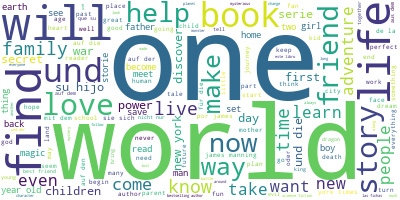

In [8]:
# visualize the most important words in the descriptions

# import the wordcloud library
import wordcloud 
from wordcloud import WordCloud

# join the different processed titles together.
long_string = ','.join(list(books['description'].values))

# create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# generate a word cloud
wordcloud.generate(long_string)

# visualize the word cloud
wordcloud.to_image()

In [9]:
pip install --upgrade gensim

Requirement already up-to-date: gensim in c:\programdata\anaconda3\lib\site-packages (4.0.1)
Note: you may need to restart the kernel to use updated packages.


In [10]:
# import natural language processing libraries
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# obtain stopwords for the following 5 languages
stop_words = stopwords.words(['english', 'german', 'spanish', 'french', 'italian'])
print(stop_words)


C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Hassan
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
a = books['description'].iloc[3]
a = a.split()
print(a)

for i in range(0,len(stop_words)):
    a = a.replace(stop_words[i],'')
    print("\n",a)
print(a)
#a.split()

["school's", 'almost', 'out', 'and', 'nathan', 'wants', 'a', 'new', 'bike', 'to', 'ride', 'during', 'the', 'long', 'summer', 'days', 'but', 'once', 'he', 'gets', 'it', 'his', 'mom', 'and', 'dad', 'give', 'him', 'a', 'list', 'of', 'rules', 'to', 'obey', 'what', 'will', 'happen', 'if', 'he', "doesn't", 'listen', 'he', "won't", 'get', 'in', 'trouble', 'as', 'long', 'as', 'they', "don't", 'know']


AttributeError: 'list' object has no attribute 'replace'

In [12]:
# define new functions
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

# create a list of the descriptions
data = books.description.values.tolist()
# tokenize the descriptions, i.e. converts sentences to lists of words
data_words = list(sent_to_words(data))
# remove stopwrods from the lists of tokens
data_words = remove_stopwords(data_words)


In [13]:
import gensim.corpora as corpora

# create a dictionary of  all uniques tokens/words 
id2word = corpora.Dictionary(data_words)
# create a corpus
# for each document, a corpus always contains each word’s token’s id along with its frequency count in the document
# doc2bow: Convert document (a list of words) into the bag-of-words format = list of (token_id, token_count) 2-tuples
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

In [14]:
# visualize all tokens and their corresponding token_ids
# this was not printing witht the regular print() function; somehow pprint() does the job
from pprint import pprint
pprint(id2word.token2id)

{'a_a': 180119,
 'a_airs': 196972,
 'a_toro': 128976,
 'aa': 16855,
 'aaa': 190751,
 'aaaaargh': 187358,
 'aaaah': 163748,
 'aaah': 13656,
 'aaand': 194156,
 'aaarrr': 145556,
 'aaasssh': 75809,
 'aabbott': 126107,
 'aabmc': 228325,
 'aachan': 64447,
 'aacharan': 131967,
 'aachen': 171679,
 'aachi': 89113,
 'aachim': 64448,
 'aad': 176855,
 'aaden': 137212,
 'aadhaarit': 43758,
 'aadhish': 210863,
 'aadhunik': 131968,
 'aado': 165584,
 'aahz': 195707,
 'aaia': 174542,
 'aaj': 43759,
 'aak': 164378,
 'aakhir': 159123,
 'aal': 78800,
 'aalen': 115291,
 'aalfeinen': 92481,
 'aalglatt': 133784,
 'aalsi': 241376,
 'aaltje': 134519,
 'aaltojen': 195009,
 'aamataur': 186629,
 'aambc': 147428,
 'aamilne': 121678,
 'aamir': 59097,
 'aamtuleeden': 145766,
 'aamu': 61167,
 'aamulla': 236531,
 'aan': 22252,
 'aandil': 102977,
 'aandor': 112098,
 'aandringen': 39677,
 'aane': 169192,
 'aang': 61614,
 'aangaat': 87695,
 'aangedaan': 184065,
 'aangenaam': 155338,
 'aangenomen': 93063,
 'aangeraak': 1

 'ablazeand': 121786,
 'ablazeto': 155307,
 'able': 843,
 'ableben': 27057,
 'ablebound': 231862,
 'abled': 86403,
 'ablegen': 36387,
 'ableger': 148806,
 'ablegte': 73655,
 'ablehnen': 45499,
 'ablehnend': 232353,
 'ablehnt': 85189,
 'ablehnung': 74033,
 'ableismus': 177367,
 'ableisten': 150319,
 'ableiten': 59500,
 'ablenken': 85146,
 'ablenkend': 169640,
 'ablenkung': 36233,
 'ablenkungen': 92618,
 'ablesen': 154101,
 'ablest': 123430,
 'ablief': 64883,
 'abliefern': 41732,
 'abliefert': 160094,
 'ablieferung': 174336,
 'ablo': 92882,
 'ablon': 122889,
 'ablosbar': 54556,
 'ablosbare': 28382,
 'ablosbaren': 61054,
 'ablosen': 16473,
 'ablosung': 189553,
 'abluchst': 183683,
 'ably': 140578,
 'abmachung': 43719,
 'abmachungen': 130446,
 'abmalen': 521,
 'abmessen': 87093,
 'abnahm': 66024,
 'abnahme': 150698,
 'abnaturlich': 147660,
 'abnegation': 13229,
 'abnegazione': 181327,
 'abnehmen': 21575,
 'abneigung': 27456,
 'abneigungen': 213634,
 'abner': 204067,
 'abnett': 14747,
 'abn

 'accepts': 39707,
 'acceptsas': 239707,
 'acceptsonly': 189966,
 'acceptthe': 165435,
 'accerchiati': 72205,
 'acces': 129041,
 'accesible': 201158,
 'acceso': 33566,
 'access': 28872,
 'accessed': 48994,
 'accesses': 143560,
 'accessibility': 137646,
 'accessible': 5663,
 'accessibly': 174537,
 'accessing': 72642,
 'accesso': 118077,
 'accessoire': 232206,
 'accessoires': 11352,
 'accessories': 53684,
 'accessory': 17260,
 'accettare': 72206,
 'accettataquesti': 182700,
 'accettato': 235929,
 'accettazione': 126044,
 'accettera': 211928,
 'acchee': 169193,
 'acci': 65223,
 'acciaio': 225374,
 'accident': 2448,
 'accidentado': 66835,
 'accidental': 6903,
 'accidentales': 87640,
 'accidentally': 3261,
 'accidentalmente': 81546,
 'accidentand': 127094,
 'accidentat': 96231,
 'accidentbrennan': 221429,
 'accidente': 31872,
 'accidenthe': 74459,
 'accidentin': 127999,
 'accidently': 14007,
 'accidentmas': 185451,
 'accidentnow': 168307,
 'accidents': 33853,
 'accidentsin': 164847,
 'accid

 'adeliger': 65143,
 'adelin': 226244,
 'adelina': 82443,
 'adelinas': 142747,
 'adeline': 111412,
 'adelma': 54068,
 'adelman': 161381,
 'adelphi': 36535,
 'adels': 23302,
 'adelsfamilie': 128123,
 'adelsfamilien': 67566,
 'adelsfeste': 157345,
 'adelsflickan': 154116,
 'adelsgeschlecht': 139342,
 'adelshauser': 67567,
 'adelshausern': 79151,
 'adelskaste': 152237,
 'adelslande': 201086,
 'adelsschnosel': 46034,
 'adelssitz': 202336,
 'adelsslektene': 211844,
 'adelsspross': 181691,
 'adelstitel': 179962,
 'adelstochter': 71210,
 'adelsund': 236734,
 'adelsverein': 26531,
 'adelt': 93913,
 'adem': 188448,
 'ademas': 25314,
 'adems': 34609,
 'aden': 3635,
 'adena': 194907,
 'adenas': 194908,
 'adenauer': 19387,
 'adendigaeth': 110140,
 'adendrohahkis': 171694,
 'adennan': 218821,
 'adentra': 131713,
 'adentran': 159008,
 'adentrana': 99050,
 'adentraran': 234902,
 'adentrarse': 199276,
 'adentrate': 212869,
 'adentres': 182349,
 'adentro': 52475,
 'adentur': 218822,
 'adept': 11531,
 '

 'afeta': 126118,
 'afetado': 233371,
 'afetos': 117668,
 'aff': 203548,
 'affable': 221614,
 'affaibli': 18147,
 'affair': 23913,
 'affairbuy': 27762,
 'affaire': 31356,
 'affaires': 106698,
 'affairfor': 234549,
 'affairs': 9751,
 'affairtintin': 67725,
 'affamate': 228386,
 'affamato': 97902,
 'affare': 37279,
 'affaren': 62423,
 'affarens': 207571,
 'affarewie': 219615,
 'affascina': 185254,
 'affascinante': 48132,
 'affascinanti': 73939,
 'affascinare': 145242,
 'affascinate': 114356,
 'affascinati': 127938,
 'affchen': 14649,
 'affchens': 93851,
 'affe': 67693,
 'affect': 16087,
 'affecta': 147011,
 'affected': 58241,
 'affectent': 244441,
 'affectif': 74166,
 'affecting': 22458,
 'affection': 24275,
 'affectionate': 27488,
 'affectionately': 38111,
 'affectionbut': 238938,
 'affectionor': 218890,
 'affections': 3027,
 'affective': 241486,
 'affects': 29387,
 'affen': 14670,
 'affenahnliche': 93728,
 'affenahnlichen': 136297,
 'affenart': 24877,
 'affenbanden': 234388,
 'affenbro

 'aguilar': 65770,
 'aguilas': 169160,
 'aguilucho': 239615,
 'aguirre': 79647,
 'aguiva': 104010,
 'aguja': 192956,
 'agujero': 172322,
 'agundure': 65287,
 'agung': 170500,
 'agunta': 231691,
 'agus': 55774,
 'agustin': 210196,
 'agustina': 187882,
 'agustn': 110377,
 'agusto': 15429,
 'agutak': 197852,
 'agwe': 221712,
 'agwo': 148738,
 'agwu': 240084,
 'agyaba': 174472,
 'agyani': 134949,
 'agymosas': 198448,
 'agymosasnak': 198449,
 'agypten': 38798,
 'agyptenals': 213917,
 'agyptens': 49981,
 'agyptensim': 128260,
 'agyptenurlaubs': 240283,
 'agypter': 27003,
 'agypterin': 174978,
 'agypters': 185300,
 'agyptische': 60165,
 'agyptischen': 53172,
 'agyptischer': 110537,
 'agyptologe': 61330,
 'agyptologen': 160029,
 'agyptologie': 234185,
 'ah': 28045,
 'aha': 63296,
 'ahab': 124173,
 'ahacco': 141818,
 'ahaccos': 141819,
 'ahambe': 122788,
 'ahar': 88238,
 'aharon': 14750,
 'ahasver': 104140,
 'ahati': 193201,
 'ahaus': 243091,
 'ahayd': 165585,
 'ahdieh': 99186,
 'ahdiehadraa': 

 'alapul': 205778,
 'alapulo': 205779,
 'alapvetoen': 205780,
 'alar': 215058,
 'alara': 110801,
 'alarc': 104505,
 'alarcon': 223165,
 'alari': 131508,
 'alaric': 66110,
 'alarics': 215125,
 'alarid': 19809,
 'alaridos': 215254,
 'alarik': 239778,
 'alaris': 43602,
 'alarisalaris': 222328,
 'alarm': 14086,
 'alarma': 193446,
 'alarmaber': 207461,
 'alarmed': 3265,
 'alarmen': 216657,
 'alarmglocken': 201713,
 'alarmierende': 199715,
 'alarmiert': 18645,
 'alarming': 22564,
 'alarmingly': 52217,
 'alarmkids': 102131,
 'alarmknopf': 193235,
 'alarms': 45254,
 'alarmsirene': 188361,
 'alarmstufe': 77002,
 'alarmzustand': 216658,
 'alaron': 99851,
 'alarums': 235184,
 'alarvail': 235355,
 'alarya': 187276,
 'alas': 15181,
 'alasan': 160957,
 'alasannyapara': 235381,
 'alasar': 197139,
 'alasars': 77626,
 'alasca': 74674,
 'alasdair': 57581,
 'alasdairs': 85679,
 'alaska': 6177,
 'alaskait': 142180,
 'alaskan': 5273,
 'alaskana': 102839,
 'alaskanachdem': 186148,
 'alaskas': 37153,
 'alask

 'aliveonly': 180211,
 'aliveset': 97969,
 'aliveshades': 166869,
 'aliveshanghai': 215754,
 'alivethe': 117994,
 'alivethey': 165466,
 'alivetintin': 67726,
 'alivetui': 80667,
 'alivewhile': 217634,
 'alivewill': 176448,
 'alivewith': 36226,
 'aliveyale': 61475,
 'aliveyou': 60132,
 'alivia': 45906,
 'aliviar': 85046,
 'aliwapenda': 126376,
 'alix': 102377,
 'alixxa': 169907,
 'aliya': 5775,
 'aliyah': 114430,
 'aliza': 60228,
 'alizebeth': 75176,
 'aljamin': 57215,
 'aljan': 114377,
 'aljanna': 201039,
 'aljascha': 19613,
 'aljonur': 124466,
 'alkaa': 83074,
 'alkad': 58054,
 'alkahest': 132499,
 'alkaios': 198901,
 'alkalmazkodtak': 1197,
 'alkaneet': 34848,
 'alkavat': 215545,
 'alkemist': 168808,
 'alkimos': 45273,
 'alkis': 213533,
 'alkje': 83128,
 'alkmene': 190621,
 'alkohol': 11035,
 'alkoholfahne': 244644,
 'alkoholiker': 133492,
 'alkoholisierten': 134345,
 'alkoholismus': 56895,
 'alkoholkonsum': 112125,
 'alkoholkranke': 196992,
 'alkoholkranken': 244317,
 'alkohollaune'

 'alphatier': 51707,
 'alphavampir': 141439,
 'alphavul': 129352,
 'alphawolf': 9645,
 'alphawolfen': 9646,
 'alphawolfes': 121215,
 'alphebetize': 221607,
 'alphega': 38527,
 'alphonse': 227752,
 'alphonsus': 196353,
 'alpi': 144572,
 'alpin': 133044,
 'alpina': 184063,
 'alpine': 38280,
 'alpines': 38281,
 'alpinist': 114839,
 'alpino': 169900,
 'alppain': 195324,
 'alppien': 23738,
 'alpreni': 128978,
 'alps': 2270,
 'alptraum': 15135,
 'alptraumdoch': 195939,
 'alptraume': 2833,
 'alptraumedu': 210985,
 'alptraumen': 39966,
 'alptraumhafte': 111170,
 'alptraumhaften': 124958,
 'alptraumhaftes': 199458,
 'alptraums': 212290,
 'alptraumwesen': 16498,
 'alquanto': 36555,
 'alraunen': 216985,
 'already': 1781,
 'alreadybut': 109414,
 'alreadywhen': 60725,
 'alrededor': 8312,
 'alrededores': 31529,
 'alric': 218029,
 'alright': 20866,
 'alrightbut': 135115,
 'alrik': 47554,
 'alrion': 96923,
 'alrnira': 77682,
 'alsace': 120165,
 'alsaid': 55049,
 'alsatian': 216513,
 'alsatiania': 1293

 'amenera': 78341,
 'amenes': 206407,
 'amenhotep': 134145,
 'amenidades': 150340,
 'amenin': 168019,
 'ameninta': 211207,
 'amenita': 102925,
 'amenities': 79611,
 'amenn': 213807,
 'ameno': 96157,
 'amenophis': 134146,
 'amenous': 74090,
 'amense': 242503,
 'amentson': 196988,
 'amentsononce': 208493,
 'amenunua': 149620,
 'amephirous': 212294,
 'amer': 206165,
 'amera': 132267,
 'ameranno': 237911,
 'ameres': 109623,
 'amerete': 169091,
 'ameri': 47156,
 'america': 2959,
 'americaan': 160869,
 'americaand': 199085,
 'americaboth': 176377,
 'americadie': 104924,
 'americafs': 29898,
 'americahe': 78155,
 'americain': 60100,
 'americaines': 71368,
 'americains': 143791,
 'americaisobel': 158023,
 'americamr': 41934,
 'american': 176,
 'americana': 92983,
 'americanabecome': 224598,
 'americanaidd': 144106,
 'americanas': 73539,
 'americane': 243957,
 'americanindians': 244846,
 'americano': 8313,
 'americans': 6582,
 'americansbut': 92683,
 'americapeople': 169533,
 'americapop': 2031

 'andarr': 59010,
 'andarra': 232790,
 'andarsene': 62686,
 'andas': 151668,
 'andasse': 116050,
 'andata': 224090,
 'andate': 201199,
 'andati': 78996,
 'andato': 188404,
 'andauern': 45306,
 'andauernd': 110893,
 'andauernde': 99880,
 'andauerndem': 147165,
 'andauernden': 26406,
 'andauernder': 179022,
 'andauert': 70459,
 'andauertals': 140660,
 'andavarsdottir': 176415,
 'andawyr': 208166,
 'andb': 10498,
 'andbecomes': 132956,
 'andcoco': 198375,
 'andcombines': 112927,
 'andcoming': 7021,
 'andcurrently': 129677,
 'anddavid': 131963,
 'anddeadly': 238030,
 'anddeath': 211921,
 'anddefeat': 164001,
 'anddestroy': 128680,
 'ande': 231358,
 'andean': 58565,
 'andease': 46693,
 'andechs': 232460,
 'andeck': 12217,
 'andeddie': 71108,
 'andel': 105376,
 'andele': 178097,
 'andelighed': 153792,
 'anden': 85288,
 'andenken': 48340,
 'andenkt': 75103,
 'andentalern': 239436,
 'andentertainer': 180233,
 'anderax': 161797,
 'anderedie': 189584,
 'anderendas': 242341,
 'anderendoch': 4789,

 'angreifers': 223283,
 'angreift': 9647,
 'angrell': 220417,
 'angrenzende': 21222,
 'angrenzenden': 16928,
 'angrepp': 204642,
 'angrer': 138874,
 'angrier': 7520,
 'angriest': 70133,
 'angriff': 13265,
 'angriffe': 5206,
 'angriffen': 26432,
 'angriffes': 35507,
 'angriffs': 50809,
 'angriffskeile': 149911,
 'angriffskrafte': 167208,
 'angriffskreuzer': 135984,
 'angriffskrieges': 239391,
 'angriffslustige': 245005,
 'angriffsmodus': 168673,
 'angriffsplane': 230487,
 'angriffswelle': 17163,
 'angriffsziel': 227514,
 'angrily': 37342,
 'angrinsen': 244356,
 'angron': 102745,
 'angronia': 85831,
 'angrons': 143736,
 'angrosaurus': 147225,
 'angrosch': 98096,
 'angroschs': 98097,
 'angry': 4099,
 'angryhe': 157364,
 'angrythe': 70834,
 'angrythis': 201398,
 'angrywhy': 196603,
 'angst': 9202,
 'angstaanjagende': 39678,
 'angstaus': 149974,
 'angste': 1951,
 'angsteinfloßend': 85833,
 'angstelsenmaßig': 96012,
 'angsten': 12645,
 'angstenbis': 128181,
 'angsterfullt': 131747,
 'angster

 'anschließendem': 231501,
 'anschließenden': 10651,
 'anschließender': 70433,
 'anschließendoch': 242828,
 'anschließendum': 83795,
 'anschließt': 55338,
 'anschloss': 153252,
 'anschluss': 24761,
 'anschnallen': 81094,
 'anschreit': 154259,
 'anschrift': 176825,
 'anschriften': 130263,
 'anschuldigung': 135681,
 'anschuldigungen': 91442,
 'anschwellender': 126337,
 'ansegwe': 192017,
 'ansehe': 215748,
 'ansehen': 21057,
 'ansehnliche': 244466,
 'ansel': 49149,
 'ansell': 187570,
 'anselm': 65606,
 'anselmo': 141983,
 'ansenar': 218477,
 'anseris': 107671,
 'ansetzen': 53473,
 'ansetzt': 141009,
 'ansgar': 141397,
 'anshan': 168848,
 'anshedar': 96478,
 'ansia': 99123,
 'ansiada': 146439,
 'ansiado': 214369,
 'ansicht': 13940,
 'ansichten': 55298,
 'ansichtwar': 120620,
 'ansie': 195001,
 'ansiedad': 114746,
 'ansiedeln': 161894,
 'ansiedlung': 190110,
 'ansiehst': 129519,
 'ansieht': 67068,
 'ansigt': 212086,
 'ansikt': 183949,
 'ansing': 79162,
 'ansingdas': 166629,
 'ansinnen': 15

 'anzusagen': 182434,
 'anzuschaffen': 206039,
 'anzuschauen': 58952,
 'anzuschlie': 20036,
 'anzuschließen': 4200,
 'anzuschmachten': 176999,
 'anzuschreiben': 73146,
 'anzuschwarzen': 109897,
 'anzusehen': 41161,
 'anzusehenvoller': 185841,
 'anzusiedeln': 91973,
 'anzusprechen': 115711,
 'anzustarren': 103824,
 'anzustecken': 165762,
 'anzustellen': 59011,
 'anzustoßen': 182049,
 'anzustreben': 89385,
 'anzustrengen': 209536,
 'anzutreffen': 46051,
 'anzutreten': 13591,
 'anzutretender': 237958,
 'anzutretener': 239330,
 'anzutun': 70862,
 'anzuvertrauen': 74424,
 'anzuwenden': 53191,
 'anzuziehen': 73087,
 'anzuzweifeln': 215418,
 'anzweifeln': 64120,
 'anzweifelten': 163163,
 'ao': 15662,
 'aoba': 209472,
 'aodhan': 92264,
 'aodren': 128660,
 'aodunon': 106532,
 'aoeberleben': 109369,
 'aoelyn': 64304,
 'aoeron': 100483,
 'aoi': 160228,
 'aoki': 17643,
 'aokigahara': 80205,
 'aol': 67350,
 'aolene': 226011,
 'aoleyn': 186427,
 'aoleyns': 205687,
 'aomel': 177805,
 'aon': 64593,
 '

 'aquel': 75902,
 'aquela': 51009,
 'aquelarre': 57993,
 'aquele': 104040,
 'aqueles': 93339,
 'aquella': 244472,
 'aquellas': 167108,
 'aquello': 75903,
 'aquellos': 87642,
 'aquem': 231360,
 'aquesta': 139668,
 'aqui': 57955,
 'aquila': 110510,
 'aquilla': 85505,
 'aquilo': 168364,
 'aquilonia': 113678,
 'aquino': 117942,
 'aquinoktium': 140782,
 'aquintien': 66406,
 'aquinzische': 66407,
 'aquired': 208328,
 'aquitaine': 186317,
 'aquitania': 163318,
 'aquitanien': 112048,
 'aquora': 160864,
 'aqwikatoql': 174828,
 'ar': 2183,
 'ar_yorlar': 119183,
 'ara': 29984,
 'araa': 233741,
 'arab': 82463,
 'araba': 55957,
 'arabasi': 89778,
 'arabasina': 89779,
 'arabasinin': 89780,
 'arabel': 66545,
 'arabella': 40702,
 'arabelle': 231845,
 'araber': 95338,
 'araberaforma': 92512,
 'araberheer': 223759,
 'araberhengste': 187475,
 'arabers': 97824,
 'araberstute': 78213,
 'arabesque': 160945,
 'arabia': 23704,
 'arabiain': 144283,
 'arabian': 40713,
 'arabic': 36839,
 'arabiel': 81433,
 'arab

 'arianrod': 47883,
 'arians': 92265,
 'arianus': 228655,
 'arianwyn': 91477,
 'ariarcus': 213064,
 'arias': 176199,
 'aribella': 117884,
 'aric': 97816,
 'arica': 146342,
 'arid': 62803,
 'arida': 78431,
 'aridain': 188994,
 'aridien': 217713,
 'arie': 190532,
 'ariel': 64775,
 'ariella': 28274,
 'arielle': 1137,
 'arielledieser': 217780,
 'ariels': 219765,
 'arien': 21706,
 'arienna': 168516,
 'ariens': 207878,
 'ariensischen': 187375,
 'arier': 86658,
 'aries': 101289,
 'arif': 31606,
 'arightand': 204461,
 'arik': 198980,
 'arika': 202836,
 'arikanern': 237223,
 'ariki': 129258,
 'arima': 28308,
 'ariman': 208571,
 'arimea': 163075,
 'arimeaner': 22482,
 'arimeanische': 22483,
 'arimeanischen': 163076,
 'arimeanischer': 51684,
 'arimeas': 22484,
 'arin': 91137,
 'arina': 164203,
 'aring': 181540,
 'arinndier': 155957,
 'ario': 148744,
 'aripa': 211209,
 'aripi': 78510,
 'aris': 111116,
 'arisa': 177846,
 'arise': 12908,
 'arisen': 61949,
 'arises': 7638,
 'arisesabriel': 141730,
 '

 'artistanastasia': 125877,
 'artistas': 33574,
 'artiste': 59181,
 'artisten': 142261,
 'artistes': 45619,
 'artisti': 118085,
 'artistic': 13057,
 'artistica': 126519,
 'artistically': 219805,
 'artisticas': 221499,
 'artistiche': 50031,
 'artistici': 185395,
 'artistico': 174040,
 'artisticos': 176347,
 'artistin': 108496,
 'artistique': 180077,
 'artistiques': 71103,
 'artistliving': 171452,
 'artistpublisher': 55628,
 'artistry': 117784,
 'artists': 19810,
 'artistskate': 24675,
 'artisttold': 208185,
 'artistwhile': 134282,
 'artistwith': 104233,
 'artjom': 124380,
 'artjoms': 124381,
 'artjunow': 192698,
 'artkreativbuch': 234808,
 'artleserstimmen': 154969,
 'artless': 82736,
 'artmann': 94560,
 'artnow': 188980,
 'artnus': 73617,
 'arto': 235205,
 'artok': 23515,
 'artorius': 230900,
 'artos': 244280,
 'arts': 859,
 'artsa': 131860,
 'artsaber': 217878,
 'artsamantha': 244985,
 'artshe': 242298,
 'artsthe': 158035,
 'artsy': 184624,
 'artthe': 136624,
 'artthis': 173526,
 'art

 'astaras': 181833,
 'astarhe': 101928,
 'astaroth': 143294,
 'astartes': 14753,
 'astarteskrieger': 165971,
 'astazi': 162028,
 'astazicolonelul': 168022,
 'astazidoborat': 185151,
 'astaziinca': 31960,
 'aste': 134055,
 'asteara': 157499,
 'asteg': 202157,
 'asten': 49793,
 'astenryk': 242826,
 'asteptand': 211210,
 'asteptata': 159743,
 'aster': 47510,
 'asteri': 46194,
 'asteria': 61578,
 'asterikthe': 18480,
 'asterio': 21499,
 'asterion': 121293,
 'asterions': 142450,
 'asterios': 132123,
 'asterisk': 214595,
 'asterix': 19751,
 'astern': 100888,
 'asteroid': 552,
 'asteroide': 31532,
 'asteroiden': 37958,
 'asteroidenfelds': 179551,
 'asteroidensturm': 208529,
 'asteroids': 553,
 'asteroidswill': 240758,
 'astfalk': 159891,
 'astfel': 31961,
 'asthar': 227472,
 'asthe': 81528,
 'asthetik': 116184,
 'asthetisch': 134793,
 'asthetische': 104097,
 'asthetischen': 111990,
 'asthma': 104881,
 'asthmatic': 44200,
 'asti': 181711,
 'astic': 115239,
 'astin': 63127,
 'astir': 63264,
 'a

 'attentions': 106221,
 'attentionthis': 92751,
 'attentionwhen': 75083,
 'attentive': 69971,
 'attentively': 134231,
 'attentiveness': 146023,
 'attento': 187535,
 'attenuarne': 156388,
 'attenzione': 92005,
 'attenzionenon': 213505,
 'atterrissage': 136096,
 'attesa': 51639,
 'attese': 234734,
 'atteso': 35536,
 'attestano': 229448,
 'attested': 121764,
 'atthe': 22049,
 'atti': 43594,
 'attic': 11889,
 'atticnow': 196658,
 'attics': 103209,
 'atticus': 17111,
 'attila': 96833,
 'attilas': 219918,
 'attimi': 201201,
 'attingendo': 49352,
 'attingere': 35537,
 'attira': 166954,
 'attirance': 129042,
 'attirant': 68217,
 'attirare': 103964,
 'attire': 52502,
 'attired': 111898,
 'attiree': 152551,
 'attirer': 225081,
 'attis': 72447,
 'attise': 89122,
 'attisee': 239221,
 'attitude': 4514,
 'attitudea': 187326,
 'attitudedisney': 134167,
 'attitudefilled': 199144,
 'attitudeif': 167480,
 'attitudekurze': 126190,
 'attitudeperfect': 200512,
 'attitudes': 24484,
 'attitudethe': 70180,
 '

 'aufruhrend': 180290,
 'aufruhrengland': 95417,
 'aufruhrer': 129304,
 'aufruhrerische': 233683,
 'aufruhrerischen': 218305,
 'aufruhrerischer': 214932,
 'aufruhrs': 182262,
 'aufrustung': 80506,
 'aufruttelnd': 79033,
 'aufruttelnde': 131238,
 'aufruttelnden': 112858,
 'aufruttelnder': 143659,
 'aufs': 4362,
 'aufsagen': 186311,
 'aufsah': 152907,
 'aufsammeln': 97002,
 'aufsassigen': 148114,
 'aufsassigkeit': 82948,
 'aufsatz': 54525,
 'aufsatze': 100577,
 'aufsatzen': 200312,
 'aufsatzes': 133055,
 'aufsaugen': 230292,
 'aufsaugte': 60700,
 'aufsblut': 130851,
 'aufschauen': 230821,
 'aufscheuchen': 216725,
 'aufschlagen': 51302,
 'aufschlagst': 204230,
 'aufschlagt': 125971,
 'aufschließt': 215601,
 'aufschlitzt': 163333,
 'aufschlug': 215602,
 'aufschlugen': 158255,
 'aufschluss': 20988,
 'aufschlusseln': 141938,
 'aufschlusselung': 243658,
 'aufschlussreich': 91586,
 'aufschlußreiche': 185006,
 'aufschnappen': 108403,
 'aufschneiden': 149820,
 'aufschneider': 53441,
 'aufschnitt

 'ausgeloschter': 133324,
 'ausgelost': 19676,
 'ausgelosten': 90973,
 'ausgeloster': 117157,
 'ausgelotet': 118533,
 'ausgemacht': 170124,
 'ausgemachte': 200746,
 'ausgemachten': 153232,
 'ausgemalt': 9405,
 'ausgemalten': 140369,
 'ausgemerzt': 192615,
 'ausgemustert': 196982,
 'ausgemusterter': 186224,
 'ausgenuchtert': 194046,
 'ausgenutzt': 14111,
 'ausgepackt': 193876,
 'ausgepeitscht': 60747,
 'ausgepragt': 42045,
 'ausgepragte': 182088,
 'ausgepragtem': 233583,
 'ausgepragten': 88639,
 'ausgepragter': 168813,
 'ausgepragteren': 238010,
 'ausgepragteres': 230293,
 'ausgepragtes': 121234,
 'ausgeraubt': 76701,
 'ausgeraumten': 205590,
 'ausgerechnet': 4202,
 'ausgereiftes': 123718,
 'ausgereizt': 123512,
 'ausgerichtet': 94186,
 'ausgerichteten': 193231,
 'ausgerichteter': 211550,
 'ausgerissen': 88909,
 'ausgerissenen': 194051,
 'ausgerottet': 20491,
 'ausgerottete': 57437,
 'ausgerotteten': 236502,
 'ausgerufen': 55561,
 'ausgerustet': 26074,
 'ausgerustete': 149913,
 'ausgeru

 'authorcat': 79384,
 'authorcontrary': 94580,
 'authorcupid': 72876,
 'authordad': 188140,
 'authordestiny': 62628,
 'authordiscover': 225132,
 'authordisplaced': 60410,
 'authored': 50593,
 'authorer': 107828,
 'authoreveryone': 74530,
 'authorfeni': 164295,
 'authorgustas': 160911,
 'authorhe': 53103,
 'authorhillary': 225983,
 'authorhope': 182978,
 'authorhouse': 244961,
 'authorhow': 242323,
 'authorial': 74150,
 'authorin': 91452,
 'authoring': 67033,
 'authorised': 93777,
 'authorit': 82711,
 'authoritarian': 33203,
 'authoritative': 18786,
 'authorities': 13133,
 'authoritiesor': 70134,
 'authority': 17847,
 'authoritynote': 25448,
 'authoritywould': 234291,
 'authorization': 76596,
 'authorized': 72448,
 'authorjames': 123431,
 'authorjane': 156762,
 'authorjohn': 133572,
 'authorjonah': 108120,
 'authorlauren': 137304,
 'authorlost': 143250,
 'authormaggie': 224263,
 'authormede': 90347,
 'authormining': 112790,
 'authormiss': 67252,
 'authornaila': 137074,
 'authornew': 161

 'awardsfor': 63825,
 'awardsgrandpa': 124709,
 'awardsmaddox': 215076,
 'awardsmeet': 111640,
 'awardsno': 205510,
 'awardsover': 83970,
 'awardsthe': 127808,
 'awardsthis': 230760,
 'awardstm': 212473,
 'awardthe': 63477,
 'awardthis': 136031,
 'awardtrina': 137418,
 'awardtwelve': 209191,
 'awardvi': 122618,
 'awardvisit': 166563,
 'awardwhat': 237934,
 'awardwinner': 130380,
 'awardwinning': 191579,
 'aware': 2693,
 'awareand': 159996,
 'awareness': 15888,
 'awarenessself': 176489,
 'awarenessthe': 169427,
 'awarenesswhy': 121601,
 'awarenss': 117283,
 'awarethe': 54458,
 'awarness': 238418,
 'awash': 88640,
 'away': 461,
 'awayand': 186232,
 'awayanother': 125593,
 'awaybeverly': 167983,
 'awaybut': 127931,
 'awaycan': 213880,
 'awaydesperate': 160144,
 'awaydetermined': 216124,
 'awaydevi': 33786,
 'awayearth': 202017,
 'awayeighteen': 183494,
 'awayepisode': 222544,
 'awayexineke': 122789,
 'awayfar': 183557,
 'awayforcibly': 171125,
 'awayfrom': 96287,
 'awayhe': 114568,
 'away

 'baghe': 164659,
 'bagheera': 86178,
 'baghira': 221579,
 'bagi': 160958,
 'bagian': 242903,
 'bagieu': 130279,
 'bagil': 43769,
 'bagins': 243475,
 'bagirir': 89785,
 'baglantilar': 42695,
 'baglantisi': 89786,
 'bagley': 91990,
 'baglieto': 79652,
 'bagliore': 139116,
 'bagnata': 236708,
 'bagne': 98364,
 'bagno': 72746,
 'bagnon': 132502,
 'bago': 192976,
 'bagoon': 210631,
 'bagpiper': 130057,
 'bagpipes': 41474,
 'bagram': 85989,
 'bags': 17828,
 'bagtess': 94370,
 'bagthorpe': 178634,
 'bague': 132503,
 'baguette': 232349,
 'bagus': 2118,
 'baha': 195409,
 'bahala': 77785,
 'bahalyr': 223123,
 'bahamas': 49750,
 'bahamut': 123976,
 'bahar': 79268,
 'bahasa': 242904,
 'bahawa': 13366,
 'bahn': 25026,
 'bahnbrechende': 37959,
 'bahnbrechenden': 88487,
 'bahnbrechendes': 188061,
 'bahndoch': 141375,
 'bahne': 76377,
 'bahnen': 25524,
 'bahnenemma': 13722,
 'bahnfahrten': 25415,
 'bahnfans': 88842,
 'bahnhof': 42544,
 'bahnhofe': 186164,
 'bahnhofen': 155763,
 'bahnhofs': 92647,
 'b

 'baran': 137568,
 'barande': 212799,
 'baranil': 168715,
 'baranuik': 163818,
 'baraqiel': 89028,
 'baraspektrum': 242905,
 'barata': 236807,
 'barataiddal': 174474,
 'baratheon': 22587,
 'baratheons': 104902,
 'baratja': 136392,
 'baratnoje': 136393,
 'baratnok': 219633,
 'baratonea': 179490,
 'baratro': 196917,
 'baratsagrol': 225783,
 'barauk': 230979,
 'baraz': 214465,
 'barb': 51353,
 'barba': 177970,
 'barbadian': 8560,
 'barbadicane': 179273,
 'barbados': 8561,
 'barbar': 52762,
 'barbara': 24281,
 'barbare': 22687,
 'barbarei': 58498,
 'barbarella': 97497,
 'barbaren': 52763,
 'barbarenhorde': 21258,
 'barbarenhorden': 120284,
 'barbarenkrieger': 79537,
 'barbarenprinz': 233907,
 'barbares': 226644,
 'barbari': 169947,
 'barbarian': 41906,
 'barbarians': 41907,
 'barbaric': 21628,
 'barbarically': 194228,
 'barbarie': 169948,
 'barbarin': 130553,
 'barbarische': 68439,
 'barbarischen': 91552,
 'barbarism': 15015,
 'barbarismone': 60977,
 'barbaro': 87057,
 'barbaroi': 176086,


 'bato': 29233,
 'batoche': 225554,
 'batohu': 166782,
 'batol': 214418,
 'batols': 214419,
 'baton': 41524,
 'batorsagat': 175979,
 'batracio': 236851,
 'batran': 78512,
 'bats': 14537,
 'batshit': 234165,
 'batson': 211519,
 'batsto': 40824,
 'batsu': 104682,
 'battaglia': 49684,
 'battaglie': 62153,
 'battaglione': 241707,
 'battalion': 10247,
 'battalions': 171165,
 'battants': 114129,
 'battava': 138614,
 'battavischen': 138615,
 'batted': 62811,
 'batten': 84970,
 'battent': 172011,
 'batter': 4016,
 'battered': 2960,
 'batterie': 144329,
 'batterien': 11589,
 'batteries': 148386,
 'batteriewechsel': 182204,
 'battering': 81294,
 'batters': 137533,
 'battersby': 190719,
 'battersea': 69868,
 'battersi': 151480,
 'batterwelcome': 2802,
 'battery': 73542,
 'batteva': 201203,
 'battily': 54379,
 'batting': 55621,
 'battista': 5490,
 'battito': 78123,
 'battl': 161318,
 'battle': 5778,
 'battleand': 190850,
 'battleas': 224397,
 'battlecruiser': 146004,
 'battlecruisers': 168566,
 'b

 'bedient': 27303,
 'bediente': 78190,
 'bedienten': 106766,
 'bedientendie': 211734,
 'bedienung': 124652,
 'bedin': 150034,
 'bedinger': 183247,
 'bedingt': 119780,
 'bedingte': 155281,
 'bedingung': 52450,
 'bedingungen': 26275,
 'bedingungenes': 156682,
 'bedingungensie': 238522,
 'bedingungslos': 37182,
 'bedingungslose': 130727,
 'bedingungslosen': 85198,
 'bedingungsloser': 47613,
 'bedingungsloses': 90256,
 'bedjack': 208364,
 'bedlam': 23614,
 'bedler': 169466,
 'bedloe': 54435,
 'bednye': 120680,
 'bedo': 41277,
 'bedoeld': 163760,
 'bedon': 208985,
 'bedouin': 82415,
 'bedouins': 159692,
 'bedpost': 111930,
 'bedraggled': 3266,
 'bedrangen': 82407,
 'bedrangend': 161085,
 'bedrangnis': 55650,
 'bedrangnisdie': 241812,
 'bedrangt': 20196,
 'bedrangte': 236122,
 'bedrangten': 128559,
 'bedre': 135647,
 'bedreiging': 229383,
 'bedreigtals': 112141,
 'bedrenez': 128841,
 'bedrest': 99341,
 'bedridden': 76519,
 'bedrifter': 35220,
 'bedrock': 98988,
 'bedrohen': 5209,
 'bedrohena

 'begrundung': 59534,
 'begrunen': 226592,
 'begrußen': 65881,
 'begrußt': 51118,
 'begrußte': 8430,
 'begrußung': 126341,
 'begrußungen': 173642,
 'begrußungsrede': 147536,
 'begs': 14234,
 'beguile': 148067,
 'beguiled': 163602,
 'beguiling': 72952,
 'begun': 7714,
 'beguna': 129229,
 'begunafter': 217211,
 'begunan': 84022,
 'begunand': 131602,
 'begunanger': 217937,
 'begunashlord': 80571,
 'begunbear': 220308,
 'begunevents': 225307,
 'begunhunted': 225899,
 'begunit': 111881,
 'begunjason': 138929,
 'begunjuliaca': 200769,
 'begunone': 210858,
 'begunpraise': 108913,
 'begunqueens': 107296,
 'begunstigt': 20992,
 'begunthe': 30614,
 'begunthis': 168881,
 'beguntrapped': 215755,
 'begutachten': 98965,
 'begutachtet': 178305,
 'beguterte': 190753,
 'beguterten': 134531,
 'begyndelsen': 111489,
 'begynder': 67530,
 'begyndt': 135288,
 'begyndte': 94395,
 'begynne': 199569,
 'begynnelse': 108295,
 'begynner': 71507,
 'begynte': 211178,
 'beh': 72747,
 'beha': 96863,
 'behaart': 11425

 'bellezze': 50033,
 'bellflower': 150740,
 'bellgrad': 107308,
 'bellhop': 141091,
 'belli': 126520,
 'bellici': 53936,
 'bellicose': 170258,
 'bellied': 14463,
 'bellies': 237359,
 'belligerants': 3034,
 'belligeranza': 186920,
 'belligerence': 111982,
 'belligerent': 69174,
 'belling': 111275,
 'bellingham': 133563,
 'bellini': 60248,
 'bellis': 221725,
 'bellisario': 132771,
 'bellisima': 76826,
 'bellisimo': 210199,
 'bellissima': 71453,
 'bellissimavideo': 4517,
 'bellissime': 73462,
 'bellissimi': 49685,
 'bellissimo': 49901,
 'bellmaker': 164442,
 'bellmann': 216721,
 'bellmer': 189556,
 'bellmont': 205665,
 'bello': 20224,
 'belloc': 126511,
 'bellow': 107257,
 'bellowed': 87266,
 'bellows': 56654,
 'bells': 88627,
 'bellucci': 156872,
 'bellum': 160828,
 'bellview': 144992,
 'bellwater': 34418,
 'bellwether': 145102,
 'belly': 28324,
 'bellyache': 195783,
 'bellyand': 86035,
 'bellybutton': 147018,
 'bellybuttonless': 122321,
 'bellys': 121071,
 'bellythis': 56191,
 'belmon':

 'berry': 46298,
 'berryville': 239757,
 'bersabe': 65925,
 'bersalji': 104417,
 'bersayap': 160961,
 'berseker': 112549,
 'berserk': 26495,
 'berserker': 4256,
 'berserkers': 179232,
 'berserkertum': 147500,
 'bershad': 84584,
 'bersikeras': 235389,
 'bersten': 105440,
 'bert': 11014,
 'berta': 5665,
 'bertabenteuer': 76911,
 'bertaein': 222151,
 'bertand': 48830,
 'bertemu': 104418,
 'berth': 123665,
 'bertha': 178,
 'berthas': 179,
 'berthe': 167078,
 'berthed': 228581,
 'berthoud': 116996,
 'berti': 97502,
 'bertie': 32083,
 'bertil': 92776,
 'bertin': 117787,
 'bertl': 138624,
 'bertold': 43991,
 'bertoli': 139117,
 'bertolt': 55567,
 'bertram': 91724,
 'bertrams': 107269,
 'bertrand': 48831,
 'bertthis': 143240,
 'berty': 127617,
 'bertyl': 69243,
 'beru': 79769,
 'berubah': 157376,
 'beruchtigste': 213670,
 'beruchtigsten': 131125,
 'beruchtigt': 86204,
 'beruchtigte': 25820,
 'beruchtigten': 10210,
 'beruchtigter': 58549,
 'beruchtigtste': 38424,
 'beruchtigtsten': 174312,
 'be

 'betatester': 244950,
 'betatigen': 141435,
 'betatigendaher': 217133,
 'betatigt': 215731,
 'betatigtdie': 203293,
 'betatigung': 222371,
 'betauben': 142097,
 'betaubt': 61847,
 'betaubte': 45835,
 'betavive': 191269,
 'betcha': 212925,
 'bete': 31297,
 'beted': 110771,
 'beteende': 159367,
 'beteigeuze': 94508,
 'beteiligen': 22488,
 'beteiligt': 59336,
 'beteiligten': 55313,
 'beteiligung': 131684,
 'betekende': 107025,
 'beten': 65461,
 'betennicht': 233868,
 'betens': 242511,
 'beter': 158641,
 'betere': 95456,
 'beterrabas': 70082,
 'betes': 134904,
 'betet': 81175,
 'beteuert': 19847,
 'beteuerungen': 68703,
 'beth': 17182,
 'bethamin': 110145,
 'bethan': 221508,
 'bethany': 48684,
 'bethe': 65712,
 'bethel': 145755,
 'bethen': 190053,
 'bethere': 57613,
 'bethesda': 54769,
 'bethey': 125402,
 'bethie': 158984,
 'bethis': 181673,
 'bethlehem': 4367,
 'bethlehemin': 216022,
 'bethlehemwalter': 222709,
 'bethod': 196821,
 'bethseventy': 122431,
 'bethune': 155336,
 'betide': 153

 'bibelstelle': 133719,
 'bibelstellen': 24533,
 'bibelstudium': 184383,
 'bibeltexten': 210625,
 'bibelvers': 153854,
 'bibelverse': 125424,
 'biber': 27786,
 'biberach': 192514,
 'biberburg': 119409,
 'biberdamit': 189985,
 'biberehrenwort': 27787,
 'biberein': 233019,
 'biberkasimirs': 80309,
 'biberselma': 27788,
 'bibi': 1175,
 'bibione': 210220,
 'bibis': 197618,
 'bibiteksti': 125322,
 'bible': 1397,
 'biblecome': 203824,
 'bibledetermined': 136223,
 'biblelearn': 138063,
 'biblemeet': 121980,
 'bibles': 137703,
 'biblethe': 63905,
 'biblia': 55091,
 'bibliat': 198463,
 'biblica': 190340,
 'biblical': 5146,
 'biblically': 116018,
 'biblicas': 137854,
 'biblico': 202082,
 'biblicos': 156447,
 'biblio': 141005,
 'bibliografia': 161912,
 'bibliografie': 25122,
 'bibliographer': 68927,
 'bibliographic': 85139,
 'bibliographies': 111655,
 'bibliography': 61630,
 'bibliomantik': 239046,
 'bibliophil': 16254,
 'bibliophile': 51477,
 'bibliophilen': 191540,
 'bibliophiler': 241720,
 'bi

 'birthtogether': 99335,
 'birthwhen': 112202,
 'birthwith': 245239,
 'birthyou': 241554,
 'birtokaba': 219636,
 'birtokaban': 219637,
 'birtokolta': 148610,
 'biru': 230272,
 'birudur': 207385,
 'biruit': 55092,
 'bisa': 3652,
 'bisad': 211082,
 'bisada': 211083,
 'bisadii': 211084,
 'bisarr': 182308,
 'bisasam': 93290,
 'bisbee': 231805,
 'biscayne': 94954,
 'bischof': 100429,
 'bischofe': 100430,
 'bischoff': 154793,
 'bischofs': 100204,
 'biscornu': 192082,
 'biscuit': 57556,
 'biscuits': 72326,
 'biscuitswhat': 103929,
 'bisexual': 73245,
 'bisexuality': 153051,
 'bisexuell': 164919,
 'bish': 104077,
 'bishaan': 203987,
 'bishara': 184507,
 'bisher': 1574,
 'bisherige': 35923,
 'bisherigen': 21308,
 'bisheriges': 33468,
 'bishinein': 147870,
 'bishop': 17417,
 'bishopa': 77714,
 'bishopinstead': 157726,
 'bishops': 79928,
 'bisikan': 235392,
 'bisitatzeko': 92522,
 'bisiuil': 222184,
 'bisja': 39319,
 'biskadoo': 137913,
 'biskop': 232936,
 'bisland': 97220,
 'bislang': 5211,
 'bi

 'blix': 64670,
 'blixten': 46558,
 'blixtforalskar': 72073,
 'blizhe': 132692,
 'blizhnemu': 176587,
 'blizkim': 202663,
 'blizz': 228922,
 'blizzard': 21430,
 'blizzardaward': 164435,
 'blizzards': 67730,
 'blo': 232264,
 'bloated': 209018,
 'bloaters': 194963,
 'bloating': 189072,
 'blob': 11719,
 'blobel': 14443,
 'blobs': 73111,
 'bloc': 153983,
 'bloccata': 63149,
 'bloccati': 182115,
 'bloch': 81846,
 'block': 1365,
 'blockade': 4257,
 'blockaded': 108060,
 'blockall': 231487,
 'blockbindung': 30268,
 'blockbuster': 32465,
 'blockbusterdas': 160102,
 'blockbustern': 60125,
 'blockbusters': 210794,
 'blockbusting': 226235,
 'blockbut': 153909,
 'blockchain': 201043,
 'blockchains': 226850,
 'blocke': 34784,
 'blocked': 45934,
 'blockedhe': 73251,
 'blocken': 142496,
 'blocker': 687,
 'blockers': 217024,
 'blockes': 103265,
 'blockflote': 206098,
 'blockformats': 30256,
 'blockhaus': 200901,
 'blockhauser': 85891,
 'blockhutte': 87412,
 'blockieren': 97511,
 'blockiert': 202285,
 

 'bodenstandigem': 232452,
 'bodenstandigen': 81974,
 'bodenstandiger': 241312,
 'bodenstandiges': 214375,
 'bodenstock': 193920,
 'bodentruppen': 116735,
 'bodenubung': 213368,
 'bodenubungen': 211492,
 'bodenwerder': 194861,
 'bodes': 189871,
 'bodhi': 151414,
 'bodhmall': 42324,
 'bodie': 92926,
 'bodied': 39923,
 'bodies': 563,
 'bodiesare': 75134,
 'bodieseven': 176246,
 'bodiesof': 121883,
 'bodiesthe': 176074,
 'bodiless': 202217,
 'bodily': 125385,
 'bodine': 210929,
 'bodleian': 94342,
 'bodley': 240342,
 'bodman': 43323,
 'bodmin': 155990,
 'bodo': 117479,
 'body': 6906,
 'bodyas': 27766,
 'bodybuilder': 151358,
 'bodycan': 226158,
 'bodycomplex': 211332,
 'bodyelectocracy': 227904,
 'bodyembarking': 151922,
 'bodygain': 167876,
 'bodyguard': 6953,
 'bodyguardbuch': 22948,
 'bodyguards': 68111,
 'bodyhe': 159983,
 'bodyher': 90785,
 'bodykit': 188650,
 'bodylocal': 163736,
 'bodymeeting': 193923,
 'bodyrenewed': 171453,
 'bodysmothered': 201800,
 'bodysnatching': 202743,
 'bo

 'booran': 50237,
 'boorrring': 164380,
 'boort': 230657,
 'boos': 121321,
 'boosahda': 109399,
 'boosheid': 229385,
 'boost': 30692,
 'boostattention': 229690,
 'booster': 84483,
 'boosters': 139198,
 'boosting': 66771,
 'boosts': 165513,
 'boot': 20946,
 'bootak': 88990,
 'boote': 27563,
 'booted': 64500,
 'booten': 187766,
 'bootes': 75284,
 'bootfahren': 216726,
 'booth': 20471,
 'booths': 207853,
 'boothstar': 142736,
 'boothsthey': 80408,
 'bootia': 220728,
 'booties': 223882,
 'bootleg': 235175,
 'bootlegger': 150617,
 'bootlegging': 57023,
 'bootmaker': 189633,
 'bootman': 59590,
 'boots': 19310,
 'bootsexplorers': 239205,
 'bootsfahrt': 120167,
 'bootsie': 191059,
 'bootsinhaberin': 218455,
 'bootsjunge': 218456,
 'bootskapitan': 212413,
 'bootsparade': 83109,
 'bootssegens': 244111,
 'bootsst': 207417,
 'bootssteg': 83110,
 'bootstrap': 178554,
 'bootsunfall': 200828,
 'bootwhen': 190594,
 'booty': 24361,
 'boov': 207796,
 'boovs': 207797,
 'boovworld': 221316,
 'boowen': 197

 'braedyn': 137048,
 'braedyns': 137049,
 'braem': 218910,
 'brag': 78252,
 'bragan': 225059,
 'bragenwurst': 242783,
 'brager': 87993,
 'bragg': 125306,
 'braggadatious': 161625,
 'bragging': 84690,
 'bragor': 199125,
 'brags': 107553,
 'bragwort': 98735,
 'brahmachari': 214350,
 'brahmachariusha': 219229,
 'brahman': 233653,
 'brahmaputra': 222525,
 'brahmin': 25148,
 'brahmins': 207836,
 'brahn': 77852,
 'brai': 166528,
 'braid': 31358,
 'braided': 108964,
 'braiding': 182423,
 'braids': 36775,
 'braille': 162387,
 'brailleschrift': 227546,
 'brain': 3412,
 'brainand': 119285,
 'brainchild': 58379,
 'braindead': 180338,
 'braindeads': 170656,
 'braindo': 171790,
 'brained': 67682,
 'brainer': 104882,
 'braingame': 154842,
 'brainhacker': 59161,
 'brainhackers': 209578,
 'brainiac': 81337,
 'brainimagine': 86847,
 'brainjaden': 193843,
 'brainleila': 59619,
 'brainless': 150996,
 'brainlike': 90609,
 'brains': 5039,
 'brainscould': 198257,
 'brainsernie': 219940,
 'brainsjackson': 15

 'brimful': 227107,
 'brimmed': 25074,
 'brimming': 31816,
 'brims': 179923,
 'brimstone': 16858,
 'brin': 66779,
 'brinari': 172484,
 'brincaban': 105784,
 'brincan': 217752,
 'brincar': 28051,
 'brincava': 239001,
 'brincos': 204857,
 'brinda': 57958,
 'brindaban': 115544,
 'brindan': 174042,
 'brindar': 76262,
 'brindarte': 176348,
 'brinde': 190953,
 'brindia': 75638,
 'brindisi': 182618,
 'brindo': 90811,
 'brine': 9065,
 'bring': 2696,
 'bringand': 38530,
 'bringas': 186270,
 'bringe': 35226,
 'bringen': 1505,
 'bringenanders': 220109,
 'bringencaptain': 144605,
 'bringenclayton': 28434,
 'bringendavid': 136872,
 'bringende': 81561,
 'bringendie': 86366,
 'bringendoch': 148448,
 'bringenein': 133379,
 'bringenes': 51604,
 'bringenin': 231218,
 'bringenjonathan': 230488,
 'bringenkann': 117026,
 'bringenkein': 72902,
 'bringenmit': 240998,
 'bringenpackend': 244509,
 'bringenschnell': 182280,
 'bringentalin': 162849,
 'bringenwie': 94723,
 'bringenwird': 220644,
 'bringenwo': 1346

 'buchenberg': 144907,
 'buchenblatt': 242044,
 'buchenwald': 142470,
 'buchenwaldusing': 142471,
 'bucher': 5001,
 'bucherbuch': 45891,
 'bucherdiebin': 205417,
 'bucherei': 39507,
 'buchereines': 227141,
 'bucherfolgen': 100538,
 'bucherfreak': 221976,
 'bucherlesen': 40504,
 'buchermenschen': 56453,
 'buchern': 7231,
 'buchernarren': 56454,
 'buchernerd': 213487,
 'bucherrand': 192579,
 'bucherregal': 83717,
 'buchersammler': 45796,
 'bucherschatz': 70404,
 'bucherschloss': 218471,
 'bucherschrank': 206991,
 'bucherserie': 105494,
 'bucherspaß': 133280,
 'bucherstadt': 145357,
 'buchertraumer': 145122,
 'buchertruhe': 37620,
 'buchervielfalt': 148045,
 'bucherwelle': 197353,
 'bucherwelt': 125973,
 'bucherwesen': 152393,
 'bucherwie': 148649,
 'bucherwurm': 26277,
 'bucherwurmer': 56455,
 'bucherzahle': 153392,
 'buches': 4425,
 'buchesdieses': 122895,
 'buchfiguren': 91912,
 'buchform': 41705,
 'buchformat': 85577,
 'buchformmanche': 127120,
 'buchfuhrer': 86492,
 'buchfur': 86894,

 'burgruine': 139012,
 'burgtor': 75322,
 'burgunds': 198029,
 'burgundy': 81080,
 'burgwarts': 238400,
 'burgyone': 60547,
 'buri': 159128,
 'burial': 44303,
 'burials': 244055,
 'buric': 218724,
 'buried': 15872,
 'buriedand': 114079,
 'buriedby': 99032,
 'burieddon': 108830,
 'buriedenter': 108079,
 'buriedin': 212526,
 'buriedkarthia': 173163,
 'buriedrevolver': 204203,
 'buriedsenior': 178798,
 'buriedstella': 188073,
 'buriedto': 211333,
 'buriedtogether': 107517,
 'buriedwho': 195750,
 'buries': 82636,
 'burj': 244487,
 'burkard': 183918,
 'burkas': 79366,
 'burke': 29166,
 'burkeshire': 108241,
 'burkhard': 72059,
 'burkhardt': 173826,
 'burkholder': 181556,
 'burkina': 237476,
 'burkle': 77836,
 'burkly': 116967,
 'burkolozo': 141170,
 'burl': 81596,
 'burla': 136672,
 'burlaban': 243752,
 'burlan': 235506,
 'burlap': 101240,
 'burlas': 76233,
 'burlesque': 225571,
 'burley': 206874,
 'burlington': 210506,
 'burly': 115204,
 'burma': 85990,
 'burmese': 242471,
 'burn': 6955,
 

 'calculate': 146828,
 'calculated': 47750,
 'calculatedand': 160485,
 'calculating': 11333,
 'calculation': 102983,
 'calculations': 166604,
 'calculator': 16755,
 'calculators': 216547,
 'calculo': 172040,
 'calculor': 194818,
 'calculus': 40596,
 'calcuta': 210200,
 'calcutta': 29494,
 'caldae': 83727,
 'caldala': 218293,
 'caldalan': 218294,
 'caldan': 158003,
 'caldarian': 185480,
 'caldaris': 185481,
 'caldecott': 14198,
 'calder': 12181,
 'caldera': 51086,
 'calderaro': 161965,
 'calderon': 42293,
 'calders': 176853,
 'calderwood': 64964,
 'caldessea': 188876,
 'caldicott': 112688,
 'caldo': 78124,
 'caldon': 223138,
 'caldor': 42130,
 'caldron': 143776,
 'caldswell': 217739,
 'caldwell': 37283,
 'caldwells': 233003,
 'cale': 31966,
 'calea': 211217,
 'caleb': 23706,
 'caleblittle': 54915,
 'calebs': 178773,
 'caledcott': 57109,
 'caledfwlch': 176682,
 'caledon': 207506,
 'caledonia': 41104,
 'caledoniaa': 148135,
 'caledonian': 221511,
 'caledonians': 224774,
 'caledor': 186283

 'capovolto': 49687,
 'capp': 182519,
 'capped': 93670,
 'cappelle': 100064,
 'cappelletti': 168185,
 'cappelli': 159543,
 'cappen': 200000,
 'capper': 150175,
 'cappin': 106225,
 'cappins': 213773,
 'cappinsche': 213774,
 'cappuano': 205173,
 'cappuccetto': 177971,
 'cappuccino': 177726,
 'cappuccio': 127906,
 'cappy': 190625,
 'capra': 181806,
 'capretta': 144576,
 'capri': 9690,
 'capric': 241011,
 'capriccio': 29513,
 'capriccioso': 139617,
 'caprice': 36415,
 'caprices': 44899,
 'caprichosa': 131664,
 'caprichosas': 31035,
 'caprichoso': 183464,
 'caprichosos': 103569,
 'capricious': 67980,
 'capricorn': 6397,
 'caprifatal': 212364,
 'capriliya': 122838,
 'caprio': 70825,
 'capris': 200829,
 'caprivi': 132370,
 'caprona': 210822,
 'caps': 59490,
 'capsized': 161149,
 'capsizes': 91202,
 'capstone': 244962,
 'capsula': 141959,
 'capsule': 22053,
 'capsules': 170190,
 'capsulesphoebe': 93977,
 'capt': 73280,
 'capta': 179139,
 'captacion': 236852,
 'captain': 691,
 'captained': 2149

 'cassidycherry': 155019,
 'cassidyhow': 194503,
 'cassidys': 50922,
 'cassie': 47624,
 'cassiechase': 187910,
 'cassiel': 96786,
 'cassiels': 243081,
 'cassiera': 52126,
 'cassies': 137000,
 'cassina': 68419,
 'cassino': 149771,
 'cassion': 119423,
 'cassiopeia': 52219,
 'cassiopeiapress': 179519,
 'cassius': 51313,
 'casson': 50147,
 'cassoulet': 141068,
 'cassraw': 167772,
 'cassus': 179356,
 'cassy': 160642,
 'cassylia': 10552,
 'cassys': 140447,
 'cast': 1671,
 'casta': 167024,
 'castafiore': 67732,
 'castagni': 214981,
 'castagyr': 23116,
 'castalia': 121521,
 'castaneda': 40337,
 'castaway': 31195,
 'castaways': 84251,
 'castdrastically': 194613,
 'caste': 55757,
 'casted': 131545,
 'castel': 25450,
 'castell': 84585,
 'castella': 214916,
 'castellan': 75963,
 'castellano': 109219,
 'castellant': 70496,
 'castelli': 145300,
 'castellia': 90327,
 'castellini': 169550,
 'castello': 87972,
 'castellochi': 213508,
 'castelloun': 213509,
 'castells': 103710,
 'caster': 37019,
 'caste

 'cennicus': 172984,
 'cennicuswill': 172985,
 'ceno': 173675,
 'cenobio': 172393,
 'cens': 195077,
 'censee': 95433,
 'censes': 103122,
 'censhorship': 184947,
 'censitaires': 138184,
 'censor': 23108,
 'censored': 183337,
 'censorship': 48153,
 'censorshipthe': 200032,
 'censurar': 164461,
 'censure': 138661,
 'census': 129755,
 'cent': 66444,
 'centaines': 10510,
 'centallians': 224885,
 'centallus': 80533,
 'centaur': 13445,
 'centaure': 233344,
 'centauresse': 115430,
 'centauri': 51463,
 'centauria': 152136,
 'centaurian': 115934,
 'centauridoch': 181437,
 'centaurioggi': 230500,
 'centaurs': 13446,
 'centaurus': 69936,
 'centavo': 216904,
 'centax': 229833,
 'centbetragen': 115370,
 'centeer': 208586,
 'centenaire': 203956,
 'centenairela': 132873,
 'centenares': 54330,
 'centenarian': 17262,
 'centenario': 109861,
 'centenary': 38159,
 'centenas': 231263,
 'centennial': 28792,
 'center': 5167,
 'centerat': 216150,
 'centerburg': 163499,
 'centerbut': 238300,
 'centered': 7127,


 'chargerevival': 186362,
 'chargeront': 169011,
 'charges': 5101,
 'chargeseric': 108088,
 'chargesmattie': 188396,
 'chargewhat': 197338,
 'charging': 116254,
 'chari': 164372,
 'charing': 84078,
 'chariot': 13159,
 'charioteer': 60767,
 'charioteers': 60768,
 'chariots': 50064,
 'charis': 78111,
 'charisma': 24204,
 'charismatic': 8563,
 'charismatique': 45331,
 'charismatiques': 183565,
 'charismatisch': 87628,
 'charismatische': 17928,
 'charismatischen': 9548,
 'charismatischer': 114331,
 'charismatonight': 17804,
 'charisse': 115636,
 'charitable': 227833,
 'charite': 172802,
 'charities': 44665,
 'charitiesbrain': 137349,
 'charity': 6526,
 'charlaine': 53293,
 'charlatan': 139254,
 'charlatans': 212843,
 'charleen': 158993,
 'charlemagne': 92397,
 'charlene': 66330,
 'charles': 17053,
 'charlesdickens': 196885,
 'charleston': 44418,
 'charley': 61704,
 'charleys': 242008,
 'charli': 138768,
 'charlie': 5839,
 'charlieand': 75135,
 'charliebefore': 75929,
 'charliebut': 94199,


 'chillo': 118142,
 'chills': 37243,
 'chillsdarkness': 88116,
 'chillt': 185914,
 'chillthe': 99101,
 'chilly': 50787,
 'chilmenit': 162851,
 'chilo': 198734,
 'chiltern': 229003,
 'chilton': 178752,
 'chima': 167337,
 'chimaera': 141115,
 'chimara': 25014,
 'chimare': 103918,
 'chimaren': 110004,
 'chimayo': 220082,
 'chime': 156667,
 'chimed': 168597,
 'chimera': 105097,
 'chimerabooks': 105098,
 'chimerared': 165323,
 'chimeras': 62783,
 'chimere': 174771,
 'chimerians': 238597,
 'chimerika': 213464,
 'chimes': 36145,
 'chimethe': 221203,
 'chimichangoes': 154880,
 'chimico': 215172,
 'chiminec': 38377,
 'chiming': 124149,
 'chimney': 31196,
 'chimneys': 36523,
 'chimp': 11124,
 'chimpanzee': 169517,
 'chimpanzees': 163210,
 'chimpanzeesthis': 227265,
 'chimpevery': 224057,
 'chimpillas': 146792,
 'chimps': 163211,
 'chimren': 21227,
 'chimrien': 21228,
 'chimrischen': 21229,
 'chimuelas': 136866,
 'chimuelos': 136867,
 'chimwemwe': 124566,
 'chimæra': 128967,
 'chin': 65663,
 'chi

 'cientos': 185587,
 'cieplym': 51904,
 'ciere': 165131,
 'cierne': 157337,
 'ciernes': 58610,
 'cierra': 130329,
 'cierta': 237017,
 'ciertamente': 129988,
 'ciertas': 174719,
 'cierto': 179947,
 'ciertos': 146860,
 'ciervo': 230856,
 'cieszy': 51905,
 'cieux': 239222,
 'cifra': 201018,
 'cifre': 162033,
 'ciftlik': 177440,
 'cifus': 164265,
 'cigales': 84134,
 'cigar': 138648,
 'cigarette': 107439,
 'cigarettes': 192591,
 'cigars': 67733,
 'ciggie': 60484,
 'ciguapa': 228060,
 'ciguapas': 228061,
 'ciisichaa': 34237,
 'ciitheimh': 134691,
 'cijenjena': 112610,
 'cikan': 101843,
 'cikani': 220172,
 'cikar': 152792,
 'cikin': 34441,
 'cikis': 42704,
 'cikla': 143343,
 'cikmasi': 101844,
 'cikmaya': 101845,
 'ciksingittigin': 94624,
 'cilachaem': 180717,
 'cilana': 199890,
 'cilantra': 56715,
 'cilene': 235922,
 'cilia': 125285,
 'cilian': 177982,
 'cilicold': 62968,
 'ciliegine': 197844,
 'cilien': 116877,
 'cilindrica': 167224,
 'cilip': 7773,
 'cilis': 121531,
 'cilla': 128052,
 'cil

 'cleeo': 75215,
 'cleethorpes': 157922,
 'cleeves': 106813,
 'clef': 182021,
 'cleft': 168799,
 'clegg': 114830,
 'cleghorn': 141538,
 'cleirigh': 189247,
 'clem': 14584,
 'clematis': 197008,
 'clemcorp': 210461,
 'clememe': 112869,
 'clemence': 80083,
 'clemency': 149580,
 'clemens': 60848,
 'clemenson': 179134,
 'clement': 38329,
 'clemente': 178635,
 'clementina': 90031,
 'clementine': 29775,
 'clementinemaya': 234915,
 'clementis': 81724,
 'clements': 166169,
 'clementthe': 176264,
 'clemenza': 107762,
 'clemit': 129505,
 'clemm': 153260,
 'clemmie': 210980,
 'clemson': 45000,
 'clenched': 120555,
 'clenches': 157066,
 'clenching': 84252,
 'clenchingly': 178315,
 'clent': 84042,
 'cleo': 23707,
 'cleocatra': 165983,
 'cleon': 182039,
 'cleons': 191234,
 'cleopatra': 73836,
 'cleopatras': 217732,
 'cleophea': 159263,
 'cleos': 224719,
 'clergy': 111037,
 'clergyman': 50594,
 'cleric': 106317,
 'clerical': 130606,
 'clericnitya': 107714,
 'clerics': 76207,
 'clerk': 7814,
 'clerks':

 'coldi': 114590,
 'coldiron': 103039,
 'coldland': 230203,
 'coldmaker': 190655,
 'coldness': 133306,
 'coldnow': 245436,
 'coldplay': 29287,
 'colds': 125850,
 'coldtown': 244406,
 'coldwater': 98651,
 'coldwine': 221728,
 'coldworth': 195146,
 'coldyes': 11925,
 'cole': 18327,
 'colecao': 115394,
 'coleccion': 131542,
 'colecciona': 132855,
 'coleccionaba': 218859,
 'colecionando': 156607,
 'colecole': 195163,
 'colectaron': 205132,
 'coleen': 185883,
 'colega': 66733,
 'colegas': 90032,
 'colegii': 55097,
 'colegio': 39390,
 'colego': 150486,
 'colei': 214474,
 'coleman': 59038,
 'colemeet': 44230,
 'colemund': 100472,
 'coleraine': 220122,
 'colere': 50656,
 'colerianischen': 136562,
 'coleridge': 71282,
 'coles': 87935,
 'colestah': 91350,
 'coleton': 208239,
 'colette': 109181,
 'coleumbria': 158806,
 'colewhat': 242679,
 'colfer': 59525,
 'colferarch': 239009,
 'colferboot': 81154,
 'colferhas': 109997,
 'colferin': 96752,
 'colfertony': 203450,
 'colfertoy': 243058,
 'colferwh

 'commentariolus': 27880,
 'commentary': 9777,
 'commentator': 43187,
 'commentators': 148520,
 'commented': 65060,
 'commenter': 217804,
 'commento': 110982,
 'comments': 24817,
 'commerce': 54061,
 'commercial': 61887,
 'commerciale': 226804,
 'commercialism': 127661,
 'commercialize': 17137,
 'commercially': 141539,
 'commercials': 87473,
 'commerciare': 155197,
 'commercio': 132664,
 'commerziell': 211552,
 'commessi': 109862,
 'commesso': 49689,
 'commet': 179812,
 'commettere': 42839,
 'commettre': 209310,
 'commie': 223701,
 'comming': 202592,
 'commingle': 228501,
 'commis': 98236,
 'commises': 105763,
 'commish': 6824,
 'commision': 215797,
 'commisioner': 211433,
 'commissaire': 132128,
 'commissar': 53224,
 'commissariat': 181085,
 'commissario': 187536,
 'commissary': 186229,
 'commission': 52145,
 'commissioned': 18803,
 'commissioner': 53475,
 'commissioning': 138351,
 'commissions': 100337,
 'commistione': 42840,
 'commit': 19957,
 'commitas': 128213,
 'commited': 127764

 'conciencias': 172396,
 'conciliar': 155080,
 'conciliare': 55002,
 'concilier': 64514,
 'concious': 158572,
 'concise': 21111,
 'concisely': 209037,
 'concision': 216276,
 'conclave': 97301,
 'conclavena': 208175,
 'conclude': 37815,
 'concluded': 83942,
 'concludeon': 241073,
 'concludera': 230939,
 'concludes': 7910,
 'concludesgabe': 120043,
 'concludesin': 141674,
 'concludesthe': 234605,
 'concludewhat': 215669,
 'concluding': 35027,
 'concluir': 90907,
 'conclusion': 6492,
 'conclusionafter': 105077,
 'conclusionalton': 180828,
 'conclusiondawn': 118483,
 'conclusione': 56160,
 'conclusionfirst': 79181,
 'conclusioni': 230501,
 'conclusionjust': 146007,
 'conclusions': 62262,
 'conclusionthe': 181670,
 'conclusionwhat': 212751,
 'conclusionwith': 187467,
 'conclusiva': 183732,
 'conclusivo': 201513,
 'concluso': 92459,
 'concoct': 23497,
 'concocte': 184060,
 'concocted': 152127,
 'concocting': 9088,
 'concoction': 51812,
 'concoctions': 154044,
 'concocts': 97212,
 'concomitam

 'considerable': 19528,
 'considerables': 89126,
 'considerably': 7815,
 'considerada': 112432,
 'consideramos': 190445,
 'considerano': 72217,
 'consideraram': 52621,
 'considerare': 188493,
 'considerarlo': 161018,
 'considerarne': 36564,
 'considerarsi': 236081,
 'considerata': 122187,
 'considerate': 141571,
 'consideration': 4021,
 'considerations': 41108,
 'considerato': 186922,
 'considere': 9131,
 'considered': 877,
 'consideree': 184422,
 'considereth': 236979,
 'considerevoli': 128440,
 'consideriamo': 49354,
 'considering': 53116,
 'considero': 123496,
 'considers': 36981,
 'considine': 9615,
 'consiga': 35081,
 'consigam': 52622,
 'consigli': 117433,
 'consiglia': 218583,
 'consigliabile': 169097,
 'consigliamo': 34525,
 'consigliato': 110444,
 'consigliere': 171035,
 'consiglio': 122485,
 'consigned': 184347,
 'consignment': 207266,
 'consigns': 153536,
 'consigo': 145192,
 'consigue': 8046,
 'consiguen': 33587,
 'consiguiera': 112536,
 'consilience': 214890,
 'consiliului

 'cools': 152179,
 'coolso': 205523,
 'coolste': 34684,
 'coolsten': 47625,
 'coolstep': 58582,
 'cooltim': 218922,
 'coombs': 105316,
 'coomra': 2382,
 'coon': 192726,
 'cooney': 146648,
 'coons': 111403,
 'coop': 56855,
 'cooped': 141695,
 'cooper': 35044,
 'cooperacion': 178201,
 'cooperar': 186952,
 'cooperate': 21967,
 'cooperatebeing': 74600,
 'cooperated': 209356,
 'cooperatein': 239995,
 'cooperatepenny': 54476,
 'cooperateteach': 54477,
 'cooperating': 568,
 'cooperation': 41083,
 'cooperationfind': 156077,
 'cooperative': 70005,
 'cooperatively': 117344,
 'coopers': 86967,
 'coopershe': 197072,
 'coopersmith': 135212,
 'cooperstown': 15153,
 'coorah': 183515,
 'coordinacion': 57961,
 'coordinate': 41417,
 'coordinated': 73930,
 'coordinates': 111623,
 'coordinatesand': 114318,
 'coordinatie': 114184,
 'coordinating': 119622,
 'coordination': 67522,
 'coordinator': 35315,
 'coordinazione': 105857,
 'coos': 140397,
 'coot': 223702,
 'cootie': 191364,
 'cooties': 213283,
 'coott

 'counselman': 25964,
 'counselmanwitch': 176267,
 'counselor': 12606,
 'counselordon': 181293,
 'counselors': 7727,
 'counsels': 182340,
 'count': 2870,
 'countable': 188157,
 'countdown': 17451,
 'counted': 24522,
 'countedaspiring': 134942,
 'countenance': 136487,
 'counter': 25304,
 'counteracts': 156309,
 'counterattack': 92128,
 'counterculture': 185084,
 'countered': 209542,
 'counterfeit': 97545,
 'counterfeiter': 59563,
 'counterfeiters': 102161,
 'counterfeiting': 59564,
 'countering': 162910,
 'counterpart': 12548,
 'counterparts': 21454,
 'counterpoint': 107258,
 'counters': 166413,
 'counterspy': 226515,
 'counterstrike': 233331,
 'counterweight': 112133,
 'countess': 29672,
 'countessa': 220917,
 'countfrom': 97625,
 'counties': 232755,
 'counting': 5104,
 'countingeasy': 171349,
 'countingfrom': 97626,
 'countinggentle': 167784,
 'countingthey': 171726,
 'countless': 20932,
 'countmein': 13342,
 'countom': 139343,
 'countries': 9753,
 'countriesnow': 237330,
 'countriest

 'criado': 83219,
 'criadores': 30354,
 'criam': 225635,
 'crian': 117105,
 'crianas': 81816,
 'crianca': 29910,
 'criancas': 11177,
 'criancascolorir': 96184,
 'criancassalvo': 142773,
 'criancasveja': 225636,
 'criancaveja': 96185,
 'criando': 186067,
 'crianza': 123614,
 'criar': 52625,
 'criaram': 231377,
 'criarlo': 187886,
 'criatividade': 15687,
 'criativo': 15688,
 'criatura': 71185,
 'criaturas': 36303,
 'criava': 64324,
 'crib': 21888,
 'criba': 243142,
 'cric': 182120,
 'crichton': 52551,
 'crichtons': 36733,
 'cricket': 26339,
 'cricketer': 112760,
 'cricketers': 170589,
 'crickets': 27600,
 'cricklewood': 234801,
 'crider': 237432,
 'cridge': 174674,
 'crie': 157047,
 'cried': 14540,
 'crier': 190656,
 'cries': 7606,
 'crifo': 200035,
 'crilen': 65379,
 'crime': 7776,
 'crimea': 91139,
 'crimealthough': 199916,
 'crimeannie': 192247,
 'crimebut': 76221,
 'crimeevil': 142309,
 'crimefest': 179119,
 'crimeit': 238465,
 'crimemeanwhile': 137574,
 'crimen': 76827,
 'crimenes':

 'cuentame': 199354,
 'cuentan': 30356,
 'cuentas': 79071,
 'cuentista': 153181,
 'cuentitos': 53179,
 'cuento': 31874,
 'cuentodos': 172045,
 'cuentos': 42888,
 'cuentoslos': 141457,
 'cuerda': 202292,
 'cuerdas': 99301,
 'cuerdos': 101156,
 'cuero': 129990,
 'cuerpo': 30052,
 'cuerpos': 58005,
 'cuervo': 220589,
 'cues': 98474,
 'cuestion': 151400,
 'cuestionaran': 235327,
 'cuestionarios': 101298,
 'cuestiones': 159461,
 'cueva': 102645,
 'cuevas': 103570,
 'cuff': 207607,
 'cuffe': 210975,
 'cufunda': 111911,
 'cuggi': 11992,
 'cugollow': 218632,
 'cuid': 134695,
 'cuida': 140696,
 'cuidaba': 107885,
 'cuidad': 174792,
 'cuidado': 78767,
 'cuidador': 24102,
 'cuidadora': 126125,
 'cuidadores': 15689,
 'cuidados': 224220,
 'cuidadosamente': 62237,
 'cuidadosmente': 190466,
 'cuidamos': 152483,
 'cuidando': 12249,
 'cuidar': 126126,
 'cuidarlas': 233215,
 'cuidarlo': 218860,
 'cuidarlos': 98839,
 'cuidava': 52626,
 'cuido': 87651,
 'cuigiula': 222208,
 'cuinn': 233622,
 'cuir': 17212

 'dada': 93569,
 'dadaab': 68843,
 'dadalus': 111299,
 'dadblamed': 222841,
 'daddies': 231430,
 'daddiesfive': 184831,
 'daddy': 11438,
 'dade': 90361,
 'dader': 188362,
 'dadesmie': 23215,
 'dadfrom': 172669,
 'dadi': 34442,
 'dadie': 79019,
 'dadin': 23216,
 'dadiva': 117677,
 'dadn': 193058,
 'dado': 38026,
 'dadosobre': 129966,
 'dadria': 106544,
 'dads': 59702,
 'dadshane': 193847,
 'dadshe': 228644,
 'dadsn': 78816,
 'dadthe': 14485,
 'dadurch': 9854,
 'dadwhen': 116392,
 'dae': 22261,
 'daechen': 159068,
 'daedalus': 70368,
 'daegan': 143563,
 'daegon': 56435,
 'daehnhardt': 146336,
 'daein': 80672,
 'dael': 226001,
 'daelin': 220123,
 'daelyn': 190666,
 'daemen': 184752,
 'daemenauthor': 184753,
 'daemi': 206979,
 'daemin': 222880,
 'daemon': 19731,
 'daemonand': 191910,
 'daemonar': 212507,
 'daemonia': 225860,
 'daemons': 19732,
 'daena': 208869,
 'daenerys': 61794,
 'daer': 233778,
 'daerah': 226685,
 'daeth': 226527,
 'daff': 105885,
 'daffodil': 153925,
 'daffodils': 2084

 'dangles': 107104,
 'dangling': 111312,
 'dangos': 203385,
 'dangraves': 244849,
 'danh': 137649,
 'dani': 7778,
 'danica': 95528,
 'danie': 14760,
 'daniel': 9004,
 'daniela': 67689,
 'danielas': 206376,
 'daniele': 135403,
 'danielewski': 95995,
 'daniella': 107019,
 'danielle': 41557,
 'danielles': 117611,
 'danielleund': 203908,
 'danielli': 148430,
 'daniells': 230538,
 'danielo': 151669,
 'daniels': 44510,
 'danielson': 241972,
 'danielthe': 93979,
 'danificou': 236393,
 'daniil': 181206,
 'danija': 151613,
 'danika': 87419,
 'daniken': 36252,
 'danil': 225335,
 'danilo': 122744,
 'danin': 68089,
 'daninas': 155083,
 'daninhas': 126127,
 'danio': 155903,
 'danis': 182435,
 'danisch': 204568,
 'danische': 57626,
 'danischen': 75540,
 'danish': 40994,
 'danitra': 168302,
 'danjal': 57330,
 'dank': 2580,
 'dankbaar': 109939,
 'dankbar': 63811,
 'dankbarer': 120293,
 'dankbarkeit': 120004,
 'danke': 53364,
 'danken': 35620,
 'dankenfels': 49987,
 'dankenfelsaber': 221939,
 'dankesch

 'davorin': 180004,
 'davriel': 163665,
 'davro': 245080,
 'davros': 202363,
 'davshij': 135934,
 'davvero': 22900,
 'davy': 60572,
 'dawanda': 73289,
 'dawbarn': 192094,
 'dawdi': 144063,
 'dawdipoppy': 144064,
 'dawe': 135193,
 'dawes': 149268,
 'dawg': 144349,
 'dawgknight': 87034,
 'dawid': 71326,
 'dawill': 169950,
 'dawillkommen': 98525,
 'dawkins': 57939,
 'dawn': 17786,
 'dawna': 134811,
 'dawnblack': 32858,
 'dawnbook': 78671,
 'dawnbreaker': 102206,
 'dawned': 116986,
 'dawnflight': 234175,
 'dawnin': 238417,
 'dawning': 53412,
 'dawningsburgh': 96241,
 'dawnlearn': 94059,
 'dawnlight': 120765,
 'dawnna': 46669,
 'dawns': 21431,
 'dawnstanding': 243694,
 'dawntwenty': 99187,
 'dawnwhen': 215758,
 'dawson': 3521,
 'dawsonalice': 200908,
 'dawsondie': 141400,
 'dawsons': 149879,
 'dawtson': 171859,
 'dawud': 33201,
 'dawur': 139355,
 'dawyd': 145067,
 'dax': 66509,
 'daxe': 86287,
 'daxs': 93639,
 'daxso': 75673,
 'daxter': 61541,
 'daxton': 212532,
 'daxumus': 212401,
 'daxxel

 'deckplane': 216929,
 'deckplatte': 177358,
 'decks': 28873,
 'decksoffiziers': 70882,
 'deckt': 22321,
 'deckte': 148665,
 'deckung': 30971,
 'deckungdie': 63972,
 'declaim': 114113,
 'declan': 35374,
 'declara': 230828,
 'declaracion': 161637,
 'declararon': 72386,
 'declaration': 15154,
 'declare': 38378,
 'declared': 42568,
 'declares': 12333,
 'declaring': 17632,
 'declaro': 243104,
 'declases': 76830,
 'declenche': 77696,
 'declenchera': 110558,
 'declinata': 42844,
 'decline': 25151,
 'declined': 214991,
 'declinee': 115435,
 'decliner': 224430,
 'declines': 149723,
 'declining': 64145,
 'declino': 194673,
 'deco': 69130,
 'decodable': 33326,
 'decode': 21299,
 'decoded': 8636,
 'decoder': 42604,
 'decodieren': 232700,
 'decodificare': 189249,
 'decoding': 38393,
 'decollare': 102152,
 'decollo': 130046,
 'decomiso': 237019,
 'decompose': 157167,
 'decomposed': 126821,
 'decomposing': 109259,
 'decomposition': 194950,
 'deconcertantes': 68225,
 'deconcertants': 209626,
 'deconc

 'dellwood': 150514,
 'delly': 148592,
 'dellys': 148593,
 'delma': 229894,
 'delmaa': 184978,
 'delmar': 33729,
 'delmarva': 183624,
 'delmish': 184979,
 'delnoch': 233096,
 'delns': 184936,
 'delo': 107843,
 'deloc': 165646,
 'deloir': 164882,
 'delonge': 87769,
 'delongeer': 201247,
 'delores': 204222,
 'deloris': 170342,
 'delos': 12075,
 'delph': 36129,
 'delphes': 3202,
 'delphhaim': 123703,
 'delphi': 63009,
 'delphin': 179515,
 'delphine': 43411,
 'delphinoid': 164613,
 'delphond': 123312,
 'delphoros': 228146,
 'delren': 160566,
 'delrita': 167195,
 'delshannas': 220761,
 'delsie': 99037,
 'delsole': 84656,
 'delta': 7057,
 'deltaquadranten': 174236,
 'deltar': 240163,
 'deltas': 155929,
 'deltastadten': 156213,
 'deltono': 431,
 'deltornir': 17497,
 'deltoton': 208874,
 'deluca': 144540,
 'delucy': 60819,
 'deluded': 147028,
 'deluge': 43382,
 'deluna': 203494,
 'delupio': 36927,
 'delusi': 141625,
 'delusion': 43930,
 'delusional': 30918,
 'delusione': 224305,
 'delusioned':

 'derios': 149013,
 'deriska': 211090,
 'derisoires': 45333,
 'deriteni': 214022,
 'derius': 224793,
 'deriva': 242731,
 'derivano': 196765,
 'derivanole': 202418,
 'derivasse': 108697,
 'derivazione': 108698,
 'derive': 161259,
 'derived': 29052,
 'derivee': 225601,
 'derives': 94060,
 'deriving': 168826,
 'derjenige': 5081,
 'derjenigen': 81857,
 'derk': 82001,
 'derkreis': 219868,
 'derlego': 188475,
 'derlei': 175514,
 'derleth': 25965,
 'derleththe': 176270,
 'dermaßen': 37480,
 'dermed': 35231,
 'dermite': 233686,
 'dermods': 205290,
 'dermot': 81450,
 'dermott': 181650,
 'dermyn': 221132,
 'dern': 35621,
 'dernau': 15,
 'dernavich': 15396,
 'dernell': 209004,
 'dernier': 41558,
 'derniere': 18163,
 'dernieres': 34272,
 'derniers': 117633,
 'derobe': 178014,
 'derober': 46537,
 'derogatory': 121031,
 'deroger': 238425,
 'derok': 242001,
 'derolia': 97461,
 'derolianern': 97462,
 'derolianische': 168688,
 'derolianischen': 97463,
 'deronis': 83146,
 'derota': 227108,
 'deroulaient

 'destinata': 2282,
 'destinataire': 220617,
 'destinate': 157936,
 'destination': 1253,
 'destinations': 79385,
 'destinationwith': 244678,
 'destinato': 140214,
 'destinazione': 228676,
 'destine': 9902,
 'destined': 6908,
 'destinee': 59066,
 'destiners': 221770,
 'destines': 31613,
 'destini': 141033,
 'destinies': 13485,
 'destiniesbonnie': 70175,
 'destinieswith': 59980,
 'destino': 21508,
 'destinoe': 135439,
 'destinola': 177591,
 'destinonao': 28066,
 'destinos': 169776,
 'destins': 23022,
 'destinului': 211230,
 'destiny': 3976,
 'destinya': 78673,
 'destinyand': 68965,
 'destinyat': 108937,
 'destinybridget': 37919,
 'destinycollects': 236616,
 'destinyella': 214976,
 'destinyenriched': 233450,
 'destinyfor': 63465,
 'destinyhave': 164164,
 'destinyhelen': 167971,
 'destinyhis': 165258,
 'destinyhouse': 49520,
 'destinyidris': 42951,
 'destinyin': 134527,
 'destinyjohn': 244660,
 'destinyjonathan': 217224,
 'destinylirael': 232809,
 'destinymaybe': 192109,
 'destinymillions'

 'deya': 85011,
 'deyanij': 218174,
 'deyaniya': 222388,
 'deyas': 85012,
 'deyince': 119198,
 'deyishu': 98923,
 'deyla': 164885,
 'deylas': 164886,
 'deyoni': 149670,
 'deyrr': 232825,
 'dez': 94795,
 'dezaketen': 92525,
 'deze': 36253,
 'dezegen': 213814,
 'dezelfde': 228718,
 'dezember': 8370,
 'dezembersonne': 114403,
 'dezembertag': 27828,
 'dezente': 152659,
 'dezenten': 148721,
 'dezibel': 170523,
 'dezibels': 170524,
 'dezimalstellen': 65952,
 'dezimalzahlen': 152508,
 'dezimieren': 125191,
 'dezimiert': 167436,
 'dezimierte': 78326,
 'dezimierten': 16647,
 'dezimierter': 148322,
 'deznodamantul': 81754,
 'dfb': 120981,
 'dfi': 245064,
 'dg': 142641,
 'dh': 182190,
 'dha': 34240,
 'dhabi': 28327,
 'dhagabad': 122553,
 'dhaka': 85992,
 'dhal': 63617,
 'dhalgren': 39768,
 'dhalion': 41088,
 'dhamaado': 211091,
 'dhami': 108965,
 'dhamnasya': 236329,
 'dhamnasyail': 236330,
 'dhampir': 158361,
 'dhampire': 212383,
 'dhampirs': 118935,
 'dhan': 165588,
 'dhana': 52706,
 'dhanas': 

 'diggledey': 215372,
 'diggory': 40779,
 'diggorywith': 127423,
 'diggs': 151344,
 'diggums': 185008,
 'diggy': 181093,
 'digi': 164627,
 'digit': 18510,
 'digital': 7563,
 'digitale': 20651,
 'digitalel': 173676,
 'digitalem': 148046,
 'digitalen': 108875,
 'digitaler': 170396,
 'digitales': 101614,
 'digitalfreie': 215384,
 'digitali': 72752,
 'digitalis': 135535,
 'digitalisering': 212804,
 'digitalisieren': 168969,
 'digitalisiert': 180702,
 'digitalisierte': 195987,
 'digitalisierten': 155265,
 'digitalisierung': 39068,
 'digitally': 95145,
 'digitallyfollow': 215513,
 'digitalspielen': 101706,
 'digitaluhren': 99176,
 'digitized': 72645,
 'digitizing': 72646,
 'digits': 156183,
 'digmond': 226871,
 'dignaaln': 123691,
 'dignatarios': 174591,
 'digne': 81899,
 'dignement': 143799,
 'dignes': 210588,
 'dignidad': 150352,
 'dignified': 192405,
 'dignitaries': 46671,
 'dignitary': 2700,
 'dignitat': 75726,
 'dignitosamente': 144583,
 'dignity': 52060,
 'dignitythe': 220036,
 'dignit

 'disappoints': 146008,
 'disapproval': 40464,
 'disapprove': 161117,
 'disapproved': 74239,
 'disapproves': 160536,
 'disapproveshe': 135479,
 'disapproving': 35726,
 'disappunto': 170457,
 'disarm': 131960,
 'disarmament': 123732,
 'disarmed': 223697,
 'disarming': 27067,
 'disarmingly': 82934,
 'disarray': 70036,
 'disarraya': 62667,
 'disarrayjohn': 124012,
 'disassembled': 126768,
 'disaster': 3926,
 'disasterand': 223341,
 'disasteras': 80864,
 'disasterbut': 187323,
 'disasterhave': 94042,
 'disasterin': 63215,
 'disasterlove': 116046,
 'disasterluckily': 115241,
 'disasterolivia': 186406,
 'disasteror': 153487,
 'disasterous': 149923,
 'disasterpick': 113315,
 'disasterpraise': 111750,
 'disasters': 6744,
 'disasterstink': 209317,
 'disasterthe': 45357,
 'disasterthen': 134375,
 'disasterthis': 213092,
 'disasterund': 204428,
 'disasteruntil': 243241,
 'disasterwill': 179839,
 'disastro': 146628,
 'disastroso': 118289,
 'disastrous': 18812,
 'disastrously': 130416,
 'disavventu

 'distruggere': 30639,
 'distruggono': 149002,
 'distrust': 32797,
 'distrustful': 55570,
 'distrusting': 121535,
 'distruston': 102370,
 'distrusts': 123899,
 'distrustshane': 186799,
 'distrutta': 171036,
 'distruttajim': 224093,
 'distruttiva': 122936,
 'distrutto': 61450,
 'distruttore': 99984,
 'distruzione': 111203,
 'disturb': 74021,
 'disturbance': 72866,
 'disturbances': 91223,
 'disturbed': 10470,
 'disturbedlayth': 148910,
 'disturbing': 13823,
 'disturbingeasy': 173880,
 'disturbingly': 56431,
 'disturbingwith': 111043,
 'disturbs': 28479,
 'disumano': 57234,
 'disunity': 229293,
 'disused': 32860,
 'disvenkas': 45745,
 'disziplin': 38005,
 'disziplinen': 84334,
 'diszipliniert': 52958,
 'disziplinierte': 160650,
 'dit': 22263,
 'dita': 72754,
 'ditani': 166820,
 'ditch': 3273,
 'ditched': 55215,
 'ditcher': 167377,
 'ditches': 34363,
 'ditching': 57563,
 'ditchpatience': 224105,
 'ditchtown': 85178,
 'dite': 53327,
 'ditectif': 191837,
 'diterlizzi': 197398,
 'dither': 906

 'dolda': 84771,
 'dolde': 104972,
 'doldrums': 99681,
 'dole': 159424,
 'doled': 76053,
 'doleful': 148507,
 'dolej': 176589,
 'dolen': 163204,
 'doles': 142066,
 'dolezal': 39069,
 'dolezalek': 114974,
 'dolf': 58724,
 'dolfijn': 65762,
 'dolg': 144396,
 'dolgie': 80751,
 'dolgoj': 117036,
 'dolgok': 57756,
 'dolgozik': 142409,
 'dolgoznak': 182545,
 'dolgozni': 192355,
 'dolgozol': 106000,
 'doli': 170506,
 'doling': 74518,
 'dolinsky': 149172,
 'dolinu': 222597,
 'doliny': 222598,
 'dolittle': 60511,
 'dolja': 139770,
 'doll': 1797,
 'dollar': 5107,
 'dollarbobby': 151736,
 'dollari': 213802,
 'dollars': 7060,
 'dollarsjust': 23369,
 'dollarsthis': 236118,
 'dolle': 94863,
 'dolley': 218899,
 'dollhouse': 31198,
 'dollison': 244200,
 'dollmaker': 95425,
 'dollop': 40114,
 'dollops': 51277,
 'dolls': 7911,
 'dollsand': 158274,
 'dollset': 125902,
 'dolly': 49241,
 'dollys': 121649,
 'dollysir': 169778,
 'dollywood': 169779,
 'dolmer': 72977,
 'dolmetscher': 168915,
 'dolmetscherin':

 'doria': 174341,
 'dorian': 40434,
 'dorianer': 122309,
 'dorians': 32997,
 'dorie': 98893,
 'dories': 199626,
 'dorincourt': 169448,
 'dorion': 181312,
 'doris': 43014,
 'dorischen': 171365,
 'dork': 29118,
 'dorkas': 127402,
 'dorkdom': 138649,
 'dorkiest': 103251,
 'dorkinessan': 215958,
 'dorkit': 208009,
 'dorks': 98302,
 'dorksother': 177720,
 'dorkthere': 97179,
 'dorkula': 209798,
 'dorky': 15602,
 'dorlen': 10828,
 'dorloo': 216811,
 'dorlop': 206765,
 'dorm': 108080,
 'dormammu': 239084,
 'dormangods': 176273,
 'dormant': 31354,
 'dormants': 161464,
 'dorme': 63319,
 'dorment': 75585,
 'dormentalist': 148197,
 'dormer': 88044,
 'dormian': 77892,
 'dormido': 76305,
 'dormidos': 197556,
 'dormin': 53407,
 'dormir': 33731,
 'dormira': 128929,
 'dormircerrz': 127181,
 'dormirci': 47092,
 'dormire': 59359,
 'dormirebbero': 111060,
 'dormireste': 99156,
 'dormirevorresti': 152413,
 'dormirse': 141462,
 'dormitorio': 217983,
 'dormitory': 100953,
 'dormouse': 96963,
 'dorms': 15303

 'drachenritter': 132243,
 'drachenrittern': 86902,
 'drachens': 71941,
 'drachensaga': 190739,
 'drachenschatten': 241461,
 'drachenschiff': 205331,
 'drachenschiffs': 113583,
 'drachenschule': 193223,
 'drachenschuppen': 89897,
 'drachenschwarme': 125524,
 'drachenschwarms': 71651,
 'drachenseele': 227621,
 'drachenserien': 105453,
 'drachensohn': 112683,
 'drachensplitter': 169328,
 'drachensprache': 99318,
 'drachenspucke': 223316,
 'drachenstamme': 125054,
 'drachenstark': 127301,
 'drachenstarke': 208117,
 'drachenstarkes': 208118,
 'drachensteigen': 131475,
 'drachenstimme': 105454,
 'drachensturms': 99319,
 'drachentattoo': 186372,
 'drachenthron': 211576,
 'drachenthrons': 209250,
 'drachentor': 188810,
 'drachentoter': 79770,
 'drachentoterin': 144170,
 'drachentotern': 226716,
 'drachenturmen': 53809,
 'drachenund': 133463,
 'drachenvogeln': 71843,
 'drachenvolk': 118770,
 'drachenvolkes': 181719,
 'drachenwandler': 89898,
 'drachenweibchen': 60045,
 'drachenwelt': 58436,
 '

 'drehbucher': 88576,
 'drehbuchern': 167605,
 'drehbuchseiten': 61804,
 'drehe': 207955,
 'drehen': 8471,
 'drehendas': 234971,
 'drehende': 223547,
 'drehender': 143183,
 'drehenkinder': 163844,
 'drehensebastian': 84624,
 'drehleiter': 233826,
 'drehn': 40624,
 'drehort': 5958,
 'drehpunkt': 227124,
 'drehscheibe': 6666,
 'drehscheiben': 129333,
 'dreht': 6667,
 'drehtag': 190223,
 'drehte': 13525,
 'drehten': 204747,
 'drehung': 63654,
 'drei': 16,
 'dreiaugiger': 34310,
 'dreibandigen': 101615,
 'dreibeinigen': 26207,
 'dreibeiniger': 147133,
 'dreibeiniges': 187958,
 'dreibeinlauf': 123056,
 'dreiburger': 69006,
 'dreidemy': 148337,
 'dreider': 160031,
 'dreieck': 79058,
 'dreiecken': 181854,
 'dreieckigen': 65237,
 'dreieckiger': 14798,
 'dreiecks': 209104,
 'dreieichen': 243554,
 'dreieinhalb': 196830,
 'dreien': 18360,
 'dreier': 58940,
 'dreierbund': 108508,
 'dreierteam': 76877,
 'dreifachagent': 236788,
 'dreifachband': 128733,
 'dreifachen': 124290,
 'dreifachmama': 226902

 'ducking': 52119,
 'duckling': 14201,
 'ducklings': 69010,
 'ducks': 10772,
 'duckte': 60258,
 'duckten': 149787,
 'duckworth': 65818,
 'duckworthy': 231145,
 'ducky': 116984,
 'duct': 243192,
 'ducts': 199563,
 'dud': 13433,
 'duda': 18137,
 'dudaginizi': 220188,
 'dudar': 182353,
 'dudaran': 240514,
 'dudas': 40280,
 'duddle': 94173,
 'duddy': 84983,
 'dude': 15063,
 'dudebro': 224911,
 'dudeever': 3977,
 'duden': 67911,
 'dudenverlag': 83402,
 'dudes': 12252,
 'dudeswarning': 24292,
 'dudette': 166254,
 'dudgeon': 244303,
 'dudley': 96380,
 'dudlow': 135598,
 'dudok': 180474,
 'duds': 28810,
 'dudwhat': 192788,
 'dudwin': 74343,
 'due': 3418,
 'dueance': 165492,
 'duecento': 126676,
 'duel': 28875,
 'duele': 180952,
 'dueled': 203566,
 'duelen': 204167,
 'dueling': 55343,
 'duelist': 235709,
 'duelistas': 111801,
 'duelists': 133012,
 'duell': 5923,
 'duellanten': 36784,
 'duelle': 41048,
 'duellieren': 24332,
 'duelling': 211487,
 'duellist': 83987,
 'duells': 74849,
 'duelo': 802

 'duringthe': 242425,
 'durins': 149800,
 'duris': 240312,
 'durisimo': 201023,
 'durkey': 12762,
 'durkheim': 153138,
 'durlop': 58814,
 'durmer': 238976,
 'durmiendo': 194627,
 'durmiente': 127182,
 'durmustur': 89808,
 'durndle': 21827,
 'durnstein': 235297,
 'duro': 56165,
 'durolo': 42200,
 'durongo': 230594,
 'durotar': 110126,
 'duroy': 113847,
 'duroyemotions': 125477,
 'duroytrahison': 44902,
 'durrall': 41196,
 'durrani': 75686,
 'durrast': 74796,
 'durre': 44256,
 'durrell': 81475,
 'durren': 152638,
 'durreperiode': 202435,
 'durrow': 18451,
 'durs': 57654,
 'durse': 83436,
 'dursley': 62697,
 'dursleys': 132673,
 'durst': 4736,
 'dursten': 24966,
 'durstend': 104384,
 'durstende': 202920,
 'durstenden': 68117,
 'durstet': 187562,
 'durstete': 91862,
 'dursteten': 97341,
 'durstig': 142204,
 'durstige': 102674,
 'durstigem': 210369,
 'durstigen': 117979,
 'durststrecke': 87307,
 'duru': 3669,
 'durum': 101848,
 'durumda': 220190,
 'durumlarda': 28994,
 'dururbazen': 170802,

 'ebenjenes': 10062,
 'ebenmaßig': 163614,
 'ebenso': 7273,
 'ebensolche': 142752,
 'ebensolcher': 50630,
 'ebensolches': 199135,
 'ebensoleicht': 176615,
 'ebensowenig': 176202,
 'eber': 193341,
 'eberhard': 153828,
 'eberhardtwhen': 212915,
 'eberius': 132313,
 'eberk': 147719,
 'eberkopf': 18,
 'eberkopfes': 19,
 'eberstatue': 70754,
 'ebhukutsha': 120077,
 'ebi': 229504,
 'ebnen': 14889,
 'ebnet': 41363,
 'ebnete': 171251,
 'ebneteneins': 161321,
 'ebola': 59492,
 'ebon': 75800,
 'ebona': 88398,
 'ebony': 46673,
 'ebook': 12867,
 'ebookfur': 92210,
 'ebookfuture': 199808,
 'ebookmeter': 208870,
 'ebookmy': 82399,
 'ebooks': 7290,
 'ebooksde': 90693,
 'ebookwer': 127776,
 'ebora': 173798,
 'eborgersen': 222034,
 'ebos': 184912,
 'ebou': 146165,
 'ebrahim': 152296,
 'ebranle': 233011,
 'ebranler': 105769,
 'ebre': 65225,
 'ebrei': 108699,
 'ebrias': 145197,
 'ebriete': 133867,
 'ebrius': 201429,
 'ebron': 60216,
 'ebrox': 97976,
 'ebru': 141342,
 'ebullient': 85701,
 'ebusuku': 10022

 'effervescent': 42629,
 'effet': 64238,
 'effets': 77700,
 'effetti': 46897,
 'effettivamente': 145944,
 'effetto': 187868,
 'effettuare': 184767,
 'effettuati': 169916,
 'effettuato': 227773,
 'effi': 193217,
 'efficacemente': 176939,
 'efficacite': 193854,
 'efficacy': 168277,
 'efficiency': 41660,
 'efficient': 27476,
 'efficiently': 192739,
 'effie': 109704,
 'effizient': 114729,
 'effiziente': 201379,
 'effizienten': 60105,
 'effizientes': 101702,
 'effizienz': 105845,
 'effluents': 226036,
 'effluves': 84137,
 'effondre': 130868,
 'effondree': 103868,
 'effondrer': 231832,
 'efforce': 110560,
 'efforcee': 240791,
 'effort': 4032,
 'efforthis': 48785,
 'effortless': 72657,
 'effortlessly': 51091,
 'efforts': 5538,
 'effraction': 209398,
 'effrayant': 103130,
 'effrayantes': 219249,
 'effrayants': 153770,
 'effraye': 159619,
 'effrayes': 75414,
 'effroi': 130869,
 'effroyable': 179815,
 'eficaces': 83221,
 'eficaz': 18138,
 'eficiente': 90823,
 'efimovich': 55361,
 'efimovicha': 5

 'einfachsten': 64025,
 'einfahren': 130386,
 'einfahrenden': 184500,
 'einfahrt': 90000,
 'einfall': 102517,
 'einfalle': 12661,
 'einfallen': 30199,
 'einfallsreich': 123231,
 'einfallsreiche': 133473,
 'einfallsreichen': 141082,
 'einfallsreicher': 22955,
 'einfallstor': 33282,
 'einfallt': 40506,
 'einfallwer': 198044,
 'einfalt': 77767,
 'einfaltiger': 170271,
 'einfangen': 18877,
 'einfangt': 108411,
 'einfarben': 141003,
 'einfarbige': 69274,
 'einfasziniert': 118735,
 'einfielen': 214866,
 'einfinden': 196050,
 'einfindet': 144483,
 'einfing': 166922,
 'einfl': 160581,
 'einfließen': 104345,
 'einfloßende': 41049,
 'einfloßenden': 67833,
 'einfloßender': 239771,
 'einfloßendlyla': 242524,
 'einfloßt': 103506,
 'einfluss': 21263,
 'einflussalles': 220371,
 'einflussbereich': 114730,
 'einflusse': 58500,
 'einflussen': 70925,
 'einflussgroßen': 179914,
 'einflussnahme': 185428,
 'einflussreich': 54261,
 'einflussreiche': 15434,
 'einflussreichen': 52904,
 'einflussreicher': 79811

 'einzujagen': 32866,
 'einzukaufen': 239515,
 'einzukerkern': 154980,
 'einzukesseln': 67775,
 'einzukleben': 131400,
 'einzuklinken': 223294,
 'einzuladen': 72000,
 'einzulassen': 45953,
 'einzulassenwird': 100829,
 'einzulauten': 141376,
 'einzulautenfur': 76182,
 'einzuleben': 101769,
 'einzuleiten': 187923,
 'einzuleitenes': 154267,
 'einzulosen': 59556,
 'einzumischen': 47572,
 'einzunehmen': 63791,
 'einzunisten': 35511,
 'einzuordnen': 16258,
 'einzureden': 182995,
 'einzureißen': 104946,
 'einzurichten': 98826,
 'einzusammeln': 169750,
 'einzusaugen': 214100,
 'einzuschatzen': 89543,
 'einzuschlagen': 142846,
 'einzuschleichen': 186301,
 'einzuschleusen': 88026,
 'einzuschmuggeln': 84609,
 'einzuschra': 136359,
 'einzuschreiten': 200976,
 'einzusegnen': 115373,
 'einzusetzen': 26780,
 'einzusetzenum': 109564,
 'einzuspannen': 159297,
 'einzusperren': 106114,
 'einzuspielen': 83889,
 'einzustehen': 86467,
 'einzusteigen': 151426,
 'einzustellen': 224945,
 'einzustimmen': 210133

 'elementære': 46440,
 'elemezgeti': 41336,
 'elemios': 90161,
 'elemmate': 244166,
 'elemmates': 244167,
 'elen': 76798,
 'elena': 21609,
 'elenas': 21610,
 'elenco': 210319,
 'elend': 34009,
 'elenda': 98989,
 'elendar': 40064,
 'elendars': 40065,
 'elende': 154139,
 'elendel': 217513,
 'elenden': 147134,
 'elender': 205118,
 'elendhaven': 16045,
 'elendig': 151355,
 'elends': 19979,
 'elendsquartiere': 193123,
 'elendsviertel': 221067,
 'elendsvierteln': 69344,
 'eleni': 48308,
 'elenna': 17239,
 'elenor': 63247,
 'elens': 189537,
 'eleondar': 208945,
 'eleonor': 119012,
 'eleonora': 65490,
 'eleonoras': 65491,
 'eleonore': 112050,
 'eleonores': 203170,
 'elepgants': 210947,
 'elephant': 14202,
 'elephanten': 153747,
 'elephantrichard': 187546,
 'elephants': 8820,
 'elephantthe': 204033,
 'elephantthis': 155718,
 'elephantvictor': 184734,
 'elepig': 60753,
 'eleri': 102001,
 'elerick': 30226,
 'eles': 28237,
 'elessa': 234846,
 'elessas': 234847,
 'elessedil': 108286,
 'elesztrah': 

 'elwin': 235877,
 'elwinah': 118513,
 'elwith': 159485,
 'elwood': 109166,
 'elwyn': 120380,
 'ely': 32798,
 'elya': 65205,
 'elyami': 35881,
 'elyamur': 35882,
 'elyanos': 191004,
 'elyas': 119697,
 'elyjas': 92671,
 'elymer': 135045,
 'elyon': 204091,
 'elyonbenniah': 204092,
 'elyra': 162803,
 'elyras': 238929,
 'elyrea': 130291,
 'elyrien': 77346,
 'elyriens': 77347,
 'elys': 65148,
 'elysabeth': 201498,
 'elyse': 145439,
 'elysee': 132801,
 'elysees': 91439,
 'elyshaeza': 238954,
 'elysia': 205080,
 'elysian': 13511,
 'elysiern': 99460,
 'elysion': 82418,
 'elysischen': 99461,
 'elysium': 65337,
 'elysiumder': 110497,
 'elysiumeine': 110498,
 'elyssa': 71569,
 'elyssandria': 157458,
 'elyssas': 94317,
 'elytha': 115107,
 'elytra': 165798,
 'elywen': 189472,
 'elz': 191220,
 'elzaniru': 61952,
 'elzar': 208417,
 'elzner': 186525,
 'em': 6623,
 'ema': 64417,
 'emaciated': 221454,
 'emad': 86156,
 'emaig': 123855,
 'email': 74797,
 'emailbefore': 117134,
 'emailed': 64051,
 'emailin

 'encajarcuando': 195621,
 'encala': 109590,
 'encalhados': 156369,
 'encaminado': 138065,
 'encamped': 30616,
 'encampment': 92200,
 'encangargado': 112267,
 'encanta': 1050,
 'encantaba': 174045,
 'encantaban': 241328,
 'encantada': 11183,
 'encantadasa': 115400,
 'encantado': 70090,
 'encantador': 54331,
 'encantadora': 37209,
 'encantadoraler': 236394,
 'encantadorament': 139678,
 'encantadoras': 57967,
 'encantadores': 141464,
 'encantados': 197875,
 'encantan': 85059,
 'encantar': 61362,
 'encantara': 18218,
 'encantaran': 145199,
 'encantat': 139679,
 'encanto': 172887,
 'encantou': 175078,
 'encapsulate': 110703,
 'encapsulated': 76626,
 'encapsulates': 109197,
 'encapsulating': 118546,
 'encarar': 112554,
 'encargada': 216538,
 'encargado': 128930,
 'encargan': 110271,
 'encargaron': 87652,
 'encarnacion': 36308,
 'encarnada': 36309,
 'encarregadas': 233385,
 'encarregado': 190060,
 'encase': 240374,
 'encased': 85757,
 'encases': 32257,
 'ence': 120973,
 'enceintes': 147678,


 'engl': 29941,
 'england': 6799,
 'englanda': 36986,
 'englandalthough': 69497,
 'englanddash': 231012,
 'englandearly': 58788,
 'englander': 17004,
 'englanderin': 55302,
 'englandern': 154701,
 'englanders': 231289,
 'englandin': 209287,
 'englandisabel': 171369,
 'englandit': 77687,
 'englandjulian': 183923,
 'englandmiss': 119384,
 'englands': 23391,
 'englandthen': 196866,
 'engle': 60407,
 'englea': 82553,
 'englen': 94398,
 'englene': 151033,
 'englertdas': 134611,
 'englesurely': 207065,
 'englewood': 55555,
 'engleza': 165653,
 'englisch': 54131,
 'englischauf': 96628,
 'englische': 62429,
 'englischen': 11513,
 'englischer': 13103,
 'englisches': 97871,
 'englischheft': 201322,
 'englischlehrer': 67927,
 'englischlernen': 199803,
 'english': 1051,
 'englishcom': 243676,
 'englished': 157462,
 'englishman': 119816,
 'englishmen': 204252,
 'englishn': 214797,
 'englishno': 145155,
 'englishsome': 63622,
 'englishspeaking': 49183,
 'englishthe': 170554,
 'englishwhen': 66299,
 

 'entiretywith': 180724,
 'entirity': 204518,
 'entisellaan': 215549,
 'entit': 210320,
 'entita': 51647,
 'entitat': 43724,
 'entitaten': 24074,
 'entitatenlauern': 231585,
 'entite': 77912,
 'entites': 172828,
 'entities': 37649,
 'entitle': 203733,
 'entitled': 18511,
 'entitlement': 122478,
 'entitlements': 206280,
 'entitles': 163289,
 'entity': 4886,
 'entitythis': 66486,
 'entitywhile': 138162,
 'entkam': 100650,
 'entkamen': 7370,
 'entkerkert': 198366,
 'entkomme': 180592,
 'entkommen': 4178,
 'entkommenaber': 111337,
 'entkommendas': 33267,
 'entkommendie': 205689,
 'entkommendoch': 58696,
 'entkommenim': 100798,
 'entkommenin': 173549,
 'entkommenwie': 94896,
 'entkommenwir': 149555,
 'entkommt': 37940,
 'entkraftet': 34016,
 'entladt': 90133,
 'entladungen': 231107,
 'entlang': 25205,
 'entlangfahrt': 84446,
 'entlango': 91030,
 'entlangoa': 91031,
 'entlangsegeln': 59624,
 'entlarve': 148363,
 'entlarven': 6985,
 'entlarvendie': 162847,
 'entlarvenund': 144852,
 'entlarvt'

 'epischen': 10402,
 'epischer': 78923,
 'episches': 49120,
 'episcopal': 197770,
 'episcu': 200781,
 'episode': 28168,
 'episoden': 62270,
 'episodenroman': 55485,
 'episodes': 11125,
 'episodesin': 220575,
 'episodesthe': 99809,
 'episodethe': 220576,
 'episodi': 62698,
 'episodic': 174755,
 'episodically': 149373,
 'episodio': 51027,
 'episodios': 143499,
 'episodiquement': 147680,
 'epistemic': 230320,
 'epistemische': 214747,
 'epistocratic': 176373,
 'epistolaire': 133666,
 'epistolaires': 84141,
 'epistolar': 244529,
 'epistrepsoun': 237282,
 'epitaph': 215824,
 'epitaphs': 194206,
 'epitome': 38048,
 'epitomizes': 140175,
 'epitomy': 169434,
 'epizentrum': 178340,
 'eplorare': 160702,
 'epoca': 20687,
 'epocaasi': 123978,
 'epocale': 51648,
 'epocali': 176887,
 'epocas': 50972,
 'epoch': 141677,
 'epochal': 119623,
 'epochale': 163853,
 'epochalen': 108174,
 'epochales': 91975,
 'epoche': 36607,
 'epochen': 29279,
 'epochenalte': 108000,
 'epochenunruhige': 106920,
 'epochs': 1

 'erfreuen': 75064,
 'erfreulich': 16546,
 'erfreuliche': 16547,
 'erfreulichen': 12186,
 'erfreulicher': 87308,
 'erfreut': 4981,
 'erfreuten': 92727,
 'erfrieren': 244362,
 'erfrierende': 183588,
 'erfrischend': 53367,
 'erfrischende': 12575,
 'erfrischenden': 103672,
 'erfrischender': 229009,
 'erfroren': 101505,
 'erfuhr': 50748,
 'erfuhre': 187363,
 'erfuhren': 97381,
 'erfulle': 105711,
 'erfullen': 23885,
 'erfullenauf': 230629,
 'erfullend': 213488,
 'erfullende': 96319,
 'erfullendie': 231595,
 'erfullendoch': 222337,
 'erfullenein': 131596,
 'erfulleneine': 169601,
 'erfullenfragen': 207929,
 'erfullenim': 152660,
 'erfullenmehr': 82618,
 'erfullenschon': 43726,
 'erfullentaucht': 199511,
 'erfullenund': 155370,
 'erfullern': 228751,
 'erfullt': 9212,
 'erfulltab': 165534,
 'erfulltdie': 72175,
 'erfulltdoch': 93446,
 'erfullte': 18368,
 'erfullten': 23886,
 'erfullter': 84604,
 'erfulltes': 91589,
 'erfullthoffst': 218989,
 'erfulltin': 135406,
 'erfulltmilan': 155394,
 'erf

 'eroberungen': 134899,
 'eroberungsdrang': 223762,
 'eroberungskrieg': 224750,
 'eroberungsplane': 112509,
 'eroberungswille': 52733,
 'eroberungszug': 31202,
 'erobre': 146293,
 'erode': 69876,
 'eroded': 117447,
 'erodes': 44011,
 'erodierenden': 148928,
 'eroding': 135434,
 'eroe': 82254,
 'eroffne': 46476,
 'eroffnen': 46477,
 'eroffnende': 150564,
 'eroffnet': 24,
 'eroffnete': 79782,
 'eroffneten': 76017,
 'eroffnetstell': 172583,
 'eroffnetund': 202366,
 'eroffnung': 54956,
 'eroffnungstag': 110244,
 'eroi': 72978,
 'eroica': 181342,
 'eroici': 111205,
 'eroilor': 211238,
 'eroina': 117378,
 'erok': 225792,
 'erol': 2044,
 'eroll': 139025,
 'eron': 177101,
 'erop': 158646,
 'erortert': 164547,
 'erorterung': 233908,
 'eros': 76977,
 'erosebb': 219650,
 'eroseros': 138020,
 'erosion': 58425,
 'erothe': 65197,
 'erotic': 17264,
 'erotica': 125386,
 'erotically': 21775,
 'eroticising': 142730,
 'eroticism': 21776,
 'erotik': 4873,
 'erotikder': 161716,
 'erotikmassagen': 38636,
 '

 'erzeugten': 74215,
 'erzeugter': 168320,
 'erzeugung': 131687,
 'erzfeind': 59023,
 'erzfeinde': 22893,
 'erzfeindean': 155314,
 'erzfeinden': 22494,
 'erzfeindes': 14146,
 'erzfeindeswas': 137307,
 'erzfeindin': 70231,
 'erzfrachter': 149336,
 'erzgebirge': 158248,
 'erzgezeichneter': 107304,
 'erzherzog': 198631,
 'erzherzogin': 237866,
 'erzherzogs': 43166,
 'erziehbar': 171495,
 'erziehbare': 160401,
 'erziehen': 30200,
 'erziehende': 38583,
 'erziehenden': 169570,
 'erziehender': 190319,
 'erzieher': 9867,
 'erzieherin': 54829,
 'erzieherinnen': 9868,
 'erziehern': 43300,
 'erzieht': 50325,
 'erziehung': 81176,
 'erziehungscamp': 104957,
 'erziehungsheim': 69420,
 'erzielen': 64909,
 'erzielt': 108572,
 'erzielte': 234842,
 'erzielten': 233009,
 'erzittere': 15355,
 'erzittern': 13860,
 'erzitternist': 242179,
 'erzittert': 207847,
 'erzitterte': 196577,
 'erzkanzler': 166034,
 'erzkanzlers': 86345,
 'erzkatholischen': 194132,
 'erzketzer': 188358,
 'erzkomischen': 86206,
 'erzk

 'esservi': 72979,
 'esses': 52632,
 'essex': 69296,
 'essgewohnheiten': 150002,
 'essi': 40194,
 'essie': 74618,
 'essig': 27352,
 'essix': 172080,
 'esso': 82255,
 'essor': 64243,
 'essproblem': 184295,
 'essstorung': 82490,
 'esstisch': 164822,
 'essun': 90505,
 'essuns': 90506,
 'essuya': 230831,
 'essuyer': 108357,
 'essy': 191897,
 'esszimmer': 61036,
 'estabelecem': 126136,
 'estabelecendo': 41779,
 'estabeleceu': 63041,
 'estabelecida': 142782,
 'estabilizado': 141585,
 'establece': 62877,
 'establecer': 120030,
 'establecerse': 110331,
 'establecidas': 175173,
 'establecido': 149154,
 'establecidos': 146873,
 'estables': 114486,
 'establish': 23901,
 'established': 24643,
 'establishes': 41833,
 'establishing': 38947,
 'establishment': 25668,
 'establishments': 139328,
 'estabon': 148074,
 'estacado': 161091,
 'estacao': 61364,
 'estacion': 156113,
 'estacionales': 34723,
 'estadounidense': 113632,
 'estahron': 121804,
 'estakado': 208694,
 'estalla': 145202,
 'estallara': 761

 'evenemang': 62539,
 'evenement': 43386,
 'evenements': 5540,
 'evengalist': 166140,
 'evenif': 238048,
 'evening': 13488,
 'evenings': 40591,
 'evenly': 78384,
 'evenmore': 210439,
 'evenmoreamazing': 191688,
 'evens': 200526,
 'evenson': 179414,
 'event': 5860,
 'eventbut': 231766,
 'eventdon': 217639,
 'eventful': 54519,
 'eventi': 10365,
 'eventide': 84991,
 'eventif': 40115,
 'eventile': 173492,
 'eventing': 45674,
 'eventis': 228705,
 'evento': 35897,
 'eventoj': 91161,
 'eventos': 143501,
 'eventreur': 89068,
 'events': 5176,
 'eventsa': 210641,
 'eventsallowing': 202403,
 'eventsand': 173529,
 'eventsbob': 172088,
 'eventsfrom': 129686,
 'eventshis': 177604,
 'eventshugo': 243214,
 'eventsomething': 200514,
 'eventspraise': 240087,
 'eventsreviews': 163519,
 'eventsthis': 43566,
 'eventswrapping': 224271,
 'eventual': 52022,
 'eventualitaten': 225096,
 'eventualite': 209399,
 'eventuality': 224272,
 'eventually': 192,
 'eventualmente': 63043,
 'eventuell': 23725,
 'eventuella'

 'existenzen': 166141,
 'existenzform': 159432,
 'existenzfrage': 168268,
 'existenziell': 112071,
 'existenzielle': 52608,
 'existenziellen': 94309,
 'existenzielles': 47781,
 'existenzkampf': 206446,
 'existenzrecht': 227246,
 'existenzsorgen': 213915,
 'exister': 191184,
 'existera': 64382,
 'existerait': 118515,
 'existhere': 6893,
 'existia': 64333,
 'existian': 84376,
 'existido': 30059,
 'existiere': 57572,
 'existieren': 19680,
 'existierend': 212729,
 'existierende': 99815,
 'existierenden': 102633,
 'existierender': 197284,
 'existierenes': 212313,
 'existierenin': 194650,
 'existierenjetzt': 142158,
 'existierenna': 123176,
 'existierenseit': 97342,
 'existieron': 110333,
 'existiert': 16350,
 'existiertals': 219582,
 'existierte': 113563,
 'existierten': 170999,
 'existiertin': 188961,
 'existiertjrr': 175970,
 'existiertnadia': 200982,
 'existin': 37898,
 'existing': 40321,
 'existio': 204874,
 'existir': 112537,
 'existjoin': 181162,
 'existonly': 152689,
 'exists': 7352,

 'eyepatch': 235650,
 'eyer': 244203,
 'eyes': 1104,
 'eyesa': 200515,
 'eyesand': 138495,
 'eyesbesides': 221907,
 'eyesbut': 200838,
 'eyeseternity': 33011,
 'eyesfor': 228582,
 'eyesforced': 159207,
 'eyeshot': 232546,
 'eyesi': 57945,
 'eyesight': 49539,
 'eyesin': 168439,
 'eyesit': 75137,
 'eyesore': 206986,
 'eyesprepare': 208688,
 'eyesred': 53765,
 'eyesso': 173182,
 'eyesstar': 176446,
 'eyesthe': 38958,
 'eyesvahan': 230849,
 'eyeswhen': 148404,
 'eyeswith': 130570,
 'eyeszuhra': 104818,
 'eyethis': 214259,
 'eyetogether': 120840,
 'eyewall': 46119,
 'eyewitness': 18817,
 'eyewitnesses': 79552,
 'eyfs': 91761,
 'eygene': 243489,
 'eygenem': 243490,
 'eyilrea': 66207,
 'eyingozi': 228186,
 'eyishumi': 128339,
 'eylers': 215738,
 'eyloni': 237693,
 'eyre': 49243,
 'eyrereading': 49244,
 'eyrie': 72958,
 'eyrien': 212508,
 'eyries': 221995,
 'eyrope': 214801,
 'eysmont': 239311,
 'eyvind': 230772,
 'eyvindr': 74986,
 'ez': 41340,
 'eze': 95091,
 'ezek': 95197,
 'ezekben': 17703

 'faithwalker': 179762,
 'faithwalkers': 179763,
 'faithwhile': 172969,
 'faithworker': 156259,
 'faits': 30851,
 'faiv': 78821,
 'faiva': 163749,
 'faiz': 213661,
 'faizal': 171799,
 'faizul': 93671,
 'fajel': 130124,
 'fajeth': 27722,
 'fajitas': 107146,
 'faka': 208055,
 'fakahoko': 208056,
 'fakal': 82536,
 'fakangaue': 208057,
 'fakaofo': 208058,
 'fakaoli': 208059,
 'fakari': 232278,
 'fakat': 89812,
 'fakataur': 223997,
 'fake': 3349,
 'faked': 112496,
 'faker': 123745,
 'fakes': 75256,
 'fakies': 191332,
 'faking': 103519,
 'fakir': 117000,
 'fakirs': 121858,
 'fakk': 137433,
 'faksimiles': 233312,
 'fakt': 59737,
 'fakta': 206103,
 'faktabaserad': 142918,
 'fakten': 6752,
 'faktenstapel': 234843,
 'faktenteil': 217411,
 'faktenwissen': 234390,
 'fakticheski': 30127,
 'faktisk': 160174,
 'faktiskt': 27984,
 'faktor': 34990,
 'faktorei': 187711,
 'faktoren': 107686,
 'faktuelles': 145405,
 'faktuelt': 46441,
 'faktum': 73414,
 'fakultat': 154981,
 'fakultaten': 167369,
 'fala': 

 'fantasiosi': 221667,
 'fantasist': 70011,
 'fantasists': 134881,
 'fantasize': 88221,
 'fantasized': 65368,
 'fantasizers': 223112,
 'fantasizes': 171334,
 'fantasizing': 56657,
 'fantasma': 139468,
 'fantasmagory': 102046,
 'fantasmagorythe': 202732,
 'fantasmas': 32330,
 'fantasmi': 68274,
 'fantasmiquando': 235718,
 'fantasque': 219251,
 'fantast': 148107,
 'fantasten': 171149,
 'fantastic': 1947,
 'fantastica': 8070,
 'fantastical': 4487,
 'fantastically': 4715,
 'fantasticas': 37213,
 'fantastice': 211239,
 'fantastiche': 64729,
 'fantasticheskaq': 223654,
 'fantasticheskie': 158522,
 'fantasticheskih': 63390,
 'fantasticheskom': 55363,
 'fantastici': 29854,
 'fantastico': 5374,
 'fantasticos': 29100,
 'fantastik': 7861,
 'fantastikanashi': 120687,
 'fantastikos': 86061,
 'fantastin': 171150,
 'fantastique': 45621,
 'fantastiques': 91769,
 'fantastisch': 14513,
 'fantastische': 804,
 'fantastischem': 196515,
 'fantastischen': 18832,
 'fantastischer': 27568,
 'fantastisches': 117

 'faucet': 35604,
 'fauche': 107675,
 'fauchees': 75588,
 'fauchen': 59973,
 'fauchet': 2704,
 'faucheur': 31310,
 'faucht': 104292,
 'fauchte': 85015,
 'faudra': 19764,
 'faudrait': 195260,
 'faul': 81110,
 'faulckner': 52920,
 'faule': 129955,
 'faulen': 56471,
 'faulende': 131271,
 'faulenzen': 28154,
 'faulenzenwie': 141436,
 'faulenzer': 216790,
 'faulheit': 185916,
 'faulkner': 122761,
 'faulnis': 133364,
 'faulpelz': 201361,
 'faulstich': 167928,
 'fault': 3593,
 'faultanyone': 158127,
 'faulteleven': 168250,
 'faultier': 100906,
 'faultiere': 128580,
 'faultierfinn': 100907,
 'faultierkings': 185917,
 'faultif': 164525,
 'faultless': 49521,
 'faults': 144333,
 'faultsof': 145463,
 'faultsoleil': 237234,
 'faultstwo': 207618,
 'faultthe': 183508,
 'faultthis': 200998,
 'faulttoday': 220806,
 'faulty': 59948,
 'faun': 48902,
 'fauna': 19493,
 'faune': 15206,
 'faunen': 98641,
 'faunidos': 197789,
 'fauns': 162234,
 'fauntleroy': 188982,
 'fauny': 211759,
 'faure': 218519,
 'fauss

 'fela': 186319,
 'feladat': 57767,
 'feladatnak': 57768,
 'feladatot': 175990,
 'feladattalegy': 57769,
 'felajanlja': 136406,
 'felakoon': 190237,
 'felakoons': 173651,
 'felan': 52691,
 'felara': 217848,
 'felber': 226053,
 'felbukkan': 136407,
 'feld': 1011,
 'feldagenten': 83890,
 'feldberg': 89319,
 'felder': 532,
 'felderito': 136408,
 'feldern': 6774,
 'feldernder': 216023,
 'feldertrage': 203084,
 'feldes': 73132,
 'feldforschung': 62925,
 'feldhacksler': 41885,
 'feldhamster': 85376,
 'feldhamstern': 108240,
 'feldhandbuch': 179829,
 'feldhasen': 225757,
 'feldhauptmann': 167439,
 'feldherr': 69822,
 'feldherren': 140183,
 'feldherrn': 233164,
 'feldim': 63248,
 'feldjager': 164587,
 'feldlager': 146572,
 'feldman': 14131,
 'feldmanlevel': 104651,
 'feldmarschall': 167209,
 'feldmarschalls': 118481,
 'feldmaus': 101652,
 'feldom': 95399,
 'feldonian': 95400,
 'feldrin': 148534,
 'feldschere': 59346,
 'feldstecher': 215385,
 'feldtest': 204381,
 'feldweg': 156559,
 'feldwegen'

 'festalistair': 160096,
 'festangestellte': 64762,
 'festband': 205145,
 'festbankett': 113604,
 'festbrendan': 96443,
 'festdinner': 89236,
 'feste': 13949,
 'festeggiamenti': 182248,
 'festeggiare': 132276,
 'festejo': 161192,
 'festellen': 129358,
 'festem': 76477,
 'festen': 26436,
 'fester': 44378,
 'festered': 239383,
 'festering': 34778,
 'festerus': 107715,
 'festes': 102614,
 'festessen': 195677,
 'festfrisuren': 211650,
 'festgebissen': 157582,
 'festgefahren': 37876,
 'festgefahrene': 122195,
 'festgefahrenen': 203194,
 'festgefroren': 108132,
 'festgehalten': 11136,
 'festgelegt': 74115,
 'festgelegte': 120470,
 'festgelegten': 82684,
 'festgelegtes': 48672,
 'festgenommen': 85683,
 'festgeschrieben': 116944,
 'festgesetzt': 132583,
 'festgestellt': 138386,
 'festhalt': 96632,
 'festhalten': 10633,
 'festigen': 42823,
 'festigendoch': 58438,
 'festigst': 144274,
 'festigt': 75217,
 'festiva': 236061,
 'festival': 23888,
 'festivalas': 201046,
 'festivaljoin': 237619,
 'fes

 'figgletoes': 57728,
 'figgs': 9694,
 'figgspending': 80826,
 'fighera': 139130,
 'fight': 7136,
 'fightabout': 98285,
 'fightand': 130199,
 'fightbut': 167671,
 'fightclub': 193391,
 'fightdavid': 111130,
 'fightdeputy': 165327,
 'fightecho': 126645,
 'fighter': 7472,
 'fightermeet': 12399,
 'fighters': 47513,
 'fighterslethal': 164749,
 'fightfor': 155672,
 'fighting': 2388,
 'fightingas': 75707,
 'fightinghis': 5286,
 'fightingthere': 238049,
 'fightingwear': 43852,
 'fightingwill': 193685,
 'fightking': 59434,
 'fightlara': 218708,
 'fights': 4275,
 'fightthis': 203041,
 'fightwalk': 123294,
 'figli': 34540,
 'figlia': 97257,
 'figliail': 128196,
 'figliastro': 97258,
 'figlie': 144587,
 'figlio': 34541,
 'figlioper': 128445,
 'figment': 40524,
 'figments': 71074,
 'fignation': 108978,
 'fignis': 142680,
 'fignon': 139366,
 'figs': 86730,
 'figur': 24254,
 'figura': 40196,
 'figuras': 34616,
 'figurative': 90430,
 'figuratively': 184670,
 'figure': 7068,
 'figureas': 202539,
 'fig

 'firebloods': 81028,
 'firebrand': 176484,
 'firebrass': 166433,
 'firebringer': 99272,
 'firebut': 197625,
 'firechristina': 187126,
 'fireco': 188727,
 'firecracker': 92496,
 'firecrackers': 132468,
 'fired': 16218,
 'firedafter': 217740,
 'firedbut': 106119,
 'firedemon': 150205,
 'firedmeanwhile': 16219,
 'firedragon': 131758,
 'firedrake': 166882,
 'firefight': 27628,
 'firefighter': 30039,
 'firefighters': 17584,
 'firefighting': 179299,
 'firefist': 224844,
 'fireflies': 12400,
 'firefly': 28877,
 'firefor': 131245,
 'firehadrian': 91548,
 'firehand': 98971,
 'fireheart': 47454,
 'firehouse': 42553,
 'fireif': 80707,
 'firekiller': 203192,
 'firelegion': 159876,
 'firelight': 40611,
 'firelucky': 174026,
 'fireman': 19159,
 'firemane': 77989,
 'firemark': 160954,
 'firemen': 189038,
 'firenamed': 170061,
 'firends': 208995,
 'firenze': 238405,
 'fireonce': 136225,
 'fireone': 227275,
 'firepack': 153214,
 'fireplace': 5251,
 'fireplaces': 183531,
 'firepower': 85110,
 'fireproo

 'fleshed': 56856,
 'fleshfrom': 244293,
 'fleshisolde': 236433,
 'fleshthey': 197099,
 'fleshweaver': 37086,
 'fleshyet': 178471,
 'flesta': 72074,
 'fletch': 44927,
 'fletcher': 23641,
 'fletcherwhat': 229791,
 'fletchs': 128249,
 'fletschen': 120671,
 'flett': 75449,
 'fleucht': 230172,
 'fleur': 38959,
 'fleuron': 123210,
 'fleurs': 9909,
 'fleuve': 78345,
 'flew': 18424,
 'flex': 99836,
 'flexcover': 131625,
 'flexcoverformat': 130774,
 'flexes': 164143,
 'flexi': 91606,
 'flexibel': 60635,
 'flexibilidad': 218509,
 'flexibilitat': 57144,
 'flexibility': 31619,
 'flexible': 59282,
 'flexiblen': 95882,
 'flexibler': 119250,
 'flexibles': 231239,
 'flibberty': 196481,
 'flic': 150684,
 'flick': 26912,
 'flicka': 194318,
 'flickan': 139774,
 'flicke': 167631,
 'flicken': 87172,
 'flicker': 42641,
 'flickered': 136846,
 'flickering': 19864,
 'flickers': 40612,
 'flickflack': 219923,
 'flickfrights': 144021,
 'flickkrabba': 193022,
 'flickmann': 167546,
 'flicks': 172199,
 'flickt': 25

 'foderationsraum': 123446,
 'fodi': 102436,
 'fods': 66603,
 'fodsel': 98785,
 'fodseln': 216827,
 'foe': 11811,
 'foeafter': 215671,
 'foeall': 170849,
 'foecan': 231212,
 'foefollow': 188546,
 'foeg': 146982,
 'foehope': 98314,
 'foelinked': 199414,
 'foeman': 187232,
 'foemeanwhile': 143579,
 'foeor': 208996,
 'foes': 17656,
 'foesa': 134647,
 'foesnot': 111191,
 'foesor': 192833,
 'foethe': 194186,
 'fofo': 28242,
 'fog': 21121,
 'fogalom': 198476,
 'fogbound': 79627,
 'fogeign': 79148,
 'fogelin': 137058,
 'foger': 236466,
 'fogg': 101328,
 'foggwolf': 150772,
 'foggy': 49568,
 'foghlaithe': 140731,
 'foghorn': 74295,
 'foglalt': 196315,
 'fogle': 69579,
 'fogli': 34543,
 'foglyok': 94831,
 'fogo': 37736,
 'fogs': 73268,
 'fogslakter': 229719,
 'fogwhen': 209336,
 'fohlen': 45884,
 'fohlens': 29410,
 'fohn': 226510,
 'fohose': 198840,
 'fohr': 149481,
 'foi': 11186,
 'foibles': 24177,
 'foil': 26857,
 'foiled': 6746,
 'foiledlove': 145708,
 'foilers': 127486,
 'foiling': 17144,
 

 'forferdelig': 183957,
 'forferdelige': 71515,
 'forflutna': 53982,
 'forfoljd': 53983,
 'forfood': 165996,
 'forfor': 21569,
 'forfølgelse': 94401,
 'forganglighet': 164956,
 'forgave': 241673,
 'forge': 11829,
 'forgeben': 158701,
 'forgecuando': 169783,
 'forged': 3595,
 'forgedthe': 224851,
 'forgefather': 76208,
 'forger': 31823,
 'forgeron': 136277,
 'forgers': 198357,
 'forgery': 125920,
 'forges': 1807,
 'forget': 8253,
 'forgeta': 93549,
 'forgetabout': 202170,
 'forgetas': 139085,
 'forgetdooley': 161201,
 'forgetfrom': 142709,
 'forgetful': 13257,
 'forgetfulness': 59384,
 'forgetgray': 179113,
 'forgethappy': 239756,
 'forgetif': 221909,
 'forgetit': 225852,
 'forgetjoin': 111605,
 'forgetmeet': 188171,
 'forgetonce': 52055,
 'forgetperfect': 150899,
 'forgetrylin': 187268,
 'forgets': 10777,
 'forgetscarlet': 145995,
 'forgetscroll': 69466,
 'forgetsnapshots': 225617,
 'forgettable': 107569,
 'forgetten': 191854,
 'forgetthe': 155575,
 'forgetthen': 240809,
 'forgetthis':

 'foulmouthed': 199944,
 'fouls': 39499,
 'foultier': 58865,
 'foulweather': 52774,
 'foumis': 102762,
 'found': 1373,
 'founda': 51310,
 'foundanna': 62379,
 'foundation': 4666,
 'foundational': 8649,
 'foundationfrom': 173737,
 'foundations': 474,
 'founded': 17041,
 'founder': 4667,
 'founders': 81652,
 'foundhighly': 113840,
 'foundi': 7892,
 'foundin': 155540,
 'founding': 25156,
 'foundlater': 109141,
 'foundling': 22656,
 'foundlings': 208791,
 'foundno': 211038,
 'foundry': 194492,
 'founds': 180737,
 'foundthe': 152245,
 'foundthese': 239706,
 'foundto': 56309,
 'foundwhat': 130711,
 'foundwith': 138557,
 'foundyou': 86932,
 'foundyour': 233849,
 'fount': 147381,
 'fountain': 26342,
 'fountains': 114554,
 'fountas': 18948,
 'four': 5865,
 'fourantiquity': 78675,
 'fourberie': 139028,
 'fourberies': 138191,
 'fourecks': 215518,
 'fourecksas': 215519,
 'fourmis': 102763,
 'fourneaux': 157180,
 'fournier': 70820,
 'fournissons': 102764,
 'fourno': 157611,
 'fourplay': 207074,
 'f

 'freiheitsdrang': 210826,
 'freiheitsdrangs': 127063,
 'freiheitsgilde': 90008,
 'freiheitskampf': 73119,
 'freiheitsstatue': 155703,
 'freiheittina': 190409,
 'freiherr': 79512,
 'freiherrn': 220927,
 'freikaufen': 112482,
 'freikommen': 111338,
 'freikorps': 224215,
 'freikratzeln': 143042,
 'freikratzen': 106902,
 'freilasst': 85520,
 'freilassung': 130369,
 'freilegen': 134766,
 'freilegung': 231018,
 'freilich': 98712,
 'freimann': 240286,
 'freimarkt': 83921,
 'freimaurer': 71942,
 'freimit': 106691,
 'freimutigen': 188459,
 'freind': 174450,
 'freiraum': 112952,
 'freiraume': 77539,
 'freischaffender': 114977,
 'freischalten': 140623,
 'freischarlern': 231222,
 'freischutz': 73060,
 'freischutzen': 73061,
 'freischwebender': 164146,
 'freisegler': 195606,
 'freisetzen': 137487,
 'freisetzt': 65749,
 'freisi': 134704,
 'freispruch': 184701,
 'freistoß': 149760,
 'freit': 65977,
 'freitag': 294,
 'freitage': 231531,
 'freitags': 89197,
 'freitagsgebet': 210363,
 'freitas': 22767,

 'frohlich': 15592,
 'frohliche': 15417,
 'frohlichen': 14148,
 'frohlicher': 47430,
 'frohliches': 2996,
 'frohlichkeit': 60210,
 'frohlocken': 75563,
 'frohlockend': 166202,
 'frohmann': 86234,
 'frohnike': 208113,
 'frohock': 151510,
 'frohodio': 208304,
 'frohsinn': 192467,
 'froid': 57063,
 'froide': 53331,
 'froids': 95384,
 'froit': 197901,
 'froitzheim': 181614,
 'frokat': 210037,
 'frole': 184424,
 'frolic': 68071,
 'frolicking': 26462,
 'frolicsome': 116258,
 'frollo': 109152,
 'froma': 129502,
 'frombirdy': 146919,
 'fromdominique': 123992,
 'fromes': 225161,
 'fromethe': 43574,
 'fromharshly': 82118,
 'fromhenry': 225640,
 'fromher': 208823,
 'fromi': 188606,
 'frominside': 241874,
 'fromkatelyn': 217190,
 'fromleading': 214417,
 'fromm': 29552,
 'frommadros': 121327,
 'frommassive': 93417,
 'fromme': 236071,
 'frommelei': 194135,
 'frommen': 51569,
 'frommer': 232861,
 'frommes': 26802,
 'frommetals': 217944,
 'frommholz': 74401,
 'frommigkeit': 24844,
 'fromont': 141912,


 'funkaty': 163342,
 'funkbotschaft': 214126,
 'funkchen': 20084,
 'funkcija': 95009,
 'funke': 6400,
 'funkel': 44764,
 'funkelauge': 188265,
 'funkelfans': 120408,
 'funkeln': 79235,
 'funkelnagelneue': 122722,
 'funkelnd': 130962,
 'funkelnde': 44765,
 'funkelndem': 179653,
 'funkelnden': 84626,
 'funkelnder': 74753,
 'funkelndes': 183487,
 'funkelndsten': 147786,
 'funkelschonen': 111875,
 'funkelstein': 126696,
 'funkelsternien': 114778,
 'funkelt': 103673,
 'funkelten': 100764,
 'funkelwelt': 63901,
 'funkemit': 156237,
 'funken': 30011,
 'funkenkrieg': 243652,
 'funkenmagie': 130617,
 'funkenpelz': 187398,
 'funkenpfote': 207708,
 'funkenrote': 156238,
 'funkens': 116597,
 'funkenschlag': 50458,
 'funkenspruhende': 114232,
 'funkepip': 190559,
 'funkerin': 93505,
 'funkes': 6401,
 'funkgerat': 93724,
 'funkgerates': 213919,
 'funkgesprach': 50263,
 'funkgesprache': 156303,
 'funkhouser': 194209,
 'funkiichamei': 38233,
 'funkkontakt': 116001,
 'funklende': 153799,
 'funklerwald'

 'gaiane': 108358,
 'gaiaphage': 129594,
 'gaias': 36382,
 'gaiaund': 235661,
 'gaije': 215225,
 'gail': 1881,
 'gailey': 230861,
 'gaillemarde': 240053,
 'gaily': 232203,
 'gaiman': 16611,
 'gaimandigging': 155033,
 'gaimanfrom': 237518,
 'gaimanit': 219570,
 'gaimans': 74828,
 'gaimanwinner': 117997,
 'gaimanwith': 145008,
 'gain': 7731,
 'gainan': 60789,
 'gainbut': 78658,
 'gained': 16524,
 'gaines': 60807,
 'gaing': 197486,
 'gainhugely': 178042,
 'gaining': 30529,
 'gainkids': 216873,
 'gainmirany': 17241,
 'gainnoble': 168958,
 'gains': 11426,
 'gainsevery': 137403,
 'gainsor': 21570,
 'gainsthe': 222791,
 'gairden': 127845,
 'gairmiuil': 222230,
 'gairy': 200040,
 'gaisa': 10426,
 'gaither': 159989,
 'gaius': 59435,
 'gajajab': 43784,
 'gakalingaw': 213727,
 'gaku': 104685,
 'gal': 66254,
 'gala': 18079,
 'galaal': 173868,
 'galacterian': 133148,
 'galactic': 7967,
 'galactica': 47937,
 'galactically': 174438,
 'galactick': 96243,
 'galactics': 55742,
 'galactique': 114148,
 'g

 'garnierten': 126345,
 'garnished': 240951,
 'garnison': 82620,
 'garnitur': 221639,
 'garnitz': 98672,
 'garnsworthy': 146718,
 'garnt': 145337,
 'garnterin': 226824,
 'garnya': 241079,
 'garofoli': 119104,
 'garon': 116166,
 'garons': 223821,
 'garosello': 178089,
 'garota': 41790,
 'garotas': 202092,
 'garotos': 143865,
 'garou': 103342,
 'garous': 125261,
 'garr': 191887,
 'garral': 190613,
 'garrals': 190614,
 'garras': 79453,
 'garrasahi': 174603,
 'garrata': 186592,
 'garratawhether': 186593,
 'garren': 70388,
 'garret': 46083,
 'garreth': 177271,
 'garreths': 177272,
 'garretson': 202247,
 'garrett': 21064,
 'garrettjacob': 146413,
 'garretts': 89472,
 'garrety': 93911,
 'garric': 228053,
 'garris': 92436,
 'garrison': 66346,
 'garrisons': 219299,
 'garro': 134636,
 'garrod': 52288,
 'garrosh': 71652,
 'garroshs': 71653,
 'garrotted': 155195,
 'garrow': 93596,
 'garruja': 28362,
 'garry': 35990,
 'gars': 17216,
 'garson': 193160,
 'garstang': 32726,
 'garstholm': 4746,
 'garst

 'geburtiger': 137130,
 'geburtliche': 238622,
 'geburtshelfer': 29988,
 'geburtsland': 207450,
 'geburtsort': 79310,
 'geburtsrecht': 87484,
 'geburtsrudel': 223076,
 'geburtsstadt': 94725,
 'geburtsstunde': 169619,
 'geburtstag': 6205,
 'geburtstage': 18036,
 'geburtstagen': 45173,
 'geburtstages': 165783,
 'geburtstagfur': 29563,
 'geburtstags': 15539,
 'geburtstagskind': 105338,
 'geburtstagvon': 171059,
 'geburtsurkunde': 130588,
 'geburtswehen': 226447,
 'gebusch': 100908,
 'gec': 89814,
 'gecancelt': 191032,
 'gecastet': 235692,
 'gece': 42716,
 'gecede': 177456,
 'gecen': 173978,
 'geceyi': 173979,
 'gechannelten': 227473,
 'gechartert': 104178,
 'gechillt': 185918,
 'gecirdiginden': 173980,
 'gecko': 66759,
 'geckoblick': 124682,
 'geckoflink': 140905,
 'geckolinchen': 160680,
 'geckomobil': 235144,
 'gecmemistirayni': 89815,
 'gecmesini': 220205,
 'gecmeye': 119199,
 'gecmis': 177457,
 'gecmiste': 220206,
 'gecmisten': 153725,
 'gecoacht': 166390,
 'gecrashed': 181700,
 'ged'

 'geheim': 20226,
 'geheimagent': 46748,
 'geheimagenten': 37288,
 'geheimagentin': 71613,
 'geheimakten': 181780,
 'geheimamt': 97605,
 'geheimarchiv': 171760,
 'geheimarchivs': 76611,
 'geheimauftrag': 34500,
 'geheimbande': 138135,
 'geheimbasis': 124411,
 'geheimbotschaft': 216900,
 'geheimbuch': 95339,
 'geheimbund': 27957,
 'geheimbunde': 136244,
 'geheimbunden': 77529,
 'geheimbundes': 60062,
 'geheimbunds': 146489,
 'geheimclub': 20416,
 'geheimcode': 228247,
 'geheimcodes': 67469,
 'geheimdienst': 14258,
 'geheimdienste': 115912,
 'geheimdiensten': 58228,
 'geheimdienstes': 28925,
 'geheimdienstler': 124335,
 'geheimdiensts': 100138,
 'geheime': 11516,
 'geheimen': 4747,
 'geheimer': 26983,
 'geheimes': 68700,
 'geheimfach': 52790,
 'geheimgang': 129913,
 'geheimgange': 5967,
 'geheimgehalten': 22545,
 'geheimhalte': 123725,
 'geheimhalten': 193327,
 'geheimhaltung': 75825,
 'geheimins': 97798,
 'geheimisse': 46636,
 'geheimisvollen': 175280,
 'geheimkammer': 177820,
 'geheimk

 'geloscht': 27867,
 'geloschtihre': 55030,
 'gelosia': 161913,
 'gelost': 20161,
 'geloste': 100993,
 'gelosten': 123974,
 'gelozie': 211243,
 'gelsamina': 86622,
 'gelson': 38338,
 'gelstifte': 109172,
 'gelten': 21266,
 'geltend': 88813,
 'geltende': 178368,
 'geltenden': 122655,
 'geltsamers': 76613,
 'geltung': 89040,
 'geltungsdrang': 67643,
 'gelu': 228110,
 'gelubde': 145566,
 'geluftet': 47939,
 'geluftete': 143171,
 'geluk': 139287,
 'gelukkig': 81400,
 'gelungen': 26234,
 'gelungene': 46467,
 'gelungenen': 93630,
 'gelungener': 215872,
 'gelungenes': 144199,
 'gelungenso': 173424,
 'gelungensten': 72060,
 'geluste': 105497,
 'gelusten': 87939,
 'gelustetihr': 133696,
 'gelvin': 203212,
 'gelwys': 193070,
 'gelya': 137222,
 'gelyn': 161125,
 'gem': 17324,
 'gemaak': 202125,
 'gemaakt': 93080,
 'gemach': 69640,
 'gemacher': 117486,
 'gemachern': 88712,
 'gemachliches': 208251,
 'gemacht': 5087,
 'gemachtals': 38428,
 'gemachtdas': 23627,
 'gemachte': 128860,
 'gemachtein': 192

 'geostationnaire': 3213,
 'geostorm': 41723,
 'geosynchronous': 194062,
 'geothermal': 112825,
 'geothermische': 138230,
 'geoutet': 207849,
 'gepaart': 12780,
 'gepachtet': 62436,
 'gepack': 10660,
 'gepackaufgabe': 176557,
 'gepackruckgabe': 183705,
 'gepackschein': 79404,
 'gepackstucke': 236725,
 'gepackt': 10661,
 'gepacktauch': 70220,
 'gepackten': 171255,
 'gepanzerte': 75967,
 'gepanzerten': 19391,
 'gepard': 124683,
 'geparde': 179774,
 'geparden': 62926,
 'gepardenpranke': 124684,
 'gepeilt': 150490,
 'gepeinigt': 165841,
 'gepeinigte': 215210,
 'gepek': 192364,
 'gepest': 184898,
 'gepestblijven': 184899,
 'gepetto': 111175,
 'gepfercht': 188862,
 'gepferchtweder': 85329,
 'gepflanzt': 61512,
 'gepflastert': 116011,
 'gepflegt': 3322,
 'gepflegten': 72607,
 'gepflogenheiten': 19577,
 'gepflugten': 166552,
 'gephabar': 192365,
 'gephart': 205315,
 'gepinnt': 9413,
 'gepistenben': 192366,
 'gepisteniekez': 192367,
 'gepixelte': 229658,
 'geplaagd': 215430,
 'geplagt': 28568,


 'geschult': 40172,
 'geschulte': 58503,
 'geschultes': 157521,
 'geschultwer': 59504,
 'geschundene': 126551,
 'geschundenen': 144987,
 'geschundenes': 139175,
 'geschuppten': 108869,
 'geschurft': 175685,
 'geschurt': 33044,
 'geschuttelt': 192759,
 'geschutz': 188266,
 'geschutze': 93825,
 'geschutzt': 19681,
 'geschutzte': 212050,
 'geschutzten': 86518,
 'geschutztes': 77757,
 'geschwacht': 36639,
 'geschwachte': 6129,
 'geschwachten': 69056,
 'geschwader': 70526,
 'geschwaders': 70527,
 'geschwangert': 35429,
 'geschwatz': 170879,
 'geschwebt': 133796,
 'geschweige': 83041,
 'geschwemmt': 39326,
 'geschwiegen': 211070,
 'geschwind': 217479,
 'geschwindigkeit': 95553,
 'geschwister': 15217,
 'geschwisterchen': 106988,
 'geschwisterkind': 122048,
 'geschwistern': 33242,
 'geschwisterndas': 227314,
 'geschwisterpaar': 214458,
 'geschwisterzwei': 151018,
 'geschwommen': 28156,
 'geschworen': 9552,
 'geschworene': 146929,
 'geschworenen': 226260,
 'geschworener': 202925,
 'geschworenic

 'geweih': 111872,
 'geweiht': 20909,
 'geweihte': 86794,
 'geweihtem': 167522,
 'geweihten': 10836,
 'geweihtenfur': 205708,
 'geweihtenkurzum': 205709,
 'geweihtennun': 199893,
 'geweihtenschaft': 179987,
 'geweihter': 44733,
 'geweihtwerden': 98757,
 'geweint': 230394,
 'geweissagt': 77840,
 'geweissagtes': 103433,
 'geweissagtgez': 85534,
 'geweldloze': 185561,
 'gewendet': 33877,
 'gewens': 202127,
 'gewerbe': 215460,
 'gewerkelt': 235188,
 'gewesene': 209147,
 'gewesenen': 156644,
 'gewesener': 186599,
 'gewesenjetzt': 59739,
 'geweten': 209498,
 'gewettet': 176081,
 'gewicht': 39515,
 'gewichte': 114407,
 'gewichten': 210372,
 'gewichtige': 151803,
 'gewichtigen': 45861,
 'gewichtiges': 107779,
 'gewichts': 231148,
 'gewickelt': 186777,
 'gewidmet': 40667,
 'gewieft': 100853,
 'gewiefte': 25823,
 'gewieften': 152114,
 'gewiefter': 72910,
 'gewiesen': 78490,
 'gewildste': 202128,
 'gewillt': 21713,
 'gewimmel': 39038,
 'gewinn': 40415,
 'gewinne': 103361,
 'gewinnen': 7381,
 'gew

 'ginz': 223793,
 'gio': 163384,
 'gioca': 61404,
 'giocando': 159222,
 'giocano': 165458,
 'giocanti': 210324,
 'giocare': 27704,
 'giocarepuo': 42206,
 'giocatore': 228440,
 'giocatori': 91928,
 'giocattoli': 27705,
 'giocattolo': 171600,
 'giocherellone': 201655,
 'giochi': 118095,
 'giochie': 30027,
 'gioco': 91929,
 'gioconda': 184859,
 'giocosoavere': 40788,
 'gioia': 140052,
 'gioiaquando': 149004,
 'gioie': 84661,
 'gioiosa': 166006,
 'gioioso': 155546,
 'giordani': 173389,
 'giordano': 56900,
 'giorgi': 52554,
 'giorgiana': 179678,
 'giorgio': 42851,
 'giorio': 187068,
 'giornale': 159223,
 'giornali': 83860,
 'giornalista': 46234,
 'giornalisti': 62702,
 'giornalmente': 192100,
 'giornata': 152417,
 'giornatae': 171601,
 'giornate': 97263,
 'giorni': 56742,
 'giorno': 22620,
 'giorrii': 134717,
 'gios': 208418,
 'gious': 79555,
 'giovane': 21518,
 'giovani': 72984,
 'giovanissimo': 187537,
 'giovanna': 16721,
 'giovanni': 27602,
 'giovannis': 165353,
 'gioventu': 38069,
 'gip

 'glitzerfarbe': 79236,
 'glitzerfarben': 79237,
 'glitzerflachen': 15000,
 'glitzerfolie': 29411,
 'glitzerfolien': 29412,
 'glitzergirls': 87910,
 'glitzerhemden': 170625,
 'glitzerherz': 216850,
 'glitzerin': 107626,
 'glitzerkatze': 157554,
 'glitzerkleider': 151646,
 'glitzerkram': 186219,
 'glitzerlack': 118125,
 'glitzerlinien': 38169,
 'glitzerlook': 217687,
 'glitzermotiven': 111876,
 'glitzern': 62594,
 'glitzernd': 88582,
 'glitzernde': 1595,
 'glitzerndem': 153393,
 'glitzernden': 37660,
 'glitzernder': 46794,
 'glitzerndes': 138112,
 'glitzernebel': 158217,
 'glitzernen': 215926,
 'glitzeroptikdie': 217688,
 'glitzerpulver': 44766,
 'glitzersand': 216917,
 'glitzerschleim': 54699,
 'glitzerseewald': 210970,
 'glitzerseiten': 64558,
 'glitzerstarker': 115709,
 'glitzersteinen': 192795,
 'glitzerstern': 141145,
 'glitzersternen': 109432,
 'glitzersticker': 70126,
 'glitzerstickern': 84893,
 'glitzerstiefeln': 221640,
 'glitzerstoff': 192256,
 'glitzert': 54700,
 'glitzertann

 'goldmarie': 208284,
 'goldmedaille': 52895,
 'goldmine': 138599,
 'goldminen': 226718,
 'goldmunzen': 54226,
 'goldnen': 239133,
 'goldner': 95564,
 'goldor': 193624,
 'goldpepper': 245434,
 'goldpfote': 186324,
 'goldplattchen': 230992,
 'goldpragungen': 193938,
 'goldquizzed': 204190,
 'goldraub': 221510,
 'goldrausch': 166635,
 'goldrauschs': 124430,
 'goldreserven': 222020,
 'goldrichtig': 196793,
 'goldrickbrad': 29352,
 'golds': 71997,
 'goldschatz': 141413,
 'goldschatze': 11500,
 'goldschmied': 150788,
 'goldschmieds': 203887,
 'goldschnitt': 213984,
 'goldshteyn': 243496,
 'goldsmith': 27477,
 'goldsmitha': 70312,
 'goldsmiths': 129278,
 'goldsmiththe': 242690,
 'goldson': 163425,
 'goldstein': 75257,
 'goldston': 200873,
 'goldstone': 203432,
 'goldstuck': 239247,
 'goldstucke': 69209,
 'goldsucher': 113548,
 'goldsworthy': 117009,
 'goldtaler': 5928,
 'goldtintin': 67740,
 'goldumrandeten': 167567,
 'goldvale': 121328,
 'goldvorrat': 138619,
 'goldvorrate': 166275,
 'goldw

 'governemtn': 93966,
 'governess': 22421,
 'governesses': 191809,
 'governi': 40373,
 'governing': 24272,
 'government': 590,
 'governmental': 53409,
 'governments': 7139,
 'governmenttax': 187289,
 'governmentthe': 129232,
 'governmentthen': 238466,
 'governo': 40374,
 'governor': 24295,
 'governors': 193979,
 'governou': 175085,
 'governs': 13141,
 'govinda': 179714,
 'govorya': 120696,
 'govoryat': 80756,
 'gow': 132539,
 'gowan': 106784,
 'gowanus': 153903,
 'gowenna': 195607,
 'gower': 198258,
 'gowhen': 186344,
 'gowhile': 216880,
 'gowilf': 126439,
 'gowinnyjen': 100854,
 'gowith': 189328,
 'gowlings': 143038,
 'gown': 97517,
 'gowns': 54562,
 'gowon': 55965,
 'goworu': 245101,
 'gowron': 111385,
 'goya': 239438,
 'goz': 220211,
 'goza': 183469,
 'gozan': 161193,
 'gozando': 148270,
 'gozar': 178235,
 'gozarlo': 131649,
 'gozdek': 130907,
 'gozleriyle': 177469,
 'goß': 123774,
 'gp': 185196,
 'gpa': 98162,
 'gps': 127378,
 'gpsbefore': 117135,
 'gq': 236154,
 'gqted': 236069,
 

 'gravyor': 221150,
 'gray': 8928,
 'graybill': 168791,
 'graybut': 86954,
 'graycat': 168908,
 'grayce': 25187,
 'graycris': 204810,
 'grayfalard': 21829,
 'grayhawk': 170009,
 'grayhere': 107359,
 'graying': 129512,
 'grayish': 187083,
 'grayit': 1749,
 'grayjax': 157074,
 'grayland': 189791,
 'graylandthe': 234392,
 'grayling': 125250,
 'grayness': 52041,
 'grays': 64673,
 'graysland': 52408,
 'grayson': 13752,
 'graysons': 190635,
 'graystripe': 99027,
 'grayto': 169157,
 'grayv': 132639,
 'grayvenhorn': 161798,
 'graywullf': 233611,
 'graz': 154365,
 'graze': 38356,
 'grazes': 173905,
 'grazia': 126408,
 'grazie': 25714,
 'graziele': 136927,
 'grazile': 192469,
 'grazing': 70978,
 'graziosa': 63729,
 'graziose': 100979,
 'graßlich': 233669,
 'gre': 23029,
 'grea': 166448,
 'greagg': 42534,
 'grease': 28329,
 'greasea': 48514,
 'greasers': 208381,
 'greasing': 137996,
 'greasy': 87159,
 'great': 921,
 'greatcoats': 83988,
 'greater': 4718,
 'greaterlong': 80867,
 'greatest': 2656,


 'grossmith': 152681,
 'grossness': 219149,
 'grosso': 15723,
 'grossolane': 34548,
 'grossstadt': 205921,
 'grosste': 167533,
 'grossten': 40971,
 'grosster': 144846,
 'grossvaters': 201690,
 'grosvenor': 127996,
 'grot': 218248,
 'grote': 37394,
 'groten': 155396,
 'groter': 229398,
 'groternathalie': 203025,
 'grotesco': 221733,
 'grotesk': 50680,
 'groteska': 53987,
 'groteske': 42448,
 'grotesken': 6722,
 'grotesker': 68144,
 'groteskere': 49590,
 'groteskes': 237929,
 'grotesque': 23146,
 'grotesquely': 109577,
 'grotesques': 130485,
 'groth': 136340,
 'grothburg': 48068,
 'grothe': 102391,
 'grotheim': 225503,
 'grothum': 202329,
 'grotmother': 214582,
 'grots': 126269,
 'grotte': 40551,
 'grottenolme': 10564,
 'grottenow': 187619,
 'grottenschlecht': 128171,
 'grottesche': 142137,
 'grottesco': 42852,
 'grottescoalcune': 218731,
 'grotteskew': 111128,
 'grotto': 32727,
 'grottoes': 154253,
 'grottor': 173007,
 'grottothe': 201556,
 'grotty': 64946,
 'grouch': 151052,
 'grouchba

 'græðikisa': 130634,
 'græðikisunnar': 130635,
 'grønnsaker': 235226,
 'grønsaker': 197488,
 'gs': 8283,
 'gsb': 154742,
 'gschicht': 51512,
 'gschichte': 51513,
 'gschwind': 96421,
 'gsg': 158269,
 'gso': 73914,
 'gste': 147705,
 'gt': 133026,
 'gte': 245065,
 'gto': 171667,
 'gttern': 41458,
 'gttlicher': 184969,
 'gu': 111314,
 'guacamayo': 237500,
 'guacamoles': 195164,
 'guadagnandosi': 36096,
 'guadagnarsi': 165617,
 'guadagni': 187687,
 'guadalupe': 36315,
 'guadey': 42296,
 'guai': 59956,
 'gualareps': 79372,
 'gualtieri': 176450,
 'gualu': 165161,
 'guam': 151440,
 'guan': 212387,
 'guana': 238557,
 'guang': 115092,
 'guano': 164926,
 'guantanamo': 190600,
 'guantes': 197000,
 'guao': 61608,
 'guapa': 71962,
 'guapo': 76838,
 'guarantee': 14569,
 'guaranteed': 2877,
 'guaranteeing': 226338,
 'guarantees': 56717,
 'guarantors': 234465,
 'guard': 5697,
 'guarda': 82190,
 'guardado': 127190,
 'guardaespaldas': 92964,
 'guardanapo': 153313,
 'guardando': 127191,
 'guardar': 15626

 'gwario': 226543,
 'gwasg': 126559,
 'gwc': 191139,
 'gwe': 191844,
 'gweebles': 48230,
 'gweithiothis': 203389,
 'gwellosdiad': 100801,
 'gwelys': 193075,
 'gwen': 30991,
 'gwenael': 243376,
 'gwenaelle': 25487,
 'gwenda': 81833,
 'gwenddolau': 125891,
 'gwendolin': 30992,
 'gwendoline': 86936,
 'gwendolyn': 49408,
 'gwendolyncan': 140891,
 'gwendy': 56646,
 'gweniver': 192118,
 'gwenn': 234203,
 'gwenneth': 60981,
 'gwennor': 225062,
 'gwennys': 49409,
 'gwens': 60933,
 'gwenvael': 175666,
 'gwerdhylls': 56437,
 'gwerthfawrogi': 144127,
 'gweth': 77789,
 'gwethfor': 77790,
 'gwias': 115266,
 'gwilanna': 6086,
 'gwilda': 137016,
 'gwilym': 231146,
 'gwin': 221695,
 'gwinyai': 185454,
 'gwir': 221151,
 'gwlad': 207463,
 'gwlascor': 218645,
 'gwo': 218355,
 'gwres': 193076,
 'gwrgi': 125892,
 'gwybod': 226544,
 'gwyddno': 206675,
 'gwydion': 206676,
 'gwyn': 36037,
 'gwyna': 27637,
 'gwyneth': 16180,
 'gwynn': 149717,
 'gwynnalyn': 176418,
 'gwynne': 68894,
 'gwyntystorm': 109344,
 'gx

 'halbgeburtiger': 118771,
 'halbgott': 85429,
 'halbgotter': 15359,
 'halbgottern': 129238,
 'halbgottin': 72154,
 'halbgottinnen': 234527,
 'halbgottliche': 189195,
 'halbherzigen': 154368,
 'halbherziger': 40584,
 'halbhorner': 172245,
 'halbidioten': 39591,
 'halbierte': 178158,
 'halbindianer': 144548,
 'halbindianerin': 104274,
 'halbinsel': 26411,
 'halbjapanerin': 103017,
 'halbjude': 214168,
 'halbkreaturen': 181401,
 'halbkreis': 111297,
 'halbleeres': 235687,
 'halbling': 98425,
 'halblinge': 76658,
 'halblingen': 186240,
 'halblowin': 156100,
 'halbmechanische': 102316,
 'halbmensch': 181378,
 'halbmenschliche': 149062,
 'halbmond': 144549,
 'halbohr': 233696,
 'halborganischen': 48031,
 'halborkin': 83929,
 'halbpension': 4847,
 'halbriesen': 175641,
 'halbsatze': 60400,
 'halbschwester': 31930,
 'halbschwestern': 244635,
 'halbseitige': 209148,
 'halbsichtigkeit': 199301,
 'halbtigerin': 156101,
 'halbtot': 90772,
 'halbtoten': 170913,
 'halbtoter': 132298,
 'halbvampir':

 'handsyet': 234584,
 'handtasche': 11142,
 'handtascheauf': 125237,
 'handtaschen': 149218,
 'handthe': 115033,
 'handto': 145371,
 'handtuch': 45026,
 'handtucher': 224919,
 'handumdrehen': 36758,
 'handund': 77811,
 'handur': 172954,
 'handurs': 172955,
 'handverlesen': 150316,
 'handverlesener': 214231,
 'handviolet': 185106,
 'handvoll': 44677,
 'handvon': 123180,
 'handwalkers': 86404,
 'handwashing': 44637,
 'handwerk': 23946,
 'handwerke': 98104,
 'handwerker': 24255,
 'handwerkern': 119410,
 'handwerkers': 137849,
 'handwerklich': 166391,
 'handwerklichem': 157493,
 'handwerklichen': 87440,
 'handwerksbuch': 105237,
 'handwerkskammer': 185888,
 'handwerkskunst': 186040,
 'handwerkszeug': 66061,
 'handwerkund': 129714,
 'handwill': 208998,
 'handwith': 198740,
 'handwriting': 44367,
 'handwritingour': 110469,
 'handwritten': 73197,
 'handy': 6695,
 'handyempfang': 158995,
 'handyhalter': 67331,
 'handyman': 5866,
 'handynummer': 154112,
 'handys': 141429,
 'handyspiel': 209896,

 'haryende': 224162,
 'haryfrank': 85578,
 'haryprode': 74798,
 'haryprodealle': 147240,
 'haryrichard': 166783,
 'haryw': 189049,
 'harz': 59600,
 'harzer': 134769,
 'harzes': 121308,
 'harzhenning': 128262,
 'hasa': 91580,
 'hasafter': 122161,
 'hasamelis': 237196,
 'hasan': 122554,
 'hasani': 171868,
 'hasar': 167440,
 'hasard': 46024,
 'hasardeuren': 95080,
 'hasardeuses': 36429,
 'hasards': 118517,
 'hasashley': 69297,
 'hasbecome': 210865,
 'hasbeen': 125959,
 'hasbro': 31421,
 'hasbut': 192789,
 'hascaused': 220023,
 'hasch': 162650,
 'haschen': 83485,
 'haschenschule': 76396,
 'hascher': 58195,
 'haschern': 38558,
 'haschim': 171761,
 'hascould': 223416,
 'hascream': 106080,
 'hasdrada': 118244,
 'hasdradan': 118245,
 'hasdrubal': 69824,
 'hase': 15623,
 'haselhorn': 17895,
 'haselmaus': 130690,
 'haselnussbrauen': 212564,
 'haselnusshecke': 180892,
 'haselstock': 204340,
 'haseltine': 27905,
 'hasen': 10016,
 'hasenbaby': 215309,
 'hasenbruder': 117028,
 'hasenform': 151171,
 

 'hawaiithen': 174445,
 'hawaika': 206042,
 'hawaikan': 206043,
 'haward': 120374,
 'hawasi': 50928,
 'hawasijoin': 50929,
 'hawdd': 115226,
 'hawelsbach': 221052,
 'hawerkamp': 196039,
 'hawes': 69505,
 'hawing': 67258,
 'hawk': 38963,
 'hawke': 14317,
 'hawkeauthor': 108123,
 'hawkei': 150271,
 'hawkens': 124035,
 'hawker': 64508,
 'hawkers': 160919,
 'hawkes': 38944,
 'hawkeye': 35047,
 'hawkhawk': 183533,
 'hawking': 35991,
 'hawkingwhat': 198385,
 'hawkins': 27033,
 'hawkinses': 83051,
 'hawklan': 34779,
 'hawklight': 80267,
 'hawklords': 94113,
 'hawkmoths': 63956,
 'hawks': 67358,
 'hawksbill': 146012,
 'hawksmith': 232103,
 'hawksong': 95532,
 'hawkspear': 244867,
 'hawkstone': 114016,
 'hawkweed': 215982,
 'hawkweeds': 215983,
 'hawkwind': 185794,
 'hawkwood': 214466,
 'hawm': 69713,
 'hawn': 116922,
 'hawo': 149627,
 'hawthorn': 77260,
 'hawthorne': 43690,
 'hawthornethe': 177223,
 'hawtinan': 138652,
 'haxa': 62608,
 'haxors': 66610,
 'hayal': 220214,
 'hayallerini': 173985,

 'heilungsprozess': 203706,
 'heilungsritual': 196880,
 'heilungswillige': 140451,
 'heim': 16503,
 'heimann': 236100,
 'heimat': 1307,
 'heimatbald': 108100,
 'heimatbasis': 74983,
 'heimatdie': 28588,
 'heimatdorf': 57033,
 'heimatfiliale': 31337,
 'heimatfilm': 159934,
 'heimatfront': 204957,
 'heimatgalaxie': 129104,
 'heimathafen': 54227,
 'heimatinsel': 82686,
 'heimatkonzern': 207287,
 'heimatland': 57278,
 'heimatlande': 195230,
 'heimatlandern': 138296,
 'heimatlandes': 97015,
 'heimatliche': 39750,
 'heimatlichen': 109711,
 'heimatliches': 167718,
 'heimatlos': 12431,
 'heimatlose': 90442,
 'heimatlosen': 160383,
 'heimatloser': 71229,
 'heimatlosigkeit': 188853,
 'heimatlukas': 170608,
 'heimatort': 34645,
 'heimatortes': 134058,
 'heimatplanet': 43072,
 'heimatplaneten': 4185,
 'heimatregion': 201927,
 'heimatroman': 143750,
 'heimatsie': 151214,
 'heimatsiedlung': 162443,
 'heimatstadt': 10185,
 'heimatstadtchen': 122123,
 'heimatstadtdas': 115785,
 'heimatstern': 135129,


 'hemsworth': 150656,
 'hemtts': 52155,
 'hemulen': 242990,
 'hemust': 98156,
 'hen': 37464,
 'hena': 12285,
 'henad': 135658,
 'henan': 40475,
 'henare': 51853,
 'hence': 17444,
 'hench': 223479,
 'henchman': 49323,
 'henchmen': 35328,
 'henchmenperfect': 93718,
 'hende': 3680,
 'hendeein': 234567,
 'hendelsene': 196805,
 'hendelser': 196806,
 'hendene': 146304,
 'henderson': 10315,
 'hendes': 67543,
 'hendrick': 126270,
 'hendricks': 31851,
 'hendrik': 20444,
 'hendrix': 75388,
 'heneghan': 61706,
 'heneke': 126947,
 'heneli': 208067,
 'henera': 224515,
 'henerster': 192803,
 'heng': 195833,
 'hengduan': 244753,
 'hengst': 33250,
 'hengstes': 70113,
 'henhaftes': 220798,
 'heni': 208068,
 'henk': 205273,
 'henke': 239113,
 'henkel': 66655,
 'henkeln': 153586,
 'henker': 43880,
 'henkermeister': 165237,
 'henkers': 120502,
 'henkes': 24233,
 'henkrall': 23898,
 'henley': 85435,
 'henmet': 56388,
 'henmordes': 201100,
 'henn': 231474,
 'henna': 167587,
 'hennah': 206880,
 'hennar': 130

 'heror': 13195,
 'heroread': 56689,
 'herorot': 145277,
 'heros': 10522,
 'herostephen': 239327,
 'herot': 55425,
 'herotake': 29392,
 'herothe': 22315,
 'herothirteen': 147057,
 'herothis': 65008,
 'herotwenty': 77215,
 'heroutland': 156688,
 'herowill': 216317,
 'herowith': 195843,
 'herparents': 150208,
 'herpaul': 146991,
 'herpeople': 168889,
 'herpetologist': 53648,
 'herple': 219294,
 'herpraise': 234654,
 'herprincess': 58048,
 'herproject': 158352,
 'herr': 1021,
 'herra': 23751,
 'herrad': 244794,
 'herramient': 122239,
 'herramienta': 37217,
 'herramientas': 175895,
 'herran': 128536,
 'herravaldet': 126845,
 'herrchen': 116683,
 'herre': 4277,
 'herread': 189102,
 'herreisen': 61594,
 'herren': 17610,
 'herrenbis': 89555,
 'herrenhaus': 11047,
 'herrenhausen': 220743,
 'herrenhauser': 206832,
 'herrenhauses': 52932,
 'herreninsel': 138626,
 'herrenlose': 96899,
 'herrenlosen': 102921,
 'herrenmode': 149397,
 'herrenrasse': 144510,
 'herrera': 4347,
 'herreuniting': 164793,

 'hexerei': 45800,
 'hexereieinblick': 199500,
 'hexerische': 217715,
 'hexerkonigmit': 52734,
 'hexern': 142108,
 'hexers': 127387,
 'hexerunzahlige': 208837,
 'hexes': 47691,
 'hexesoutrunning': 104021,
 'hexing': 81531,
 'hexisch': 197619,
 'hexos': 244731,
 'hexpoort': 123906,
 'hextricks': 197620,
 'hexxen': 20180,
 'hexxenmeister': 117868,
 'hexxenmeisters': 95886,
 'hexybilla': 44438,
 'hey': 36467,
 'heybenden': 86564,
 'heyday': 191972,
 'heydrick': 188288,
 'heyer': 54110,
 'heylinger': 43691,
 'heyman': 18610,
 'heymann': 161497,
 'heyne': 161994,
 'heyneneben': 240949,
 'heyoka': 68649,
 'heyward': 188613,
 'heywat': 50875,
 'hezekiah': 75667,
 'hg': 6307,
 'hgwells': 64632,
 'hh': 175826,
 'hhayi': 100229,
 'hhhheiß': 121972,
 'hi': 5027,
 'hiaasen': 2817,
 'hiaasenphiles': 171565,
 'hiandi': 211626,
 'hianyossagai': 205816,
 'hiarandi': 130122,
 'hiarchalia': 97423,
 'hias': 93145,
 'hiassen': 143650,
 'hiatus': 142379,
 'hiawatha': 193987,
 'hiba': 3681,
 'hibada': 21110

 'hinausfinden': 239070,
 'hinausfliegen': 183223,
 'hinausfuhrt': 221923,
 'hinausgefuhrt': 93536,
 'hinausgehen': 12490,
 'hinausgehenden': 180462,
 'hinausgeht': 109281,
 'hinausgerufen': 113470,
 'hinausgetragen': 149562,
 'hinausgeworfen': 225046,
 'hinauskalindas': 98589,
 'hinauskinder': 104836,
 'hinauslaufen': 180732,
 'hinausnach': 197420,
 'hinausreichen': 209331,
 'hinausreicht': 68812,
 'hinausschieben': 88585,
 'hinaussehen': 69618,
 'hinaussie': 215887,
 'hinaussiegfried': 122778,
 'hinaustreiben': 156206,
 'hinaustrotzdem': 219182,
 'hinauswachsen': 7505,
 'hinauswachst': 125868,
 'hinausweisen': 126711,
 'hinausweisendes': 167835,
 'hinausweist': 46523,
 'hinausweitere': 85080,
 'hinauszog': 146573,
 'hinauszogert': 238601,
 'hinauszudenken': 129366,
 'hinauszuekeln': 9220,
 'hinauszufahren': 120641,
 'hinauszugehen': 107585,
 'hinauszuwachsen': 157974,
 'hinauszuziehen': 224642,
 'hinbekommen': 242012,
 'hinbekommt': 102959,
 'hinchaba': 119030,
 'hinchcliffe': 155295

 'hoardthere': 123284,
 'hoardy': 218135,
 'hoarser': 92820,
 'hoax': 60791,
 'hoaxand': 164080,
 'hoaxers': 137192,
 'hoaxes': 137193,
 'hoaxilla': 235793,
 'hoaxing': 137194,
 'hob': 40874,
 'hobad': 55832,
 'hoban': 181017,
 'hobb': 43674,
 'hobbes': 77514,
 'hobbie': 88162,
 'hobbies': 53914,
 'hobbins': 212780,
 'hobbit': 40437,
 'hobbita': 62089,
 'hobbits': 19578,
 'hobbitus': 208521,
 'hobble': 98973,
 'hobbs': 3931,
 'hobbsweeks': 3932,
 'hobbthe': 125414,
 'hobby': 15401,
 'hobbyastronom': 197680,
 'hobbyastronomen': 124404,
 'hobbyautorinnen': 121989,
 'hobbydetektive': 203226,
 'hobbyfilmer': 170936,
 'hobbyist': 123558,
 'hobbymaßig': 96422,
 'hobbys': 60046,
 'hobbyschlager': 240153,
 'hobbyzimmer': 195553,
 'hobcastle': 178248,
 'hobdon': 228795,
 'hobelspane': 162639,
 'hoben': 166554,
 'hoberman': 144389,
 'hobgoblin': 79094,
 'hobgoblins': 79095,
 'hobit': 243498,
 'hobnail': 138074,
 'hobo': 54639,
 'hoboes': 118254,
 'hoboken': 173618,
 'hobomok': 74925,
 'hobos': 5

 'holocaustos': 119031,
 'holocene': 108055,
 'holodnogo': 9295,
 'holodnym': 188199,
 'holografica': 233391,
 'holografie': 94805,
 'holografische': 87896,
 'holografischen': 218148,
 'holografiska': 243350,
 'hologram': 85558,
 'hologramaphone': 122837,
 'hologramasno': 233392,
 'hologramme': 161559,
 'hologrammen': 81268,
 'holograms': 29086,
 'holographic': 14941,
 'holoholona': 8835,
 'holonet': 57355,
 'holoschiffe': 138366,
 'holpert': 164133,
 'holprig': 6213,
 'holprige': 234130,
 'holprigen': 188368,
 'holrit': 54262,
 'holroyd': 164297,
 'holst': 32680,
 'holstein': 28449,
 'holsteiner': 164552,
 'holsteinischen': 231224,
 'holsteins': 53212,
 'holster': 181654,
 'holt': 2412,
 'holte': 4609,
 'holten': 168742,
 'holter': 113482,
 'holtz': 34745,
 'holtzclaw': 208982,
 'holtzer': 193170,
 'holunderbeer': 164931,
 'holunderweg': 113501,
 'holus': 145659,
 'holy': 13434,
 'holyoke': 151394,
 'holz': 24586,
 'holzbank': 82334,
 'holzbaracke': 74661,
 'holzbau': 208382,
 'holzbr

 'horned': 44309,
 'hornedpig': 84852,
 'horner': 182376,
 'hornern': 114105,
 'hornerowena': 233579,
 'hornet': 81606,
 'hornets': 148247,
 'horngate': 118486,
 'hornings': 177780,
 'horningway': 177071,
 'hornix': 74943,
 'hornkledde': 118605,
 'horno': 173909,
 'hornos': 235637,
 'horns': 66685,
 'hornsby': 156185,
 'hornsbythe': 242691,
 'hornschrecken': 54362,
 'hornshurst': 150977,
 'hornsproblem': 210079,
 'hornstein': 232087,
 'horntier': 138407,
 'hornung': 215696,
 'horny': 170648,
 'horo': 113451,
 'horoban': 221401,
 'horojn': 42976,
 'horomos': 220424,
 'horos': 143612,
 'horoscope': 87872,
 'horoscopes': 223970,
 'horosho': 162133,
 'horoskop': 159698,
 'horowitz': 38297,
 'horowitzauch': 210569,
 'horowitzdie': 130563,
 'horowitzein': 166104,
 'horowitzever': 137693,
 'horowitzmeet': 219358,
 'horowitznie': 101994,
 'horowitzum': 38907,
 'horowitzzwei': 82304,
 'horpach': 205683,
 'horredath': 118357,
 'horren': 92551,
 'horrendes': 199077,
 'horrendous': 42672,
 'horren

 'hulijing': 129462,
 'hulk': 98195,
 'hulked': 66686,
 'hulkers': 201450,
 'hulking': 72306,
 'hull': 12554,
 'hullabaloo': 95447,
 'hullah': 78268,
 'hulle': 34090,
 'hullen': 77257,
 'hullet': 222076,
 'hullo': 116785,
 'hulls': 139439,
 'hullt': 82889,
 'hullte': 234117,
 'hullten': 195993,
 'hulme': 136818,
 'hulo': 174256,
 'hulp': 22278,
 'hulpe': 51515,
 'huls': 206981,
 'hulsen': 166242,
 'hulu': 68073,
 'hulud': 55502,
 'huluds': 241444,
 'hulya': 69031,
 'hum': 124378,
 'humachine': 223576,
 'humain': 58533,
 'humaine': 9144,
 'humaineet': 178882,
 'humainela': 220781,
 'humaines': 43389,
 'humaineune': 207746,
 'humains': 10523,
 'humaira': 185118,
 'human': 8517,
 'humana': 35093,
 'humanaen': 132859,
 'humanas': 82055,
 'humanaun': 71130,
 'humanbeings': 236602,
 'humanbut': 157604,
 'humandavid': 21871,
 'humane': 37943,
 'humanely': 99811,
 'humanen': 89976,
 'humaneness': 217786,
 'humaner': 110005,
 'humanfrage': 149596,
 'humanhardcover': 198167,
 'humani': 50835,
 '

 'hybride': 119699,
 'hybriden': 19393,
 'hybrides': 200710,
 'hybridized': 125737,
 'hybrids': 67388,
 'hybridsmysaulia': 89296,
 'hybridswitness': 85848,
 'hybris': 89749,
 'hyd': 144131,
 'hydaera': 151875,
 'hydden': 121231,
 'hyde': 41624,
 'hyden': 55606,
 'hydra': 24041,
 'hydralune': 115446,
 'hydraulics': 245279,
 'hydraulik': 190015,
 'hydre': 115447,
 'hydro': 78660,
 'hydrogen': 112827,
 'hydrogue': 185962,
 'hydroplane': 210823,
 'hydror': 160865,
 'hydrox': 238911,
 'hyena': 52777,
 'hyenas': 13345,
 'hyeon': 196674,
 'hyeres': 133621,
 'hygelac': 206225,
 'hygge': 67549,
 'hyggens': 46445,
 'hygger': 176182,
 'hygieenisesta': 91268,
 'hygiene': 37801,
 'hygienic': 120849,
 'hygienischen': 184360,
 'hygieniska': 211017,
 'hygoria': 148515,
 'hyjal': 159031,
 'hyksos': 109651,
 'hyla': 92156,
 'hyland': 135004,
 'hylas': 226041,
 'hylatylle': 80127,
 'hylino': 146638,
 'hyll': 218647,
 'hyllades': 15950,
 'hyller': 193079,
 'hyllningar': 227387,
 'hyllyjen': 165558,
 'hylt

 'igelkindern': 222583,
 'igelkott': 211018,
 'igelmama': 180894,
 'igeln': 244672,
 'igels': 94568,
 'igelstation': 124885,
 'igelt': 28927,
 'igen': 24434,
 'igeneration': 156062,
 'igennem': 124179,
 'igenom': 168503,
 'iger': 190733,
 'igernek': 205826,
 'iggie': 173653,
 'iggles': 74197,
 'iggulden': 102145,
 'igguldenwo': 108681,
 'iggy': 40857,
 'igh': 209533,
 'ighis': 131048,
 'ighrayn': 91650,
 'ight': 22059,
 'igi': 65430,
 'igieniche': 134191,
 'igigi': 163146,
 'igigu': 234097,
 'igitangaza': 237249,
 'igitt': 126199,
 'igjen': 71523,
 'iglesia': 168870,
 'igliduk': 214961,
 'igloo': 169502,
 'igloos': 168309,
 'iglu': 119412,
 'igluzelt': 156849,
 'igly': 152709,
 'ignace': 206995,
 'ignacio': 4348,
 'ignara': 141038,
 'ignaro': 146629,
 'ignatius': 67465,
 'ignatz': 185318,
 'ignaz': 222518,
 'igneous': 212457,
 'ignis': 156170,
 'ignite': 32079,
 'ignited': 39925,
 'igniter': 95569,
 'ignites': 33016,
 'ignitesif': 228934,
 'igniting': 196154,
 'ignition': 194668,
 'ign

 'imaginer': 29185,
 'imagineria': 164471,
 'imaginerpour': 234152,
 'imaginers': 12043,
 'imagines': 24775,
 'imaginesin': 108967,
 'imaginestewart': 201151,
 'imaginethe': 46236,
 'imaginethis': 198358,
 'imaginetowns': 138756,
 'imaginewhile': 221060,
 'imaginez': 132142,
 'imagini': 135837,
 'imagining': 11307,
 'imaginingas': 221899,
 'imaginingeand': 105755,
 'imaginings': 44327,
 'imagino': 20772,
 'imago': 91456,
 'imahelle': 224171,
 'imala': 34252,
 'imam': 88924,
 'imamu': 214977,
 'iman': 137313,
 'imani': 24659,
 'imanthiya': 85738,
 'imao': 190872,
 'imara': 38407,
 'imardin': 63762,
 'imari': 173738,
 'imatges': 211817,
 'imazhet': 183863,
 'imbalance': 93037,
 'imbalanced': 201558,
 'imbalances': 130923,
 'imbarazzane': 116652,
 'imbarazzante': 49710,
 'imbarazzo': 113708,
 'imbativel': 175086,
 'imbatte': 118905,
 'imbattera': 26156,
 'imbebible': 76107,
 'imbecile': 207139,
 'imbeds': 79294,
 'imbiancati': 168544,
 'imbina': 78530,
 'imbissbude': 54864,
 'imbrda': 165

 'impulsive': 29498,
 'impulsively': 70561,
 'impulsiveness': 23842,
 'impulsiver': 136541,
 'impulsivity': 80261,
 'impulskontrolle': 192773,
 'impulso': 142532,
 'impulsos': 72399,
 'impunidad': 194089,
 'impunity': 119649,
 'impure': 143952,
 'impurity': 187132,
 'imran': 109199,
 'imre': 36079,
 'imrechnen': 170609,
 'imrhien': 166607,
 'imris': 172994,
 'imselbigen': 147887,
 'imsommer': 219925,
 'imss': 160610,
 'imstande': 1022,
 'imtiaz': 219234,
 'imtje': 223823,
 'imunologico': 233394,
 'imur': 79817,
 'imura': 231867,
 'imvula': 128343,
 'imya': 117040,
 'in_eal_': 180152,
 'ina': 49130,
 'inaasahang': 192982,
 'inabalavel': 63050,
 'inability': 32067,
 'inabitati': 195341,
 'inaccesibles': 230678,
 'inaccessible': 22669,
 'inaccuracies': 142685,
 'inaccurate': 66491,
 'inache': 30129,
 'inaction': 136243,
 'inadaquate': 151806,
 'inaddition': 129693,
 'inadecuados': 110336,
 'inadequacies': 128769,
 'inadequacy': 122289,
 'inadequate': 94774,
 'inadvertance': 96732,
 'inadv

 'individu': 112877,
 'individual': 8656,
 'individuale': 116827,
 'individuali': 116307,
 'individualidad': 174725,
 'individualism': 30531,
 'individualismo': 209746,
 'individualisten': 4610,
 'individualitat': 6725,
 'individuality': 76544,
 'individualize': 159423,
 'individualized': 42253,
 'individually': 52578,
 'individualmente': 57976,
 'individualno': 239377,
 'individuals': 7736,
 'individualsbut': 132926,
 'individuell': 29305,
 'individuelle': 81051,
 'individuellen': 14953,
 'individueller': 206029,
 'individuelleren': 119253,
 'individuelles': 104658,
 'individuen': 93826,
 'individui': 170972,
 'individuo': 61459,
 'individuos': 94969,
 'individus': 121346,
 'individuum': 85641,
 'indivisible': 190164,
 'indizi': 57239,
 'indizien': 37360,
 'indizio': 113088,
 'indizzy': 230226,
 'indlede': 111512,
 'indlela': 122800,
 'indo': 125331,
 'indoctrinated': 53784,
 'indoctrinates': 193429,
 'indoctrination': 103041,
 'indocumentado': 8341,
 'indoes': 227585,
 'indole': 1089

 'initiatique': 82921,
 'initiativ': 20271,
 'initiative': 13458,
 'initiatives': 53471,
 'initiator': 221978,
 'initiatoren': 142617,
 'initie': 227193,
 'initier': 168990,
 'inities': 234153,
 'initiiert': 163280,
 'initiierte': 164406,
 'initio': 218585,
 'inits': 202774,
 'iniz': 125332,
 'iniza': 124729,
 'inizi': 70721,
 'inizia': 45976,
 'iniziale': 153028,
 'iniziano': 111953,
 'iniziare': 166960,
 'iniziarono': 140295,
 'iniziata': 135444,
 'iniziati': 199094,
 'iniziatico': 169920,
 'inizieranno': 151780,
 'inizio': 36572,
 'inizioordina': 228443,
 'inizioriuscira': 169102,
 'injected': 118725,
 'injecting': 96576,
 'injection': 203613,
 'injects': 88972,
 'injeden': 156747,
 'injektion': 144074,
 'injiziert': 48649,
 'injunction': 137997,
 'injure': 35342,
 'injured': 2012,
 'injuredthanks': 149996,
 'injures': 35763,
 'injuries': 46774,
 'injuring': 157715,
 'injury': 10781,
 'injurybut': 54073,
 'injuste': 129053,
 'injustice': 18426,
 'injusticea': 227120,
 'injustices': 

 'installe': 10526,
 'installed': 107252,
 'installees': 193888,
 'installent': 163695,
 'installer': 198545,
 'installerad': 216864,
 'installieren': 103330,
 'installiert': 37972,
 'installierten': 186382,
 'installierung': 106227,
 'installing': 177976,
 'installment': 3363,
 'installments': 81166,
 'instalment': 21821,
 'instalments': 42424,
 'instance': 33324,
 'instances': 30835,
 'instanceshe': 204250,
 'instancia': 131891,
 'instancing': 125451,
 'instand': 169451,
 'instandig': 48543,
 'instansianan': 136453,
 'instant': 3066,
 'instantanea': 236874,
 'instantaneous': 129911,
 'instantaneously': 25095,
 'instantangie': 141130,
 'instante': 30063,
 'instantes': 6255,
 'instantly': 6474,
 'instantlycan': 169606,
 'instantmartha': 198733,
 'instants': 114152,
 'instanz': 2758,
 'instanzen': 244840,
 'instar': 235957,
 'instated': 184478,
 'instaurando': 20693,
 'instaurare': 113257,
 'instaure': 156728,
 'instaurer': 89072,
 'instead': 1415,
 'insteadalso': 178436,
 'insteadand':

 'intoan': 164003,
 'intoarca': 185172,
 'intoarce': 180155,
 'intoarcerea': 180156,
 'intobut': 143402,
 'intocmai': 159775,
 'intogether': 163702,
 'intoin': 85159,
 'intolerable': 27032,
 'intolerablethis': 69298,
 'intolerance': 22710,
 'intolerancia': 131672,
 'intolerant': 47692,
 'intoleranz': 101066,
 'intoless': 164307,
 'intonato': 201657,
 'intoned': 108445,
 'intones': 118970,
 'intoother': 107708,
 'intorno': 73947,
 'intorsatura': 78536,
 'intothe': 142448,
 'intothink': 87690,
 'intowe': 110875,
 'intoxicating': 59186,
 'intoxicatingly': 169739,
 'intr': 55124,
 'intractable': 228249,
 'intrade': 209431,
 'intraffa': 27998,
 'intraffar': 240182,
 'intralcia': 170463,
 'intranet': 74520,
 'intranquilos': 214759,
 'intransigence': 101039,
 'intransigencia': 131673,
 'intrappolata': 227804,
 'intrappolate': 149211,
 'intrappolato': 200743,
 'intraprendente': 166349,
 'intraprender': 22905,
 'intraprendono': 166350,
 'intraprese': 226807,
 'intrapreso': 160546,
 'intrasolar'

 'irresistiblerue': 66458,
 'irresistibly': 19532,
 'irresistivel': 74682,
 'irresolute': 234713,
 'irrespective': 108885,
 'irresponsible': 55442,
 'irretrievably': 191694,
 'irreverence': 90864,
 'irreverent': 5700,
 'irreverently': 73186,
 'irreversibile': 215181,
 'irreversible': 57948,
 'irreversibles': 150369,
 'irreversibly': 129946,
 'irrevocable': 57299,
 'irrevocably': 37850,
 'irrevocablyone': 186084,
 'irrfahrt': 173161,
 'irrfahrten': 21090,
 'irrflug': 113672,
 'irrgarten': 39041,
 'irrigation': 52582,
 'irritable': 47855,
 'irritants': 192646,
 'irritate': 200503,
 'irritated': 58377,
 'irritating': 75674,
 'irritatingly': 90971,
 'irritationen': 103033,
 'irriterad': 211019,
 'irritierende': 193398,
 'irritierenden': 116416,
 'irritierendes': 213127,
 'irritiert': 91987,
 'irrivrin': 208948,
 'irrkinien': 198817,
 'irrlaufenden': 84319,
 'irrlaufer': 204287,
 'irrlicht': 83042,
 'irrlichter': 95266,
 'irrlichtern': 124059,
 'irrlichtert': 49062,
 'irrlichts': 183035,
 '

 'isuntil': 57537,
 'isup': 38235,
 'isuseless': 11834,
 'isuuf': 109759,
 'isv': 40895,
 'isvengti': 86077,
 'iswander': 194969,
 'iswe': 233682,
 'iswhat': 127719,
 'iswill': 73345,
 'isworking': 128682,
 'isye': 229672,
 'iszeroniten': 218793,
 'iszi': 51106,
 'iszic': 102406,
 'iszm': 102407,
 'især': 133083,
 'ita': 34450,
 'itaccompanied': 160275,
 'itaeur': 196597,
 'itafterward': 137159,
 'itak': 62093,
 'italbar': 140774,
 'italec': 245381,
 'italia': 35554,
 'italian': 27604,
 'italiana': 21522,
 'italianate': 59465,
 'italiane': 50038,
 'italiani': 100596,
 'italiano': 25717,
 'italianoeste': 151957,
 'italianthis': 187534,
 'italiassa': 236546,
 'italics': 90390,
 'italie': 192935,
 'italien': 17882,
 'italienauf': 234063,
 'italience': 181668,
 'italiener': 100183,
 'italienisch': 123764,
 'italienische': 36235,
 'italienischen': 6634,
 'italienischer': 154326,
 'italiens': 144693,
 'italienska': 243352,
 'itall': 131252,
 'italmar': 167719,
 'italo': 170905,
 'italy': 276

 'jaeden': 191051,
 'jael': 141118,
 'jaelyn': 158148,
 'jaeman': 179364,
 'jaenelle': 212509,
 'jaered': 198670,
 'jafar': 132116,
 'jaffa': 132953,
 'jaffe': 120014,
 'jafis': 239034,
 'jafta': 185303,
 'jag': 62546,
 'jaga': 168504,
 'jagan': 88728,
 'jaganar': 168505,
 'jagang': 104119,
 'jagannath': 206142,
 'jagar': 53992,
 'jagaren': 84786,
 'jagas': 119721,
 'jagberg': 68685,
 'jagd': 13621,
 'jagdalter': 150025,
 'jagdausflug': 228974,
 'jagdausfluges': 111686,
 'jagdausrustung': 50986,
 'jagdbesessenen': 191134,
 'jagdbeute': 122022,
 'jagddrei': 208481,
 'jagden': 235047,
 'jagderfolg': 70912,
 'jagdfalken': 241319,
 'jagdfieber': 92165,
 'jagdflieger': 148692,
 'jagdgottinnen': 202287,
 'jagdgrunde': 231339,
 'jagdhund': 239539,
 'jagdhunde': 140671,
 'jagdinstinkt': 241952,
 'jagdnach': 151020,
 'jagdreise': 81152,
 'jagdschloss': 115374,
 'jagdschlosses': 196338,
 'jagdschnell': 129870,
 'jagdstrategien': 211798,
 'jagdszenen': 96425,
 'jagdwild': 70913,
 'jagdwird': 1309

 'jcthe': 180691,
 'jd': 33702,
 'jdh': 231161,
 'jdrf': 102102,
 'jealous': 5673,
 'jealousies': 152524,
 'jealously': 81429,
 'jealousy': 11660,
 'jealousya': 145693,
 'jealousydon': 185107,
 'jealousyruby': 230077,
 'jean': 18407,
 'jeana': 130912,
 'jeane': 105125,
 'jeanette': 158867,
 'jeanie': 215965,
 'jeaniene': 120272,
 'jeanine': 121463,
 'jeanjean': 195357,
 'jeanlyn': 161427,
 'jeanlyns': 161428,
 'jeanne': 60501,
 'jeannette': 169339,
 'jeannie': 56358,
 'jeans': 76081,
 'jeansand': 147556,
 'jeash': 67794,
 'jeaux': 125452,
 'jeb': 140802,
 'jebal': 76341,
 'jebalin': 166059,
 'jebals': 76342,
 'jebel': 146741,
 'jeceshahay': 211109,
 'jeclaa': 165596,
 'jed': 26588,
 'jedaf': 199930,
 'jedan': 190874,
 'jeddadiah': 46676,
 'jeddak': 120415,
 'jeddy': 57024,
 'jedediah': 138306,
 'jedenf': 149804,
 'jedenfalls': 3451,
 'jedenfallsund': 61115,
 'jedengirl': 53825,
 'jedenspecial': 244630,
 'jedentag': 122699,
 'jedenwird': 222803,
 'jederdiese': 223178,
 'jederlei': 16830

 'joasch': 206708,
 'joaschs': 206709,
 'joash': 208890,
 'joashking': 66049,
 'joaz': 61280,
 'job': 725,
 'joballtag': 58225,
 'jobangebot': 89287,
 'jobangebote': 119813,
 'jobb': 90462,
 'jobbar': 25382,
 'jobben': 171020,
 'jobber': 160053,
 'jobbes': 71527,
 'jobbeschreibung': 111358,
 'jobbet': 2219,
 'jobbiga': 105364,
 'jobbigt': 62548,
 'jobbt': 65799,
 'jobbut': 106816,
 'jobcenter': 79722,
 'jobeventually': 153846,
 'jobfor': 129467,
 'jobi': 163156,
 'jobit': 205615,
 'jobless': 79630,
 'joblessbored': 196208,
 'jobling': 58794,
 'jobmay': 164144,
 'jobon': 49829,
 'joboriginal': 41120,
 'jobornwelches': 10844,
 'jobread': 91904,
 'jobs': 9737,
 'jobsalec': 171481,
 'jobscan': 103979,
 'jobseeker': 235759,
 'jobshe': 98332,
 'jobsite': 127660,
 'jobso': 181076,
 'jobstheir': 176758,
 'jobsthen': 107570,
 'jobsuche': 183669,
 'jobsuspicious': 131122,
 'jobthe': 78181,
 'jobthen': 198664,
 'jobtraum': 50228,
 'jobtwenty': 74782,
 'jobu': 123182,
 'jobwith': 62671,
 'joby': 1

 'jugendbuchautor': 110295,
 'jugendbuchdebut': 191287,
 'jugendbucher': 119462,
 'jugendbuchern': 100546,
 'jugendbuchliste': 243573,
 'jugendbuchpreis': 63444,
 'jugendbuchserie': 190194,
 'jugendbuchwoche': 228464,
 'jugenddrama': 25811,
 'jugendfreier': 233314,
 'jugendfreizeit': 67344,
 'jugendfreund': 28894,
 'jugendfreundes': 186849,
 'jugendfreundin': 81189,
 'jugendgang': 224644,
 'jugendgangs': 38515,
 'jugendgefangnis': 143200,
 'jugendgericht': 110357,
 'jugendgruppe': 69785,
 'jugendgruppen': 143628,
 'jugendherbergen': 215658,
 'jugendhilfe': 141688,
 'jugendhof': 167836,
 'jugendjahre': 121772,
 'jugendjahren': 57356,
 'jugendjury': 83903,
 'jugendkrimi': 178729,
 'jugendkrimis': 79405,
 'jugendlich': 115353,
 'jugendliche': 10186,
 'jugendlichem': 136804,
 'jugendlichen': 5974,
 'jugendlichenso': 146674,
 'jugendlicher': 13686,
 'jugendliches': 178411,
 'jugendliebe': 71782,
 'jugendliteratur': 36897,
 'jugendprojekt': 110211,
 'jugendrichter': 46678,
 'jugendroman': 53

 'kafigstabe': 164175,
 'kafka': 59935,
 'kafkaeske': 74496,
 'kafkaesken': 116461,
 'kafkaesque': 216219,
 'kafkas': 213138,
 'kafrot': 78246,
 'kafue': 198445,
 'kagabion': 213738,
 'kagalakan': 179439,
 'kagan': 229535,
 'kagana': 99898,
 'kaganas': 99899,
 'kagawa': 54058,
 'kagawas': 100055,
 'kage': 24974,
 'kagele': 221784,
 'kagenui': 243642,
 'kages': 24975,
 'kagorl': 121806,
 'kagylokat': 176007,
 'kah': 83024,
 'kaha': 3692,
 'kahaanee': 43801,
 'kahaaniyaan': 131990,
 'kahaaniyon': 43802,
 'kahaaniyoon': 139969,
 'kahaavat': 139970,
 'kahaavateen': 169214,
 'kahaavatein': 139971,
 'kahaavaton': 139972,
 'kahaavatoon': 139973,
 'kahain': 44117,
 'kahani': 159134,
 'kahar': 169215,
 'kahee': 139974,
 'kahet': 230888,
 'kahil': 166682,
 'kahina': 237159,
 'kahinaan': 179440,
 'kahinse': 177486,
 'kahira': 196637,
 'kahire': 42730,
 'kahit': 34812,
 'kahiu': 118000,
 'kahl': 128615,
 'kahla': 25019,
 'kahlan': 44604,
 'kahle': 236651,
 'kahlen': 46818,
 'kahler': 169893,
 'kah

 'kandar': 89376,
 'kandarah': 161484,
 'kandas': 235406,
 'kande': 97105,
 'kandi': 237252,
 'kandid': 106671,
 'kandidat': 15461,
 'kandidaten': 10641,
 'kandidatin': 213885,
 'kandidatinnen': 102556,
 'kandidiert': 169721,
 'kandiris': 154783,
 'kandlestar': 173749,
 'kando': 114593,
 'kandori': 160299,
 'kandra': 200936,
 'kandro': 243109,
 'kane': 7655,
 'kanemo': 199408,
 'kanes': 210892,
 'kanetalm': 123561,
 'kang': 82449,
 'kanga': 100494,
 'kangacombat': 193797,
 'kangaka': 91039,
 'kangan': 25934,
 'kangangoba': 128358,
 'kangaroo': 26326,
 'kangarookitty': 43908,
 'kangaroos': 37617,
 'kangas': 100495,
 'kangit': 213740,
 'kanguru': 42548,
 'kangurudame': 166469,
 'kangurujunge': 228416,
 'kangurus': 133238,
 'kanha': 206950,
 'kanhai': 170591,
 'kanhiro': 207199,
 'kanhiros': 155786,
 'kani': 83777,
 'kanidoot': 197916,
 'kanika': 131253,
 'kanikuly': 203920,
 'kanila': 192984,
 'kanim': 47847,
 'kanin': 97422,
 'kanina': 148117,
 'kaninchen': 15626,
 'kaninchenbabys': 228

 'kassongo': 57401,
 'kassouk': 83908,
 'kassy': 149229,
 'kast': 44017,
 'kastanien': 25551,
 'kastanienbaume': 213478,
 'kastanienkahne': 87887,
 'kastas': 53994,
 'kastchen': 70804,
 'kastchenda': 114013,
 'kaste': 101754,
 'kasteel': 144643,
 'kastell': 74613,
 'kastellan': 43093,
 'kastellanin': 212625,
 'kastells': 208180,
 'kasten': 50775,
 'kastenfrosch': 100991,
 'kastens': 119943,
 'kastensystem': 193663,
 'kastenwagen': 210799,
 'kaster': 205547,
 'kastle': 96247,
 'kastlunger': 161862,
 'kastner': 56834,
 'kastners': 76634,
 'kastor': 44756,
 'kastra': 157802,
 'kastraten': 94570,
 'kastration': 89254,
 'kastrup': 22550,
 'kasuku': 176087,
 'kasumi': 90326,
 'kasunga': 203539,
 'kasvaa': 100089,
 'kasvanut': 154282,
 'kasvattaa': 30455,
 'kasvattaja': 45418,
 'kasvun': 157830,
 'kat': 6966,
 'kata': 55350,
 'katachi': 153430,
 'kataezul': 237845,
 'katagi': 169762,
 'katakawa': 202621,
 'kataki': 196060,
 'kataklysmische': 242803,
 'kataklysmus': 84320,
 'kataklyst': 50914,

 'kek': 174838,
 'kekagetan': 183117,
 'kekahi': 65839,
 'kekasihnya': 160972,
 'keke': 221402,
 'kekionga': 41540,
 'kekla': 213312,
 'keks': 76402,
 'kekse': 15053,
 'kekselias': 100095,
 'keksen': 52537,
 'keksengel': 217114,
 'keksfur': 205751,
 'keksrezept': 141146,
 'kekuasaan': 235411,
 'kekuatannya': 226691,
 'kel': 3597,
 'kela': 179787,
 'kelaa': 243591,
 'keladry': 194389,
 'kelak': 172661,
 'kelakona': 171509,
 'kelan': 207514,
 'kelannas': 39440,
 'kelar': 124121,
 'kelbeck': 113439,
 'kelch': 192733,
 'kelchdieb': 192734,
 'keldarra': 192882,
 'kelderan': 231130,
 'keldi': 122076,
 'keldon': 112264,
 'kelele': 225413,
 'kelen': 154106,
 'kelengrad': 150057,
 'keles': 218651,
 'kelewan': 82349,
 'kelewanischen': 242350,
 'kelewulf': 124424,
 'kelgan': 77050,
 'keli': 3698,
 'kelione': 186882,
 'keliones': 126010,
 'kelis': 106424,
 'keliya': 211113,
 'kelk': 76785,
 'kelkaj': 180627,
 'kelkajn': 131051,
 'kelken': 47891,
 'kell': 25824,
 'kella': 116555,
 'kellan': 161420,

 'khany': 203095,
 'khaos': 178583,
 'khar': 112470,
 'khara': 18926,
 'kharakters': 214821,
 'kharal': 117253,
 'kharam': 146308,
 'kharamak': 219833,
 'kharamaks': 219834,
 'kharan': 126303,
 'kharathad': 187915,
 'khare': 126600,
 'kharee': 131994,
 'kharios': 76209,
 'kharlin': 222001,
 'kharoulke': 201639,
 'kharr': 34284,
 'khary': 22775,
 'khastra': 190796,
 'khat': 190658,
 'khatakne': 241385,
 'khatalah': 56066,
 'khatalahs': 132576,
 'khatam': 159137,
 'khatami': 62416,
 'khatara': 169216,
 'khatchadorian': 120825,
 'khatovar': 22141,
 'khaule': 77181,
 'khaw': 169866,
 'khayelitsha': 147521,
 'khaynes': 237846,
 'khayyriyyah': 149037,
 'khaz': 174814,
 'khazad': 164386,
 'khazaria': 229536,
 'khazarialet': 229537,
 'khazars': 229538,
 'khazid': 142550,
 'khaznot': 179672,
 'kheeran': 88427,
 'kheira': 33960,
 'khell': 241432,
 'khendar': 110147,
 'khendarprince': 110148,
 'khenvairc': 142833,
 'khevre': 243500,
 'khi': 22817,
 'khidesh': 243501,
 'khidr': 159344,
 'khilgas':

 'kindgebliebenen': 29306,
 'kindgemaß': 100058,
 'kindgemaßer': 72886,
 'kindgerecht': 6571,
 'kindgerechte': 32074,
 'kindgerechtem': 161226,
 'kindgerechten': 3572,
 'kindgerechter': 30106,
 'kindgerechtes': 76478,
 'kindhearted': 58691,
 'kindheartedness': 130320,
 'kindheit': 14119,
 'kindheiten': 57321,
 'kindheitsfreund': 37692,
 'kindheitshelden': 129770,
 'kindheitso': 222455,
 'kindheitstagen': 36683,
 'kindheitstraum': 191244,
 'kindheitstrauma': 166988,
 'kindhermione': 53126,
 'kindi': 104677,
 'kindin': 147629,
 'kindisch': 205966,
 'kindische': 240156,
 'kindischen': 76170,
 'kindit': 102603,
 'kindkaum': 85895,
 'kindkonigs': 163308,
 'kindle': 47174,
 'kindled': 52259,
 'kindledprepare': 236068,
 'kindlein': 188004,
 'kindles': 111068,
 'kindlich': 172598,
 'kindliche': 39533,
 'kindlichen': 28530,
 'kindlicher': 39334,
 'kindliness': 173371,
 'kindling': 178661,
 'kindls': 216813,
 'kindly': 5869,
 'kindmilo': 146994,
 'kindness': 12290,
 'kindnessa': 169491,
 'kindne

 'klabauterkatze': 236995,
 'klabauterknoten': 186944,
 'klabauterling': 158076,
 'klabautermann': 93754,
 'klabautermanner': 204598,
 'klabauters': 186945,
 'klack': 27267,
 'klackernde': 141737,
 'klacks': 104806,
 'kladde': 153889,
 'kladen': 42332,
 'klaffen': 217391,
 'klaffende': 35124,
 'klaffenden': 242086,
 'klaffender': 198770,
 'klaffer': 151620,
 'klafferd': 85728,
 'klafft': 136658,
 'klaffte': 190942,
 'klage': 206833,
 'klagelauteine': 75487,
 'klagemauer': 94754,
 'klagen': 9222,
 'klagenden': 68170,
 'klagenfurt': 39075,
 'klages': 165238,
 'klaglich': 129394,
 'klaglichen': 87177,
 'klaglos': 88563,
 'klagt': 114106,
 'klagte': 198369,
 'klaia': 161451,
 'klaidajeigu': 126011,
 'klamath': 88967,
 'klamm': 225760,
 'klammer': 24394,
 'klammerangaben': 27659,
 'klammern': 97979,
 'klammerst': 157218,
 'klammert': 39982,
 'klammheimlich': 75566,
 'klamotten': 30308,
 'klan': 75398,
 'klandacia': 221541,
 'klandacians': 221542,
 'klang': 76509,
 'klange': 107804,
 'klange

 'kmaq': 22581,
 'kmaw': 59017,
 'kmbesatzung': 135990,
 'kms': 208745,
 'kmumfang': 135991,
 'kmw': 148964,
 'kn': 18517,
 'knabberbufett': 93803,
 'knabberleiste': 196219,
 'knabbern': 75567,
 'knabe': 185699,
 'knaben': 20948,
 'knabenerziehung': 129540,
 'knabino': 42985,
 'knack': 4954,
 'knacken': 24617,
 'knacker': 201257,
 'knackerbande': 144276,
 'knackgerausche': 234661,
 'knackig': 54704,
 'knackige': 73174,
 'knackigen': 44737,
 'knackigurban': 233872,
 'knackpunkt': 218580,
 'knacks': 134016,
 'knackt': 31118,
 'knackte': 100769,
 'knackwurst': 66359,
 'knall': 22095,
 'knallbrause': 54705,
 'knallbunt': 218047,
 'knallbunte': 33378,
 'knallbunten': 169390,
 'knallbunter': 144023,
 'knallbuntes': 54885,
 'knalleffekt': 113111,
 'knallen': 151589,
 'knallenden': 58154,
 'knaller': 116687,
 'knallerbsen': 166721,
 'knallern': 144711,
 'knallfrosche': 104976,
 'knallhart': 45874,
 'knallharte': 52495,
 'knallharten': 105685,
 'knallharter': 105649,
 'knallhartes': 209898,
 'k

 'kolejami': 76551,
 'kolejna': 95616,
 'kolejne': 223175,
 'kolekcji': 226934,
 'kolekti': 45757,
 'koleso': 171076,
 'koli': 220560,
 'kolibri': 119463,
 'kolibris': 195798,
 'kolibrivom': 219747,
 'kolichestvo': 215275,
 'kolins': 217843,
 'kolja': 156109,
 'koljas': 204710,
 'kolkata': 175573,
 'kollabieren': 189563,
 'kollabiert': 45289,
 'kollabierte': 97385,
 'kollabierter': 212889,
 'kollaborateure': 71436,
 'kollaborativer': 85299,
 'kollaps': 102089,
 'kolleg': 227103,
 'kollega': 46593,
 'kollege': 66761,
 'kollegen': 13623,
 'kollegendie': 76726,
 'kollegenron': 226358,
 'kollegial': 115889,
 'kollegiat': 187892,
 'kollegin': 34312,
 'kolleginnen': 128737,
 'kollektion': 134754,
 'kollektiv': 99737,
 'kollektive': 170413,
 'kollektiven': 144020,
 'kollektives': 177963,
 'kollektivisten': 145974,
 'kollektivmutant': 68405,
 'kollektivs': 158402,
 'koller': 51387,
 'kollidieren': 33442,
 'kollidiert': 109372,
 'kollision': 57333,
 'kollisionskurs': 59306,
 'kollo': 151148,
 '

 'konntensind': 92167,
 'konntenum': 94593,
 'konntenun': 210342,
 'konntenunter': 169722,
 'konntenwarum': 47941,
 'konnteplotzlich': 229634,
 'konntesabella': 234633,
 'konntest': 91916,
 'konntestelle': 187774,
 'konntestvon': 98295,
 'konntet': 20608,
 'konnteum': 16200,
 'konntewahrend': 96400,
 'konntewas': 70582,
 'konntewer': 219185,
 'konntezehn': 180374,
 'konny': 153576,
 'konnyebb': 192376,
 'konnys': 156014,
 'kono': 50866,
 'konoischen': 105276,
 'konose': 218840,
 'konosuba': 136870,
 'konot': 106430,
 'konotas': 106431,
 'konotis': 106432,
 'konots': 106433,
 'konquistadoren': 199394,
 'konrad': 19396,
 'konradin': 154222,
 'konrads': 164408,
 'konrath': 138926,
 'konrektorin': 170157,
 'kons': 174948,
 'konsekvencojn': 87792,
 'konsekvenser': 72081,
 'konsekvenserna': 92779,
 'konsens': 121096,
 'konsequent': 155887,
 'konsequente': 110017,
 'konsequenz': 139333,
 'konsequenzen': 14153,
 'konservativ': 131186,
 'konservative': 210007,
 'konservativen': 130229,
 'konser

 'kotoruyu': 152966,
 'kotorye': 9301,
 'kotoryh': 45076,
 'kotoryj': 120706,
 'kotrata': 235644,
 'kotturuh': 81197,
 'kotturuhin': 81198,
 'kotu': 220239,
 'kotun': 179171,
 'kotusu': 220240,
 'kotusunun': 220241,
 'kotzen': 236610,
 'kotzgurken': 235344,
 'kotzt': 119759,
 'kou': 96848,
 'koue': 109958,
 'kouki': 227207,
 'koulun': 44794,
 'koulunalkua': 72120,
 'koulussa': 45423,
 'kouluvuosi': 112230,
 'koumail': 245001,
 'koumanse': 162989,
 'koun': 159140,
 'kourou': 173889,
 'koutrakos': 212163,
 'kouwa': 159141,
 'kova': 62342,
 'kovachi': 162791,
 'kovacs': 233784,
 'kovak': 160467,
 'kovalski': 103520,
 'kovan': 195024,
 'kovar': 119241,
 'kovarnaya': 95776,
 'kovarnye': 114665,
 'kove': 83740,
 'kovetkez': 81627,
 'kovetkezmenye': 219685,
 'kovetkezmenyek': 106027,
 'kovetkezo': 136418,
 'kovettek': 243861,
 'kovi': 149703,
 'kovilla': 135068,
 'kovin': 25758,
 'kovno': 169475,
 'kovojo': 86084,
 'kovok': 41408,
 'kovos': 86085,
 'kovotoja': 86086,
 'kowa': 46975,
 'kowal':

 'kriegskunsten': 152297,
 'kriegslager': 50552,
 'kriegslist': 219200,
 'kriegslusternen': 111389,
 'kriegsmacht': 135047,
 'kriegsmagier': 83197,
 'kriegsmagierin': 83198,
 'kriegsmarine': 223455,
 'kriegsmaschine': 218251,
 'kriegsmaschinen': 61778,
 'kriegsmeister': 97953,
 'kriegsmonate': 163042,
 'kriegsmonaten': 229991,
 'kriegsmonche': 242445,
 'kriegsmonchen': 179189,
 'kriegsmuden': 59348,
 'kriegsnamen': 106973,
 'kriegsoffensive': 178369,
 'kriegsparteien': 37877,
 'kriegspriesters': 166063,
 'kriegsroboter': 227747,
 'kriegsschiff': 66185,
 'kriegsschiffe': 204136,
 'kriegsschiffen': 29800,
 'kriegsschiffs': 100357,
 'kriegsschulerin': 230908,
 'kriegsstimmung': 178743,
 'kriegst': 59327,
 'kriegstage': 204481,
 'kriegstagen': 172651,
 'kriegstreiber': 34313,
 'kriegstreiberei': 225956,
 'kriegstreiberin': 153632,
 'kriegstrommeln': 75642,
 'kriegsursachen': 83247,
 'kriegsverlauf': 17011,
 'kriegsverruckt': 214500,
 'kriegsversehrte': 49575,
 'kriegsveteran': 18374,
 'kri

 'kult': 5741,
 'kultaamaa': 238173,
 'kultainen': 240247,
 'kultaktivitaten': 222870,
 'kultanhangern': 13275,
 'kultautor': 156016,
 'kultautoren': 211388,
 'kultautors': 97890,
 'kultband': 130231,
 'kultbuch': 163060,
 'kultbucher': 149852,
 'kulte': 98112,
 'kulteband': 16266,
 'kulten': 227597,
 'kultes': 44739,
 'kultfigur': 132910,
 'kultfiguren': 222456,
 'kultfilme': 153997,
 'kultfilms': 90980,
 'kultgegenstand': 8011,
 'kultgetranke': 224028,
 'kultigen': 177133,
 'kultische': 225631,
 'kultisten': 6144,
 'kultivieren': 194719,
 'kultiviert': 90469,
 'kultivierte': 240149,
 'kultivierten': 97412,
 'kultlesmis': 220244,
 'kultmorden': 212636,
 'kultobjekts': 228997,
 'kultpotenzial': 92869,
 'kultreihe': 170682,
 'kultroman': 206338,
 'kultromane': 128738,
 'kults': 90741,
 'kultsaga': 111390,
 'kultserie': 17124,
 'kultseriedie': 97637,
 'kultstatte': 157734,
 'kultstatus': 75875,
 'kultur': 19580,
 'kultura': 3708,
 'kulturamt': 93281,
 'kulturangebote': 172683,
 'kulturau

 'kyk': 202133,
 'kyklopen': 69901,
 'kykyja': 23764,
 'kykyjensa': 44795,
 'kyla': 55032,
 'kylaa': 215558,
 'kylaan': 215559,
 'kylakaupassa': 29622,
 'kylakauppa': 83085,
 'kylan': 28094,
 'kylaneu': 28095,
 'kylanmiesten': 83086,
 'kylaria': 206164,
 'kylas': 55033,
 'kyle': 7540,
 'kylee': 84461,
 'kyleigh': 102117,
 'kylene': 70552,
 'kyles': 34094,
 'kylian': 82839,
 'kylie': 16975,
 'kylien': 215560,
 'kylies': 154865,
 'kyljessa': 72122,
 'kylla': 44796,
 'kylma': 177944,
 'kylmaksi': 23765,
 'kylmyytta': 157840,
 'kylnavern': 188057,
 'kylo': 42152,
 'kym': 71040,
 'kymera': 71041,
 'kynarus': 234053,
 'kynat': 91274,
 'kyndill': 157799,
 'kynrik': 144930,
 'kyns': 221160,
 'kynth': 218652,
 'kynttila': 243994,
 'kyo': 111359,
 'kyoko': 145965,
 'kyon': 23903,
 'kyoo': 35257,
 'kyoseil': 142454,
 'kyoshi': 97232,
 'kyoshikyoshis': 114578,
 'kyosuke': 67028,
 'kyoto': 65573,
 'kyoul': 152212,
 'kyper': 224454,
 'kyphora': 97431,
 'kyphorer': 97432,
 'kyra': 29366,
 'kyrada': 1

 'lancett': 236041,
 'lanchester': 188134,
 'lancia': 145949,
 'lanciano': 182600,
 'lanciato': 167234,
 'lancinante': 188020,
 'lancio': 167235,
 'lancre': 13328,
 'lanczak': 83418,
 'land': 602,
 'landa': 76275,
 'landab': 234039,
 'landachmen': 228212,
 'landadels': 201692,
 'landadie': 228236,
 'landalthough': 197652,
 'landan': 169759,
 'landand': 114635,
 'landar': 231546,
 'landaran': 231547,
 'landarzt': 149237,
 'landas': 215341,
 'landauf': 234040,
 'landausfluge': 104181,
 'landband': 70571,
 'landbesitzer': 203086,
 'landbewohnern': 244366,
 'landbouw': 155348,
 'landbut': 214733,
 'landcorvalo': 26867,
 'landdoch': 148693,
 'lande': 32831,
 'landeanflug': 241991,
 'landebahn': 178000,
 'landebuch': 161788,
 'landed': 18857,
 'landedseveral': 164329,
 'landegebietes': 92299,
 'landela': 38827,
 'landelizabeth': 215477,
 'landeller': 92780,
 'landen': 15917,
 'landenauch': 45897,
 'landenburg': 147120,
 'landene': 118817,
 'landenge': 102035,
 'landenzum': 203720,
 'landepla

 'lassenin': 123515,
 'lassenjana': 83855,
 'lassenlernen': 134800,
 'lassenlese': 236587,
 'lassenmalbuch': 106362,
 'lassenmicrotec': 72916,
 'lassennebstdem': 30890,
 'lassenschon': 182992,
 'lassensie': 12191,
 'lassenund': 188630,
 'lassenversteckt': 26237,
 'lassenvierzehn': 231598,
 'lassenwarum': 144090,
 'lassenwas': 108070,
 'lassenwird': 215997,
 'lasses': 74345,
 'lasseter': 159275,
 'lassgo': 237758,
 'lassian': 244820,
 'lassie': 218303,
 'lassig': 50692,
 'lassige': 52048,
 'lassiger': 122144,
 'lassiter': 13221,
 'lasso': 26489,
 'lassos': 195785,
 'lasst': 535,
 'lasstclaudia': 144620,
 'lasstder': 33392,
 'lasstdie': 227416,
 'lasstdunkle': 224540,
 'lassteigentlich': 233469,
 'lasstein': 105543,
 'lassteine': 124061,
 'lasster': 42018,
 'lassterlebe': 225584,
 'lasstfur': 154490,
 'lasstgefuhlvoll': 228237,
 'lasstkampf': 60005,
 'lasstlion': 144038,
 'lasstscharf': 185948,
 'lasstsich': 229660,
 'lasstsobald': 125787,
 'last': 2919,
 'lasta': 180633,
 'lastabout': 2

 'leatherbound': 177895,
 'leatherhead': 31159,
 'leatherkins': 188052,
 'leathers': 199474,
 'leatherskins': 188053,
 'leatherwood': 150858,
 'leave': 5058,
 'leavebut': 135905,
 'leaved': 188731,
 'leavegoose': 232622,
 'leaveinstead': 95572,
 'leaveno': 68771,
 'leavens': 91099,
 'leaves': 2468,
 'leavesan': 143024,
 'leavesfor': 219243,
 'leaveshit': 98333,
 'leavesi': 239387,
 'leavesthings': 38966,
 'leavetaking': 45128,
 'leaveuntil': 231562,
 'leaving': 5804,
 'leavingreading': 119505,
 'leavitt': 83025,
 'lebanese': 29786,
 'lebannens': 101629,
 'lebanon': 232311,
 'lebbar': 180463,
 'lebbeus': 69584,
 'lebbon': 201283,
 'lebe': 52730,
 'lebean': 164185,
 'lebel': 191126,
 'lebemann': 11053,
 'leben': 93,
 'lebenalle': 108457,
 'lebenam': 129134,
 'lebenband': 215892,
 'lebenbis': 127546,
 'lebencharlie': 42518,
 'lebend': 43263,
 'lebendas': 33473,
 'lebende': 13870,
 'lebendem': 114508,
 'lebenden': 817,
 'lebendenes': 53401,
 'lebendenn': 166932,
 'lebender': 9485,
 'lebend

 'legitimo': 8343,
 'legittimo': 120127,
 'legiunea': 211259,
 'legjust': 185502,
 'legless': 104092,
 'legna': 152332,
 'legnagyobb': 198503,
 'legnagyszerubb': 1218,
 'lego': 13254,
 'legofreunde': 174112,
 'legoland': 137813,
 'legos': 41876,
 'legrace': 42859,
 'legrady': 50724,
 'legrand': 148189,
 'legrande': 225841,
 'legrandtwelve': 223643,
 'legree': 237618,
 'legrosszabbkora': 205850,
 'legs': 15900,
 'legshowldouble': 136961,
 'legst': 60378,
 'legstara': 157018,
 'legsthe': 112215,
 'legstwelve': 156760,
 'legsulyosabb': 170762,
 'legt': 14768,
 'legtavolabbi': 205851,
 'legte': 55916,
 'legten': 66986,
 'legtgwen': 230022,
 'legtobb': 57802,
 'legtobben': 192378,
 'legtobbunk': 102010,
 'legtokeletesebb': 41351,
 'legtwenigstens': 227131,
 'leguan': 83893,
 'leguanbiss': 124685,
 'legue': 65847,
 'leguerent': 140489,
 'leguin': 97646,
 'leguins': 185476,
 'leguizamo': 75808,
 'legveszelyesebb': 136420,
 'legyel': 106028,
 'legyozi': 57803,
 'legyurni': 140014,
 'leh': 1656

 'lesefutter': 82111,
 'lesegenuss': 29134,
 'lesegenuß': 155788,
 'lesegerat': 147799,
 'lesegerate': 25136,
 'lesegeubte': 235741,
 'lesehappchen': 126203,
 'lesehefte': 119372,
 'lesehighlight': 20611,
 'lesehunger': 163454,
 'lesehungriges': 217309,
 'lesejahr': 28342,
 'lesekicker': 154944,
 'lesekompass': 156240,
 'lesekompetenz': 37494,
 'lesekunst': 223044,
 'lesekunstler': 209376,
 'leselaune': 206485,
 'leselenz': 228466,
 'leselernbuch': 159215,
 'leselkedik': 141229,
 'leselowen': 139155,
 'leselyst': 146262,
 'lesemaus': 70301,
 'lesemomente': 192735,
 'lesemotivation': 155184,
 'lesemuffel': 66437,
 'lesen': 5831,
 'lesenalle': 156241,
 'lesenbisher': 48296,
 'lesencom': 234595,
 'lesend': 156242,
 'lesende': 65887,
 'lesenden': 70689,
 'lesender': 116389,
 'lesendieses': 193237,
 'leseniveau': 212716,
 'lesenlernen': 37495,
 'lesenplotzlich': 152394,
 'lesens': 114441,
 'lesenswert': 50693,
 'lesenswerter': 117716,
 'lesenswertes': 56870,
 'lesenuber': 32276,
 'lesenzack

 'libs': 19568,
 'libswhat': 82541,
 'libu': 182821,
 'liburd': 181790,
 'libya': 70037,
 'libyan': 42915,
 'libyrarian': 214145,
 'libyrarians': 214146,
 'libyrinth': 214147,
 'libysha': 152528,
 'libyshans': 152529,
 'lica': 98019,
 'licanius': 113312,
 'licans': 110742,
 'licatropos': 225905,
 'liccle': 112425,
 'lice': 29224,
 'licelearn': 242998,
 'licence': 54382,
 'licencia': 8079,
 'licenciado': 173195,
 'license': 8581,
 'licensed': 45608,
 'licenses': 113789,
 'licentious': 101284,
 'lich': 37093,
 'lichaam': 243940,
 'liche': 26652,
 'lichen': 98828,
 'licherweise': 235529,
 'liches': 125037,
 'lichking': 99346,
 'lichkonig': 99347,
 'lichkonigs': 99348,
 'lichnosti': 223664,
 'licht': 261,
 'lichtalben': 42562,
 'lichtband': 206934,
 'lichtbarriere': 165416,
 'lichtblick': 91520,
 'lichtblicke': 185050,
 'lichtblitz': 210142,
 'lichtblitze': 60469,
 'lichtbringer': 262,
 'lichtbringerin': 68733,
 'lichtbringern': 214948,
 'lichtcover': 166636,
 'lichtder': 51607,
 'lichtdoc

 'lifelevi': 85910,
 'lifelife': 144344,
 'lifelike': 20059,
 'lifelikes': 237357,
 'lifeline': 57502,
 'lifelines': 182453,
 'lifelittle': 245018,
 'lifelively': 170990,
 'lifelong': 25172,
 'lifemate': 154627,
 'lifemeanwhile': 240559,
 'lifemeet': 12407,
 'lifemindy': 199663,
 'lifemiss': 59100,
 'lifemona': 107417,
 'lifenancy': 88950,
 'lifenews': 202796,
 'lifenicola': 129856,
 'lifeno': 85237,
 'lifenot': 122608,
 'lifenothing': 71459,
 'lifenow': 172106,
 'lifeof': 87735,
 'lifeon': 188325,
 'lifeone': 60691,
 'lifeor': 83686,
 'lifeother': 45609,
 'lifeover': 102704,
 'lifepea': 192612,
 'lifepenny': 144533,
 'lifeperfect': 48661,
 'lifepicture': 91672,
 'lifeplan': 186163,
 'lifepouring': 122136,
 'lifepraise': 216320,
 'liferevenge': 231068,
 'liferevolution': 223898,
 'lifers': 198102,
 'liferyan': 148353,
 'lifes': 126906,
 'lifesam': 147254,
 'lifesaving': 197350,
 'lifeseekers': 164070,
 'lifeseventh': 106372,
 'lifeshe': 144947,
 'lifeso': 184472,
 'lifesome': 121701,
 

 'linternas': 142886,
 'lintero': 238311,
 'linth': 164257,
 'linton': 61197,
 'lintons': 175218,
 'lintu': 25760,
 'lintuja': 25761,
 'lintunen': 91279,
 'linus': 11735,
 'linwae': 209858,
 'linwood': 110644,
 'linz': 66170,
 'linzi': 136056,
 'linzner': 113921,
 'lio': 19455,
 'lioma': 190989,
 'lion': 20735,
 'liona': 102110,
 'lionari': 134957,
 'lionblaze': 119873,
 'liondavid': 113751,
 'lione': 178035,
 'lionel': 73654,
 'lionera': 98493,
 'lioneras': 121670,
 'lioneraum': 16203,
 'liones': 53069,
 'lioness': 137359,
 'lionesses': 83240,
 'lionet': 148912,
 'lionheart': 65810,
 'lionhearts': 88009,
 'lionif': 130436,
 'lionizing': 160949,
 'lionjoy': 82313,
 'lionni': 154504,
 'lionnideep': 150517,
 'lionnielephants': 186168,
 'lionnitico': 196508,
 'lionnow': 149165,
 'lionpaw': 155865,
 'lionperfect': 43960,
 'lions': 34097,
 'lionsgate': 225366,
 'lionshe': 232817,
 'liontari': 161752,
 'lior': 240337,
 'liora': 155925,
 'liothan': 146096,
 'liotta': 179680,
 'lioubov': 22444

 'localizada': 117686,
 'localizarlos': 31058,
 'localized': 202995,
 'locally': 50771,
 'locals': 15161,
 'locamar': 90682,
 'locate': 30403,
 'located': 37506,
 'locatedhe': 138825,
 'locatedso': 191261,
 'locates': 19172,
 'locatia': 32002,
 'locaties': 96695,
 'locating': 37276,
 'location': 19915,
 'locationemma': 192558,
 'locationover': 133144,
 'locations': 5619,
 'locationsaall': 34490,
 'locaux': 140339,
 'loch': 4613,
 'lochaber': 64931,
 'lochbergen': 55353,
 'locher': 20563,
 'locherkopf': 2417,
 'loches': 91001,
 'lochhaven': 243449,
 'lochi': 177293,
 'lochinvar': 42952,
 'lochlan': 167993,
 'lochlann': 97331,
 'lochren': 211323,
 'lochstanzungen': 153836,
 'lock': 11452,
 'lockard': 158559,
 'lockbox': 117854,
 'lockdown': 62467,
 'lockdowns': 101018,
 'locke': 13758,
 'locked': 9437,
 'lockedinto': 208824,
 'lockefur': 102949,
 'locken': 23277,
 'lockendas': 201364,
 'lockende': 72062,
 'lockenden': 72063,
 'lockenkopf': 94533,
 'lockenmahne': 102552,
 'lockenneue': 10

 'lorne': 215048,
 'lornsen': 198207,
 'loroil': 234752,
 'lorolas': 97230,
 'loron': 194934,
 'lorons': 194935,
 'loropensieri': 84665,
 'lorounisciti': 189950,
 'lorrah': 173211,
 'lorraine': 99638,
 'lorrainedream': 176297,
 'lorrie': 29977,
 'lorries': 53695,
 'lorrigan': 194196,
 'lorrons': 222897,
 'lorrus': 70503,
 'lorry': 48799,
 'lorryi': 119539,
 'lors': 77915,
 'lorsqu': 3071,
 'lorsque': 941,
 'lorussi': 98506,
 'lory': 140656,
 'loryane': 93223,
 'lorymar': 144931,
 'losanna': 121658,
 'losanto': 13084,
 'losauf': 215335,
 'losbar': 156023,
 'losbaren': 97861,
 'losbasteln': 146149,
 'losbreken': 112153,
 'losbricht': 180660,
 'loschauto': 65485,
 'loschbare': 217543,
 'loschen': 14873,
 'loschengronland': 228956,
 'loschfahrzeug': 180349,
 'loschflugzeuge': 241992,
 'loschi': 199337,
 'loscht': 98448,
 'loschte': 72855,
 'loschten': 177074,
 'loschzug': 140702,
 'loschzugwelche': 55238,
 'loscuda': 144871,
 'lose': 4956,
 'loseabout': 238270,
 'losebrenton': 206153,
 'lo

 'luchipe': 126960,
 'luchs': 19397,
 'luchse': 212550,
 'luchses': 193538,
 'luchshaya': 203247,
 'luchshe': 176592,
 'luchshego': 178280,
 'luchshih': 222616,
 'luchshim': 222617,
 'luchsmadchen': 113553,
 'luchswandlerin': 169456,
 'lucht': 184074,
 'luci': 127914,
 'lucia': 24951,
 'lucian': 70195,
 'luciana': 208676,
 'luciano': 100598,
 'lucias': 125179,
 'lucid': 30536,
 'lucida': 111212,
 'luciditate': 55130,
 'lucidium': 142681,
 'lucidly': 123328,
 'lucido': 165119,
 'lucie': 58357,
 'lucien': 13198,
 'lucienne': 210077,
 'luciens': 119953,
 'luciernaga': 63142,
 'lucies': 181989,
 'lucifer': 32003,
 'luciferious': 158797,
 'lucifero': 209918,
 'lucifers': 59307,
 'luciferthus': 121391,
 'lucifette': 138998,
 'lucile': 123268,
 'lucille': 24689,
 'lucilles': 207860,
 'lucina': 228242,
 'lucinda': 72623,
 'lucindaif': 175443,
 'lucindas': 81015,
 'lucinde': 150833,
 'lucinia': 194494,
 'lucinius': 81972,
 'lucio': 47708,
 'lucious': 12082,
 'lucir': 186555,
 'lucis': 222088,
 

 'lydia': 27139,
 'lydian': 143433,
 'lydians': 217128,
 'lydias': 54960,
 'lydie': 110474,
 'lydorran': 90315,
 'lyeh': 132648,
 'lyeho': 158868,
 'lyfer': 128553,
 'lyfta': 216839,
 'lyga': 124857,
 'lyhyeen': 112238,
 'lyin': 192182,
 'lying': 1650,
 'lyinga': 129382,
 'lyingecho': 129383,
 'lyingi': 184017,
 'lyingif': 203047,
 'lyingten': 123948,
 'lyingthere': 5185,
 'lyingwelcome': 132558,
 'lyk': 229406,
 'lykae': 94764,
 'lykan': 211706,
 'lykaner': 130067,
 'lykanthropie': 175284,
 'lykien': 152454,
 'lykkes': 175366,
 'lyko': 196234,
 'lykos': 68896,
 'lykul': 61135,
 'lyla': 85770,
 'lylanna': 121032,
 'lylas': 242525,
 'lyle': 70676,
 'lyles': 69143,
 'lyli': 217557,
 'lyman': 52723,
 'lyme': 129294,
 'lymeria': 129129,
 'lyn': 43109,
 'lyna': 146640,
 'lynaly': 168002,
 'lynalyhow': 168003,
 'lynas': 225675,
 'lynbethil': 115455,
 'lynbidium': 207967,
 'lynburn': 121009,
 'lync': 216154,
 'lynch': 56884,
 'lynching': 94548,
 'lynchings': 203418,
 'lynchpin': 53786,
 'lync

 'madigan': 161700,
 'madilaine': 80838,
 'madin': 242175,
 'madina': 147780,
 'madinas': 164400,
 'madion': 152068,
 'madison': 14297,
 'madita': 158077,
 'madlenka': 167205,
 'madlin': 141336,
 'madly': 72879,
 'madlyn': 142221,
 'madlyo': 218542,
 'madman': 41937,
 'madmanrunning': 101125,
 'madmen': 97850,
 'madmorens': 212097,
 'madness': 35359,
 'madnessbut': 183012,
 'madnessjack': 157454,
 'madnessking': 206776,
 'madnessthe': 109114,
 'madoc': 137150,
 'madog': 83869,
 'madonna': 34140,
 'madora': 177919,
 'madornali': 199096,
 'madouesse': 195655,
 'madox': 88060,
 'madra': 163134,
 'madraa': 218312,
 'madre': 25719,
 'madrenga': 218401,
 'madrenora': 128452,
 'madreperla': 126776,
 'madres': 184005,
 'madreth': 167777,
 'madrethworlds': 167778,
 'madri': 209173,
 'madria': 182150,
 'madrid': 31475,
 'madrigal': 221507,
 'madros': 121329,
 'madrow': 218287,
 'mads': 241926,
 'madschun': 110223,
 'madsen': 236439,
 'madsister': 183606,
 'madtamerlan': 196827,
 'madthongs': 132

 'mainufer': 56511,
 'mainwaring': 137197,
 'mainz': 122254,
 'mainzentstanden': 239272,
 'mainzer': 239273,
 'maior': 39148,
 'maiores': 175092,
 'maioria': 156615,
 'maioshan': 228975,
 'maipi': 84666,
 'mair': 106535,
 'maira': 155107,
 'mairas': 169768,
 'maire': 30925,
 'mairead': 123893,
 'mairelon': 158022,
 'maires': 152776,
 'mairi': 126807,
 'mairose': 243593,
 'maisconheca': 80020,
 'maise': 133014,
 'maisemaa': 80147,
 'maisie': 32581,
 'maisland': 239026,
 'maison': 36749,
 'maista': 238177,
 'maister': 82221,
 'maisulan': 92568,
 'maisy': 77578,
 'maiszunsler': 232688,
 'maitatua': 120943,
 'maite': 12512,
 'maiteen': 120944,
 'maith': 199940,
 'maithin': 199941,
 'maitland': 57503,
 'maitre': 3221,
 'maitredans': 217585,
 'maitres': 224441,
 'maitresse': 16727,
 'maitresses': 137785,
 'maitreya': 95118,
 'maitriser': 77709,
 'maiwald': 189295,
 'maixent': 218321,
 'maiz': 220957,
 'maize': 28868,
 'maizel': 209982,
 'maizina': 25872,
 'maja': 96453,
 'majaak': 43811,
 'm

 'mamta': 159143,
 'mamtonga': 229619,
 'mamur': 124040,
 'mamut': 145508,
 'mamy': 68691,
 'mana': 65853,
 'manad': 211163,
 'manada': 133439,
 'manadas': 133440,
 'manader': 209652,
 'manafter': 221656,
 'manage': 609,
 'manageable': 6544,
 'managed': 7828,
 'management': 11736,
 'managements': 156691,
 'managen': 135022,
 'manager': 7829,
 'managerin': 203101,
 'managern': 35197,
 'managers': 41996,
 'manages': 1557,
 'managing': 29270,
 'managua': 90063,
 'manaka': 121633,
 'manana': 34729,
 'mananaland': 82299,
 'mananamanbal': 213748,
 'mananambal': 213749,
 'mananas': 58623,
 'manand': 110076,
 'manantial': 136249,
 'manantiales': 221309,
 'manarriving': 158699,
 'manas': 179197,
 'manassas': 165075,
 'manat': 194900,
 'manatee': 45715,
 'manatees': 157133,
 'manatis': 51582,
 'manawa': 65854,
 'manawydan': 237362,
 'manbap': 174977,
 'manbarbara': 58757,
 'manbut': 95867,
 'manc': 160563,
 'manca': 159224,
 'mancano': 179279,
 'mancante': 53954,
 'mancanza': 152423,
 'mancare':

 'marathonbest': 118240,
 'marathonhetze': 202289,
 'marathons': 128759,
 'marathum': 103830,
 'marauder': 176391,
 'marauders': 30607,
 'maraudi': 195486,
 'marauding': 36727,
 'maraveglie': 118167,
 'maravilhoso': 15737,
 'maravilla': 18056,
 'maravillados': 204881,
 'maravillas': 169661,
 'maravillosa': 71134,
 'maravillosas': 57979,
 'maravillosasno': 141474,
 'maravilloso': 8081,
 'maravillosos': 33633,
 'maray': 95847,
 'marayshan': 105167,
 'marbana': 50100,
 'marble': 28520,
 'marblehead': 244169,
 'marbles': 28521,
 'marblesin': 222484,
 'marbleville': 149920,
 'marbling': 194951,
 'marbo': 203136,
 'marburg': 22403,
 'marburyjack': 182441,
 'marc': 13478,
 'marca': 58624,
 'marcada': 79461,
 'marcado': 233203,
 'marcadores': 55697,
 'marcal': 94912,
 'marcan': 185370,
 'marcando': 223020,
 'marcara': 141475,
 'marcato': 181735,
 'marce': 189794,
 'marceau': 156196,
 'marcel': 81039,
 'marcella': 110177,
 'marcellino': 49652,
 'marcello': 136754,
 'marcellus': 35765,
 'marcelo

 'martyrium': 96808,
 'martyrs': 55437,
 'maru': 81496,
 'maruk': 237792,
 'marunia': 194162,
 'marunong': 192994,
 'marunt': 55135,
 'marus': 12113,
 'maruscha': 229823,
 'marusek': 37069,
 'marusi': 231871,
 'marv': 190215,
 'marvae': 165737,
 'marvana': 202900,
 'marvel': 820,
 'marveled': 106917,
 'marvelhelden': 78626,
 'marveling': 133021,
 'marvelle': 109525,
 'marvellous': 17329,
 'marvellously': 117209,
 'marvelosissimo': 68472,
 'marvelous': 33503,
 'marvelously': 80463,
 'marvels': 43044,
 'marvelthis': 188173,
 'marvin': 49554,
 'marvins': 238908,
 'marwados': 195929,
 'marwan': 212081,
 'marwen': 3892,
 'marwick': 148627,
 'marwion': 234364,
 'marx': 60191,
 'marxca': 192853,
 'marxuach': 102733,
 'mary': 5556,
 'marya': 127491,
 'maryam': 29088,
 'maryann': 133742,
 'marybeth': 185858,
 'marygolden': 216321,
 'marygrove': 149039,
 'maryland': 18103,
 'marylands': 95073,
 'marylebone': 125734,
 'marylee': 51584,
 'marylou': 213034,
 'maryna': 156080,
 'marynd': 169877,
 'm

 'matthew': 1476,
 'matthews': 47998,
 'matthi': 140633,
 'matthias': 21241,
 'matthies': 140950,
 'matthieu': 121718,
 'matthis': 113492,
 'matti': 72129,
 'mattia': 169921,
 'mattie': 43643,
 'mattimeo': 232843,
 'mattina': 36575,
 'mattinata': 151494,
 'mattingly': 5030,
 'mattino': 108980,
 'mattis': 87227,
 'mattke': 93508,
 'mattos': 12083,
 'mattosle': 110567,
 'mattox': 130567,
 'mattress': 54855,
 'mattresses': 27440,
 'matts': 148999,
 'mattscheibe': 187527,
 'mattu': 140842,
 'mattutine': 151495,
 'matty': 108596,
 'matukio': 126385,
 'matulog': 192995,
 'maturati': 210183,
 'maturation': 141381,
 'mature': 9782,
 'matured': 139161,
 'maturely': 185230,
 'maturer': 210509,
 'matures': 89930,
 'maturi': 99387,
 'maturie': 76687,
 'maturing': 158398,
 'maturita': 62706,
 'maturite': 229747,
 'maturity': 16527,
 'maturizarii': 211261,
 'matushki': 162140,
 'matvaror': 207589,
 'matya': 169705,
 'matyas': 129458,
 'matye': 41298,
 'matz': 192790,
 'matze': 105513,
 'matzeder': 1

 'meanswhat': 65386,
 'meant': 4525,
 'meanthis': 235133,
 'meantime': 29517,
 'meantimemarilee': 82897,
 'meantjust': 204993,
 'meantyler': 156336,
 'meanwhile': 12350,
 'meanwill': 165801,
 'meany': 71022,
 'meara': 56886,
 'meas': 229307,
 'measc': 55841,
 'measles': 86839,
 'measly': 142699,
 'meastar': 64646,
 'measure': 34042,
 'measurebut': 89465,
 'measured': 37248,
 'measurehe': 199236,
 'measurement': 87519,
 'measurements': 82984,
 'measures': 21910,
 'measuresaturday': 74548,
 'measuresroscoe': 237803,
 'measuring': 34043,
 'meat': 37930,
 'meatballs': 104795,
 'meath': 198894,
 'meathead': 3992,
 'meathwyn': 168999,
 'meatless': 170556,
 'meats': 31705,
 'meatso': 140430,
 'meaty': 224634,
 'mebeing': 217306,
 'mebs': 90592,
 'mebut': 108245,
 'mec': 95441,
 'meca': 172418,
 'mecanique': 185289,
 'mecaniques': 193889,
 'mecanises': 218123,
 'mecanismo': 241329,
 'mecatronicas': 174621,
 'mecca': 75512,
 'meccanica': 85628,
 'meccanico': 40203,
 'meccanismi': 201213,
 'mecc

 'meio': 37742,
 'meios': 96197,
 'meira': 59653,
 'meischtens': 51522,
 'meise': 40629,
 'meisie': 202136,
 'meisje': 87707,
 'meisjes': 158661,
 'meisner': 231649,
 'meissner': 89212,
 'meist': 3453,
 'meistara': 223235,
 'meistbietend': 196470,
 'meiste': 30283,
 'meisten': 12025,
 'meistens': 12678,
 'meistenteils': 89571,
 'meister': 9255,
 'meisterautor': 159847,
 'meisterbackerin': 205148,
 'meisterbauer': 36967,
 'meisterbauern': 36968,
 'meisterdetektiv': 31120,
 'meisterdieb': 13602,
 'meisterdiebin': 136730,
 'meistere': 216894,
 'meisterhaft': 25137,
 'meisterhafte': 76072,
 'meisterhaften': 52456,
 'meisterhafter': 182267,
 'meisterhaftes': 6411,
 'meisterin': 50286,
 'meisterinnen': 179991,
 'meisterleistung': 206012,
 'meisterlich': 41710,
 'meisterliche': 212850,
 'meisterlichen': 54408,
 'meisterlicher': 244369,
 'meistermagier': 185238,
 'meistermagiers': 184486,
 'meistern': 13037,
 'meisternals': 163858,
 'meisternes': 224287,
 'meisternin': 199325,
 'meisternmichae

 'menthe': 89204,
 'menthrough': 211899,
 'menti': 110996,
 'mentina': 140136,
 'mentindo': 231404,
 'mention': 10786,
 'mentioned': 19918,
 'mentioning': 58348,
 'mentionnee': 89438,
 'mentions': 27040,
 'mentionswilde': 201725,
 'mentionthe': 201726,
 'mentir': 37537,
 'mentira': 70479,
 'mentiras': 70480,
 'mentirasuna': 131170,
 'mentirme': 243110,
 'mentiroso': 100723,
 'mentirte': 243111,
 'mento': 69945,
 'mentogether': 156253,
 'mentor': 19715,
 'mentored': 139660,
 'mentoren': 114579,
 'mentorin': 55020,
 'mentoring': 172121,
 'mentors': 13495,
 'mentorship': 126784,
 'mentre': 49716,
 'mentry': 43961,
 'mentylly': 218658,
 'menu': 8520,
 'menuafter': 115849,
 'menudo': 135038,
 'menuisier': 946,
 'menunggu': 242931,
 'menus': 230183,
 'menusuk': 104453,
 'menutripp': 223857,
 'menutuck': 106276,
 'menver': 17502,
 'menwhen': 73556,
 'menya': 117043,
 'menyadari': 160988,
 'menyat': 239901,
 'menyatakan': 13398,
 'menyayat': 160989,
 'menyedari': 13399,
 'menyelamatkan': 15739

 'methode': 91445,
 'methoden': 6876,
 'methodenzweiter': 236503,
 'methodes': 182766,
 'methodical': 127613,
 'methodically': 21127,
 'methodique': 150688,
 'methodisch': 89572,
 'methodische': 61744,
 'methodist': 145764,
 'methodology': 107791,
 'methods': 13143,
 'methodsbut': 200351,
 'methodsfic': 214315,
 'methree': 208432,
 'methuen': 152213,
 'methumis': 188789,
 'methusalem': 71771,
 'methuselah': 177643,
 'metias': 117072,
 'meticulous': 59468,
 'meticulously': 8549,
 'metier': 64520,
 'metieron': 225854,
 'metin': 130653,
 'metis': 45592,
 'metisse': 97530,
 'metmeanwhile': 194876,
 'meto': 226429,
 'metod': 9304,
 'metodi': 201130,
 'metodicos': 186139,
 'metodo': 8085,
 'metodos': 163916,
 'metoo': 50799,
 'metoofeminismus': 224070,
 'metophor': 206951,
 'metor': 234577,
 'metora': 166687,
 'metplus': 110286,
 'metre': 177517,
 'metres': 74458,
 'metric': 34044,
 'metrical': 96548,
 'metricos': 236879,
 'metro': 4677,
 'metroandrew': 170651,
 'metroin': 120139,
 'metrolog

 'milans': 63663,
 'milaq': 168647,
 'milara': 52873,
 'milas': 116242,
 'milatee': 169219,
 'milayna': 187158,
 'milberg': 161534,
 'milbury': 227587,
 'milch': 54043,
 'milchbarte': 216806,
 'milchflaschen': 83412,
 'milchigen': 93269,
 'milchkaffee': 104359,
 'milchkubel': 209091,
 'milchprodukten': 197217,
 'milchpumpe': 243178,
 'milchstrasse': 22249,
 'milchstraße': 407,
 'milchstraßen': 191964,
 'milchstraßeseth': 168943,
 'milchtuten': 57635,
 'milchwagen': 91756,
 'milchzahn': 93597,
 'milchzahne': 217238,
 'milchzahnen': 217239,
 'mild': 64044,
 'milda': 245304,
 'milden': 81395,
 'mildenberger': 37499,
 'mildere': 180317,
 'milderung': 167854,
 'mildesmonsieur': 166637,
 'mildew': 42576,
 'mildigita': 180635,
 'mildly': 64502,
 'mildred': 40346,
 'mildtatigen': 60598,
 'mildweather': 22427,
 'mile': 19207,
 'mileage': 99034,
 'mileas': 18972,
 'miledi': 155159,
 'milee': 181592,
 'milena': 54432,
 'milenaria': 65413,
 'milenario': 172420,
 'milenarios': 194598,
 'milenio': 1

 'mirans': 112985,
 'mirany': 17244,
 'mirar': 32617,
 'mirarlas': 191402,
 'miraron': 74078,
 'mirarse': 243761,
 'miras': 101877,
 'mirash': 85652,
 'miraspecchio': 159230,
 'mirato': 243965,
 'mircea': 48980,
 'mirceo': 87942,
 'mirceos': 87943,
 'mirco': 219492,
 'mire': 55375,
 'mired': 125300,
 'mireille': 132805,
 'mireilles': 90411,
 'mireißender': 69914,
 'mirek': 233211,
 'mirella': 97413,
 'mirellas': 97414,
 'miren': 4319,
 'mirenas': 4320,
 'mirent': 143071,
 'mires': 240396,
 'mirette': 106690,
 'mirgion': 98114,
 'miri': 15636,
 'miriad': 162419,
 'miriah': 237503,
 'mirial': 195467,
 'miriala': 243094,
 'miriam': 61317,
 'miriamel': 227682,
 'miriamele': 238259,
 'miriamels': 233973,
 'miriams': 191586,
 'miriamwas': 187834,
 'miriel': 189579,
 'mirilanischen': 210307,
 'mirim': 182828,
 'miris': 110700,
 'mirisima': 143907,
 'mirisse': 163971,
 'mirit': 215278,
 'miriyam': 240527,
 'mirja': 100844,
 'mirjam': 92417,
 'mirjem': 156676,
 'mirka': 185319,
 'mirko': 33474,

 'mitgewonnene': 219763,
 'mitgezittert': 169483,
 'mitglied': 6727,
 'mitgliede': 54745,
 'mitglieder': 24078,
 'mitgliedern': 32764,
 'mitgliederzahl': 157964,
 'mitglieds': 115192,
 'mith': 65642,
 'mithaftlinge': 228900,
 'mithalten': 89320,
 'mithelfen': 22853,
 'mithendrove': 159916,
 'mithgar': 130943,
 'mithilfe': 312,
 'mithilft': 70583,
 'mithin': 151648,
 'mithomer': 24570,
 'mithos': 229805,
 'mithra': 224176,
 'mithraeum': 156575,
 'mithralyn': 240327,
 'mithranar': 125278,
 'mithranarand': 233623,
 'mithras': 190749,
 'mithrendia': 179235,
 'mithrid': 214256,
 'mithrida': 98115,
 'mithril': 172154,
 'mithrilhalle': 98546,
 'mithron': 34382,
 'miti': 21526,
 'mitica': 118299,
 'miticas': 135182,
 'mitiche': 187871,
 'mitici': 82975,
 'mitico': 44713,
 'mitiem': 241145,
 'mitigacion': 136250,
 'mitigate': 143450,
 'mitigating': 53232,
 'mitigationthis': 166611,
 'mitihnen': 165767,
 'mitizzato': 165121,
 'mitja': 199007,
 'mitkichern': 62313,
 'mitknobeln': 37327,
 'mitkomm

 'moewig': 198764,
 'moey': 163242,
 'moeyaert': 205074,
 'mof': 71151,
 'mofa': 47783,
 'moffatt': 201806,
 'moffle': 95086,
 'moffles': 95087,
 'mofolusho': 190589,
 'mog': 40129,
 'moga': 83564,
 'mogador': 202889,
 'mogadore': 80341,
 'mogadorian': 40130,
 'mogadorians': 40131,
 'mogar': 107697,
 'mogarzea': 154478,
 'mogden': 193574,
 'moge': 12194,
 'mogegemeinsam': 129720,
 'mogelijke': 36273,
 'mogelijkheden': 36274,
 'mogeln': 127788,
 'mogen': 27314,
 'mogens': 176188,
 'moger': 191516,
 'mogest': 188432,
 'mogg': 64495,
 'mogget': 113911,
 'moggya': 232196,
 'moggywill': 153406,
 'moghora': 217949,
 'moghulat': 196121,
 'mogla': 132707,
 'mogli': 9306,
 'moglich': 17173,
 'moglichbei': 88101,
 'moglichdass': 98215,
 'moglichdie': 13996,
 'mogliche': 15119,
 'moglichein': 77494,
 'moglicheine': 165184,
 'moglichen': 12433,
 'moglichenwas': 13997,
 'moglicherweise': 11878,
 'mogliches': 33291,
 'moglichfur': 167632,
 'moglichgewinner': 173763,
 'moglichkeit': 54,
 'moglichkeit

 'monsterout': 229167,
 'monsterparty': 42284,
 'monsterpflanzen': 105271,
 'monsterpraise': 105580,
 'monsterregeln': 15371,
 'monsterricardo': 146996,
 'monsters': 361,
 'monstersalex': 199750,
 'monstersand': 209049,
 'monstersbook': 153531,
 'monstersbut': 51856,
 'monsterschwanze': 42285,
 'monstersdanny': 99509,
 'monstershis': 165242,
 'monstersie': 210678,
 'monstersif': 98927,
 'monsterslots': 244485,
 'monstersnand': 168258,
 'monstersoon': 119448,
 'monsterspaß': 142068,
 'monsterspercy': 71406,
 'monsterspinnen': 216065,
 'monsterstarker': 79561,
 'monstersthe': 237743,
 'monstersthis': 110413,
 'monsterswelcome': 163879,
 'monsterswhen': 176114,
 'monsterswhether': 58291,
 'monsterthere': 163410,
 'monsterthis': 43997,
 'monstertruck': 36969,
 'monstertrucks': 210526,
 'monsteruntil': 134013,
 'monsterville': 233541,
 'monstervolk': 86906,
 'monstervolker': 72692,
 'monstervolkern': 72693,
 'monsterwelt': 59834,
 'monsterwhen': 46187,
 'monsterwhether': 145047,
 'monstra':

 'morpok': 109925,
 'morpork': 7832,
 'morpurgo': 36242,
 'morpurgoanother': 117849,
 'morpurgoexplore': 47633,
 'morpurgoharry': 169519,
 'morpurgoliving': 188151,
 'morpurgosince': 135243,
 'morpurgothe': 45849,
 'morpurgoturned': 82039,
 'morpurgowhen': 148194,
 'morquith': 176857,
 'morr': 223809,
 'morraha': 193771,
 'morram': 42654,
 'morrans': 58991,
 'morre': 48652,
 'morrell': 79872,
 'morrem': 36009,
 'morreti': 181373,
 'morretti': 115767,
 'morreu': 71676,
 'morrhm': 224755,
 'morricone': 228866,
 'morriga': 238260,
 'morrigan': 42034,
 'morrighan': 41798,
 'morrington': 76358,
 'morris': 8940,
 'morrisdavis': 172594,
 'morrisey': 231064,
 'morrislena': 130372,
 'morrison': 61641,
 'morrissette': 88941,
 'morrissey': 94540,
 'morrisson': 48653,
 'morriston': 140250,
 'morrisweiter': 94189,
 'morrow': 25980,
 'morrowas': 168570,
 'morrowbie': 121861,
 'morrows': 41647,
 'morrs': 239722,
 'mors': 137638,
 'morsas': 127091,
 'morschatztas': 213408,
 'morschen': 116351,
 'morse

 'mraxmrax': 133994,
 'mrcatterwall': 244389,
 'mre': 236226,
 'mrharvey': 103986,
 'mri': 197772,
 'mritasanjivani': 151368,
 'mrleaforg': 244776,
 'mroczna': 95637,
 'mroz': 51923,
 'mrozna': 51924,
 'mrs': 1423,
 'mrsaprophytea': 72710,
 'mrsberry': 141544,
 'mrsberrypettus': 141545,
 'mrug': 133995,
 'mrugowski': 102287,
 'mrwilson': 218241,
 'ms': 20151,
 'msaada': 120800,
 'msb': 97490,
 'mscertified': 99368,
 'mschatta': 71947,
 'mschten': 154321,
 'msdchen': 226058,
 'msg': 196035,
 'msi': 188739,
 'msitu': 120801,
 'msituni': 126387,
 'msitunia': 126388,
 'mslexia': 185121,
 'msnnchen': 147976,
 'mso': 109215,
 'msrchenes': 147977,
 'mssen': 207549,
 'msw': 238127,
 'mt': 35317,
 'mten': 202721,
 'mtengo': 59001,
 'mth': 242640,
 'mti': 126389,
 'mtis': 212429,
 'mtm': 207482,
 'mtoto': 113288,
 'mtsateni': 229230,
 'mtv': 31089,
 'mtvcom': 207227,
 'mu': 1831,
 'mua': 65856,
 'muad': 93192,
 'muag': 69726,
 'muay': 70554,
 'muazena': 149835,
 'mubarak': 79829,
 'mubarek': 237

 'murphey': 227106,
 'murphy': 15214,
 'murphybernard': 206207,
 'murphyjill': 128808,
 'murphys': 90153,
 'murpurgo': 207153,
 'murraine': 222035,
 'murray': 18104,
 'murrell': 203724,
 'murrells': 242994,
 'murren': 22344,
 'murrisch': 44474,
 'murrische': 9224,
 'murrischen': 130299,
 'murrischer': 66762,
 'murry': 82559,
 'murs': 81908,
 'mursuk': 123401,
 'murt': 220436,
 'murtagh': 194829,
 'murthal': 46641,
 'murucha': 140743,
 'murung': 235433,
 'mus': 84442,
 'musa': 42744,
 'musan': 224704,
 'musaraigne': 150691,
 'musashi': 48546,
 'musayi': 86575,
 'muscat': 33180,
 'muscatino': 184315,
 'muschel': 69673,
 'muscheleimer': 221785,
 'muschelgrotte': 96,
 'muschelkerzen': 156698,
 'muschelketten': 44770,
 'muschelkind': 184872,
 'muschelkindern': 184873,
 'muschellaura': 69674,
 'muschelmann': 81888,
 'muscheln': 47002,
 'muschelnixen': 167859,
 'muschelritter': 198055,
 'muschelsammeln': 221786,
 'muschelschale': 108924,
 'muschelschaukel': 222945,
 'muschelstuck': 122845,
 '

 'mysterysherlock': 144568,
 'mysteryteach': 54482,
 'mysterythe': 7895,
 'mysterythis': 209187,
 'mysterythriller': 4925,
 'mysterytragedy': 8550,
 'mysteryunlock': 75335,
 'mysteryviviane': 112970,
 'mysterywarning': 199244,
 'mysterywelcome': 199025,
 'mysterywhat': 31748,
 'mysterywhen': 122332,
 'mysteryyou': 60728,
 'mysthische': 240413,
 'mysthrio': 237300,
 'mysti': 187555,
 'mystic': 32125,
 'mystica': 155527,
 'mystical': 11453,
 'mystically': 43938,
 'mysticism': 19565,
 'mysticisme': 121751,
 'mystics': 10146,
 'mystified': 187460,
 'mystifies': 144068,
 'mystify': 50346,
 'mystifying': 22661,
 'mystifyingly': 147566,
 'mystik': 10854,
 'mystiker': 123907,
 'mystikerin': 171277,
 'mystikerinnen': 121061,
 'mystikern': 158301,
 'mystikfalls': 238470,
 'mystillion': 111454,
 'mystinox': 227024,
 'mystique': 64831,
 'mystiques': 149123,
 'mystisch': 78404,
 'mystische': 23386,
 'mystischem': 127456,
 'mystischen': 38790,
 'mystischer': 45951,
 'mystisches': 95268,
 'mystisk': 

 'nadleehe': 97162,
 'nadler': 138084,
 'nado': 114673,
 'nadolgo': 146069,
 'nadori': 200286,
 'nadowessiu': 178439,
 'nadran': 148631,
 'nadu': 167155,
 'naduo': 123186,
 'nadura': 37582,
 'nadya': 135216,
 'nadzieje': 213564,
 'nadzwyczajnych': 95638,
 'naede': 245333,
 'naeef': 135395,
 'naeem': 157423,
 'naeherte': 106288,
 'naelin': 90344,
 'naelins': 221538,
 'naemnikov': 4553,
 'naenauennr': 86314,
 'naethyn': 194698,
 'nafaria': 101645,
 'nafia': 129341,
 'nafishur': 142208,
 'nafretiti': 127615,
 'nag': 22286,
 'naga': 43200,
 'nagai': 114791,
 'nagaji': 229582,
 'nagan': 123269,
 'nagar': 114815,
 'nagarajan': 229860,
 'nagasaki': 65575,
 'nagase': 233329,
 'nagash': 198150,
 'nagashs': 205119,
 'nagdudulot': 179456,
 'nagduha': 213755,
 'nagel': 122179,
 'nagellack': 186221,
 'nagellackdesign': 206882,
 'nageln': 118983,
 'nagelneue': 132528,
 'nagelneuen': 5433,
 'nagelstudio': 199979,
 'nagelt': 73101,
 'nagen': 195275,
 'nagender': 221319,
 'nager': 27794,
 'nagetier': 2

 'narrated': 6057,
 'narrates': 22175,
 'narrateur': 137787,
 'narrateurs': 200714,
 'narrati': 127956,
 'narratif': 82923,
 'narratifs': 215262,
 'narrating': 146215,
 'narration': 47405,
 'narrationen': 144042,
 'narrationi': 167156,
 'narratiun': 215406,
 'narrativa': 41800,
 'narrativas': 47193,
 'narrative': 7555,
 'narrativem': 132900,
 'narrativemore': 88126,
 'narrativer': 242279,
 'narratives': 29722,
 'narrativethe': 19304,
 'narrativo': 56576,
 'narrativos': 236880,
 'narrato': 56168,
 'narrator': 17278,
 'narratore': 91932,
 'narratorein': 210326,
 'narrators': 98689,
 'narrazione': 38080,
 'narrazioni': 104752,
 'narrelle': 162375,
 'narren': 50698,
 'narrenlieds': 144916,
 'narrera': 128454,
 'narrinnen': 153626,
 'narris': 98813,
 'narrische': 115647,
 'narrow': 17735,
 'narrowboat': 102773,
 'narrowboating': 185939,
 'narrowed': 113412,
 'narrower': 104694,
 'narrowly': 10978,
 'narrows': 100522,
 'narrowwhether': 239729,
 'narrs': 203161,
 'narsimhan': 201727,
 'narsin

 'neatness': 62652,
 'neatniks': 206406,
 'neave': 181428,
 'neb': 127847,
 'nebadon': 107698,
 'nebador': 24227,
 'nebbia': 195343,
 'nebbie': 119914,
 'nebbish': 190590,
 'nebegali': 86098,
 'nebel': 9534,
 'nebelaare': 242024,
 'nebelaktion': 85335,
 'nebelbaum': 129744,
 'nebelbergs': 54278,
 'nebeldas': 48576,
 'nebeldsmonen': 83478,
 'nebelflor': 188685,
 'nebelflusterin': 226138,
 'nebelfurst': 82692,
 'nebelfursten': 82693,
 'nebelfuß': 240738,
 'nebelgebilde': 220805,
 'nebelgebirge': 68126,
 'nebelgebirges': 198880,
 'nebelgeborenen': 132242,
 'nebelgeister': 105991,
 'nebelgesicht': 9535,
 'nebelgesichter': 220150,
 'nebelgewand': 14904,
 'nebelgold': 226139,
 'nebelgrauen': 129274,
 'nebelgrenze': 216991,
 'nebelheim': 96680,
 'nebelheimdrei': 209280,
 'nebelhexe': 157250,
 'nebelige': 156597,
 'nebelkrahe': 196450,
 'nebelland': 135854,
 'nebellande': 59019,
 'nebelmacher': 54410,
 'nebelmacht': 101772,
 'nebelmantel': 240369,
 'nebelmasse': 51699,
 'nebelmeer': 205284,
 '

 'nephewsan': 177772,
 'nephi': 164877,
 'nephilim': 21044,
 'nephim': 75644,
 'nephtal': 123307,
 'nephus': 232456,
 'nephy': 199945,
 'nepi': 188791,
 'neploho': 162149,
 'nepo': 131060,
 'nepohozhi': 222624,
 'nepomuk': 103275,
 'neppe': 229775,
 'neppure': 134193,
 'nepravdami': 180506,
 'nepredskazuema': 201589,
 'nepreodolimoj': 223667,
 'nepriqtnosti': 238716,
 'neprius': 232368,
 'nepriyatnostej': 203639,
 'nepriyatnosti': 203640,
 'nepriznannogo': 222625,
 'neproshenoj': 63402,
 'nepta': 137019,
 'neptonians': 155884,
 'neptu': 136129,
 'neptun': 77397,
 'neptuna': 7978,
 'neptunbahn': 37362,
 'neptune': 617,
 'neptuneneptune': 32292,
 'neptunethe': 71407,
 'neptunian': 228529,
 'neptunianerin': 159324,
 'neptunians': 7979,
 'neptuno': 133961,
 'neptuns': 186365,
 'neptunvon': 153280,
 'neqabaka': 122820,
 'nequam': 237533,
 'ner': 24454,
 'ner_suflate': 117391,
 'nera': 42864,
 'neran': 150085,
 'nerasuflate': 159784,
 'nerazluchnyh': 222402,
 'nerd': 14299,
 'nerdbubba': 723

 'nextgeneration': 22064,
 'nextgreat': 202320,
 'nexthunger': 220025,
 'nextmagic': 189686,
 'nextmichael': 80342,
 'nextnational': 192524,
 'nextserene': 118558,
 'nextsupports': 226498,
 'nextthe': 69577,
 'nexttm': 189430,
 'nexttold': 138574,
 'nexus': 14774,
 'ney': 59403,
 'neye': 154662,
 'neyeb': 212142,
 'neyel': 179734,
 'neyi': 89832,
 'neylan': 48012,
 'neymar': 100591,
 'neyo': 150634,
 'neyona': 122821,
 'neyos': 150635,
 'neyvo': 237514,
 'nez': 89441,
 'nezamechennym': 233241,
 'nezavisimaja': 98032,
 'nezavisimost': 152978,
 'nezawisimogo': 9314,
 'nezhelannoj': 201591,
 'nezheted': 174516,
 'nezinto': 158850,
 'nezinye': 38832,
 'neznaemoe': 202680,
 'nezopontjan': 198848,
 'nf': 104382,
 'nfl': 4679,
 'nfte': 141921,
 'ng': 22826,
 'nga': 52332,
 'ngaahi': 208090,
 'ngadto': 213757,
 'ngahaa': 237257,
 'ngai': 208216,
 'ngaibeatrice': 13241,
 'ngaitold': 146715,
 'ngakau': 190516,
 'ngalahake': 183129,
 'ngalokho': 120090,
 'ngaloluhlobo': 38833,
 'ngamandla': 10024

 'nikka': 199611,
 'nikki': 5768,
 'nikkis': 100981,
 'nikko': 45900,
 'nikkola': 52064,
 'niklas': 50093,
 'niko': 46804,
 'nikogda': 49614,
 'nikola': 48233,
 'nikolaev': 235019,
 'nikolai': 18695,
 'nikolaj': 90470,
 'nikolaos': 118915,
 'nikolas': 102523,
 'nikolaus': 27887,
 'nikolausabend': 81136,
 'nikolause': 170405,
 'nikolausstiefel': 222701,
 'nikolaustag': 118352,
 'nikolous': 115768,
 'nikon': 157591,
 'nikonforced': 157592,
 'nikong': 143118,
 'nikos': 79935,
 'niks': 172370,
 'nikto': 96360,
 'nil': 20951,
 'nila': 25888,
 'nilah': 228145,
 'nilakaw': 213761,
 'nilanjana': 128717,
 'nilas': 25942,
 'nildani': 202341,
 'nildor': 161952,
 'nile': 64554,
 'nileamid': 235966,
 'nilebut': 157285,
 'nilerm': 99392,
 'niles': 21964,
 'nilethey': 148636,
 'nilfgaard': 12538,
 'niliana': 231008,
 'nilianas': 231009,
 'nilith': 187470,
 'nill': 163745,
 'nilly': 23173,
 'nilo': 108148,
 'nilona': 176240,
 'nilpferd': 61291,
 'nilrem': 171673,
 'nils': 57281,
 'nilsson': 70389,
 'n

 'nonmaterial': 207457,
 'nonna': 71055,
 'nonne': 145569,
 'nonnen': 139794,
 'nonnenhaus': 110437,
 'nonnens': 139795,
 'nonni': 160548,
 'nonnigli': 160549,
 'nonno': 59363,
 'nonny': 192969,
 'nono': 10979,
 'nonogramme': 119486,
 'nonostante': 38084,
 'nonpareil': 159062,
 'nonplus': 162734,
 'nonplussed': 230586,
 'nonpowerful': 153539,
 'nonprofit': 4680,
 'nonrocty': 86324,
 'nonsens': 200752,
 'nonsense': 6927,
 'nonsensetamsyn': 206007,
 'nonsensical': 113923,
 'nonsensverserna': 139796,
 'nonstop': 24624,
 'nonstopdonna': 183930,
 'nontoxic': 155232,
 'nontraditional': 102128,
 'nonus': 218396,
 'nonverbal': 224727,
 'nonviolence': 199869,
 'nonyuen': 86325,
 'nonyunn': 86326,
 'nonyunnn': 86327,
 'noob': 89479,
 'noobs': 43265,
 'nooch': 145829,
 'noodle': 132845,
 'noodlekugel': 208229,
 'noodles': 54790,
 'noodlings': 120144,
 'noodlot': 242365,
 'noodlottig': 229414,
 'noodly': 99840,
 'noogies': 151001,
 'nooit': 57122,
 'nook': 114741,
 'nooks': 176956,
 'noolwane': 64

 'nowever': 99763,
 'nowexplore': 201506,
 'nowfinding': 151947,
 'nowfor': 130192,
 'nowfriends': 125201,
 'nowfrom': 51857,
 'nowgorod': 174138,
 'nowguess': 7698,
 'nowhe': 91318,
 'nowhere': 7718,
 'nowherein': 189781,
 'nowheresville': 115058,
 'nowherethis': 119824,
 'nowherevaranus': 110961,
 'nowho': 63526,
 'nowif': 118354,
 'nowin': 54684,
 'nowit': 62345,
 'nowkaran': 29068,
 'nowlan': 101959,
 'nowlook': 174678,
 'nowlord': 167978,
 'nowmarilla': 203694,
 'nownow': 146609,
 'nowogo': 9316,
 'nowoj': 45078,
 'nowomaha': 200772,
 'nowoprzybylego': 226953,
 'nowosibirsk': 83968,
 'nowoutremer': 95970,
 'nowra': 192559,
 'nows': 209836,
 'nowscroll': 94777,
 'nowsee': 144350,
 'nowseismic': 203162,
 'nowseventeen': 103904,
 'nowshay': 63245,
 'nowso': 157608,
 'nowstrange': 229792,
 'nowsuddenly': 74511,
 'nowten': 41692,
 'nowthe': 44351,
 'nowthey': 86757,
 'nowthis': 18490,
 'nowthough': 188389,
 'nowtime': 203152,
 'nowwhat': 127129,
 'nowwhere': 196874,
 'nowwith': 155160,

 'nyns': 115277,
 'nyob': 69740,
 'nyolcadik': 95224,
 'nyomaba': 219700,
 'nyomaban': 176032,
 'nyoman': 95225,
 'nyomaszto': 104526,
 'nyomoz': 142431,
 'nyomozo': 219701,
 'nyomozzon': 214068,
 'nyoppdagede': 229776,
 'nypd': 33910,
 'nyphomanic': 59355,
 'nyphron': 201896,
 'nyphrons': 217918,
 'nypl': 103287,
 'nyr': 224033,
 'nyra': 125836,
 'nyrcolas': 74433,
 'nyrdfinger': 239541,
 'nyriaana': 167386,
 'nyro': 238087,
 'nyroc': 125837,
 'nys': 160190,
 'nyson': 89400,
 'nysra': 47600,
 'nyssa': 66349,
 'nysschens': 209292,
 'nysv': 177274,
 'nyt': 2719,
 'nytarsaften': 176191,
 'nytimes': 168697,
 'nytko': 194793,
 'nytrax': 44681,
 'nytt': 78606,
 'nytta': 215198,
 'nyttarsbukk': 197503,
 'nyttarssang': 235229,
 'nyttarssong': 197504,
 'nyttemmin': 151197,
 'nyttig': 118617,
 'nyttiga': 209654,
 'nyttovaxter': 25392,
 'nytur': 130658,
 'nyu': 112462,
 'nyugodt': 92370,
 'nyulmama': 230430,
 'nyulnak': 141242,
 'nyumba': 59004,
 'nyumbani': 149643,
 'nyumel': 50452,
 'nyuso': 1

 'ocima': 126973,
 'ocito': 41299,
 'ockatollyquay': 173823,
 'ocki': 214150,
 'ockler': 224147,
 'ocks': 191778,
 'ocksa': 25393,
 'ockulta': 48878,
 'ocky': 169520,
 'ocmulgee': 10789,
 'ocorra': 224229,
 'ocorre': 236398,
 'ocorrer': 239598,
 'ocr': 4056,
 'ocracoke': 50768,
 'ocras': 57300,
 'oct': 181289,
 'octa': 102428,
 'octagon': 37035,
 'octan': 170916,
 'octanbnbie': 86330,
 'octane': 10112,
 'octans': 170917,
 'octavia': 19804,
 'octavian': 45140,
 'octavio': 109072,
 'octavius': 26987,
 'octavus': 95540,
 'octember': 39775,
 'octo': 14083,
 'october': 24809,
 'octoberin': 220367,
 'octobre': 96736,
 'octogenarian': 111286,
 'octomonkey': 116149,
 'octopi': 202345,
 'octopus': 31223,
 'octopuses': 69485,
 'octroyant': 224863,
 'octubre': 232767,
 'oculari': 217995,
 'oculo': 229474,
 'oculta': 117327,
 'ocultan': 129571,
 'ocultando': 174280,
 'ocultar': 161029,
 'ocultas': 68561,
 'ocultistas': 230689,
 'oculto': 80369,
 'ocultos': 133398,
 'oculus': 202722,
 'ocupa': 1303

 'oklalhoma': 148426,
 'oklondaeg': 180888,
 'oknen': 38687,
 'oknytt': 66618,
 'oko': 23929,
 'okobestatter': 6707,
 'okogesellschaft': 143666,
 'okoguchange': 214228,
 'okokuqala': 128383,
 'okolicy': 51931,
 'okologen': 35930,
 'okologie': 68034,
 'okologische': 149898,
 'okologischem': 82748,
 'okologischen': 21020,
 'okologisches': 157646,
 'okonchen': 98037,
 'okonchena': 114677,
 'okonda': 59005,
 'okonomie': 221684,
 'okonomische': 159339,
 'okonomischen': 139335,
 'okopy': 192048,
 'okorafor': 73374,
 'okoriethere': 125086,
 'okosphare': 61652,
 'okosystem': 86357,
 'okosysteme': 138231,
 'okosystemen': 211799,
 'okoterrorismus': 133781,
 'okothiller': 163028,
 'okov': 192049,
 'okozids': 83271,
 'okozna': 170772,
 'okozva': 219702,
 'okpomoku': 148776,
 'okra': 120978,
 'okran': 220298,
 'okruzhajushhij': 49428,
 'oksa': 231593,
 'oksana': 238752,
 'oksat': 112853,
 'oksforder': 214828,
 'oktav': 235125,
 'oktavius': 240626,
 'oktober': 61967,
 'oktoberdas': 195152,
 'oktober

 'oneswhat': 91701,
 'oneswhen': 22009,
 'onethe': 25174,
 'onethey': 234603,
 'onethis': 232012,
 'onetime': 205579,
 'onetoddlers': 176532,
 'onetrust': 144194,
 'oneunless': 142598,
 'onewe': 151916,
 'onewhat': 111096,
 'onewhen': 102774,
 'onewhile': 23982,
 'onewith': 131939,
 'onfor': 81117,
 'ong': 52337,
 'ongakujin': 138280,
 'ongeag': 139303,
 'ongedaan': 184078,
 'ongefilt': 243512,
 'ongelmaan': 23775,
 'ongeloofl': 98586,
 'ongelooflike': 57123,
 'ongeluk': 206611,
 'ongenaakbare': 115328,
 'onggl': 78867,
 'ongo': 208094,
 'ongoing': 7156,
 'ongoingtoys': 48801,
 'onhatred': 145467,
 'onhe': 50573,
 'onhighly': 245294,
 'onhis': 5307,
 'oni': 4559,
 'onif': 15066,
 'onih': 219025,
 'oniisanumaru': 22744,
 'onillustrator': 121465,
 'onin': 25958,
 'onind': 191522,
 'onion': 9072,
 'onions': 63619,
 'onirica': 165122,
 'oniriche': 56753,
 'onirici': 165123,
 'oniricul': 55145,
 'onirique': 190967,
 'onirisme': 71105,
 'oniromicon': 224443,
 'onis': 183186,
 'onit': 141327,

 'orchester': 55546,
 'orchesterprobe': 200010,
 'orchesters': 200011,
 'orchesterstuck': 200012,
 'orchestra': 30550,
 'orchestral': 38950,
 'orchestras': 207969,
 'orchestrate': 30324,
 'orchestrated': 50411,
 'orchestrates': 80606,
 'orchestrating': 97305,
 'orchestration': 156932,
 'orchestrawhen': 87920,
 'orchi': 114370,
 'orchid': 127085,
 'orchidee': 108393,
 'orchideen': 166400,
 'orchideendiebe': 31643,
 'orchideenreich': 134614,
 'orchideenwalder': 221601,
 'orchidees': 75600,
 'orchideya': 85038,
 'orchids': 83992,
 'orco': 226811,
 'orcos': 197797,
 'orcovans': 36516,
 'orcs': 38704,
 'orcsfor': 105722,
 'orcumorra': 128404,
 'orcus': 47546,
 'orczy': 172885,
 'ord': 73080,
 'orda': 141047,
 'ordained': 54565,
 'ordal': 149602,
 'ordami': 180510,
 'ordaz': 59399,
 'ordeal': 10790,
 'ordeals': 114343,
 'ordeen': 140273,
 'ordem': 51044,
 'ordemabner': 36012,
 'orden': 17258,
 'ordena': 147998,
 'ordenada': 237038,
 'ordenar': 237039,
 'ordene': 89697,
 'ordenes': 65416,
 'o

 'osakert': 64396,
 'osala': 161691,
 'osallistua': 44807,
 'osallistuvat': 23778,
 'osammanhangande': 218087,
 'osamu': 164119,
 'osan': 236553,
 'osanna': 135341,
 'osannolik': 98792,
 'osannolika': 2236,
 'osario': 216103,
 'osaron': 233283,
 'osato': 187689,
 'osaura': 197611,
 'osbaldistone': 187485,
 'osbars': 132980,
 'osbert': 68866,
 'osborn': 208811,
 'osborne': 114771,
 'oscar': 24810,
 'oscarhow': 215455,
 'oscarpramierten': 48911,
 'oscars': 92428,
 'oscarverleihung': 201610,
 'osceola': 31806,
 'oscerin': 46813,
 'oschastlivit': 211778,
 'oscila': 221260,
 'oscillare': 181814,
 'oscille': 122205,
 'oscuara': 40210,
 'oscura': 22909,
 'oscuramente': 132823,
 'oscurans': 23207,
 'oscuras': 105090,
 'oscurata': 145254,
 'oscure': 192102,
 'oscurecido': 203674,
 'oscuri': 40211,
 'oscuridad': 65417,
 'oscurit': 206063,
 'oscurita': 113093,
 'oscuro': 51661,
 'oscuroquando': 226420,
 'oscuros': 169664,
 'oscurosam': 206510,
 'ose': 123846,
 'oseaan': 45209,
 'osees': 64256,
 '

 'outlawed': 83241,
 'outlawing': 50842,
 'outlaws': 9728,
 'outlawsector': 138490,
 'outlawthese': 223121,
 'outleonid': 240622,
 'outlet': 56459,
 'outlets': 70214,
 'outletsthis': 45687,
 'outlier': 137002,
 'outline': 90580,
 'outlined': 44352,
 'outlines': 45250,
 'outlining': 91331,
 'outlived': 232830,
 'outlook': 15234,
 'outlooks': 182014,
 'outloud': 242636,
 'outlying': 74300,
 'outmaneuver': 4288,
 'outmanned': 47895,
 'outmanoeuvre': 76810,
 'outmatched': 84992,
 'outmoded': 216299,
 'outnew': 183583,
 'outnewly': 242958,
 'outnoa': 227609,
 'outnot': 210080,
 'outnow': 223904,
 'outnumber': 71907,
 'outnumbered': 25054,
 'outo': 91285,
 'outoa': 19341,
 'outof': 157449,
 'outohooooga': 60695,
 'outpace': 214585,
 'outparent': 95903,
 'outparents': 144166,
 'outpatient': 239185,
 'outperfect': 42905,
 'outplay': 89909,
 'outpost': 18429,
 'outposts': 98939,
 'outpostto': 237603,
 'outpouring': 13514,
 'outpraise': 136593,
 'output': 61184,
 'outra': 197374,
 'outrage': 841

 'pacifisme': 172811,
 'pacifist': 35464,
 'pacifistas': 161030,
 'pacifiste': 110366,
 'pacifists': 105528,
 'pacify': 208472,
 'pacing': 13242,
 'pacington': 196202,
 'pack': 13350,
 'package': 12143,
 'packaged': 15305,
 'packagemildew': 43714,
 'packages': 8262,
 'packaging': 76650,
 'packalso': 174027,
 'packbut': 218855,
 'packchen': 4926,
 'packchenrauber': 238933,
 'packchens': 197209,
 'packdon': 85724,
 'packe': 74369,
 'packed': 2932,
 'packedthe': 236157,
 'packedthis': 147207,
 'packedvictorian': 196890,
 'packeis': 201358,
 'packen': 27430,
 'packend': 9256,
 'packende': 27292,
 'packendem': 131293,
 'packenden': 412,
 'packender': 14447,
 'packendes': 49195,
 'packendsten': 136010,
 'packer': 215137,
 'packet': 63677,
 'packets': 41044,
 'packing': 39787,
 'packinpah': 144269,
 'packpapier': 200813,
 'packrat': 161961,
 'packs': 27914,
 'packsgods': 240651,
 'packsincluded': 25983,
 'packsstories': 136165,
 'packst': 34788,
 'packt': 10075,
 'packte': 55325,
 'packten': 

 'panel': 34737,
 'paneled': 160638,
 'panels': 58260,
 'panem': 78105,
 'panemnym': 141064,
 'paner': 205414,
 'panes': 130138,
 'panetheon': 112911,
 'panetta': 235639,
 'pang': 145020,
 'panga': 238117,
 'pangaea': 138356,
 'pangaean': 89652,
 'pangale': 95558,
 'pangali': 209244,
 'pangari': 95979,
 'pangarito': 95980,
 'pangborn': 61283,
 'pangbornthe': 176307,
 'pangea': 70678,
 'pangee': 129060,
 'pangeran': 235439,
 'pangloss': 200101,
 'panglossian': 155870,
 'pangmawawala': 179469,
 'pangolins': 49098,
 'pangs': 72964,
 'pangyayari': 192999,
 'panhandle': 148568,
 'panhandleaber': 116869,
 'panher': 196169,
 'pani': 51933,
 'pania': 167979,
 'panic': 11409,
 'panicand': 174698,
 'panicked': 17051,
 'panicking': 125152,
 'paniclord': 233476,
 'panico': 153321,
 'panics': 79257,
 'panicthe': 24516,
 'panik': 51701,
 'panikanfalle': 122748,
 'panikattacke': 118492,
 'panikattacken': 52899,
 'panikeine': 187518,
 'panikoj': 110847,
 'panini': 108003,
 'panique': 136109,
 'panisch

 'parla': 145455,
 'parlabolo': 59076,
 'parlament': 76530,
 'parlamenten': 213217,
 'parlaments': 196847,
 'parlanchin': 103581,
 'parlando': 140056,
 'parlano': 51831,
 'parlant': 227431,
 'parlante': 66499,
 'parlantescopre': 160550,
 'parlanti': 157110,
 'parlare': 51832,
 'parlarle': 237921,
 'parlava': 151499,
 'parle': 64523,
 'parlea': 221351,
 'parlent': 98151,
 'parler': 141918,
 'parlerpar': 163696,
 'parley': 228944,
 'parliament': 99087,
 'parliamentary': 125594,
 'parlmussla': 211604,
 'parlonien': 193745,
 'parlor': 51355,
 'parlour': 182957,
 'parlous': 206816,
 'parlow': 141601,
 'parmer': 108890,
 'parmi': 132689,
 'parmigiano': 37828,
 'parminder': 125499,
 'parmis': 218124,
 'parnassischen': 54600,
 'parnassus': 11741,
 'parne': 77140,
 'parnej': 135627,
 'parnell': 151579,
 'paro': 12255,
 'parobeck': 190036,
 'parock': 118984,
 'parodia': 129002,
 'parodie': 105186,
 'parodien': 121819,
 'parodierar': 139801,
 'parodies': 60956,
 'parodistisches': 208306,
 'parodi

 'pathhe': 218908,
 'pathit': 199731,
 'pathless': 215870,
 'pathnow': 37601,
 'pathogen': 92848,
 'pathogener': 92849,
 'pathogens': 42238,
 'pathologe': 236473,
 'pathologen': 99214,
 'pathologically': 173377,
 'pathologies': 94780,
 'pathologin': 161293,
 'pathologique': 239232,
 'pathologist': 37151,
 'pathologists': 129094,
 'pathology': 15247,
 'pathos': 55594,
 'pathranon': 53148,
 'paths': 14495,
 'pathsas': 161582,
 'pathshadowclan': 211546,
 'pathslong': 153684,
 'paththe': 59387,
 'pathwalker': 157327,
 'pathwar': 47726,
 'pathway': 44041,
 'pathways': 112993,
 'pathwhen': 183227,
 'pathwill': 187505,
 'pathwritten': 197073,
 'pathyou': 44353,
 'pati': 41303,
 'patience': 41187,
 'patiencea': 57479,
 'patiencebecause': 163089,
 'patiencethe': 170319,
 'patient': 2609,
 'patiente': 64524,
 'patienten': 68831,
 'patientenzimmer': 114720,
 'patienter': 195484,
 'patientin': 168013,
 'patientinnen': 148119,
 'patiently': 5873,
 'patientnote': 119654,
 'patients': 33337,
 'patill

 'pelicula': 32231,
 'peliculas': 193872,
 'peligan': 169977,
 'peligro': 71156,
 'peligrola': 154458,
 'peligros': 29109,
 'peligrosa': 163445,
 'peligrosas': 213890,
 'peligrosin': 163446,
 'peligroso': 160812,
 'peligrosos': 132824,
 'peligroun': 204895,
 'pelikan': 14661,
 'pelin': 161939,
 'pelindung': 160999,
 'pelkaa': 100112,
 'pelkaama': 135075,
 'pelko': 200227,
 'pell': 225513,
 'pella': 60015,
 'pellagrin': 188998,
 'pellaz': 192402,
 'pelle': 36181,
 'pellegrine': 157556,
 'pelleiniziera': 62158,
 'peller': 220043,
 'pellerossa': 225275,
 'pellet': 68388,
 'pelli': 116627,
 'pelligrini': 131520,
 'pellimore': 182810,
 'pellin': 220428,
 'pellinore': 92980,
 'pelloux': 85929,
 'pellow': 186108,
 'pellucidar': 44974,
 'pelly': 193517,
 'pelna': 51934,
 'pelne': 212023,
 'pelni': 152727,
 'pelo': 15752,
 'pelon': 100113,
 'peloponnes': 160785,
 'peloponnesian': 233474,
 'peloquin': 94654,
 'pelorat': 68375,
 'pelos': 36016,
 'pelosi': 236199,
 'pelosta': 195029,
 'pelot': 100

 'pericolosi': 109875,
 'pericoloso': 169111,
 'periculoase': 159791,
 'peridot': 164434,
 'periferia': 211269,
 'periferico': 237880,
 'perigee': 239142,
 'perigo': 57895,
 'perigord': 107265,
 'perigords': 201695,
 'perigosa': 37750,
 'perigosos': 82061,
 'perijee': 203128,
 'peril': 18183,
 'perilam': 209674,
 'perilbook': 175418,
 'perilee': 241642,
 'periliptiki': 214634,
 'perilleuse': 77711,
 'perilleux': 44913,
 'perillo': 194749,
 'perilmeanwhile': 231665,
 'perilnow': 125167,
 'perilous': 10391,
 'perilousfor': 239150,
 'perilously': 31698,
 'perils': 740,
 'perilthe': 165341,
 'perilthis': 89470,
 'perilus': 180040,
 'perilwhen': 232910,
 'perilwill': 182202,
 'perimeter': 54491,
 'perimeters': 192568,
 'period': 13811,
 'periodbook': 135898,
 'periodbut': 72663,
 'periode': 1982,
 'perioden': 209450,
 'periodensystem': 209153,
 'periodes': 229673,
 'periodhe': 230357,
 'periodi': 56170,
 'periodic': 160006,
 'periodical': 41649,
 'periodically': 111095,
 'periodicals': 1460

 'peteng': 183136,
 'petens': 228122,
 'peteone': 165260,
 'peter': 741,
 'peterand': 202775,
 'peterborough': 9764,
 'peterbut': 215246,
 'peterfreund': 208281,
 'peterkin': 243060,
 'peterlee': 163177,
 'peterman': 19044,
 'petermann': 182396,
 'petermannchen': 238229,
 'peterrific': 52515,
 'peterrifica': 52516,
 'peterrifickids': 243645,
 'peterrificwhen': 121066,
 'peters': 32115,
 'petersberg': 222750,
 'petersburg': 45256,
 'petersburger': 146363,
 'petersburgo': 229920,
 'petersburgs': 120140,
 'peterschmidt': 33182,
 'petersdom': 182961,
 'petersen': 138994,
 'petersens': 169745,
 'petersfield': 223592,
 'petersilie': 116690,
 'peterso': 207772,
 'peterson': 25985,
 'petersonhappy': 240652,
 'petersplatz': 104151,
 'petersson': 37179,
 'peterssons': 117781,
 'peterthe': 102375,
 'peterwhen': 122978,
 'petes': 143163,
 'petey': 216006,
 'peth': 144139,
 'pethe': 236300,
 'pethenry': 172293,
 'pethood': 163290,
 'petie': 204438,
 'petirrojo': 74080,
 'petit': 3236,
 'petite': 19

 'photographimani': 244207,
 'photographing': 151580,
 'photographs': 8229,
 'photography': 43523,
 'photojournalist': 62203,
 'photon': 135794,
 'photonics': 160835,
 'photons': 236310,
 'photorealism': 230639,
 'photos': 2545,
 'photosan': 32647,
 'photosfrom': 69411,
 'photoshop': 118968,
 'photoshopping': 121091,
 'photosynthesis': 140880,
 'photosynthetic': 54881,
 'phrase': 9104,
 'phrasebooks': 208457,
 'phrasedvery': 83974,
 'phrasen': 117224,
 'phraseology': 212724,
 'phrases': 14578,
 'phrasing': 58821,
 'phrebaeus': 228123,
 'phred': 133835,
 'phronsie': 236482,
 'phsyikalisches': 195800,
 'phu': 84977,
 'phuc': 150290,
 'phule': 244326,
 'phury': 23856,
 'phurys': 23857,
 'phut': 236969,
 'phwerau': 226556,
 'phycology': 160435,
 'phygene': 158517,
 'phylake': 133600,
 'phyllia': 128479,
 'phyllis': 59717,
 'phyllistia': 128480,
 'phylu': 133836,
 'phyra': 106303,
 'phyrridt': 150051,
 'physical': 7358,
 'physicality': 197603,
 'physically': 623,
 'physicalunion': 167950,
 

 'pintores': 197557,
 'pintoresca': 172888,
 'pintorescas': 79683,
 'pintoresco': 245265,
 'pints': 238948,
 'pintura': 15755,
 'pinturas': 185614,
 'pinu': 105835,
 'pinwheel': 42797,
 'pinworms': 216059,
 'pinyin': 52546,
 'pio': 197385,
 'piogge': 200490,
 'pioggiai': 63166,
 'piojo': 161651,
 'piombo': 191279,
 'pion': 75434,
 'pioneer': 32648,
 'pioneered': 181189,
 'pioneering': 22222,
 'pioneers': 32649,
 'pionero': 79684,
 'pionier': 13107,
 'pioniere': 68667,
 'pionieren': 114411,
 'pioniergeist': 20307,
 'pionierin': 215864,
 'pionierleiter': 241798,
 'pionnier': 91309,
 'pionniere': 204940,
 'pions': 182034,
 'pior': 87552,
 'piora': 126144,
 'piorar': 123749,
 'piotr': 76802,
 'pious': 110263,
 'piove': 45979,
 'piovono': 167236,
 'piovosa': 73952,
 'pip': 28595,
 'pipa': 99629,
 'pipe': 63552,
 'pipeheads': 167648,
 'pipeline': 20869,
 'piper': 20586,
 'piperrobots': 176310,
 'pipers': 78057,
 'piperthe': 176311,
 'pipes': 50440,
 'pipi': 78991,
 'piping': 209970,
 'pipisa

 'plausibilityone': 227486,
 'plausibilityso': 116264,
 'plausible': 1715,
 'plausiblen': 207939,
 'plausivel': 231414,
 'plavih': 143914,
 'plawv': 69742,
 'play': 1071,
 'playa': 18228,
 'playable': 158989,
 'playacting': 92500,
 'playand': 167677,
 'playas': 161652,
 'playaward': 230484,
 'playback': 94781,
 'playbill': 172242,
 'playbook': 37610,
 'playboy': 11955,
 'playbus': 106808,
 'playbusonce': 50574,
 'playbut': 101390,
 'playclay': 134515,
 'playdate': 69381,
 'playdates': 55428,
 'played': 4500,
 'playedkingdom': 107301,
 'playelijah': 179383,
 'playelliot': 241690,
 'player': 4686,
 'playern': 108849,
 'players': 6842,
 'playersexcept': 157067,
 'playersjoe': 169538,
 'playersthe': 53129,
 'playerthe': 224406,
 'playerwhen': 77403,
 'playful': 5563,
 'playfully': 24546,
 'playfulness': 83339,
 'playfulnesseach': 64863,
 'playgirl': 234518,
 'playground': 1385,
 'playgrounds': 55429,
 'playgroundwhat': 244827,
 'playgroup': 195303,
 'playgroups': 119771,
 'playhouse': 5952

 'poiskah': 188207,
 'poiske': 239912,
 'poiski': 107860,
 'poison': 15825,
 'poisonberries': 107460,
 'poisoned': 12090,
 'poisoner': 217832,
 'poisoning': 20900,
 'poisonings': 138072,
 'poisoningthat': 22066,
 'poisonous': 2825,
 'poisonously': 82474,
 'poisons': 82455,
 'poiss': 194000,
 'poisseuse': 221014,
 'poisson': 242752,
 'poitevins': 96739,
 'poitiers': 163327,
 'poitou': 205403,
 'pojat': 72140,
 'pojavljaetsja': 178290,
 'pojede': 190882,
 'pojetomu': 55386,
 'pojkar': 198319,
 'pojke': 208608,
 'pojti': 61928,
 'pok': 219205,
 'poka': 95791,
 'pokal': 117958,
 'pokalechil': 203642,
 'pokalgewinn': 88191,
 'pokalverleihung': 61292,
 'pokazana': 223674,
 'pokazat': 9327,
 'pokazhet': 144405,
 'pokazhetsq': 9328,
 'poke': 71269,
 'pokeballe': 59549,
 'poked': 101319,
 'pokedex': 59550,
 'pokemon': 44070,
 'pokemonactiva': 216091,
 'pokemonthe': 189467,
 'poker': 23613,
 'pokerabend': 147842,
 'pokerblatt': 206845,
 'pokern': 102292,
 'pokert': 100860,
 'pokertisch': 156295,

 'porrai': 147076,
 'porre': 214481,
 'porridge': 111323,
 'porsche': 141741,
 'porshianhian': 211720,
 'porsi': 155125,
 'porsuk': 152811,
 'port': 21338,
 'porta': 40213,
 'portability': 43066,
 'portable': 63858,
 'portada': 80320,
 'portadora': 172429,
 'portadores': 169668,
 'portafogli': 151502,
 'portage': 194901,
 'portail': 108362,
 'portal': 2726,
 'portala': 23193,
 'portale': 47442,
 'portalen': 47548,
 'portales': 34731,
 'portalettere': 235283,
 'portallauferin': 168195,
 'portaloo': 178317,
 'portalov': 115747,
 'portals': 10300,
 'portalsthe': 238079,
 'portalsto': 54200,
 'portalsysteme': 109362,
 'portalthis': 56718,
 'portalwachter': 84541,
 'portando': 38092,
 'portandola': 82269,
 'portandoli': 163897,
 'portano': 110999,
 'portant': 202585,
 'portanti': 214986,
 'portao': 142803,
 'portaran': 171306,
 'portare': 56756,
 'portargli': 241716,
 'portarken': 151533,
 'portas': 88088,
 'portata': 161550,
 'portate': 118105,
 'portati': 113374,
 'portato': 56171,
 'port

 'powermaging': 30704,
 'powermouse': 60567,
 'powernew': 188121,
 'powernno': 224486,
 'powerone': 231793,
 'powerplays': 194264,
 'powerpoint': 91629,
 'powerpuff': 113811,
 'powerpul': 244883,
 'powers': 4125,
 'powersa': 183445,
 'powersand': 216318,
 'powersappearing': 182663,
 'powersas': 103960,
 'powersbut': 201615,
 'powerscan': 99192,
 'powerschub': 222769,
 'powersduchess': 192242,
 'powerserol': 2052,
 'powershe': 74439,
 'powersher': 50999,
 'powershowever': 59148,
 'powersif': 149374,
 'powersin': 244625,
 'powersluckily': 184578,
 'powersonya': 191155,
 'powersrhoane': 175696,
 'powersrun': 225348,
 'powersshe': 150854,
 'powersthe': 88128,
 'powersthen': 54167,
 'powersthey': 119149,
 'powersthink': 25081,
 'powersthree': 199417,
 'powerstriders': 211349,
 'powerswhat': 147569,
 'powerswhile': 241830,
 'powerthe': 104580,
 'powerul': 227407,
 'powerwar': 234884,
 'powerwealthy': 217957,
 'powerwhat': 201281,
 'powerwhen': 43513,
 'powerwill': 207207,
 'powerwith': 18264

 'preisund': 156717,
 'preisvalerius': 24953,
 'preiswenn': 158409,
 'preiswerten': 20068,
 'preiswerter': 104185,
 'preiswertes': 244459,
 'preiswie': 99910,
 'preiszugeben': 102191,
 'preitano': 189036,
 'prej': 96131,
 'prejudged': 127254,
 'prejudice': 17793,
 'prejudiced': 80308,
 'prejudices': 21976,
 'prejudicesof': 159220,
 'prejudicetheir': 119655,
 'prejuges': 119705,
 'prejuicio': 82856,
 'prejuicios': 243112,
 'prek': 232963,
 'prekare': 108033,
 'prekaren': 118233,
 'prekarier': 89156,
 'prekhtiker': 243514,
 'prekindergarten': 245220,
 'prekrasnoe': 188209,
 'prekrasnoj': 218208,
 'prekrasnyh': 166587,
 'prekrasnyj': 132719,
 'prekuel': 235449,
 'prelate': 195214,
 'prelestnoj': 143365,
 'prelife': 231325,
 'prelifetime': 231326,
 'preliminary': 145096,
 'preller': 18823,
 'prelon': 173710,
 'prelude': 27915,
 'preludebehrooz': 77081,
 'preludes': 151475,
 'prelutsky': 205253,
 'prem': 62114,
 'premalvena': 110138,
 'prematura': 87662,
 'prematuramentel': 38866,
 'prematu

 'primeras': 14579,
 'primerizo': 79686,
 'primero': 78725,
 'primeros': 90294,
 'primers': 178888,
 'primes': 139705,
 'primesc': 159797,
 'primethey': 222686,
 'primetime': 231804,
 'primeval': 104322,
 'primevalorigins': 206284,
 'primi': 34220,
 'primicia': 58027,
 'primirit': 80777,
 'primit': 211272,
 'primitiv': 7401,
 'primitiva': 32030,
 'primitive': 26908,
 'primitiven': 21021,
 'primitiver': 153234,
 'primitives': 239193,
 'primitivi': 190394,
 'primitivo': 107945,
 'primito': 204628,
 'primma': 118184,
 'primo': 36106,
 'primogenita': 152339,
 'primogenitas': 152340,
 'primordia': 47339,
 'primordial': 11938,
 'primordiale': 97922,
 'primordials': 62346,
 'primrose': 41372,
 'primul': 65187,
 'primus': 68804,
 'primzahlen': 92589,
 'prin': 81772,
 'prinadlezhat': 188210,
 'princ': 95796,
 'princa': 95797,
 'prince': 160,
 'princea': 107288,
 'princeabout': 125979,
 'princean': 207657,
 'princebook': 207989,
 'princebut': 110421,
 'princefor': 50214,
 'princejourney': 243456

 'profectus': 236301,
 'profecy': 218665,
 'proferee': 229685,
 'profesiee': 229421,
 'profesional': 32332,
 'profesionales': 158050,
 'profesor': 42756,
 'profesora': 208237,
 'profesores': 132868,
 'profess': 149396,
 'professaram': 107946,
 'professed': 72669,
 'professes': 108909,
 'professeur': 68243,
 'professeure': 193270,
 'professeurs': 64087,
 'professing': 121850,
 'profession': 2797,
 'professional': 4067,
 'professionale': 49910,
 'professionali': 185402,
 'professionalism': 72827,
 'professionally': 32933,
 'professionals': 7743,
 'professione': 29876,
 'professionell': 160374,
 'professionelle': 92625,
 'professionellen': 173935,
 'professioneller': 123853,
 'professionelles': 121662,
 'professionen': 42492,
 'professionista': 59683,
 'professionnel': 203965,
 'professionnelle': 140361,
 'professions': 37349,
 'professionthis': 192482,
 'professor': 3300,
 'professora': 74685,
 'professore': 236942,
 'professoren': 117254,
 'professorer': 218091,
 'professores': 15766,
 

 'protagonisten': 28597,
 'protagonistes': 65230,
 'protagonisti': 46907,
 'protagonistin': 51254,
 'protagonists': 12300,
 'protagonistsbuy': 216155,
 'protagoniza': 132825,
 'protagonizada': 108780,
 'protagonizadas': 159829,
 'protagonizar': 29111,
 'protaras': 106798,
 'proteaner': 15377,
 'protecao': 112570,
 'proteccion': 65418,
 'protect': 4291,
 'protectbut': 230184,
 'protected': 13201,
 'protecteur': 121756,
 'protecteurs': 63937,
 'protectif': 63964,
 'protecting': 3518,
 'protectingkhaly': 77738,
 'protection': 16886,
 'protectionbut': 90356,
 'protectionstay': 188589,
 'protectionthe': 215138,
 'protective': 7983,
 'protectking': 187779,
 'protectleonyn': 173523,
 'protecton': 106182,
 'protector': 20077,
 'protectora': 87603,
 'protectoras': 194297,
 'protectorate': 34969,
 'protectoratea': 177948,
 'protectoratean': 205360,
 'protectorben': 222016,
 'protectordie': 131268,
 'protectors': 22675,
 'protectorum': 244043,
 'protectorviolet': 115863,
 'protectorwhen': 104556,

 'pudge': 137898,
 'pudgemud': 181022,
 'pudgy': 238949,
 'pudibundia': 101688,
 'pudiendo': 186785,
 'pudiera': 190174,
 'pudieran': 106624,
 'pudieras': 161944,
 'pudiese': 107136,
 'pudiesen': 136684,
 'pudo': 60617,
 'pudore': 245191,
 'puebla': 126291,
 'pueblan': 157343,
 'pueblecito': 191446,
 'pueblerinos': 79466,
 'pueblito': 243763,
 'pueblo': 9834,
 'pueblolos': 186786,
 'pueblos': 79467,
 'pueblucho': 58633,
 'pueda': 23972,
 'puedan': 69455,
 'puedas': 42947,
 'puede': 1072,
 'pueden': 5409,
 'puedes': 32333,
 'puedo': 30076,
 'puent': 176685,
 'puercoespin': 198926,
 'puerperal': 173853,
 'puerta': 34733,
 'puertas': 79468,
 'puerto': 31896,
 'puertoricaner': 61766,
 'puertorico': 109913,
 'pues': 12258,
 'puesta': 31586,
 'puesto': 82198,
 'puestos': 139236,
 'puff': 6027,
 'puffbird': 185419,
 'puffed': 744,
 'puffer': 69552,
 'puffers': 181094,
 'pufferzone': 199997,
 'puffin': 35777,
 'puffing': 53709,
 'puffins': 166069,
 'puffs': 24609,
 'puffy': 64490,
 'pug': 3394

 'pyramidendeko': 214114,
 'pyramidit': 232470,
 'pyramids': 34493,
 'pyramidsand': 114355,
 'pyramidsdr': 227946,
 'pyramidthe': 71409,
 'pyrans': 106760,
 'pyras': 107494,
 'pyre': 150213,
 'pyrenaen': 115124,
 'pyrenean': 204914,
 'pyrenees': 65510,
 'pyrion': 144838,
 'pyrite': 244329,
 'pyrn': 205099,
 'pyrns': 205100,
 'pyro': 73013,
 'pyrockians': 161,
 'pyroklastischen': 236050,
 'pyromage': 148537,
 'pyromancer': 107523,
 'pyromanen': 222377,
 'pyromaniac': 191106,
 'pyrotechnician': 104669,
 'pyrotechnicon': 157463,
 'pyrotechnics': 223835,
 'pyrrha': 232982,
 'pyrrhia': 125055,
 'pyrrhussieg': 175256,
 'pyrrios': 98118,
 'pyrrus': 10558,
 'pyrsyrus': 104581,
 'pyryn': 224674,
 'pyrzqxgl': 55073,
 'pysayttamiseksi': 154294,
 'pyschic': 171029,
 'pysselboken': 206107,
 'pystrior': 193103,
 'pystytaan': 154295,
 'pyt': 194709,
 'pytaetsq': 238726,
 'pytaetsya': 95799,
 'pytajutsja': 98050,
 'pytajutsya': 95800,
 'pytalis': 223680,
 'pytautsq': 181252,
 'pythagoras': 192014,
 'p

 'quintrell': 24732,
 'quintus': 41870,
 'quinze': 166661,
 'quinzel': 71099,
 'quinzelthree': 191919,
 'quip': 106965,
 'quipped': 103657,
 'quips': 214320,
 'quire': 125069,
 'quirepraise': 181796,
 'quirin': 27728,
 'quirina': 94055,
 'quirins': 157318,
 'quirinus': 237905,
 'quirk': 55645,
 'quirke': 35381,
 'quirkiness': 23177,
 'quirks': 99015,
 'quirky': 6048,
 'quirlig': 125079,
 'quirlige': 56513,
 'quirligen': 62316,
 'quirliger': 108612,
 'quirm': 120655,
 'quiro': 21999,
 'quiropractica': 151258,
 'quiropractico': 151259,
 'quis': 163389,
 'quiserem': 168371,
 'quisiera': 76774,
 'quisling': 211522,
 'quiso': 91499,
 'quisqueya': 236107,
 'quisquillosos': 135040,
 'quit': 51352,
 'quitar': 107892,
 'quite': 2674,
 'quitnate': 221388,
 'quits': 47674,
 'quitskayla': 106751,
 'quitta': 122680,
 'quittaient': 175795,
 'quitte': 57668,
 'quitter': 82656,
 'quitterait': 132151,
 'quittiert': 130865,
 'quitting': 70799,
 'quitwill': 54079,
 'quitwinner': 67962,
 'quiver': 56031,


 'railroadann': 134643,
 'railroaddaisy': 176631,
 'railroading': 141301,
 'railroads': 178677,
 'railroadthe': 134644,
 'rails': 56528,
 'railsback': 110550,
 'railway': 66216,
 'railways': 151639,
 'raiment': 128136,
 'raimi': 214456,
 'raimis': 156144,
 'raimondo': 173510,
 'raimund': 39078,
 'rain': 6093,
 'raina': 46300,
 'rainak': 153692,
 'rainbabies': 209002,
 'rainbow': 1123,
 'rainbows': 23478,
 'rainbowtogether': 180726,
 'raincloud': 103292,
 'rainclouds': 212598,
 'raincoat': 91708,
 'raindrop': 43128,
 'raindrops': 75224,
 'raine': 110152,
 'rained': 24503,
 'rainer': 23674,
 'raines': 54066,
 'rainey': 37854,
 'rainfall': 184982,
 'rainfarn': 59612,
 'rainford': 154454,
 'rainforest': 15249,
 'rainforests': 15250,
 'raingate': 89006,
 'raingen': 197934,
 'rainha': 175104,
 'rainhell': 67149,
 'rainier': 194744,
 'rainimator': 232322,
 'raining': 43589,
 'rainir': 243331,
 'rainn': 131572,
 'raino': 171999,
 'rainolf': 162301,
 'rains': 39581,
 'rainsford': 6862,
 'rainst

 'ratboywhen': 185835,
 'ratbridge': 53796,
 'ratburger': 137834,
 'ratburn': 57920,
 'ratcatcher': 171921,
 'ratchet': 164044,
 'ratcheted': 146725,
 'ratcheting': 203183,
 'ratchets': 130738,
 'ratcliffe': 175933,
 'rate': 40119,
 'rateaufgaben': 171237,
 'rated': 62819,
 'ratee': 183573,
 'ratefans': 73285,
 'ratefuchse': 89332,
 'ratefuchsen': 116390,
 'rateitall': 190925,
 'rateken': 172982,
 'ratekrimi': 126254,
 'ratekrimis': 160162,
 'raten': 60402,
 'ratenein': 236013,
 'ratereime': 243911,
 'rateri': 210991,
 'ratero': 244481,
 'rates': 11080,
 'ratespaß': 116391,
 'ratespiel': 100845,
 'ratespiele': 52426,
 'ratespielen': 87088,
 'ratgeber': 1983,
 'ratgeberkolumne': 109901,
 'rath': 14779,
 'rathaus': 91462,
 'rathausbei': 124715,
 'rathbone': 181683,
 'rathen': 175707,
 'rather': 3301,
 'rathjen': 218432,
 'rathskin': 175767,
 'rati': 206692,
 'ratified': 106958,
 'ratilda': 178751,
 'rating': 54856,
 'ratingen': 50128,
 'ratings': 77667,
 'ratingthe': 173576,
 'ratio': 13

 'razvila': 135956,
 'razvivajutsya': 55392,
 'razvivayutsya': 212216,
 'razvlecheniye': 154675,
 'razvoze': 219048,
 'razwitii': 45092,
 'razz': 243287,
 'razza': 22911,
 'razzamatazz': 184529,
 'razze': 20700,
 'razzed': 173719,
 'razzismo': 140533,
 'razzle': 97146,
 'razznians': 244821,
 'razzon': 66326,
 'rb': 236295,
 'rbi': 32977,
 'rbol': 203811,
 'rbringt': 147707,
 'rbw': 27394,
 'rc': 136649,
 'rchenschatz': 244783,
 'rchten': 220801,
 'rcmp': 151956,
 'rcoleman': 167266,
 'rcriminals': 178828,
 'rcupration': 236349,
 'rd': 11816,
 'rdasty': 231673,
 'rde': 136370,
 'rdem': 128077,
 'rdern': 96011,
 'rdert': 21902,
 'rdest': 141922,
 'rdt': 174971,
 'rea': 48379,
 'reabhloideach': 222269,
 'reabilitacao': 142807,
 'reaccion': 12727,
 'reaccionara': 215542,
 'reacciones': 225023,
 'reace': 197060,
 'reach': 1265,
 'reachdinah': 206035,
 'reached': 11248,
 'reacher': 94384,
 'reaches': 7663,
 'reachfancy': 88789,
 'reachi': 137397,
 'reachif': 118005,
 'reaching': 4323,
 'reac

 'rechenaufgaben': 40911,
 'rechengenie': 122007,
 'rechenheft': 107623,
 'rechenkunstler': 132459,
 'rechenleistung': 68668,
 'rechenprofi': 205377,
 'rechenpyramide': 233998,
 'rechenpyramiden': 60403,
 'rechenratsel': 49454,
 'rechenschaft': 16924,
 'rechenspielen': 71987,
 'rechenubungen': 233755,
 'rechenzentrums': 82884,
 'rechera': 51667,
 'recheranno': 176896,
 'recherchait': 71392,
 'recherche': 19456,
 'recherchearbeit': 212851,
 'recherchees': 131704,
 'recherchen': 6881,
 'recherchent': 239018,
 'rechercher': 181090,
 'recherchereise': 22329,
 'recherches': 10541,
 'rechercheure': 136120,
 'recherchieren': 28897,
 'recherchiert': 55239,
 'recherchierte': 40354,
 'recherchierten': 127568,
 'recherchierter': 57285,
 'recherchiertes': 87450,
 'rechnen': 16660,
 'rechnende': 142272,
 'rechnenendlich': 233756,
 'rechner': 39523,
 'rechnern': 55328,
 'rechners': 125131,
 'rechnersysteme': 238768,
 'rechnet': 37190,
 'rechnete': 179486,
 'rechnung': 33300,
 'rechnungen': 52017,
 '

 'reenactments': 41491,
 'reenactor': 197039,
 'reencarnado': 79089,
 'reencontramos': 117335,
 'reencontrarnos': 125687,
 'reencuentra': 182530,
 'reencuentro': 58287,
 'reengineered': 88470,
 'reengineering': 125312,
 'reenie': 32427,
 'reentering': 78950,
 'reeperbahn': 130237,
 'rees': 16184,
 'reescelia': 124463,
 'reescribir': 128953,
 'reese': 58490,
 'reeseher': 152002,
 'reesehere': 243315,
 'reesk': 144536,
 'reestablish': 45060,
 'reestablishing': 123314,
 'reestablishment': 139413,
 'reet': 29503,
 'reetar': 136607,
 'reetje': 128302,
 'reevaluate': 189891,
 'reevaluates': 170057,
 'reevaluating': 76795,
 'reeve': 20976,
 'reeveborgon': 154069,
 'reeves': 73158,
 'reevesbane': 80945,
 'reeveskidnapper': 193822,
 'reevie': 198993,
 'reexamine': 51093,
 'reexamines': 168966,
 'ref': 111099,
 'refaire': 172815,
 'refait': 46149,
 'refazer': 104063,
 'refer': 59389,
 'referat': 93409,
 'referate': 129464,
 'referee': 6846,
 'refereeing': 245394,
 'reference': 9170,
 'referenced

 'reihen': 9993,
 'reihenach': 225291,
 'reihenachdem': 196675,
 'reihenauftakt': 209771,
 'reihenausgabe': 129208,
 'reihenfinale': 197356,
 'reihenfolge': 26240,
 'reihenfolgen': 192671,
 'reihenhaus': 69151,
 'reihenhauses': 136602,
 'reihenmit': 87883,
 'reihenweise': 134050,
 'reiherkonig': 229050,
 'reihers': 49874,
 'reiheseit': 242490,
 'reiheteil': 50461,
 'reiheund': 168205,
 'reiheunsere': 135920,
 'reihewelche': 170705,
 'reiht': 92283,
 'reiki': 106090,
 'reikland': 130465,
 'reiko': 35019,
 'reilly': 92173,
 'reillywhen': 244721,
 'reiluksi': 72142,
 'reim': 26973,
 'reimagination': 79298,
 'reimagine': 75554,
 'reimagined': 13245,
 'reimagines': 66996,
 'reimagining': 93165,
 'reimaginings': 29537,
 'reimann': 2163,
 'reime': 24165,
 'reimen': 24166,
 'reimena': 129874,
 'reimenvon': 185910,
 'reimer': 14906,
 'reimers': 180479,
 'reimform': 91642,
 'reims': 226068,
 'reimt': 196082,
 'reimworter': 71588,
 'reimwortpaare': 106982,
 'rein': 25114,
 'reina': 36865,
 'reina

 'remedium': 71933,
 'remedor': 239637,
 'remedy': 11558,
 'remel': 111464,
 'remelhetoleg': 176035,
 'remember': 1435,
 'remembercan': 147374,
 'remembered': 17284,
 'rememberedtheir': 148571,
 'rememberer': 105730,
 'rememberers': 105731,
 'remembering': 16010,
 'remembers': 33241,
 'remembersis': 133897,
 'rememberthe': 29433,
 'rememberthis': 145396,
 'rememberweeks': 88043,
 'rememberwhy': 144159,
 'rememberwith': 143321,
 'remembrance': 66439,
 'remembrancer': 168909,
 'remembrances': 206285,
 'remembranzas': 122303,
 'rememeber': 152841,
 'remender': 135270,
 'remeny': 81636,
 'remenyegy': 81637,
 'remenytelennek': 141252,
 'remeslom': 202695,
 'remet': 239234,
 'remettant': 100901,
 'remettent': 103142,
 'remettrait': 239579,
 'remettre': 161468,
 'remi': 67749,
 'remibark': 125345,
 'remierre': 146759,
 'remillon': 225933,
 'remind': 11155,
 'reminded': 5192,
 'reminder': 28782,
 'reminders': 34973,
 'reminding': 20644,
 'reminds': 9108,
 'reminescenze': 223828,
 'remington': 

 'rescuesthis': 113009,
 'rescuing': 37134,
 'resden': 124106,
 'rese': 170669,
 'reseal': 8199,
 'resealing': 165480,
 'research': 10284,
 'researchbut': 41693,
 'researched': 19216,
 'researcher': 35320,
 'researchers': 38313,
 'researches': 10603,
 'researching': 11538,
 'researchthe': 111346,
 'reseau': 121726,
 'reseaux': 132155,
 'resederl': 130811,
 'reseller': 144388,
 'resembelance': 213432,
 'resemblance': 24311,
 'resemblances': 229786,
 'resemble': 112244,
 'resembled': 137217,
 'resemblences': 194249,
 'resembles': 47214,
 'resemblevintage': 111050,
 'resembling': 70681,
 'resena': 34734,
 'resenaren': 198227,
 'resensie': 109972,
 'resent': 2480,
 'resented': 35162,
 'resentful': 4160,
 'resentfully': 197745,
 'resentimos': 90083,
 'resenting': 126658,
 'resentment': 23933,
 'resentments': 36921,
 'resents': 18964,
 'reser': 200863,
 'resero': 193909,
 'reserva': 185908,
 'reservat': 125319,
 'reservate': 123875,
 'reservaten': 182268,
 'reservates': 191258,
 'reservation

 'rettern': 140703,
 'rettest': 118955,
 'rettestmetal': 205477,
 'rettet': 7461,
 'rettetder': 157923,
 'rettete': 78436,
 'rettetemit': 230958,
 'retteten': 97389,
 'rettetmarco': 150609,
 'rettetmit': 48897,
 'rettferdighet': 189482,
 'rettiche': 65241,
 'rettichen': 15426,
 'rettili': 176897,
 'rettiliani': 216783,
 'rettinghaus': 176767,
 'rettleiing': 197510,
 'rettung': 12797,
 'rettungband': 205151,
 'rettungjovan': 215964,
 'rettungs': 185350,
 'rettungsaktion': 27940,
 'rettungsangebot': 131767,
 'rettungsarmada': 125549,
 'rettungsball': 216943,
 'rettungsboot': 216944,
 'rettungsboots': 244222,
 'rettungsbunker': 198702,
 'rettungseinsatz': 244726,
 'rettungsfloß': 151724,
 'rettungsflug': 185276,
 'rettungshunde': 87969,
 'rettungsinsel': 84323,
 'rettungskreuzer': 62720,
 'rettungslos': 66079,
 'rettungsmission': 26681,
 'rettungsplan': 40630,
 'rettungsschiff': 228830,
 'rettungsteam': 81230,
 'rettungstrupp': 51391,
 'rettungsversuch': 15922,
 'rettungswagen': 106996,
 

 'rhynllyd': 226558,
 'rhys': 83153,
 'rhysand': 100529,
 'rhythm': 6847,
 'rhythmen': 134759,
 'rhythmhtml': 193325,
 'rhythmic': 15999,
 'rhythmical': 114349,
 'rhythmisch': 191479,
 'rhythmischen': 213491,
 'rhythmover': 152169,
 'rhythms': 37999,
 'rhythmus': 31243,
 'rhythmusgefuhl': 24167,
 'rhythmusreimen': 98119,
 'rhywbeth': 226559,
 'ri': 12382,
 'ri_igas': 129005,
 'ria': 26303,
 'riaccesero': 107769,
 'riad': 102475,
 'riadan': 125898,
 'riaffiora': 113097,
 'riagan': 62624,
 'riah': 42597,
 'riait': 133685,
 'riallacciare': 2300,
 'rialtobrucke': 36974,
 'rialzarsi': 42216,
 'riamh': 55851,
 'rian': 4234,
 'riana': 144076,
 'rianna': 17306,
 'rians': 148230,
 'riaprire': 122467,
 'riarse': 103970,
 'rias': 164861,
 'riassunto': 146132,
 'riasszanak': 141254,
 'riata': 240939,
 'riathamus': 185198,
 'riattivato': 141973,
 'riaverla': 78144,
 'riaz': 184526,
 'riazi': 82456,
 'riaznin': 191156,
 'rib': 47215,
 'riba': 136467,
 'ribald': 106229,
 'ribaldo': 122784,
 'ribbikus

 'rihito': 221874,
 'rihpovor': 168729,
 'riid': 78879,
 'riil': 78880,
 'riili': 78881,
 'riion': 234398,
 'riipumatta': 244004,
 'riitaantuneiden': 80166,
 'rijch': 144095,
 'rijchjeanine': 144096,
 'rijden': 184133,
 'rije_i': 219049,
 'rijel': 138805,
 'rijk': 93095,
 'rik': 168246,
 'rika': 84386,
 'rikah': 124699,
 'rikar': 57184,
 'rikarda': 163043,
 'rikardas': 163044,
 'rikas': 147339,
 'rikdom': 229778,
 'rike': 61872,
 'riken': 69792,
 'rikene': 211865,
 'riker': 8725,
 'rikers': 67858,
 'riket': 71545,
 'rikets': 205204,
 'rikin': 140377,
 'rikk': 194509,
 'rikke': 36450,
 'rikki': 48477,
 'riks': 214005,
 'riksvag': 174936,
 'riktig': 202964,
 'riktige': 233433,
 'riktigt': 54013,
 'ril': 157527,
 'rilana': 194811,
 'rilancia': 56585,
 'rilassamentoe': 56765,
 'rilassante': 220472,
 'rilassare': 113269,
 'rilassarsi': 64740,
 'rilassarti': 228448,
 'rilassi': 152437,
 'rildning': 160532,
 'riled': 59179,
 'rilegatura': 34585,
 'rileggendolo': 187076,
 'rileggere': 62496,
 

 'rivive': 25729,
 'rivivere': 128461,
 'riviviamo': 62501,
 'rivolga': 161916,
 'rivolta': 179157,
 'rivolte': 243731,
 'rivolto': 35902,
 'rivoluzione': 194684,
 'rivoluzionera': 148159,
 'rivulets': 244598,
 'riwi': 135982,
 'rix': 68655,
 'rixdorfer': 102625,
 'rixe': 207379,
 'rixi': 66193,
 'rixlizzie': 238502,
 'rixon': 150744,
 'rixons': 213626,
 'rixt': 137687,
 'riya': 109602,
 'riyadiisu': 165603,
 'riyah': 162671,
 'riyan': 243252,
 'riyria': 86521,
 'riz': 97956,
 'riza': 127682,
 'rizado': 181937,
 'rizandom': 114694,
 'rizer': 127239,
 'rizike': 243516,
 'rizing': 74709,
 'rizlen': 186095,
 'rizzias': 160490,
 'rizzle': 214969,
 'rizzo': 161664,
 'riß': 172753,
 'rj': 27741,
 'rjdenardo': 243926,
 'rjpalacio': 197137,
 'rk': 241860,
 'rker': 136371,
 'rknow': 92895,
 'rl': 33863,
 'rla': 120233,
 'rlb': 107099,
 'rle': 236350,
 'rlich': 27874,
 'rlicher': 224882,
 'rliches': 136372,
 'rlinda': 185965,
 'rls': 231075,
 'rlstine': 236780,
 'rly': 20548,
 'rm': 107907,
 'rm

 'rolyah': 62122,
 'rolykins': 140642,
 'rolykinseric': 140643,
 'rolypoly': 48530,
 'rom': 25427,
 'roma': 42758,
 'romadorf': 101443,
 'romagna': 224098,
 'romain': 148388,
 'romaines': 109678,
 'roman': 420,
 'romana': 30388,
 'romanah': 180531,
 'romanautor': 93922,
 'romanautoren': 43177,
 'romanbanden': 29811,
 'romanbei': 221502,
 'romance': 2680,
 'romancea': 48561,
 'romanceas': 227351,
 'romancees': 231042,
 'romanceget': 71331,
 'romancejenny': 129858,
 'romancemerfolk': 53924,
 'romancentwo': 191535,
 'romancepart': 53108,
 'romances': 13109,
 'romancescarlet': 195754,
 'romancespace': 215482,
 'romanceusa': 242325,
 'romancewarning': 218759,
 'romancewatch': 112274,
 'romancewenn': 218991,
 'romancewhat': 237321,
 'romancewill': 215476,
 'romancier': 123634,
 'romanciere': 207380,
 'romancing': 118919,
 'romanczuk': 61096,
 'romand': 91093,
 'romandebut': 15958,
 'romandie': 202752,
 'romane': 6418,
 'romaneeine': 88394,
 'romaneim': 111395,
 'romanek': 85850,
 'romanelli'

 'rotzank': 122305,
 'rotzfrech': 210354,
 'rotzkalitz': 202072,
 'rotznasen': 204670,
 'rouages': 225454,
 'rouaud': 180923,
 'roubar': 175110,
 'roucy': 215830,
 'roue': 89451,
 'rouen': 148510,
 'rougarou': 15379,
 'rouge': 19777,
 'rougeeven': 155576,
 'rouges': 226655,
 'rouget': 207749,
 'rough': 48107,
 'rougher': 173720,
 'roughest': 69235,
 'roughing': 156844,
 'roughly': 23446,
 'roughnecks': 99067,
 'roughs': 184455,
 'rouille': 96742,
 'roulade': 69519,
 'rouletabille': 127478,
 'roulette': 38909,
 'roumanian': 204737,
 'roumen': 141728,
 'roun': 78882,
 'round': 8183,
 'roundabout': 174322,
 'rounded': 24313,
 'rounders': 100912,
 'roundheads': 178427,
 'rounding': 44026,
 'roundish': 243687,
 'roundlife': 181307,
 'roundly': 30995,
 'rounds': 36628,
 'roundtable': 190637,
 'roundto': 233851,
 'roundtree': 68272,
 'roundup': 179886,
 'roundups': 12356,
 'rountree': 167911,
 'roup': 216946,
 'roupas': 231421,
 'roupaseste': 121843,
 'rouquine': 65598,
 'rourke': 97236,
 'ro

 'rummel': 65261,
 'rummelplatz': 145890,
 'rummet': 182320,
 'rumms': 41437,
 'rumo': 167519,
 'rumor': 7212,
 'rumorcherry': 208593,
 'rumore': 196938,
 'rumored': 35321,
 'rumoren': 131751,
 'rumores': 131172,
 'rumorosa': 152439,
 'rumors': 6327,
 'rumort': 49890,
 'rumour': 66657,
 'rumoured': 28687,
 'rumours': 23984,
 'rumoursjoin': 210266,
 'rump': 39832,
 'rumpel': 227238,
 'rumpelstiltskin': 48497,
 'rumpelstilzchen': 119175,
 'rumpf': 183257,
 'rumpfcrew': 207794,
 'rumpled': 196497,
 'rumplestiltskin': 164034,
 'rumpus': 162122,
 'rumreichen': 11147,
 'rumrunner': 80339,
 'rumschnuffelt': 130119,
 'rumson': 158784,
 'rumstehen': 113194,
 'rumtreiber': 208385,
 'rumzukriegen': 97038,
 'run': 2938,
 'runa': 65544,
 'runabout': 188311,
 'runabouts': 230326,
 'runafter': 80725,
 'runako': 237229,
 'runalli': 108038,
 'runarareya': 102536,
 'runarjagerin': 170844,
 'runas': 166896,
 'runaway': 11698,
 'runaways': 71694,
 'runbut': 125297,
 'runcible': 123279,
 'rund': 1985,
 'ru

 'sachmet': 134150,
 'sachmets': 163305,
 'sachregister': 149810,
 'sachs': 241533,
 'sachsen': 59350,
 'sachsenzeit': 179097,
 'sachsische': 124046,
 'sachsischen': 194139,
 'sacht': 203602,
 'sachte': 64788,
 'sachtext': 195974,
 'sachtexte': 48370,
 'sachtexten': 14632,
 'sachthemen': 5479,
 'sachtman': 85545,
 'sachunterricht': 152677,
 'sachverhalte': 167635,
 'sachwissen': 14633,
 'sachð': 88832,
 'saci': 11216,
 'sack': 31898,
 'sackatucket': 133747,
 'sackchen': 219975,
 'sacked': 227208,
 'sacken': 226023,
 'sacker': 172193,
 'sackgasse': 37878,
 'sackhupfen': 239433,
 'sackmeier': 186202,
 'sackmeiers': 186203,
 'sacks': 61325,
 'sackte': 127969,
 'sacktuch': 240133,
 'sackville': 62445,
 'saclari': 174001,
 'saco': 145215,
 'sacoridia': 66351,
 'sacoridian': 163672,
 'sacoridians': 163673,
 'sacquet': 174352,
 'sacra': 49129,
 'sacramental': 101953,
 'sacramento': 114955,
 'sacre': 82977,
 'sacred': 17559,
 'sacredbecause': 240037,
 'sacredness': 241223,
 'sacree': 88808,
 '

 'salvarsi': 35903,
 'salvas': 187089,
 'salvata': 165461,
 'salvataggio': 170468,
 'salvateur': 182141,
 'salvation': 16765,
 'salvationbrutal': 170204,
 'salvationcall': 137455,
 'salvationdr': 150114,
 'salvationon': 209295,
 'salvationor': 172988,
 'salvationsara': 147004,
 'salvationthe': 22117,
 'salvationthis': 222772,
 'salvato': 122496,
 'salvatore': 60421,
 'salvatores': 60898,
 'salvatori': 165462,
 'salvatorus': 65545,
 'salve': 27595,
 'salveaza': 168060,
 'salvenfeuer': 123189,
 'salvera': 82276,
 'salvere': 182291,
 'salves': 170243,
 'salvezza': 47101,
 'salvi': 193367,
 'salvo': 21742,
 'salvos': 125454,
 'salvou': 87560,
 'salvu': 4503,
 'salvya': 50465,
 'salvyas': 50466,
 'salwidizer': 133104,
 'salyann': 152936,
 'salyards': 17070,
 'salz': 59512,
 'salzahr': 160269,
 'salzburg': 36906,
 'salzburger': 123161,
 'salzfass': 163474,
 'salzig': 157004,
 'salzigen': 151463,
 'salzigin': 203603,
 'salzigluftdruck': 141505,
 'salzkammergut': 109354,
 'salzkreaturen': 3368

 'sardianische': 220339,
 'sardine': 51737,
 'sardines': 164183,
 'sardinia': 137676,
 'sardonian': 97674,
 'sardonic': 55055,
 'sardonically': 119530,
 'sardothien': 19644,
 'sardrowain': 20924,
 'saredjan': 127416,
 'sareena': 139196,
 'sareer': 196831,
 'saregen': 243357,
 'sareget': 243358,
 'sarek': 163047,
 'sareks': 219911,
 'sareleisia': 191942,
 'sareth': 205386,
 'sarfan': 44263,
 'sarfin': 75346,
 'sarg': 48244,
 'sarga': 104527,
 'sargal': 77054,
 'sarganok': 188089,
 'sargassi': 228552,
 'sargasso': 70505,
 'sargassomeers': 137579,
 'sargatanas': 152026,
 'sarge': 89370,
 'sargeant': 41212,
 'sargen': 90137,
 'sargengelu': 241173,
 'sargent': 75148,
 'sargento': 70070,
 'sargeras': 32834,
 'sargnagel': 88158,
 'sargol': 120493,
 'sargon': 107311,
 'sargonei': 235878,
 'sari': 176646,
 'saria': 51494,
 'sarias': 189308,
 'sarig': 123071,
 'sarik': 75976,
 'sarili': 179472,
 'sariling': 193000,
 'sarin': 138271,
 'sarina': 144820,
 'sarinas': 181763,
 'sarinya': 89402,
 'sar

 'scarcity': 181077,
 'scardeenische': 146517,
 'scardeenischen': 229520,
 'scardina': 187300,
 'scare': 3915,
 'scarecation': 200328,
 'scarecrow': 46514,
 'scarecrows': 124924,
 'scared': 14840,
 'scaredand': 171018,
 'scaredeven': 123454,
 'scaredhe': 61495,
 'scaredsoon': 163246,
 'scaredy': 19241,
 'scaredys': 123455,
 'scaredysin': 123456,
 'scarefest': 40979,
 'scareman': 1032,
 'scaremaster': 140435,
 'scares': 47216,
 'scareswhen': 87691,
 'scarf': 5628,
 'scarfif': 105748,
 'scarfkazam': 72793,
 'scaricare': 34586,
 'scaricato': 159530,
 'scarier': 27074,
 'scariest': 15271,
 'scarily': 204109,
 'scariness': 231031,
 'scaring': 73822,
 'scarlet': 9676,
 'scarleteencom': 155539,
 'scarletina': 204154,
 'scarlets': 64472,
 'scarlett': 27824,
 'scarlette': 13582,
 'scarletts': 238546,
 'scarlok': 168528,
 'scarloks': 168529,
 'scarpe': 171620,
 'scarpio': 196963,
 'scarra': 215504,
 'scarred': 48591,
 'scarring': 99091,
 'scarro': 184198,
 'scarrow': 59984,
 'scarrowdie': 143304

 'scheerbarts': 92039,
 'scheff': 90721,
 'scheffler': 92420,
 'schefflermr': 221648,
 'schegge': 119126,
 'scheherazade': 189861,
 'scheherezade': 114350,
 'scheib': 183202,
 'scheibchen': 184642,
 'scheibe': 63813,
 'scheiben': 145654,
 'scheibenwelt': 57706,
 'scheibenweltdie': 101229,
 'scheibenwischer': 219131,
 'scheich': 174246,
 'scheichs': 244492,
 'scheiden': 154866,
 'scheidepunkt': 61119,
 'scheidet': 132225,
 'scheideweg': 10703,
 'scheideweghat': 225364,
 'scheidung': 96720,
 'scheidungskind': 78394,
 'scheidungskrieg': 83758,
 'scheifele': 227552,
 'scheik': 171762,
 'schein': 21319,
 'scheinangriff': 195439,
 'scheinbar': 3333,
 'scheinbare': 36877,
 'scheinbaren': 97019,
 'scheinberger': 122256,
 'scheinblute': 107173,
 'scheinen': 8297,
 'scheinenals': 172766,
 'scheinende': 84542,
 'scheinenden': 151527,
 'scheinendes': 234924,
 'scheinendoch': 154922,
 'scheinenein': 185313,
 'scheinenteil': 51392,
 'scheinfirma': 114983,
 'scheingebilde': 111252,
 'scheinheilige': 

 'schleusenkammer': 70893,
 'schleuser': 172639,
 'schleust': 82307,
 'schlich': 233065,
 'schliche': 6373,
 'schlicher': 72922,
 'schlicht': 45168,
 'schlichte': 45726,
 'schlichtem': 115929,
 'schlichten': 38488,
 'schlichtendoch': 208865,
 'schlichter': 138308,
 'schlichtheit': 142087,
 'schlichtweg': 122595,
 'schlick': 137814,
 'schlickbewohner': 228076,
 'schlicken': 93710,
 'schlickpest': 93711,
 'schliddert': 84222,
 'schlie': 232266,
 'schlief': 210249,
 'schliessen': 188908,
 'schliesslich': 84352,
 'schliesst': 144550,
 'schließ': 77144,
 'schließe': 118956,
 'schließen': 64,
 'schließendoch': 27730,
 'schließfach': 154745,
 'schließlich': 1323,
 'schließt': 13733,
 'schließung': 167372,
 'schliff': 237592,
 'schlimm': 28834,
 'schlimmaufgrund': 77297,
 'schlimmbeere': 161521,
 'schlimme': 21481,
 'schlimmen': 48722,
 'schlimmer': 8991,
 'schlimmere': 76691,
 'schlimmerem': 25219,
 'schlimmeren': 128224,
 'schlimmerer': 216247,
 'schlimmeres': 12028,
 'schlimmeresihre': 1242

 'schoolhouses': 120311,
 'schoolhousethe': 99877,
 'schoolhow': 84860,
 'schoolif': 113739,
 'schoolin': 40712,
 'schoolincludes': 189396,
 'schooling': 33949,
 'schoolit': 161394,
 'schooljaar': 184907,
 'schoolkid': 195854,
 'schoolkids': 94890,
 'schoollittle': 157418,
 'schoollucy': 170564,
 'schoolmarm': 167368,
 'schoolmaster': 92824,
 'schoolmate': 37345,
 'schoolmates': 51241,
 'schoolmore': 225872,
 'schoolnate': 200259,
 'schoolnot': 55671,
 'schoolnow': 208221,
 'schooloh': 71013,
 'schoolon': 50341,
 'schoolonly': 235974,
 'schoolpatrice': 120616,
 'schoolpenny': 56119,
 'schoolprincess': 193357,
 'schoolpublisher': 185137,
 'schoolreading': 54626,
 'schoolroom': 163227,
 'schools': 18604,
 'schoolsgive': 110486,
 'schoolshe': 200028,
 'schoolsiblings': 167585,
 'schoolsimmering': 100506,
 'schoolsocial': 54627,
 'schoolspot': 165053,
 'schoolsrocky': 241442,
 'schoolstephen': 155940,
 'schoolsthe': 113895,
 'schoolsthis': 223017,
 'schoolstrangest': 24663,
 'schoolsuddenl

 'schutzlose': 32104,
 'schutzmachte': 207326,
 'schutzmauer': 140628,
 'schutzmauern': 151836,
 'schutzmaßnahme': 11791,
 'schutzpatron': 150191,
 'schutzschild': 58155,
 'schutzschirm': 77602,
 'schutzsphare': 194539,
 'schutzstatten': 239338,
 'schutzstein': 93775,
 'schutzt': 34633,
 'schutzte': 230763,
 'schutztruppe': 22555,
 'schutzumschlag': 16279,
 'schutzwall': 66389,
 'schutzzauber': 35976,
 'schutzzaune': 19402,
 'schutzzonen': 19403,
 'schuyler': 112937,
 'schuylers': 122721,
 'schuß': 33556,
 'schwa': 238491,
 'schwab': 25828,
 'schwaben': 181622,
 'schwabenkinder': 16323,
 'schwabische': 192343,
 'schwabischen': 232227,
 'schwabs': 27294,
 'schwach': 29137,
 'schwache': 28546,
 'schwacheein': 138785,
 'schwachen': 27942,
 'schwacher': 85119,
 'schwacherals': 128252,
 'schwachere': 241918,
 'schwacheren': 168134,
 'schwaches': 124211,
 'schwachkopf': 230201,
 'schwachling': 217311,
 'schwachpunkt': 32965,
 'schwachsinnige': 240414,
 'schwachste': 161815,
 'schwachstelle':

 'screech': 149258,
 'screeched': 123922,
 'screeches': 245360,
 'screeching': 29585,
 'screek': 241053,
 'screen': 8679,
 'screencovering': 61787,
 'screened': 139941,
 'screenguy': 61177,
 'screenings': 242018,
 'screenother': 188990,
 'screenplay': 84703,
 'screenplays': 68179,
 'screenrant': 202365,
 'screens': 10116,
 'screenshot': 161438,
 'screenshots': 59236,
 'screenthe': 43590,
 'screenthis': 214924,
 'screenwriter': 26321,
 'screenwriters': 115602,
 'screenwriting': 234935,
 'screfys': 193107,
 'screw': 54730,
 'screwball': 74148,
 'screwballs': 186739,
 'screwdriver': 127636,
 'screwed': 121698,
 'screwfly': 207174,
 'screwing': 101338,
 'screws': 105063,
 'screwy': 171568,
 'scribani': 34178,
 'scribble': 40913,
 'scribbleboy': 96544,
 'scribbled': 44370,
 'scribbles': 113740,
 'scribbletorium': 106368,
 'scribbling': 122150,
 'scribblings': 174193,
 'scribe': 17247,
 'scribed': 182758,
 'scribes': 21346,
 'scribhinni': 222280,
 'scribhneoir': 140748,
 'scribhneoiri': 2222

 'seedlings': 21893,
 'seedmage': 237447,
 'seedrache': 209684,
 'seedrachen': 126255,
 'seeds': 26721,
 'seedwhen': 154877,
 'seedwith': 237448,
 'seedy': 64473,
 'seeehr': 62018,
 'seeerrichten': 108387,
 'seeeven': 238686,
 'seefae': 50623,
 'seefahrende': 196402,
 'seefahrenden': 167101,
 'seefahrer': 1034,
 'seefahrerei': 142903,
 'seefahrern': 191347,
 'seefahrers': 109842,
 'seefahrervolk': 210292,
 'seefahrt': 1035,
 'seefels': 159503,
 'seefer': 209987,
 'seegang': 88033,
 'seegefechtes': 101970,
 'seeger': 89306,
 'seeget': 202554,
 'seegraben': 199399,
 'seegrunen': 82812,
 'seehaus': 167690,
 'seehexe': 167597,
 'seehexen': 117874,
 'seehotel': 99397,
 'seehund': 153850,
 'seehundbaby': 188583,
 'seehundbanke': 137815,
 'seehunde': 68052,
 'seehunden': 137816,
 'seehundjagerin': 187121,
 'seehundkind': 68053,
 'seehundtiere': 49803,
 'seei': 57952,
 'seeing': 1560,
 'seejungfrau': 91643,
 'seejungmann': 221787,
 'seek': 4899,
 'seekarten': 130256,
 'seeker': 16891,
 'seeker

 'sekar': 183144,
 'sekaran': 127765,
 'sekarat': 235451,
 'sekaya': 10236,
 'sekemleth': 150450,
 'sekemoto': 148863,
 'sekenre': 214583,
 'sekgwa': 64007,
 'sekgweng': 64008,
 'sekhmet': 151558,
 'sekilde': 89851,
 'sekitar': 157402,
 'sekmet': 196076,
 'sekmingai': 186901,
 'sekoittaa': 30481,
 'sekoittavat': 135079,
 'sekpton': 80875,
 'sekret': 95684,
 'sekreta': 87824,
 'sekretan': 106485,
 'sekretar': 218219,
 'sekretarin': 48300,
 'sekretarinnen': 170164,
 'sekretnyh': 9346,
 'sekrety': 186470,
 'seksuelle': 72051,
 'sekt': 183759,
 'sekte': 8017,
 'sekten': 8298,
 'sektenahnlichen': 226265,
 'sektenanhanger': 243415,
 'sektenartige': 171258,
 'sektenfuhrer': 141424,
 'sektenkult': 213304,
 'sektflasche': 231899,
 'sektierer': 118931,
 'sektiererim': 4763,
 'sektilus': 162336,
 'sektion': 16926,
 'sektionen': 146788,
 'sektor': 7405,
 'sektoren': 176205,
 'sektorn': 142949,
 'sektors': 95541,
 'sekundanten': 216717,
 'sekundar': 7406,
 'sekundares': 137589,
 'sekundars': 17397,

 'sentirsi': 87075,
 'sentirte': 120038,
 'sentito': 47324,
 'sentivano': 181738,
 'sento': 206738,
 'sentono': 10375,
 'sentos': 170449,
 'sentries': 169608,
 'sentry': 101689,
 'senttoni': 65599,
 'senuin': 93453,
 'senusert': 163938,
 'senya': 225644,
 'senyora': 156784,
 'senz': 236092,
 'senza': 26174,
 'seo': 55860,
 'seorang': 161010,
 'seordag': 102263,
 'seordags': 102264,
 'seoria': 217951,
 'seorias': 217952,
 'seoul': 123420,
 'seoulenter': 138273,
 'seow': 116759,
 'sep': 1846,
 'sepa': 163449,
 'sepan': 117832,
 'separacion': 123626,
 'separaciones': 190473,
 'separada': 55705,
 'separados': 82860,
 'separait': 227197,
 'separan': 79473,
 'separano': 212671,
 'separar': 187891,
 'separare': 114374,
 'separat': 55240,
 'separata': 228456,
 'separatae': 53791,
 'separate': 1723,
 'separated': 22576,
 'separatedand': 159043,
 'separatedjames': 116231,
 'separatedthe': 157005,
 'separately': 8883,
 'separaten': 178419,
 'separates': 72712,
 'separatfrieden': 184660,
 'separat

 'setzat': 179026,
 'setze': 95408,
 'setzen': 3872,
 'setzenals': 234512,
 'setzender': 241821,
 'setzendes': 129375,
 'setzendie': 178932,
 'setzenerfahren': 208992,
 'setzenin': 245014,
 'setzennach': 181292,
 'setzenso': 213908,
 'setzenwas': 52713,
 'setzt': 4190,
 'setztbevor': 93218,
 'setzte': 37486,
 'setzten': 108655,
 'setztendoch': 198985,
 'seu': 15773,
 'seuche': 19404,
 'seuchen': 53673,
 'seuchenbringer': 135278,
 'seuchendamon': 244272,
 'seuchengefahr': 105399,
 'seuchenwaffen': 143740,
 'seudnimo': 110389,
 'seuduille': 236561,
 'seufzen': 170422,
 'seufzend': 91733,
 'seufzenden': 244231,
 'seufzer': 235772,
 'seufzt': 197016,
 'seufzte': 228510,
 'seuil': 123849,
 'seul': 32787,
 'seulberg': 221841,
 'seule': 18193,
 'seulemais': 225614,
 'seulement': 22732,
 'seulementdes': 135591,
 'seules': 77920,
 'seuls': 36453,
 'seun': 202143,
 'seus': 15774,
 'seuse': 92286,
 'seuss': 35412,
 'seutukunnan': 72580,
 'seux': 96390,
 'seva': 156785,
 'seval': 99290,
 'sevana':

 'shaumbra': 135267,
 'shaun': 20222,
 'shauna': 177106,
 'shaunta': 52430,
 'shave': 58450,
 'shaved': 34185,
 'shaven': 129514,
 'shaves': 78762,
 'shavick': 212350,
 'shaving': 141562,
 'shavolac': 39896,
 'shaw': 43488,
 'shawangunk': 87040,
 'shawcross': 165272,
 'shawkat': 204770,
 'shawl': 183941,
 'shawmiami': 127098,
 'shawn': 7794,
 'shawna': 107666,
 'shawnee': 41930,
 'shaworkrone': 225065,
 'shaworprinzen': 225066,
 'shaws': 170031,
 'shawshank': 40450,
 'shay': 19146,
 'shaya': 245039,
 'shaye': 197727,
 'shayla': 78062,
 'shaylae': 97164,
 'shaylaes': 97165,
 'shaylah': 113104,
 'shayne': 53792,
 'shaynen': 67866,
 'shayol': 61100,
 'shazam': 17709,
 'shaziim': 79726,
 'shc': 138006,
 'shchedrin': 140866,
 'shcherbina': 110049,
 'shea': 8609,
 'sheaf': 226474,
 'shealif': 228588,
 'shear': 159559,
 'shearer': 195999,
 'shearin': 207819,
 'shearing': 75818,
 'shears': 170652,
 'shearsmith': 167479,
 'shearwater': 209021,
 'sheathe': 240657,
 'sheathed': 62374,
 'sheba': 1

 'showbusiness': 67527,
 'showcase': 14249,
 'showcased': 79984,
 'showcases': 22042,
 'showcasing': 61287,
 'showdown': 17870,
 'showdownas': 163939,
 'showdownder': 167608,
 'showdowns': 68116,
 'showed': 19931,
 'showedher': 177090,
 'showedhis': 187116,
 'showeffekte': 124670,
 'showeinstein': 225874,
 'showelena': 96909,
 'shower': 754,
 'showered': 182054,
 'showering': 61980,
 'showers': 54259,
 'showest': 40451,
 'showgirl': 56664,
 'showgrounds': 73152,
 'showin': 173374,
 'showing': 35040,
 'showjumper': 157874,
 'showman': 137054,
 'showmanship': 137630,
 'showmaster': 82936,
 'showmike': 239461,
 'showmission': 178832,
 'shown': 8203,
 'shownummer': 97698,
 'showperfect': 59248,
 'showpiece': 122285,
 'showplace': 207005,
 'showright': 44284,
 'showrunner': 186213,
 'shows': 1768,
 'showstopper': 87965,
 'showstoppers': 225724,
 'showswhat': 140552,
 'showthe': 86850,
 'showtime': 157013,
 'showwhen': 208407,
 'shozo': 20730,
 'shpanendiker': 243521,
 'shpas': 214835,
 'shp

 'sigmars': 126275,
 'sigmarstadte': 202843,
 'sigmen': 67559,
 'sigmet': 65321,
 'sigmond': 91191,
 'sigmund': 40326,
 'sign': 7175,
 'signa': 153176,
 'signal': 13532,
 'signale': 39595,
 'signaled': 224362,
 'signalen': 202003,
 'signalfeuer': 205690,
 'signaling': 10492,
 'signalisiert': 66055,
 'signalisierten': 129421,
 'signalling': 87379,
 'signalrescuing': 164972,
 'signals': 26741,
 'signas': 220832,
 'signatur': 207438,
 'signature': 3493,
 'signaturen': 139804,
 'signe': 76994,
 'signed': 4695,
 'signees': 208910,
 'signer': 97542,
 'signers': 160351,
 'signes': 173774,
 'signet': 96637,
 'signiert': 114810,
 'signifi': 164714,
 'significa': 1077,
 'significado': 24026,
 'significance': 17446,
 'significant': 2369,
 'significante': 150384,
 'significantly': 6554,
 'significar': 163451,
 'significaria': 39179,
 'significati': 62503,
 'signification': 106712,
 'significativa': 24134,
 'significativo': 236244,
 'significato': 65497,
 'significherebbe': 218289,
 'signifie': 560

 'sinistri': 192105,
 'sinistro': 27193,
 'sinja': 87289,
 'sinjer': 152517,
 'sinjery': 152518,
 'sinjin': 57220,
 'sinjo': 232554,
 'sink': 33562,
 'sinke': 161713,
 'sinken': 142905,
 'sinkenden': 33404,
 'sinkhole': 84035,
 'sinkholerae': 112189,
 'sinkholes': 138008,
 'sinking': 13571,
 'sinks': 15041,
 'sinkt': 88819,
 'sinkville': 52953,
 'sinmor': 115108,
 'sinn': 9060,
 'sinnaber': 134408,
 'sinnar': 130664,
 'sinnbild': 231872,
 'sinnbildlich': 179919,
 'sinne': 34412,
 'sinned': 183643,
 'sinnen': 63504,
 'sinnend': 73661,
 'sinnende': 76186,
 'sinnentlehrten': 172956,
 'sinnentnehmende': 117264,
 'sinner': 46133,
 'sinners': 108603,
 'sinnerssammy': 229341,
 'sinnesfreuden': 203524,
 'sinnesorgane': 197767,
 'sinnesreisen': 228411,
 'sinnesstorungen': 59537,
 'sinnestauschung': 162527,
 'sinnesubungen': 234131,
 'sinneswandel': 231250,
 'sinnet': 146557,
 'sinnfragen': 238008,
 'sinnfreie': 74502,
 'sinnhaftigkeit': 110640,
 'sinnhaltige': 75795,
 'sinniert': 122586,
 'sinn

 'skillsit': 171353,
 'skillslearn': 137844,
 'skillslisten': 206149,
 'skillsmr': 217791,
 'skillspaula': 118552,
 'skillsphonemic': 134999,
 'skillsphonics': 133361,
 'skillssanta': 94891,
 'skillsthe': 111700,
 'skillsthough': 239187,
 'skillstitles': 177645,
 'skillswe': 82709,
 'skillswhat': 83964,
 'skilpad': 45211,
 'skilth': 155608,
 'skimboards': 208370,
 'skimm': 187272,
 'skimmer': 100870,
 'skimming': 121702,
 'skimpy': 188930,
 'skims': 241604,
 'skin': 218,
 'skinabout': 141548,
 'skinand': 144700,
 'skinande': 211031,
 'skinchangers': 77566,
 'skindallas': 142740,
 'skindancer': 245087,
 'skinfolk': 239871,
 'skingar': 131228,
 'skinhead': 167541,
 'skinheads': 156675,
 'skinhold': 116272,
 'skink': 54930,
 'skinks': 210983,
 'skinless': 84310,
 'skinned': 18434,
 'skinner': 80351,
 'skinnerorphaned': 212833,
 'skinnerstefani': 202729,
 'skinnier': 234344,
 'skinny': 12320,
 'skinnybones': 99760,
 'skins': 38571,
 'skinseit': 145492,
 'skint': 15884,
 'skinwalker': 13740

 'slizzers': 180810,
 'slj': 43628,
 'slja': 227588,
 'sljani': 184328,
 'sljpraise': 46499,
 'slo': 110390,
 'sloan': 14702,
 'sloane': 61150,
 'sloanes': 61151,
 'sloat': 197861,
 'sloate': 40452,
 'slob': 48392,
 'slobbadunk': 200552,
 'slobber': 73153,
 'slobbering': 196591,
 'slobbers': 83261,
 'slobs': 147247,
 'slocum': 171407,
 'sloeg': 64201,
 'slogan': 84888,
 'slogans': 48214,
 'slogging': 103984,
 'sloki': 131540,
 'slomalas': 223957,
 'slonce': 51945,
 'sloop': 103781,
 'sloorid': 140797,
 'slop': 163025,
 'slope': 9428,
 'sloped': 158321,
 'slopedid': 90127,
 'slopes': 31407,
 'slopethe': 201562,
 'sloping': 225592,
 'slopped': 54793,
 'slopping': 233931,
 'sloppy': 43653,
 'sloshes': 179348,
 'sloshing': 66098,
 'slot': 93097,
 'slotdeel': 93098,
 'sloth': 68958,
 'slothantula': 221618,
 'slothful': 58143,
 'sloths': 11090,
 'slottet': 216871,
 'slouched': 101810,
 'sloue': 145847,
 'slova': 21209,
 'slovakia': 138840,
 'slovenia': 198747,
 'slovenly': 177416,
 'slovik':

 'snowpiercer': 52567,
 'snowplow': 216303,
 'snows': 50791,
 'snowshoes': 194892,
 'snowslides': 216143,
 'snowsong': 165851,
 'snowspelled': 233056,
 'snowstar': 152090,
 'snowstorm': 21445,
 'snowsuit': 199124,
 'snowthis': 205345,
 'snowtrooper': 140787,
 'snowville': 176742,
 'snowwhite': 223480,
 'snowwinter': 77674,
 'snowwomen': 160397,
 'snowy': 9429,
 'snowycoat': 107962,
 'snowyoung': 166045,
 'snu': 100313,
 'snub': 242641,
 'snubbed': 101237,
 'snubble': 23480,
 'snubs': 227348,
 'snuck': 56966,
 'snuff': 81321,
 'snuffed': 178663,
 'snufferbux': 128558,
 'snuffing': 63893,
 'snuffle': 184351,
 'snufflenose': 96964,
 'snufflesnout': 196279,
 'snuffling': 198190,
 'snuffs': 151800,
 'snuft': 197945,
 'snug': 20123,
 'snugaliffic': 61904,
 'snuggle': 52402,
 'snuggled': 1661,
 'snuggles': 85704,
 'snuggling': 98904,
 'snuggly': 102043,
 'snugliffic': 181097,
 'snugly': 111757,
 'snuken': 197946,
 'snurdles': 195817,
 'snurds': 229310,
 'sny': 110855,
 'snyat': 175613,
 'snya

 'soltan': 177902,
 'soltanos': 165536,
 'soltanto': 40221,
 'soltar': 134443,
 'soltaram': 52662,
 'solterra': 179227,
 'soltimmarna': 2249,
 'soltra': 130437,
 'solucin': 34620,
 'solucion': 58640,
 'solucionar': 48746,
 'soluciones': 245168,
 'solum': 39014,
 'solumn': 185506,
 'solums': 182974,
 'soluna': 164812,
 'solus': 141420,
 'solutie': 159809,
 'solution': 4726,
 'solutiondon': 130582,
 'solutioneer': 74163,
 'solutionin': 185753,
 'solutioninto': 119991,
 'solutionkicking': 216655,
 'solutionrosette': 190441,
 'solutions': 40088,
 'solutionthe': 155609,
 'solutionthis': 40694,
 'solutionwill': 153409,
 'soluzione': 132670,
 'soluzionema': 36587,
 'soluzioni': 181831,
 'solva': 73083,
 'solvable': 220477,
 'solvas': 73084,
 'solve': 2943,
 'solvea': 99004,
 'solveand': 119288,
 'solveas': 73198,
 'solved': 5657,
 'solvedeep': 119147,
 'solvedglub': 54160,
 'solvedin': 82545,
 'solvedrory': 209391,
 'solvedwanted': 193162,
 'solveharrison': 2944,
 'solveig': 133168,
 'solvent

 'soros': 217551,
 'sorosiak': 153611,
 'sorozatanak': 243875,
 'sorozatgyilkos': 219710,
 'sorozatgyilkost': 219711,
 'sorozatodat': 174524,
 'sorprende': 178469,
 'sorprendente': 29115,
 'sorprendentea': 205960,
 'sorprendentes': 101303,
 'sorprender': 58641,
 'sorprendera': 64292,
 'sorprendere': 62505,
 'sorprendernos': 100729,
 'sorprendida': 20803,
 'sorpresa': 62506,
 'sorpresas': 112839,
 'sorprese': 188279,
 'sorpreses': 66675,
 'sorpresivos': 163689,
 'sorr': 33885,
 'sorrampowered': 177733,
 'sorre': 236124,
 'sorrel': 32738,
 'sorrell': 57221,
 'sorrels': 165828,
 'sorrent': 229643,
 'sorrentino': 183822,
 'sorrento': 91790,
 'sorres': 236125,
 'sorride': 166969,
 'sorridente': 29930,
 'sorridenti': 145322,
 'sorridere': 25735,
 'sorrindo': 128711,
 'sorrir': 39181,
 'sorriserimase': 127923,
 'sorriso': 30036,
 'sorrisos': 88091,
 'sorrisoscritto': 166970,
 'sorrow': 9042,
 'sorrowful': 136493,
 'sorrowfully': 16094,
 'sorrowing': 74670,
 'sorrowland': 161607,
 'sorrowpast'

 'spannweite': 5483,
 'spans': 24193,
 'spanthe': 39789,
 'spanthis': 159910,
 'spar': 35689,
 'sparate': 151796,
 'sparatorie': 61471,
 'spardose': 236662,
 'spardosen': 192784,
 'spare': 8407,
 'spared': 35020,
 'sparely': 102584,
 'sparen': 78022,
 'spares': 154923,
 'spargar': 92344,
 'spargere': 238246,
 'sparhawk': 8683,
 'sparing': 109117,
 'sparire': 152601,
 'sparisse': 141643,
 'sparizioni': 149148,
 'spark': 10504,
 'sparkbut': 65746,
 'sparked': 7625,
 'sparkedlayla': 208496,
 'sparken': 195647,
 'sparkes': 169504,
 'sparket': 167180,
 'sparking': 6555,
 'sparkle': 25749,
 'sparkled': 187912,
 'sparklers': 191107,
 'sparkles': 106214,
 'sparkleton': 81986,
 'sparkliest': 97147,
 'sparkling': 12213,
 'sparkly': 33366,
 'sparks': 4901,
 'sparksa': 231953,
 'sparksbut': 82029,
 'sparkseven': 38547,
 'sparky': 64053,
 'sparliche': 57042,
 'sparlichen': 158193,
 'sparliches': 209366,
 'sparniem': 241180,
 'sparnuota': 86130,
 'sparo': 95076,
 'sparpotenzial': 217828,
 'sparr': 2

 'spieldie': 89405,
 'spieldiese': 195824,
 'spiele': 6458,
 'spieleabende': 104844,
 'spieleband': 174466,
 'spielebene': 189535,
 'spielebogen': 170409,
 'spielebuch': 10027,
 'spielecke': 233567,
 'spieledesigner': 189849,
 'spieleffekten': 145411,
 'spielefirma': 220977,
 'spielefunf': 237671,
 'spielegenre': 159286,
 'spielegewinne': 204721,
 'spieleideen': 206482,
 'spieleindustrie': 174886,
 'spieleklassiker': 58369,
 'spielelemente': 149508,
 'spielen': 5270,
 'spielenaber': 196734,
 'spielenbei': 125606,
 'spielend': 6078,
 'spielende': 80100,
 'spielenden': 110629,
 'spielender': 156665,
 'spielendie': 244997,
 'spielenerneut': 223825,
 'spielenim': 97048,
 'spielenin': 199387,
 'spielenlena': 215240,
 'spielenmit': 98639,
 'spielens': 194378,
 'spielenvom': 218167,
 'spielenwagen': 76436,
 'spieler': 10028,
 'spielerbuch': 204722,
 'spielerei': 14263,
 'spielereien': 43445,
 'spielerhandbuch': 61780,
 'spielerin': 158091,
 'spielerinnen': 88022,
 'spielerisch': 15595,
 'spie

 'sprachlicher': 58209,
 'sprachlos': 37487,
 'sprachlosen': 166736,
 'sprachlosigkeit': 240910,
 'sprachniveau': 103221,
 'sprachratsel': 68540,
 'sprachraum': 13114,
 'sprachspiele': 71590,
 'sprachspielen': 71178,
 'sprachtalent': 164179,
 'sprachtuftler': 238041,
 'sprachvermogen': 107205,
 'sprachwitz': 73894,
 'sprachwitzig': 132999,
 'sprague': 96462,
 'sprain': 103257,
 'spraining': 221778,
 'sprains': 187480,
 'sprak': 117760,
 'spraken': 223740,
 'sprang': 4631,
 'sprangen': 61834,
 'spranget': 147426,
 'spratt': 136596,
 'spravish': 162175,
 'sprawe': 213587,
 'sprawl': 120873,
 'sprawled': 232307,
 'sprawling': 43901,
 'sprawls': 121703,
 'spray': 46886,
 'sprayed': 9469,
 'sprayens': 193393,
 'sprayer': 130700,
 'spraying': 169042,
 'sprays': 165498,
 'spre': 211294,
 'spread': 7669,
 'spreading': 2394,
 'spreads': 17908,
 'spreadshouses': 157629,
 'sprechblasen': 177840,
 'sprechchore': 238094,
 'sprechen': 7014,
 'sprechend': 189266,
 'sprechende': 18842,
 'sprechendem':

 'stadtgebiet': 148876,
 'stadtgefluster': 243667,
 'stadtgemeinde': 118032,
 'stadtgeschichte': 54235,
 'stadtgrenze': 211727,
 'stadtgrenzen': 82813,
 'stadtgrunderin': 108929,
 'stadthase': 101658,
 'stadthelden': 244609,
 'stadtheldenwer': 24262,
 'stadthexe': 98576,
 'stadthexen': 98577,
 'stadthier': 183911,
 'stadtin': 61222,
 'stadtische': 76927,
 'stadtischen': 15440,
 'stadtkarten': 131201,
 'stadtlandschaft': 54603,
 'stadtlauf': 227943,
 'stadtleben': 66089,
 'stadtlebens': 147817,
 'stadtleuten': 149846,
 'stadtmagier': 225139,
 'stadtmarathon': 22332,
 'stadtmauer': 95928,
 'stadtmauern': 19147,
 'stadtmoloche': 129938,
 'stadtmorgens': 35213,
 'stadtmotiven': 73299,
 'stadtmuseum': 231099,
 'stadtmusikanten': 162530,
 'stadtnach': 170707,
 'stadtpalais': 137714,
 'stadtpark': 69154,
 'stadtplan': 91463,
 'stadtplane': 149869,
 'stadtrallye': 147783,
 'stadtrand': 93285,
 'stadtrat': 147284,
 'stadtrates': 194141,
 'stadtratin': 196012,
 'stadtregierung': 97657,
 'stadtre

 'starushke': 96370,
 'starvation': 22869,
 'starve': 80588,
 'starvebut': 88998,
 'starved': 70635,
 'starveil': 229816,
 'starves': 131306,
 'starville': 28299,
 'starving': 14973,
 'starwars': 130243,
 'starweary': 237339,
 'starwell': 206127,
 'starwhen': 33865,
 'starwherever': 216360,
 'starych': 213589,
 'staryh': 222656,
 'staryk': 48498,
 'starymi': 186477,
 'starz': 172238,
 'starzl': 189608,
 'stase': 86683,
 'stash': 92316,
 'stashed': 54857,
 'stasher': 67249,
 'stashing': 144069,
 'stasi': 76077,
 'stasia': 60200,
 'stasis': 54719,
 'stasisone': 147236,
 'stassen': 118672,
 'stassler': 203615,
 'stastam': 241183,
 'stastits': 241184,
 'stasts': 223255,
 'stat': 95807,
 'stata': 27197,
 'state': 4698,
 'stateat': 182306,
 'statecraft': 55979,
 'stated': 81611,
 'statehood': 112503,
 'stately': 18762,
 'statement': 69237,
 'statements': 68382,
 'staten': 91632,
 'stateprepare': 67054,
 'stater': 185694,
 'stateraven': 201033,
 'states': 649,
 'statesafter': 124908,
 'states

 'sterblicher': 42683,
 'sterbliches': 189539,
 'sterblichkeit': 27272,
 'sterck': 23675,
 'sterdan': 51817,
 'steren': 223328,
 'stereo': 99200,
 'stereometrische': 126111,
 'stereotype': 175772,
 'stereotyped': 61326,
 'stereotypes': 21977,
 'stereotypical': 197746,
 'stereotypie': 57311,
 'stereotyping': 138971,
 'sterical': 161988,
 'sterile': 84311,
 'sterilen': 97658,
 'sterilization': 143882,
 'sterilized': 173658,
 'steriods': 15610,
 'sterk': 100317,
 'sterke': 229779,
 'sterkere': 193962,
 'sterla': 98060,
 'sterling': 117144,
 'sterminare': 103974,
 'sterminarla': 191283,
 'sterminato': 116633,
 'stermon': 137893,
 'stermont': 168259,
 'stern': 4401,
 'sternbald': 172904,
 'sternbasis': 164736,
 'sternbaum': 39208,
 'sternberger': 208801,
 'sternbild': 128604,
 'sternbilder': 37688,
 'sternbildes': 182780,
 'sternbildung': 86359,
 'sternblast': 167543,
 'sternblume': 236444,
 'sternburg': 231021,
 'sternchen': 70127,
 'sternchenfolie': 46802,
 'sterndeuter': 117471,
 'sternd

 'stoischen': 90321,
 'stoischer': 118502,
 'stoit': 132730,
 'stoixeia': 214637,
 'stok': 102300,
 'stoke': 69838,
 'stokeland': 206864,
 'stoker': 34134,
 'stokers': 137869,
 'stokes': 73396,
 'stoking': 174270,
 'stol': 166594,
 'stole': 27635,
 'stolen': 4966,
 'stolena': 78952,
 'stoleneven': 54775,
 'stolenlizbeth': 163551,
 'stolennand': 80958,
 'stolenthe': 94209,
 'stoletwelve': 212974,
 'stolid': 155523,
 'stolidly': 87273,
 'stolknut': 173289,
 'stollberg': 236726,
 'stollen': 66129,
 'stolperbold': 86821,
 'stolpere': 144499,
 'stolpern': 6648,
 'stolperns': 208331,
 'stolperst': 146712,
 'stolpersteine': 195554,
 'stolpert': 19085,
 'stolperte': 160634,
 'stolpmunde': 166950,
 'stolt': 112384,
 'stolte': 211195,
 'stoltz': 176519,
 'stolz': 8148,
 'stolze': 23091,
 'stolzen': 84717,
 'stolzenburg': 216458,
 'stolzer': 40585,
 'stolzes': 183622,
 'stolziert': 210233,
 'stoma': 193922,
 'stomach': 20552,
 'stomachfilled': 202801,
 'stomachs': 71600,
 'stomp': 47167,
 'stompb

 'strapazen': 52009,
 'strapaziert': 154173,
 'strapaziosen': 76744,
 'strapline': 178065,
 'strappare': 130050,
 'strappati': 50188,
 'strappazzon': 176977,
 'strapped': 49346,
 'strapping': 27372,
 'strappo': 228459,
 'straps': 66768,
 'straripante': 141053,
 'strasbourg': 137804,
 'strascichi': 71432,
 'strashnaya': 226199,
 'strashnye': 175614,
 'strashnyh': 139741,
 'strass': 156721,
 'strasse': 110659,
 'strassen': 35214,
 'strassenbahn': 163375,
 'strasser': 79175,
 'strassezwei': 43367,
 'strast': 135633,
 'strastnaya': 135634,
 'strastnoj': 153003,
 'strata': 66539,
 'stratagemes': 100390,
 'stratagems': 200505,
 'strategi': 175378,
 'strategia': 3762,
 'strategic': 26519,
 'strategically': 54883,
 'strategicheski': 173290,
 'strategici': 105194,
 'strategie': 27410,
 'strategiebuch': 209899,
 'strategieguide': 209900,
 'strategien': 59553,
 'strategies': 28400,
 'strategiespiel': 84495,
 'strategiespiele': 185679,
 'strategietipps': 209901,
 'strategiewenn': 166064,
 'strateg

 'stunner': 224805,
 'stunnerlook': 170653,
 'stunning': 1128,
 'stunningly': 2734,
 'stunningthis': 58721,
 'stuns': 103524,
 'stunsticks': 209585,
 'stunt': 27781,
 'stuntboymy': 225875,
 'stunted': 70850,
 'stuntflugshow': 207294,
 'stuntkater': 121256,
 'stuntman': 18008,
 'stuntmanmy': 212613,
 'stunts': 23791,
 'stupefacenti': 57260,
 'stupefaction': 228173,
 'stupefying': 133748,
 'stupendamente': 224423,
 'stupende': 188354,
 'stupendo': 87076,
 'stupendous': 126621,
 'stupendously': 79124,
 'stupi': 181008,
 'stupid': 9392,
 'stupide': 92042,
 'stupidest': 241479,
 'stupidfinding': 172109,
 'stupidities': 210976,
 'stupidity': 77998,
 'stupidly': 143323,
 'stupido': 226512,
 'stupidpowers': 241937,
 'stupids': 90582,
 'stupire': 113276,
 'stupisce': 87616,
 'stupisci': 113277,
 'stupiter': 205007,
 'stupitiquesto': 145323,
 'stupito': 118922,
 'stupor': 105222,
 'stupore': 159550,
 'stur': 151650,
 'sturdier': 236205,
 'sturdiest': 173108,
 'sturdy': 20124,
 'sture': 187615,
 

 'suden': 10685,
 'sudenbuch': 236988,
 'sudengland': 60480,
 'sudenglands': 108673,
 'sudenglandwer': 207931,
 'sudenlygone': 35415,
 'sudens': 6166,
 'sudensband': 172760,
 'sudental': 202660,
 'sudentals': 202661,
 'sudenwieder': 93329,
 'sudenzusatzlich': 69,
 'suderinseln': 189511,
 'sudesia': 166402,
 'sudflugel': 206846,
 'sudfluss': 211580,
 'sudfrankreich': 78236,
 'sudfunk': 212310,
 'sudin': 62793,
 'sudinsel': 89256,
 'suditalien': 78427,
 'suditaliens': 238438,
 'sudkonigs': 52470,
 'sudkorea': 56948,
 'sudkoreader': 124003,
 'sudkuste': 197330,
 'sudland': 100812,
 'sudlanden': 186249,
 'sudlander': 70,
 'sudlandes': 100813,
 'sudlandische': 161353,
 'sudlandischen': 98124,
 'sudlich': 176241,
 'sudliche': 131597,
 'sudlichen': 18582,
 'sudlichere': 152854,
 'sudlingen': 210072,
 'sudlondon': 93058,
 'sudmark': 9997,
 'sudmarkdabei': 141405,
 'sudmarkfeste': 9998,
 'sudmarksfeste': 59021,
 'sudmeer': 188879,
 'sudmeers': 142961,
 'sudnord': 186180,
 'sudoku': 3438,
 'sudo

 'superfan': 104970,
 'superfans': 162755,
 'superficial': 174295,
 'superficiality': 77319,
 'superficially': 138777,
 'superficie': 116635,
 'superficiezelda': 184774,
 'superfies': 226077,
 'superflauschig': 152375,
 'superflu': 70974,
 'superfluous': 229806,
 'superfluousin': 153541,
 'superfotation': 103376,
 'superfreak': 187386,
 'superfreunde': 81998,
 'superfudge': 234453,
 'superfun': 59893,
 'supergeniales': 38596,
 'supergestrolch': 35401,
 'supergiant': 177994,
 'supergifted': 167960,
 'supergigantic': 163249,
 'supergirl': 121160,
 'supergut': 154946,
 'superheißen': 56040,
 'superheld': 40105,
 'superhelden': 830,
 'superheldenauf': 135009,
 'superheldendie': 133710,
 'superheldenepos': 214136,
 'superheldenteam': 101660,
 'superheldin': 177382,
 'superheldinnen': 107741,
 'superhermanas': 173123,
 'superhero': 6482,
 'superheroat': 231143,
 'superherodo': 91074,
 'superheroes': 14390,
 'superheroic': 204378,
 'superheroine': 137408,
 'superheroines': 148679,
 'superhero

 'suspensewinning': 61232,
 'suspensewith': 119663,
 'suspensful': 207341,
 'suspension': 83170,
 'suspenso': 200253,
 'suspicaz': 194097,
 'suspicion': 21883,
 'suspicions': 2948,
 'suspicious': 1928,
 'suspiciously': 20246,
 'suspira': 78730,
 'suspiros': 175119,
 'susquehanna': 45532,
 'suss': 179531,
 'susseguirsi': 20705,
 'susseguono': 40226,
 'sussex': 32323,
 'sussexandre': 138040,
 'sussexellie': 215100,
 'sussie': 202147,
 'susskit': 153843,
 'sussman': 126772,
 'sussner': 16511,
 'sussurra': 200631,
 'sussurri': 228406,
 'sussurro': 171054,
 'sustain': 71019,
 'sustainability': 135121,
 'sustainable': 24548,
 'sustained': 30934,
 'sustaining': 25192,
 'sustainment': 222694,
 'sustains': 18435,
 'sustancia': 35107,
 'sustenance': 53969,
 'sustentable': 236896,
 'suster': 202148,
 'susters': 202149,
 'sustojes': 126031,
 'sustraer': 201882,
 'susu': 193330,
 'susuhh': 113477,
 'susuki': 128012,
 'sut': 203390,
 'sutcliff': 67286,
 'sutcliffe': 23978,
 'sutelkti': 186907,
 'sut

 'symbolons': 75750,
 'symbols': 24491,
 'symbolsnot': 228380,
 'symboltier': 244824,
 'symbolum': 170220,
 'symbool': 206618,
 'symeon': 187900,
 'symi': 113386,
 'symmetrical': 138321,
 'symmetrien': 125023,
 'symmetry': 16768,
 'symon': 87985,
 'symonds': 216741,
 'symone': 121984,
 'sympath': 180749,
 'sympathetic': 17969,
 'sympathetically': 55572,
 'sympathie': 20619,
 'sympathiepunkte': 129944,
 'sympathies': 96579,
 'sympathique': 159192,
 'sympathisanten': 117977,
 'sympathisch': 34925,
 'sympathische': 18246,
 'sympathischen': 4766,
 'sympathischer': 7251,
 'sympathisches': 212311,
 'sympathischsein': 229700,
 'sympathischste': 197126,
 'sympathischsten': 99154,
 'sympathisieren': 178849,
 'sympathisiert': 86667,
 'sympathize': 118206,
 'sympathized': 196975,
 'sympathizer': 52576,
 'sympathizers': 104803,
 'sympathizing': 137609,
 'sympathy': 61958,
 'symphath': 46990,
 'symphathen': 46991,
 'symphatischen': 171546,
 'symphonic': 205479,
 'symphony': 14555,
 'symphonycould':

 'tainted': 28415,
 'tainting': 155969,
 'taints': 192791,
 'taio': 216713,
 'taira': 148383,
 'taire': 207144,
 'tairen': 61104,
 'tairseach': 157201,
 'tais': 86175,
 'taisykles': 126034,
 'taisytoja': 126035,
 'tait': 166762,
 'taita': 127964,
 'taivas': 25786,
 'taiwan': 120350,
 'taiwanese': 121086,
 'taj': 5816,
 'tajana': 158160,
 'tajann': 195112,
 'tajemnicykiedy': 95698,
 'tajemniczej': 95699,
 'taji': 222156,
 'tajkom': 95817,
 'tajna': 95818,
 'tajni': 183419,
 'tajnoe': 49630,
 'tajnogo': 211788,
 'tajnoj': 173293,
 'tajnu': 63426,
 'tajny': 170382,
 'tajo': 85783,
 'tak': 30177,
 'taka': 76749,
 'takacs': 119949,
 'takahashi': 87583,
 'takahiro': 35284,
 'takahiros': 35285,
 'takai': 178839,
 'takako': 116540,
 'takaq': 168662,
 'takar': 155669,
 'takarai': 221876,
 'takas': 216761,
 'takasagi': 212933,
 'takashi': 59943,
 'takdir': 13413,
 'take': 761,
 'takeaway': 208188,
 'takebut': 218404,
 'takeda': 8408,
 'takeder': 30018,
 'takediscover': 181065,
 'takedown': 16361

 'tapie': 164991,
 'tapinagin': 177559,
 'tapinagina': 177560,
 'tapinois': 217701,
 'tapinski': 167987,
 'tapio': 161252,
 'tapioca': 172865,
 'tapir': 73577,
 'tapis': 140940,
 'tapit': 237849,
 'tappa': 113278,
 'tappan': 93388,
 'tappe': 22638,
 'tapped': 17058,
 'tappen': 57098,
 'tapper': 48060,
 'tapping': 80263,
 'tappitidoo': 200737,
 'tappity': 230550,
 'tappt': 46760,
 'tappytoes': 53152,
 'tapre': 193964,
 'taproot': 54776,
 'taps': 22242,
 'tapscrew': 108476,
 'tapsig': 70333,
 'tapsige': 84688,
 'tapt': 183762,
 'taptap': 106136,
 'taptaphe': 106137,
 'taptaptap': 41441,
 'taqqiq': 109109,
 'taqu': 111602,
 'tar': 17339,
 'tara': 12924,
 'tarafindan': 101899,
 'taraftar': 46409,
 'taraka': 177700,
 'taraki': 241394,
 'tarakia': 118060,
 'taram': 211297,
 'taran': 39638,
 'tarandoranerin': 209588,
 'tarankar': 57016,
 'tarans': 218130,
 'tarantino': 52508,
 'tarantinomit': 117595,
 'tarantix': 219381,
 'taranto': 139144,
 'tarantoga': 153607,
 'tarantuil': 54287,
 'tarantu

 'teachersthe': 228381,
 'teacherstracy': 236423,
 'teaches': 1563,
 'teaching': 984,
 'teachings': 29204,
 'teachingsand': 103849,
 'teachreading': 54630,
 'teacht': 55865,
 'teacup': 10270,
 'teacupan': 237051,
 'teacups': 181385,
 'teady': 181168,
 'teafeather': 151508,
 'teagan': 96982,
 'teagans': 106334,
 'teaghlach': 222294,
 'teagos': 89024,
 'teague': 200839,
 'teahouse': 163268,
 'teahouses': 198176,
 'teak': 188800,
 'teal': 75203,
 'team': 4701,
 'teamabout': 171901,
 'teamafter': 192409,
 'teamarbeit': 160579,
 'teambildung': 209902,
 'teambuilding': 95151,
 'teambut': 46850,
 'teamchef': 123945,
 'teamdanny': 31683,
 'teamed': 15199,
 'teamets': 204653,
 'teamfahigkeit': 230807,
 'teamgefahrten': 225193,
 'teamgeist': 16312,
 'teamin': 124531,
 'teaming': 27373,
 'teamkameraden': 118744,
 'teamkollege': 13651,
 'teamkollegen': 35483,
 'teamkollegin': 241614,
 'teamleiter': 118075,
 'teammate': 41863,
 'teammates': 24832,
 'teammitglied': 94694,
 'teammitglieder': 199346,


 'temoragu': 81657,
 'temoras': 145017,
 'temores': 104633,
 'temos': 37764,
 'temp': 85774,
 'tempat': 157405,
 'tempe': 91195,
 'tempel': 15938,
 'tempelalltag': 195825,
 'tempelanlage': 169911,
 'tempelbau': 95274,
 'tempeldienerin': 90206,
 'tempelhupfen': 117419,
 'tempellanden': 78116,
 'tempeln': 25598,
 'tempelordens': 183780,
 'tempelritter': 63778,
 'tempelruine': 238671,
 'tempels': 18379,
 'tempelschuler': 50110,
 'tempelvorsteher': 179998,
 'temper': 20126,
 'tempera': 181166,
 'temperament': 11960,
 'temperamental': 135913,
 'temperamente': 68951,
 'temperaments': 74281,
 'temperamentvoll': 76173,
 'temperance': 35660,
 'temperato': 176945,
 'temperatur': 104789,
 'temperature': 81598,
 'temperaturen': 55552,
 'temperatures': 18671,
 'temperaturesit': 238374,
 'temperbean': 217890,
 'tempered': 33093,
 'tempers': 25115,
 'tempersometimes': 48483,
 'tempest': 22605,
 'tempesta': 71433,
 'tempestade': 143868,
 'tempestades': 205090,
 'tempestarii': 171259,
 'tempestas': 160

 'terrorisieren': 143397,
 'terrorisiert': 94939,
 'terrorisierte': 46689,
 'terrorising': 121739,
 'terrorism': 12357,
 'terrorisme': 132160,
 'terrorismus': 76078,
 'terrorist': 26455,
 'terroristaknak': 174527,
 'terroriste': 144944,
 'terroristen': 9608,
 'terroristi': 183727,
 'terroristic': 191063,
 'terroristin': 165907,
 'terroristische': 224237,
 'terroristischen': 105653,
 'terroristischer': 49852,
 'terroristnow': 166713,
 'terrorists': 17157,
 'terroristy': 9359,
 'terrorize': 36553,
 'terrorized': 65128,
 'terrorizes': 20588,
 'terrorizing': 39865,
 'terrorkomplott': 214137,
 'terrorkriegen': 234476,
 'terrornach': 182994,
 'terrorregime': 75114,
 'terrorrowanhawk': 243040,
 'terrors': 13584,
 'terrorsdoch': 83759,
 'terrorshe': 67172,
 'terrorsi': 163406,
 'terrorso': 114243,
 'terrorthrough': 127775,
 'terrorwaffe': 203975,
 'terrorzelle': 117728,
 'terry': 2371,
 'terrybubble': 147625,
 'terryhat': 231818,
 'terryif': 227037,
 'terryin': 206415,
 'terrypoo': 71648,
 'te

 'theirhealing': 236606,
 'theirinherent': 8747,
 'theirmission': 68514,
 'theirsas': 167335,
 'theirsbecause': 236304,
 'theirsin': 43236,
 'theirspecific': 160320,
 'theirstheir': 95575,
 'theirstrange': 108535,
 'theirstristan': 123664,
 'theirswhen': 147559,
 'theis': 134463,
 'theisen': 87996,
 'theiß': 213451,
 'theke': 87181,
 'thekingdom': 183608,
 'thekla': 102700,
 'theklas': 205067,
 'thelaner': 200075,
 'thelearning': 208271,
 'thelma': 176327,
 'thelone': 233898,
 'thelost': 137599,
 'theluji': 120809,
 'thelushables': 218612,
 'thema': 1993,
 'themaeine': 90538,
 'themafter': 66239,
 'themajungs': 126209,
 'themall': 68515,
 'themalthough': 225979,
 'themamazon': 94389,
 'themand': 108249,
 'themanner': 143030,
 'themar': 113970,
 'themas': 35633,
 'themashish': 162930,
 'themat': 48337,
 'themathletic': 125770,
 'thematic': 112190,
 'thematically': 77016,
 'thematik': 74212,
 'thematique': 114172,
 'thematiques': 115466,
 'thematisch': 20189,
 'thematische': 120994,
 'th

 'thoran': 94598,
 'thoras': 197111,
 'thoraya': 120111,
 'thorburns': 59559,
 'thore': 195587,
 'thoreau': 64483,
 'thorens': 186765,
 'thorf': 223498,
 'thorgon': 230644,
 'thorgrin': 211298,
 'thoria': 138766,
 'thorian': 137891,
 'thorians': 138767,
 'thorin': 108184,
 'thorion': 159733,
 'thoris': 49160,
 'thorius': 150257,
 'thorkell': 87144,
 'thormagnus': 119085,
 'thormann': 150782,
 'thorment': 61961,
 'thorn': 29347,
 'thornbury': 163179,
 'thorndike': 245270,
 'thorndyke': 57445,
 'thorne': 26372,
 'thornethe': 239000,
 'thornfield': 49259,
 'thornfire': 185796,
 'thornhill': 184607,
 'thorns': 89179,
 'thornsjoanne': 151072,
 'thornsley': 51374,
 'thornspraise': 145139,
 'thornthwaite': 128109,
 'thornton': 25200,
 'thorntonjoin': 158821,
 'thornwood': 157490,
 'thorny': 102327,
 'thorough': 44285,
 'thoroughbred': 44625,
 'thoroughfare': 130187,
 'thoroughly': 2372,
 'thorpe': 51718,
 'thorpeas': 218261,
 'thors': 63605,
 'thorsaultbut': 127255,
 'thorsen': 139857,
 'thor

 'tien': 30576,
 'tienda': 55526,
 'tiende': 31073,
 'tiendra': 214010,
 'tiendront': 77921,
 'tienenla': 129972,
 'tienerjare': 202150,
 'tieng': 137662,
 'tient': 31326,
 'tientallen': 107062,
 'tiep': 240977,
 'tiepida': 196941,
 'tier': 7440,
 'tieraquarelle': 134938,
 'tierart': 102878,
 'tierarten': 47236,
 'tierartenein': 207833,
 'tierarzt': 26791,
 'tierarztin': 25537,
 'tierarztpraxis': 57527,
 'tierarzttochter': 62933,
 'tierasyl': 204675,
 'tieratlas': 177844,
 'tierbaby': 200246,
 'tierbabys': 30778,
 'tierbande': 81206,
 'tierbaus': 178161,
 'tierbegegnungen': 15087,
 'tierbegleiter': 239545,
 'tierbehausung': 178162,
 'tierbild': 70296,
 'tierbilder': 104302,
 'tierbuch': 85377,
 'tierchen': 122051,
 'tiercomics': 244555,
 'tierduster': 183259,
 'tierdæmon': 86423,
 'tiere': 5833,
 'tiereauf': 138605,
 'tiered': 74282,
 'tiereendlich': 58902,
 'tierefuttern': 33264,
 'tierekleine': 189711,
 'tiereltern': 228420,
 'tieremalen': 204661,
 'tieren': 4404,
 'tierentolle': 176

 'tioran': 188467,
 'tip': 13585,
 'tipasa': 202262,
 'tipateo': 110914,
 'tiphaigne': 210953,
 'tiphaine': 170404,
 'tipi': 99152,
 'tipica': 59688,
 'tipicas': 191449,
 'tipiche': 197306,
 'tipico': 47072,
 'tipicos': 82204,
 'tipilit': 164075,
 'tipio': 122990,
 'tiplikacii': 158537,
 'tipo': 30678,
 'tipografia': 236816,
 'tipor': 195545,
 'tipos': 42948,
 'tipp': 81311,
 'tippe': 235782,
 'tipped': 84183,
 'tippen': 219493,
 'tipper': 229649,
 'tipperary': 14726,
 'tipperwillow': 186803,
 'tipperwillowon': 186804,
 'tippet': 237648,
 'tippfehler': 212650,
 'tipping': 76192,
 'tippinitdownbut': 121740,
 'tippkick': 138159,
 'tipple': 213383,
 'tipps': 1192,
 'tippsella': 141360,
 'tippspiel': 101734,
 'tippuu': 128640,
 'tippy': 56361,
 'tips': 17340,
 'tipsy': 115938,
 'tiptin': 151004,
 'tiptoed': 177954,
 'tiptoes': 44406,
 'tiptoi': 55243,
 'tipton': 213306,
 'tiptop': 184824,
 'tiptree': 92852,
 'tiptube': 132531,
 'tipua': 189582,
 'tiquitin': 29116,
 'tiquitines': 131656,
 '

 'toiletsas': 225684,
 'toilette': 47275,
 'toilettenpapier': 71280,
 'toiling': 220538,
 'toils': 54571,
 'toimilupaa': 23793,
 'toin': 132631,
 'toinen': 25788,
 'toinitiate': 183610,
 'tointervene': 192460,
 'toiseen': 157855,
 'toisella': 23794,
 'toisinaan': 157856,
 'toita': 154306,
 'toithaca': 144903,
 'toits': 133692,
 'toj': 120738,
 'tojo': 173362,
 'tojoin': 136923,
 'tojustice': 172676,
 'tok': 29074,
 'tokante': 136474,
 'tokaro': 128795,
 'tokeep': 236607,
 'tokeletes': 106047,
 'token': 67678,
 'tokens': 114379,
 'tokes': 216280,
 'toki': 69251,
 'tokigt': 198325,
 'tokio': 49882,
 'tokios': 222462,
 'tokke': 107609,
 'tokkis': 171930,
 'toklo': 31218,
 'toko': 208104,
 'tokolahi': 208105,
 'tokolosh': 155477,
 'tokoroths': 63476,
 'tokrond': 113004,
 'toksvig': 70770,
 'tokugawa': 125111,
 'tokunbo': 214229,
 'tokyo': 26405,
 'tokyoentre': 213719,
 'tokyoget': 240549,
 'tol': 30180,
 'toladar': 161734,
 'toladarsie': 149055,
 'toladarwie': 161735,
 'tolan': 213206,
 't

 'torodnek': 198533,
 'toroj': 180652,
 'torojn': 53533,
 'torokan': 173003,
 'torone': 129845,
 'toronia': 81397,
 'toronto': 50198,
 'torooo': 208426,
 'toroooendlich': 61000,
 'toros': 48915,
 'torowinner': 74283,
 'torpe': 183830,
 'torpedieren': 186607,
 'torpedo': 79331,
 'torpedobomber': 135729,
 'torpedoed': 79332,
 'torpedoes': 179351,
 'torpedos': 103805,
 'torpore': 97930,
 'torque': 170252,
 'torquemada': 230270,
 'torquill': 184935,
 'torr': 188462,
 'torrance': 143005,
 'torrant': 59806,
 'torrap': 14923,
 'torre': 80660,
 'torren': 130724,
 'torrence': 85360,
 'torrent': 53239,
 'torrente': 201837,
 'torrential': 39583,
 'torrents': 190860,
 'torres': 16174,
 'torresdie': 166790,
 'torresviel': 166791,
 'torreswilfried': 196437,
 'torrey': 98753,
 'torreya': 221378,
 'torrianer': 66559,
 'torrid': 60901,
 'torrida': 78150,
 'torride': 40229,
 'torrie': 170136,
 'torrin': 225473,
 'torrington': 16960,
 'torringtons': 16961,
 'torris': 214365,
 'torry': 121566,
 'tors': 17

 'tradizionale': 46260,
 'tradizionali': 56185,
 'tradizione': 45980,
 'tradizioni': 51679,
 'tradotta': 136719,
 'tradotto': 118925,
 'traduccion': 151261,
 'traducciones': 236900,
 'traducida': 60847,
 'traducido': 158376,
 'traducir': 207692,
 'traducsion': 235111,
 'traducteur': 184698,
 'traduction': 231350,
 'traduire': 178031,
 'traduit': 91313,
 'traduites': 54453,
 'tradukinto': 87833,
 'traduko': 180653,
 'traduttore': 100606,
 'traduttrice': 29891,
 'traduzida': 64369,
 'traduzidas': 82068,
 'traduzione': 25737,
 'traduzioni': 234105,
 'tradycyons': 221188,
 'trae': 58897,
 'traegon': 158734,
 'traegonia': 158735,
 'traegons': 158736,
 'traen': 71187,
 'traer': 178784,
 'traera': 163100,
 'traeran': 225927,
 'traerlos': 106629,
 'traf': 12697,
 'trafalgar': 170341,
 'trafalmadore': 101938,
 'trafe': 121590,
 'trafen': 24577,
 'traffa': 48889,
 'traffar': 28022,
 'traffat': 126856,
 'traffic': 78974,
 'trafficante': 211945,
 'trafficked': 80413,
 'trafficker': 138049,
 'traff

 'trauenchristoph': 177921,
 'trauender': 213620,
 'trauendie': 243334,
 'trauendies': 237414,
 'trauenmagie': 139219,
 'trauenmark': 203108,
 'trauenmit': 21323,
 'trauenwattpad': 112329,
 'trauenzu': 118940,
 'trauer': 6232,
 'trauerarbeit': 233059,
 'trauerbegleiter': 217460,
 'trauerfeier': 124147,
 'trauerfeiern': 196476,
 'trauergaste': 241510,
 'trauerhilfe': 221481,
 'trauern': 143745,
 'trauernd': 169287,
 'trauerndas': 217461,
 'trauernde': 13891,
 'trauernden': 201495,
 'trauert': 24984,
 'trauerund': 112731,
 'trauerweide': 185977,
 'trauerzug': 186510,
 'traufe': 177193,
 'traufeseine': 172533,
 'traulen': 190067,
 'traum': 6079,
 'trauma': 3187,
 'traumaber': 185680,
 'traumapod': 165175,
 'traumartigen': 200807,
 'traumas': 62375,
 'traumata': 122029,
 'traumatic': 18709,
 'traumatica': 167126,
 'traumatico': 37766,
 'traumatique': 239582,
 'traumatisch': 58078,
 'traumatische': 38784,
 'traumatischen': 134098,
 'traumatischer': 114895,
 'traumatised': 25072,
 'traumatis

 'triana': 124866,
 'triancia': 162344,
 'triane': 59807,
 'triangelgalax': 144101,
 'triangle': 32461,
 'triangles': 126686,
 'triangoli': 169931,
 'triangulaire': 97543,
 'triangular': 231437,
 'triangulation': 93582,
 'triangulators': 131383,
 'triangulo': 117836,
 'triangulum': 60462,
 'triannita': 243883,
 'triannon': 59808,
 'trianukka': 243122,
 'trianukkasky': 180796,
 'trias': 135744,
 'triassic': 213231,
 'triathlet': 102863,
 'triathlete': 129779,
 'triathletin': 168702,
 'triathlon': 69269,
 'trib': 34301,
 'tribal': 50246,
 'tribalia': 108579,
 'tribalism': 80852,
 'tribe': 31147,
 'tribeas': 86451,
 'tribebut': 129625,
 'tribediplomat': 231856,
 'tribein': 166004,
 'tribeliamlast': 137399,
 'tribeliving': 117609,
 'tribemy': 150273,
 'triberg': 204997,
 'tribes': 7107,
 'tribesman': 161972,
 'tribesmen': 1276,
 'tribesollie': 102431,
 'tribeswhen': 180743,
 'tribeuntil': 150274,
 'tribo': 11220,
 'tribu': 102666,
 'tribulation': 45035,
 'tribulations': 39790,
 'tribun': 2

 'troublethe': 209322,
 'troublethen': 138740,
 'troublewarning': 38601,
 'troublewell': 241285,
 'troublewith': 228494,
 'troubling': 4135,
 'troublingly': 99710,
 'troue': 145859,
 'troughs': 145022,
 'trouluus': 145860,
 'trouncing': 229910,
 'troupe': 55047,
 'troupes': 139033,
 'trouser': 137982,
 'trousers': 17342,
 'trout': 49394,
 'trouts': 85370,
 'trouva': 132691,
 'trouvait': 119277,
 'trouve': 41586,
 'trouvent': 46033,
 'trouver': 992,
 'trouvera': 53342,
 'trouveraient': 36456,
 'trouverait': 153783,
 'trouverez': 9181,
 'trouveront': 231715,
 'trouwen': 243950,
 'trouwste': 158680,
 'trova': 29892,
 'trovandosi': 214250,
 'trovano': 10380,
 'trovarci': 40230,
 'trovare': 34600,
 'trovarle': 149010,
 'trovarlo': 122503,
 'trovarsi': 165130,
 'trovarvi': 122628,
 'trovata': 51842,
 'trovate': 183729,
 'trovato': 73009,
 'trovava': 152603,
 'trovavamo': 213531,
 'trovavano': 202475,
 'trovavo': 108982,
 'trove': 84244,
 'trovella': 113394,
 'trovera': 100005,
 'troverai': 7

 'tummy': 55040,
 'tumnal': 241324,
 'tumolo': 81612,
 'tumor': 55057,
 'tumour': 44076,
 'tumpel': 73905,
 'tumpelchen': 106838,
 'tumpelmonster': 99671,
 'tumpelnbis': 115654,
 'tumpels': 210385,
 'tumuera': 236067,
 'tumult': 71837,
 'tumultartigen': 188378,
 'tumulte': 65351,
 'tumultes': 114173,
 'tumulti': 72259,
 'tumulto': 110354,
 'tumultous': 165734,
 'tumultueux': 78356,
 'tumultuose': 202477,
 'tumultuous': 23937,
 'tun': 5518,
 'tuna': 24274,
 'tunafish': 118348,
 'tunaldri': 76329,
 'tunalles': 182944,
 'tunaufgewachsen': 243799,
 'tunchristina': 210092,
 'tuncolonel': 193607,
 'tunda': 34468,
 'tundan': 122105,
 'tundas': 185766,
 'tunder': 81861,
 'tundie': 192442,
 'tundra': 64377,
 'tundrathis': 189673,
 'tundu': 232847,
 'tune': 1502,
 'tuned': 126753,
 'tunein': 222948,
 'tuneless': 133980,
 'tunen': 217073,
 'tunes': 57347,
 'tunesien': 93412,
 'tunesischen': 194373,
 'tunesmith': 148945,
 'tunfur': 8995,
 'tung': 82461,
 'tungdil': 39558,
 'tungkol': 193003,
 'tun

 'tymczasem': 95704,
 'tyme': 184400,
 'tymion': 51233,
 'tymm': 189536,
 'tymur': 214517,
 'tymurs': 214518,
 'tynan': 215449,
 'tynay': 176917,
 'tyndale': 225115,
 'tyne': 86432,
 'tyneside': 84754,
 'tyoe': 90360,
 'tyohuoneensa': 19358,
 'tyon': 20829,
 'tyonhakuun': 19359,
 'tyopaikkaa': 199487,
 'tyorin': 216262,
 'tyotakkinsa': 91294,
 'tyoti': 219525,
 'typ': 18248,
 'type': 4090,
 'typed': 48646,
 'typeface': 23349,
 'typen': 23288,
 'types': 5073,
 'typeset': 32935,
 'typesetting': 120231,
 'typethis': 236281,
 'typeup': 45854,
 'typewriter': 178630,
 'typewriting': 205578,
 'typhi': 101813,
 'typhoid': 41932,
 'typhon': 84884,
 'typhoon': 17650,
 'typhoons': 229188,
 'typical': 9395,
 'typically': 43703,
 'typify': 74910,
 'typing': 157237,
 'typisch': 17628,
 'typische': 23587,
 'typischem': 155500,
 'typischen': 120299,
 'typischer': 69607,
 'typisches': 221413,
 'typo': 79304,
 'typographers': 195502,
 'typographical': 4091,
 'typography': 4092,
 'typos': 52531,
 'typs':

 'uberzieht': 29815,
 'uberzog': 19840,
 'uberzogen': 105717,
 'uberzogenband': 204370,
 'uberzugreifen': 152463,
 'uberzukochen': 90745,
 'uberzusiedeln': 164104,
 'uberzuspringen': 115250,
 'uberzutreten': 74222,
 'ubetenksom': 183977,
 'ubetydelige': 167183,
 'ubff': 216508,
 'ubicacion': 191407,
 'ubicado': 65423,
 'ubicando': 159414,
 'ubig': 210697,
 'ubijcy': 223691,
 'ubijstvam': 139743,
 'ubijstvo': 49443,
 'ubiquitous': 75788,
 'ubisofs': 191348,
 'ubisoft': 93527,
 'ubisofts': 183781,
 'ubit': 168663,
 'ubivat': 117059,
 'ubiyca': 175615,
 'ubiystvo': 175616,
 'ublaz': 12950,
 'uble': 92410,
 'ublen': 96225,
 'ubles': 77280,
 'ublich': 69790,
 'ubliche': 109390,
 'ublichen': 82017,
 'ublicherweise': 204361,
 'ubrig': 5137,
 'ubrige': 116856,
 'ubrigen': 11799,
 'ubrigens': 47257,
 'ubriges': 231956,
 'ubrum': 159258,
 'ubst': 18128,
 'ubt': 3144,
 'ubte': 235060,
 'ubten': 210386,
 'ubu': 181927,
 'ubuhle': 217362,
 'ubung': 42078,
 'ubungbuch': 161527,
 'ubungen': 5271,
 'u

 'umkleidekabine': 16495,
 'umkommen': 201082,
 'umkreis': 165872,
 'umkreisen': 52570,
 'umkreisenden': 60588,
 'umkreist': 90673,
 'umkreistdie': 168756,
 'umkrempeln': 66003,
 'umladen': 88859,
 'umlagerte': 90966,
 'umland': 135236,
 'umlauf': 193483,
 'umlaufbahn': 135134,
 'umlaufbahnen': 182781,
 'umlaufen': 175288,
 'umlaufzeiten': 71087,
 'umlaute': 167734,
 'umlazi': 189621,
 'umleitung': 119810,
 'umlernen': 201391,
 'umliegende': 183231,
 'umliegenden': 5443,
 'umlita': 181823,
 'umm': 147763,
 'ummantelt': 202156,
 'ummantelte': 123393,
 'ummauerten': 105849,
 'ummenwinkel': 44221,
 'ummer': 213844,
 'ummm': 94044,
 'umnachteten': 24988,
 'umnachtung': 239698,
 'umnyj': 226202,
 'umo': 51811,
 'umoapangile': 181929,
 'umon': 109139,
 'umons': 109140,
 'umoperierte': 240694,
 'umor': 78587,
 'umora': 158538,
 'umore': 64744,
 'umori': 113388,
 'umorismo': 209184,
 'umoristica': 207162,
 'umoristiche': 240363,
 'ump': 184394,
 'umph': 235988,
 'umphenour': 185800,
 'umphy': 

 'unconditionally': 61879,
 'unconfident': 25073,
 'unconfinements': 107910,
 'unconnected': 33340,
 'unconquerable': 34150,
 'unconquerably': 73819,
 'unconquered': 67908,
 'unconscionable': 6335,
 'unconscious': 11003,
 'unconsciously': 90567,
 'unconsidered': 82484,
 'uncontrollable': 60422,
 'uncontrollably': 24711,
 'uncontrolled': 44586,
 'unconventional': 18916,
 'unconvinced': 135043,
 'unconvincing': 200928,
 'uncooked': 141132,
 'uncool': 102694,
 'uncoole': 172236,
 'uncooperative': 108570,
 'uncorks': 221030,
 'uncountable': 23622,
 'uncoupling': 153978,
 'uncourageous': 244089,
 'uncouth': 216293,
 'uncover': 5819,
 'uncoverbecause': 203049,
 'uncovered': 16103,
 'uncovering': 12756,
 'uncovers': 2954,
 'uncrack': 169488,
 'uncrime': 234321,
 'uncrossable': 128469,
 'uncrossedwhen': 27375,
 'uncrowned': 134985,
 'uncut': 44671,
 'unda': 181011,
 'undaberwitziger': 189574,
 'undae': 219242,
 'undalt': 61876,
 'undangehorigen': 244633,
 'undank': 152549,
 'undankbare': 14261

 'ungeheuern': 107118,
 'ungeheuers': 122030,
 'ungeheure': 21324,
 'ungeheurem': 117156,
 'ungeheuren': 67005,
 'ungeheurer': 171655,
 'ungeheures': 193042,
 'ungehindert': 89422,
 'ungehinderten': 155154,
 'ungehobelt': 232677,
 'ungehobelter': 229638,
 'ungehorsam': 75116,
 'ungehorsame': 203458,
 'ungehorsamen': 139933,
 'ungehorsamer': 145378,
 'ungehort': 163632,
 'ungekammten': 206843,
 'ungekannten': 196550,
 'ungeklart': 90728,
 'ungeklarte': 55663,
 'ungeklartem': 227650,
 'ungeklarten': 58679,
 'ungeklarter': 133938,
 'ungeklartes': 211066,
 'ungekosteten': 157990,
 'ungekronte': 224989,
 'ungekurzt': 77288,
 'ungekurzte': 59431,
 'ungekurzten': 107375,
 'ungekurzter': 43180,
 'ungekurztes': 167269,
 'ungekusst': 240340,
 'ungelaufig': 45808,
 'ungelegen': 57340,
 'ungelenk': 93575,
 'ungelesen': 214873,
 'ungeliebt': 203502,
 'ungeliebte': 92197,
 'ungeliebten': 21277,
 'ungelost': 90729,
 'ungeloste': 112286,
 'ungelosten': 25044,
 'ungelostes': 226122,
 'ungeluftet': 2184

 'unnimals': 51338,
 'unnormal': 79840,
 'unnormales': 184532,
 'unnoticed': 26663,
 'unnoticedover': 147151,
 'unnotig': 232720,
 'unnotige': 11800,
 'unnotigen': 113551,
 'unnslipper': 150943,
 'unnutz': 205717,
 'unnutze': 232690,
 'unnutzen': 90474,
 'unnutzer': 204240,
 'unoaltra': 169258,
 'unobtrusive': 189091,
 'unobtrusively': 118247,
 'unoccupied': 83318,
 'unofficial': 46929,
 'unofficially': 149262,
 'unohtavat': 71889,
 'unohtuisi': 240271,
 'unoindagine': 40410,
 'unoora': 127924,
 'unopened': 148389,
 'unordentlich': 192692,
 'unordentliche': 185343,
 'unordnung': 92592,
 'unorthodox': 64476,
 'unorthodoxe': 215779,
 'unorthodoxen': 54827,
 'unoshe': 238734,
 'unosit': 162181,
 'unounica': 40411,
 'unpack': 56973,
 'unpacked': 156951,
 'unpacking': 113295,
 'unpacks': 34102,
 'unpaid': 187473,
 'unparallel': 24220,
 'unparalleled': 21930,
 'unparteiisch': 151665,
 'unparteiischer': 233233,
 'unparticular': 212268,
 'unpassenden': 121977,
 'unpassendsten': 218876,
 'unpat

 'unthought': 183001,
 'unti': 197957,
 'untidy': 203892,
 'untie': 130362,
 'untied': 66719,
 'untiefen': 3147,
 'untier': 47559,
 'untila': 225621,
 'untilalong': 214498,
 'untilit': 159453,
 'untimely': 19266,
 'untiring': 175131,
 'untitled': 67315,
 'unto': 14728,
 'untoa': 195033,
 'untods': 208993,
 'untold': 16345,
 'unton': 195034,
 'untot': 130898,
 'untote': 16514,
 'untoten': 56993,
 'untotenein': 143007,
 'untotenplage': 96947,
 'untoter': 57053,
 'untotes': 150055,
 'untouchability': 182056,
 'untouchable': 7108,
 'untouched': 28690,
 'untouchedwhen': 200794,
 'untoward': 244734,
 'untraceable': 98163,
 'untrackable': 157908,
 'untraditional': 120197,
 'untrained': 61734,
 'untrammelled': 189786,
 'untransformed': 130195,
 'untranslatable': 145159,
 'untraveled': 180744,
 'untreated': 230112,
 'untrennbar': 56714,
 'untrennbare': 138601,
 'untreue': 81099,
 'untreuen': 34070,
 'untried': 17097,
 'untrostlich': 168248,
 'untroubled': 49113,
 'untrue': 210218,
 'untrugliche

 'urgentemente': 115426,
 'urgently': 144212,
 'urges': 72653,
 'urgestalt': 239218,
 'urgestein': 85697,
 'urgewalt': 98127,
 'urging': 63602,
 'urgings': 48315,
 'urgle': 213475,
 'urgon': 230645,
 'urgork': 44761,
 'urgotter': 151666,
 'urgottern': 144205,
 'urgroßeltern': 115126,
 'urgroßmutter': 60853,
 'urgroßonkel': 71118,
 'urgroßvater': 58156,
 'urheber': 60483,
 'urheberrechte': 81717,
 'urheimat': 131930,
 'urhelden': 222566,
 'uri': 134108,
 'uriah': 68123,
 'urial': 148245,
 'urich': 14391,
 'uridrao': 22508,
 'urieen': 13966,
 'uriel': 41668,
 'uriella': 214326,
 'urielle': 128072,
 'urien': 125900,
 'urig': 62021,
 'urige': 241804,
 'urigen': 81569,
 'urigoren': 22509,
 'uriisis': 169323,
 'urinspuren': 190814,
 'urinstinkte': 137266,
 'urithiru': 169677,
 'uriwa': 181320,
 'urkalan': 131880,
 'urkatastrophe': 98880,
 'urkaz': 192283,
 'urknall': 10970,
 'urknallein': 26989,
 'urknalls': 94192,
 'urkomisch': 104848,
 'urkomische': 40512,
 'urkomischen': 104849,
 'urkomis

 'vaccaro': 89307,
 'vaccination': 166648,
 'vaccine': 59498,
 'vaccines': 213397,
 'vache': 234951,
 'vachss': 210195,
 'vaciando': 161660,
 'vaciaron': 161661,
 'vacilla': 73010,
 'vacillabant': 229978,
 'vacillano': 215191,
 'vacillated': 229979,
 'vacio': 169678,
 'vacka': 236267,
 'vacker': 47880,
 'vackra': 43219,
 'vackraste': 156050,
 'vackre': 28028,
 'vacpires': 211647,
 'vactron': 71201,
 'vacunia': 183771,
 'vacuum': 4306,
 'vacuumdark': 104922,
 'vacuums': 73202,
 'vad': 15967,
 'vada': 215192,
 'vadai': 167160,
 'vadak': 243884,
 'vadasznod': 106051,
 'vadder': 229368,
 'vade': 89382,
 'vademecum': 10872,
 'vademecumdiese': 205719,
 'vader': 57362,
 'vaderdie': 78966,
 'vaders': 62287,
 'vadersluke': 86369,
 'vadim': 204836,
 'vadjan': 196696,
 'vado': 47109,
 'vadoris': 110109,
 'vael': 125910,
 'vaelin': 123230,
 'vaelle': 30488,
 'vaellukselle': 238198,
 'vaeltajan': 238199,
 'vag': 27261,
 'vaga': 27262,
 'vagabond': 14056,
 'vagabondizing': 156845,
 'vagabonds': 1098

 'vandras': 45282,
 'vandrat': 24475,
 'vandring': 93904,
 'vands': 63206,
 'vanduta': 165676,
 'vandyan': 174335,
 'vane': 33318,
 'vanel': 207837,
 'vanessa': 28790,
 'vanessas': 98078,
 'vanexa': 26185,
 'vang': 137664,
 'vangardia': 122566,
 'vangellis': 84173,
 'vanguard': 71253,
 'vanguardin': 208421,
 'vanguards': 120961,
 'vanha': 19363,
 'vanhaa': 240273,
 'vanhaan': 19364,
 'vanhaksi': 240274,
 'vanhalen': 110825,
 'vanhan': 89277,
 'vanhee': 155051,
 'vanhelsing': 88215,
 'vanhemmat': 112254,
 'vanhi': 118525,
 'vanhornpaul': 46781,
 'vanhuksen': 240275,
 'vanhukset': 215576,
 'vaniac': 239235,
 'vanianzoey': 146430,
 'vanice': 111448,
 'vanida': 108202,
 'vanier': 161110,
 'vanik': 238589,
 'vanilla': 153198,
 'vanilleduft': 14636,
 'vanillekeksen': 162369,
 'vanir': 97456,
 'vanira': 195406,
 'vanish': 37658,
 'vanished': 13298,
 'vanishedand': 57953,
 'vanishedjoin': 119544,
 'vanishedlady': 167420,
 'vanishedthat': 223757,
 'vanishes': 11004,
 'vanishing': 52776,
 'vanis

 'velikoj': 30183,
 'velikolepnyj': 173298,
 'velikuu': 245128,
 'velinor': 66695,
 'veljekset': 72148,
 'velkaryan': 222792,
 'velkaryans': 222793,
 'velke': 126991,
 'velkjent': 183978,
 'velkomne': 160219,
 'vella': 72345,
 'velludo': 153652,
 'vellum': 208298,
 'vellykkede': 212111,
 'vellykket': 176680,
 'velma': 129909,
 'velmurugan': 54676,
 'velo': 210338,
 'veloce': 20709,
 'velocemente': 152445,
 'velocidad': 79434,
 'velociraptor': 150488,
 'velocity': 146709,
 'veloian': 215505,
 'velosteam': 132625,
 'veloth': 203529,
 'velran': 163065,
 'velreiz': 223261,
 'velskrevet': 135676,
 'velt': 82234,
 'velte': 146330,
 'velten': 214175,
 'veltopismakus': 171707,
 'velu': 206463,
 'veluk': 174532,
 'velvaryas': 240731,
 'velveeta': 195847,
 'velvet': 17343,
 'velveteen': 1666,
 'velveteens': 186831,
 'velvety': 108790,
 'velyn': 155671,
 'velza': 80294,
 'vem': 11223,
 'vemeer': 125444,
 'vemodiga': 211174,
 'vemodigt': 198326,
 'vemos': 55709,
 'ven': 72525,
 'vena': 43601,
 've

 'verdura': 163101,
 'verduras': 70108,
 'verdursten': 171907,
 'verdurstet': 120487,
 'verdurstete': 148133,
 'verdustert': 54293,
 'verdusterte': 206453,
 'verdutzt': 214541,
 'verdwenen': 196195,
 'verdwijnen': 115342,
 'verdwijnt': 155354,
 'vere': 69329,
 'verebben': 202216,
 'verebbt': 183528,
 'verecek': 94638,
 'veredelt': 180782,
 'veredelter': 101990,
 'veredelung': 72859,
 'vereerd': 64204,
 'verehren': 11492,
 'verehrende': 133257,
 'verehrer': 23311,
 'verehrerin': 134556,
 'verehrerinnen': 137326,
 'verehrern': 55312,
 'verehrt': 324,
 'verehrten': 71341,
 'verehrter': 50900,
 'verehrung': 39657,
 'vereidigt': 70470,
 'verein': 71173,
 'vereinbar': 58756,
 'vereinbaren': 179999,
 'vereinbarenin': 93956,
 'vereinbarkeit': 58562,
 'vereinbart': 42358,
 'vereinbarte': 146938,
 'vereinbarten': 137626,
 'vereinbarung': 36956,
 'vereine': 133066,
 'vereinen': 20620,
 'vereinenab': 151166,
 'vereinenals': 207520,
 'vereinende': 107216,
 'vereinender': 152888,
 'vereinendie': 151

 'verlangern': 15446,
 'verlangert': 48656,
 'verlangerten': 182933,
 'verlangerung': 195407,
 'verlangsamen': 227283,
 'verlangt': 4472,
 'verlangte': 85515,
 'verlangthotwire': 88498,
 'verlangtsarah': 93653,
 'verlangtwen': 206441,
 'verlass': 20209,
 'verlasse': 77360,
 'verlassen': 7464,
 'verlassenals': 244652,
 'verlassendie': 49877,
 'verlassendieser': 202373,
 'verlassene': 29816,
 'verlassenein': 171772,
 'verlassenem': 136643,
 'verlassenen': 10195,
 'verlassener': 91473,
 'verlassenes': 59995,
 'verlassenkann': 81862,
 'verlassenohne': 244653,
 'verlasslich': 164680,
 'verlassliche': 136556,
 'verlasslichen': 101316,
 'verlasslicher': 118705,
 'verlassliches': 239140,
 'verlasslichkeit': 147826,
 'verlasst': 6194,
 'verlasstder': 116253,
 'verlasstdoch': 194388,
 'verlate': 202153,
 'verlauf': 12861,
 'verlaufder': 98401,
 'verlaufe': 121502,
 'verlaufen': 21951,
 'verlaufend': 85904,
 'verlaufenden': 47794,
 'verlaufene': 195982,
 'verlaufenuber': 102990,
 'verlauft': 6237

 'verschlagener': 50870,
 'verschlagenheit': 77777,
 'verschlagt': 13051,
 'verschlampten': 33308,
 'verschlang': 124228,
 'verschlechtern': 182189,
 'verschlechtert': 77439,
 'verschleiern': 207296,
 'verschleiert': 125197,
 'verschleierte': 102511,
 'verschleierung': 76189,
 'verschleppen': 23953,
 'verschleppt': 14269,
 'verschlepptdas': 237908,
 'verschleppten': 122536,
 'verschleppung': 106208,
 'verschlie': 201112,
 'verschließe': 183087,
 'verschließen': 38215,
 'verschließt': 42365,
 'verschließtals': 158780,
 'verschlimmern': 172577,
 'verschlimmert': 118746,
 'verschlinge': 201761,
 'verschlingen': 12823,
 'verschlingende': 199390,
 'verschlingenden': 46000,
 'verschlingendes': 128719,
 'verschlingt': 38992,
 'verschlingungen': 208332,
 'verschlissen': 80313,
 'verschloss': 38270,
 'verschlossen': 31437,
 'verschlossene': 11801,
 'verschlossenen': 54867,
 'verschlossener': 128186,
 'verschluckbare': 89027,
 'verschluckbarer': 6768,
 'verschlucken': 41466,
 'verschluckt': 4109

 'verwahre': 142856,
 'verwahrer': 81007,
 'verwahrlost': 192818,
 'verwahrloste': 103545,
 'verwahrlosten': 111183,
 'verwahrlostes': 75100,
 'verwahrt': 91897,
 'verwahrtim': 130308,
 'verwaist': 244507,
 'verwaiste': 116128,
 'verwaisten': 204712,
 'verwaister': 62936,
 'verwaistes': 34709,
 'verwalten': 16826,
 'verwalter': 40681,
 'verwalterin': 198117,
 'verwaltest': 200666,
 'verwaltet': 106672,
 'verwalteten': 58325,
 'verwaltung': 69270,
 'verwandel': 232484,
 'verwandeln': 8021,
 'verwandelnaber': 238785,
 'verwandelnden': 118540,
 'verwandelndie': 239086,
 'verwandelnein': 54976,
 'verwandelneinen': 119963,
 'verwandelnes': 79243,
 'verwandelnfur': 236460,
 'verwandelnkann': 150139,
 'verwandelst': 142078,
 'verwandelt': 9561,
 'verwandeltder': 156648,
 'verwandeltdie': 212838,
 'verwandelte': 20927,
 'verwandelten': 182934,
 'verwandeltum': 42037,
 'verwandeltund': 212420,
 'verwandeltwenn': 105018,
 'verwandle': 28392,
 'verwandlung': 19883,
 'verwandlungband': 205157,
 'v

 'vielfachen': 124366,
 'vielfacher': 187456,
 'vielfaches': 96313,
 'vielfalt': 19511,
 'vielfaltig': 14925,
 'vielfaltige': 20170,
 'vielfaltigem': 70695,
 'vielfaltigen': 37357,
 'vielfaltiger': 86363,
 'vielfaltiges': 21695,
 'vielfaltigin': 95584,
 'vielfaltigkeit': 97299,
 'vielfaltigste': 77307,
 'vielfaltigsten': 240961,
 'vielfaltigster': 104231,
 'vielfraß': 209791,
 'vielgepriesenen': 98772,
 'vielgereiste': 105412,
 'vielgestaltige': 43677,
 'vielheit': 170024,
 'vielkopfige': 211005,
 'vielkopfigen': 157478,
 'vielle': 116615,
 'vielleibige': 98129,
 'vielleicht': 4932,
 'vielleichtdas': 56505,
 'vielleichtlasst': 92422,
 'vielleichtund': 2035,
 'vielmehr': 20094,
 'vielsagend': 91597,
 'vielschichtig': 10005,
 'vielschichtige': 26051,
 'vielschichtigen': 103864,
 'vielschichtiger': 141019,
 'vielseitig': 41904,
 'vielseitige': 24538,
 'vielseitigen': 43342,
 'vielseitiger': 28464,
 'vielseitiges': 74051,
 'vielseitigkeit': 93929,
 'vielseitigste': 41905,
 'vielseitigsten'

 'visitado': 76257,
 'visitait': 236228,
 'visitan': 179339,
 'visitando': 126295,
 'visitanos': 156464,
 'visitante': 40302,
 'visitantes': 139474,
 'visitar': 90100,
 'visitare': 40575,
 'visitarla': 144975,
 'visitas': 111810,
 'visitation': 110670,
 'visitations': 71723,
 'visitato': 206518,
 'visitatoin': 67462,
 'visitatore': 40576,
 'visitbeginning': 121070,
 'visite': 56026,
 'visited': 19935,
 'visiter': 116808,
 'visiteurs': 213720,
 'visitin': 76818,
 'visiting': 5887,
 'visitingaphra': 107082,
 'visitkarl': 84086,
 'visitor': 12009,
 'visitorollie': 208928,
 'visitors': 5343,
 'visits': 16453,
 'visitshe': 217227,
 'visitwe': 126571,
 'visive': 229487,
 'visivo': 175599,
 'viska': 126042,
 'viskar': 158189,
 'viskes': 211873,
 'viskrasnakaja': 241199,
 'vislumbrar': 195635,
 'viso': 63178,
 'visocpartiremo': 127925,
 'visoes': 51057,
 'visorow': 180390,
 'vispa': 185422,
 'vispera': 172889,
 'viss': 159641,
 'vissa': 38193,
 'vissalya': 197774,
 'visse': 71558,
 'vissermann

 'vollendung': 93225,
 'voller': 1166,
 'vollerei': 70922,
 'volles': 30020,
 'volley': 103459,
 'volleyball': 51488,
 'vollfarbige': 117936,
 'vollfarbigen': 19512,
 'vollfarbiger': 196300,
 'vollfuhren': 93628,
 'vollfuhrte': 201955,
 'vollg': 86228,
 'vollgas': 230397,
 'vollgekritzelt': 91112,
 'vollgepackt': 839,
 'vollgerumpelten': 117776,
 'vollgestopft': 150172,
 'vollgory': 241835,
 'vollidiot': 111684,
 'vollidioten': 112898,
 'vollig': 454,
 'vollige': 14789,
 'volligen': 144373,
 'volliger': 72857,
 'volliges': 127139,
 'volljahrig': 136063,
 'volljahrige': 92629,
 'volljahrigkeit': 33057,
 'vollkatastrophe': 216129,
 'vollkolorierten': 23609,
 'vollkommen': 4194,
 'vollkommenden': 202162,
 'vollkommendoch': 138659,
 'vollkommene': 50133,
 'vollkommenen': 230202,
 'vollkommener': 48123,
 'vollkommeneres': 159443,
 'vollkommenheit': 188439,
 'vollkommenste': 134052,
 'vollkrise': 146211,
 'volllippiger': 163634,
 'vollmacht': 111637,
 'vollmond': 4248,
 'vollmonde': 237443,


 'vorrate': 92303,
 'vorraten': 192597,
 'vorratig': 75330,
 'vorratskammer': 92455,
 'vorratskammern': 238514,
 'vorratsschrank': 39542,
 'vorrebbe': 79926,
 'vorrebbero': 98512,
 'vorrecht': 168135,
 'vorrede': 225694,
 'vorreiter': 69272,
 'vorreste': 200425,
 'vorresti': 160559,
 'vorrichtungen': 219767,
 'vorrubergehend': 85075,
 'vors': 28976,
 'vorsagt': 167550,
 'vorsatz': 55754,
 'vorsatze': 53086,
 'vorsatzen': 134609,
 'vorschau': 82236,
 'vorschauseiten': 71634,
 'vorschein': 28889,
 'vorschlag': 75375,
 'vorschlage': 88218,
 'vorschlagen': 26052,
 'vorschlagt': 68361,
 'vorschlulkinder': 109582,
 'vorschnell': 86364,
 'vorschreiben': 154747,
 'vorschreibt': 202931,
 'vorschrift': 171246,
 'vorschriften': 160268,
 'vorschul': 27588,
 'vorschulalter': 59614,
 'vorschulblock': 72279,
 'vorschulbuch': 184237,
 'vorschule': 17528,
 'vorschuledie': 145327,
 'vorschulein': 112304,
 'vorschuler': 177199,
 'vorschulischer': 54122,
 'vorschulkind': 178725,
 'vorschulkinder': 24172,


 'wachterps': 59275,
 'wachterregeln': 235773,
 'wachters': 17583,
 'wachterscifi': 179768,
 'wachterstreifen': 178933,
 'wachtertattoo': 207907,
 'wachtervampire': 189242,
 'wachterwunsch': 190032,
 'wachzurutteln': 124311,
 'wack': 197152,
 'wacked': 176751,
 'wackelaugen': 179493,
 'wackelige': 168429,
 'wackeligen': 132577,
 'wackeln': 170895,
 'wackelnde': 223548,
 'wackelpudding': 146943,
 'wackelt': 58858,
 'wackelte': 179264,
 'wackelzahn': 20883,
 'wacker': 119513,
 'wackerbarth': 221104,
 'wackeren': 44325,
 'wackier': 177886,
 'wackiest': 194530,
 'wacklig': 105551,
 'wackligen': 14193,
 'wacko': 33796,
 'wackos': 122264,
 'wacky': 21423,
 'waco': 72950,
 'wacom': 95148,
 'wacron': 154704,
 'wad': 115796,
 'wada': 66295,
 'wadadli': 243134,
 'waddell': 204986,
 'waddellvia': 242717,
 'waddle': 118349,
 'waddles': 138051,
 'waddlesworth': 171449,
 'waddlewing': 92087,
 'waddodle': 170324,
 'waddodles': 170325,
 'wade': 24742,
 'wadeln': 226018,
 'wadenbeißer': 25045,
 'wadenb

 'wandelt': 1621,
 'wandelte': 118662,
 'wandelten': 49895,
 'wanden': 24263,
 'wander': 14729,
 'wandere': 128720,
 'wandered': 84477,
 'wanderende': 196529,
 'wanderer': 12103,
 'wandererim': 216251,
 'wanderern': 121519,
 'wanderers': 42677,
 'wanderhorse': 167883,
 'wanderhure': 159332,
 'wanderin': 132967,
 'wandering': 22118,
 'wanderings': 43956,
 'wanderjahr': 156631,
 'wanderjahren': 127714,
 'wanderkramers': 241463,
 'wanderlost': 83182,
 'wanderlust': 85340,
 'wanderly': 39837,
 'wandermonch': 138471,
 'wandern': 15653,
 'wandernde': 70578,
 'wandernden': 148231,
 'wandernder': 172320,
 'wanderndes': 163773,
 'wanderprediger': 124136,
 'wanderpriester': 203139,
 'wanderrucksack': 53836,
 'wanders': 34364,
 'wanderschaft': 48555,
 'wanderschuhe': 53837,
 'wanderschuhen': 215394,
 'wandersmann': 181952,
 'wanderst': 95275,
 'wanderstab': 210294,
 'wanderstern': 116858,
 'wandert': 3340,
 'wandertag': 61896,
 'wandertage': 147634,
 'wandertaube': 50497,
 'wandertauben': 50498,


 'wasserwanderin': 129655,
 'wasserweges': 192345,
 'wasserwelt': 52212,
 'wasserwelten': 40264,
 'wasserwerfer': 225119,
 'wasserwerk': 141774,
 'wasserwesen': 139223,
 'wasserzwillinge': 87460,
 'wassif': 192738,
 'wassilissa': 20212,
 'wassilissas': 20213,
 'wassilow': 82237,
 'wassrigen': 219145,
 'wassser': 229841,
 'wassup': 231929,
 'waste': 17972,
 'wastecan': 191388,
 'wasted': 33797,
 'wasteful': 228621,
 'wastejoin': 184279,
 'wasteland': 25101,
 'wastelands': 65616,
 'waster': 103836,
 'wastes': 20035,
 'wasthe': 26891,
 'wasthen': 142604,
 'wasthis': 233295,
 'wasting': 93478,
 'wastwelve': 82803,
 'wasutha': 120101,
 'waswell': 204457,
 'waszara': 228361,
 'wat': 42420,
 'wata': 68692,
 'watahitaji': 149661,
 'watanabe': 197456,
 'watangiye': 29265,
 'watch': 5324,
 'watchall': 232054,
 'watchconrad': 206786,
 'watchdog': 45533,
 'watchdogs': 155191,
 'watched': 18855,
 'watcher': 12158,
 'watchers': 27697,
 'watches': 8236,
 'watchful': 1774,
 'watchfully': 186743,
 'wat

 'wegen': 4934,
 'wegener': 105710,
 'weger': 154501,
 'wegerschaffe': 215218,
 'weges': 52018,
 'wegesrand': 155807,
 'wegesrandes': 133716,
 'wegeund': 68596,
 'wegezeichen': 196754,
 'wegfliegen': 118792,
 'weggabelung': 241071,
 'weggang': 85958,
 'weggefahren': 154370,
 'weggefahrte': 137224,
 'weggefahrten': 67244,
 'weggefahrtin': 222561,
 'weggeflogen': 177995,
 'weggefressen': 136902,
 'weggegeben': 98685,
 'weggehen': 114254,
 'weggejagt': 175007,
 'weggekratzt': 67194,
 'weggelassen': 104372,
 'weggelassenen': 39087,
 'weggelaufen': 196844,
 'weggelaufener': 113839,
 'weggelopen': 177792,
 'weggenmann': 150794,
 'weggenommen': 158981,
 'weggeraumt': 113137,
 'weggeschickt': 197648,
 'weggeschoben': 112222,
 'weggesperrt': 59539,
 'weggesperrtso': 327,
 'weggespult': 46342,
 'weggewehte': 109391,
 'weggewischt': 167252,
 'weggeworfen': 241065,
 'weggeworfenen': 111825,
 'weggeworfenes': 210033,
 'weggeworfenund': 24580,
 'weggezaubert': 90545,
 'weggezogen': 79205,
 'weghan':

 'weltenbucher': 202545,
 'weltenbummler': 188973,
 'weltenbund': 133890,
 'weltenbundnis': 145436,
 'weltenbunds': 44123,
 'weltende': 210786,
 'weltender': 148057,
 'weltendie': 179265,
 'weltendom': 134775,
 'weltendonner': 52878,
 'weltenei': 237903,
 'welteneinmal': 207569,
 'weltenentwurf': 190822,
 'weltener': 190337,
 'weltenesche': 208574,
 'weltenfahrer': 155390,
 'weltenfalte': 105038,
 'weltenfalten': 66965,
 'weltenfinder': 239258,
 'weltenflusses': 146790,
 'weltenganger': 182053,
 'weltengefuge': 17699,
 'weltengefuges': 174390,
 'weltengenius': 238362,
 'weltengrenzen': 117991,
 'weltenhammer': 202546,
 'weltenheer': 137013,
 'welteninsel': 213780,
 'welteninseln': 157440,
 'weltenkatze': 93015,
 'weltenkraft': 11494,
 'weltenkreis': 223914,
 'weltenkreises': 223915,
 'weltenkreuzer': 53467,
 'weltenmal': 239877,
 'weltenmeer': 75081,
 'weltenmit': 237766,
 'weltennetz': 58660,
 'weltennicht': 201752,
 'weltenplan': 164564,
 'weltenplanspiel': 148282,
 'weltenportal': 8

 'westklamotten': 194670,
 'westkontakte': 191631,
 'westkust': 180915,
 'westkuste': 59661,
 'westkustenland': 229644,
 'westlake': 156146,
 'westland': 124257,
 'westlande': 149817,
 'westlandhe': 77109,
 'westlands': 180425,
 'westler': 223398,
 'westley': 45516,
 'westlich': 177197,
 'westliche': 98660,
 'westlichen': 38654,
 'westlock': 175034,
 'westmachte': 37881,
 'westman': 142547,
 'westmann': 90576,
 'westmanner': 98981,
 'westmannern': 124053,
 'westmarch': 80399,
 'westmark': 178972,
 'westmensch': 105208,
 'westminster': 82368,
 'westmore': 73643,
 'westmoreland': 160110,
 'westmores': 73644,
 'weston': 81595,
 'westoncombining': 212726,
 'westor': 194067,
 'westorchid': 112191,
 'westover': 110090,
 'westpark': 169796,
 'westphal': 90594,
 'westphalia': 239644,
 'westport': 126297,
 'westpreussen': 66175,
 'westra': 144874,
 'westrand': 229217,
 'westreach': 179709,
 'westria': 122352,
 'westrick': 53653,
 'westron': 168911,
 'wests': 81467,
 'westsee': 130115,
 'westsei

 'widerwillige': 46316,
 'widerwilligen': 98089,
 'widerworte': 159700,
 'widescreen': 236619,
 'widespread': 43903,
 'widest': 63550,
 'widge': 118204,
 'widlen': 37273,
 'widmark': 244127,
 'widme': 40356,
 'widmen': 24090,
 'widmenes': 214953,
 'widmet': 15992,
 'widmete': 195384,
 'widmung': 8152,
 'widmungsseite': 130522,
 'widney': 52051,
 'widow': 18106,
 'widowed': 40665,
 'widower': 58690,
 'widows': 104943,
 'widrige': 17410,
 'widrigen': 213112,
 'widriger': 41096,
 'widrigkeit': 170595,
 'widrigkeiten': 39355,
 'widrigsten': 230192,
 'width': 54492,
 'widu': 177996,
 'widukindern': 179100,
 'wiebe': 216614,
 'wieber': 104304,
 'wiebke': 117169,
 'wiecej': 83656,
 'wied': 4512,
 'wiedenberg': 180414,
 'wiederablosbar': 66792,
 'wiederablosbare': 56103,
 'wiederablosen': 185538,
 'wiederabziehbar': 74743,
 'wiederals': 95380,
 'wiederaufbau': 88282,
 'wiederaufbaus': 103475,
 'wiederaufleben': 130035,
 'wiederaufstieg': 203523,
 'wiederaufstiegs': 94718,
 'wiederbekommen': 20

 'win': 4140,
 'winawake': 124620,
 'winbaeoh': 237055,
 'winbestselling': 222786,
 'winchal': 121836,
 'winchell': 138233,
 'winchester': 31232,
 'winchesterfield': 117013,
 'wind': 3901,
 'winda': 221936,
 'windas': 242621,
 'windbolhaan': 238357,
 'windbornthe': 101386,
 'windclan': 47459,
 'winde': 37777,
 'windeine': 227699,
 'windel': 141775,
 'windelmonstern': 88462,
 'windeln': 96454,
 'windemere': 200872,
 'windenergie': 224594,
 'windengel': 162635,
 'winder': 45929,
 'windes': 53627,
 'windesband': 87210,
 'windeseile': 164586,
 'windet': 125048,
 'windexperience': 156792,
 'windey': 87029,
 'windfall': 69206,
 'windfinders': 203475,
 'windfleet': 199914,
 'windformer': 170330,
 'windhauch': 69113,
 'windhaven': 145540,
 'windherden': 80599,
 'windhose': 88921,
 'windhover': 108068,
 'windhundin': 174989,
 'windi': 87461,
 'windige': 58124,
 'windigen': 100219,
 'windiger': 178320,
 'winding': 11326,
 'windisch': 114989,
 'windkraft': 224595,
 'windland': 97138,
 'windlaufer

 'wissenswertes': 19514,
 'wissmann': 125442,
 'wisson': 157333,
 'wisst': 67587,
 'wist': 167073,
 'wisteria': 58661,
 'wistful': 141668,
 'wistfully': 236272,
 'wistfulness': 166232,
 'wit': 8703,
 'witan': 180745,
 'witapji': 174868,
 'witara': 58158,
 'witbook': 155829,
 'witch': 1684,
 'witcha': 185128,
 'witchcraft': 9472,
 'witchcraftkaden': 164537,
 'witchcraftmrs': 31692,
 'witchcraftwhen': 213384,
 'witchdoctor': 213039,
 'witched': 174265,
 'witcher': 69909,
 'witchery': 176523,
 'witches': 3309,
 'witchesbinding': 180216,
 'witchescursing': 137330,
 'witchesfairy': 115669,
 'witcheskeep': 50030,
 'witchesnatural': 137331,
 'witchesstan': 198828,
 'witchesstories': 218339,
 'witchesthe': 17441,
 'witchesweitere': 168584,
 'witcheswicked': 137332,
 'witchet': 58927,
 'witchety': 126500,
 'witchexiled': 177288,
 'witchfamily': 74315,
 'witchfinder': 68488,
 'witchfinders': 52532,
 'witchfire': 203725,
 'witchfor': 33009,
 'witchher': 181984,
 'witchiness': 72441,
 'witchit': 1

 'wolverino': 98600,
 'wolves': 7112,
 'wolvesas': 152113,
 'wolvescircling': 195296,
 'wolvesdon': 148224,
 'wolvesevents': 153221,
 'wolvesfrom': 194073,
 'wolvesin': 199505,
 'wolvesnew': 7113,
 'wolvessweet': 197997,
 'wolvesthe': 7114,
 'wolveswith': 153222,
 'womack': 150007,
 'woman': 2738,
 'womanand': 171461,
 'womanas': 127654,
 'womanby': 61211,
 'womandan': 164309,
 'womanhood': 175769,
 'womanhoodyet': 136849,
 'womani': 154629,
 'womaniser': 78006,
 'womanising': 98730,
 'womanizer': 35484,
 'womanizing': 125714,
 'womanmaking': 164974,
 'womanpraise': 67146,
 'womans': 164900,
 'womanthat': 164310,
 'womanthe': 149264,
 'womanuno': 243984,
 'womanyet': 236667,
 'womb': 48825,
 'wombat': 96392,
 'wombats': 114919,
 'womble': 190019,
 'wombles': 82915,
 'wombs': 167016,
 'women': 7115,
 'womenas': 72816,
 'womenauthor': 143271,
 'womenbut': 109799,
 'womenfour': 195740,
 'womenin': 127638,
 'womenno': 73563,
 'womenpeter': 203702,
 'womenthe': 85175,
 'womenthis': 184411,


 'wortschatz': 35014,
 'wortschatzdie': 144280,
 'wortspiel': 63007,
 'wortspiele': 58373,
 'wortspielen': 152126,
 'wortspielereien': 215956,
 'wortsuchratsel': 207171,
 'wortwahl': 27231,
 'wortwechsel': 156344,
 'wortwechseln': 196566,
 'wortwitz': 25837,
 'wortwortlich': 143008,
 'wortzauber': 167456,
 'wortzentrum': 203765,
 'woruber': 12700,
 'worum': 81541,
 'wose': 237260,
 'wospol': 9369,
 'wostoksees': 74883,
 'wot': 121644,
 'wotalot': 231967,
 'wotan': 230446,
 'wote': 149665,
 'wotherwop': 89622,
 'woud': 22309,
 'woudens': 53428,
 'woudloper': 213857,
 'would': 2559,
 'woulda': 187022,
 'wouldbegoods': 69980,
 'wouldspider': 208940,
 'wound': 48264,
 'wounded': 26251,
 'wounding': 98384,
 'wounds': 14059,
 'wove': 147307,
 'woven': 3903,
 'wovensuperbly': 178898,
 'wovesnobody': 167388,
 'wovoka': 182269,
 'wovon': 20467,
 'wovor': 48556,
 'wow': 11803,
 'wowed': 109413,
 'wowing': 231477,
 'wowo': 3774,
 'wowonan': 136476,
 'wows': 137056,
 'woyce': 113986,
 'woz': 14418

 'wustling': 93655,
 'wustlonom': 204330,
 'wustwerdung': 124638,
 'wut': 3542,
 'wutanfall': 129407,
 'wutausbruchen': 81473,
 'wutballe': 21700,
 'wuten': 26762,
 'wutend': 28840,
 'wutende': 67955,
 'wutenden': 68153,
 'wutender': 99636,
 'wutentbrannt': 82833,
 'wuterich': 206803,
 'wutet': 33903,
 'wutetelange': 235058,
 'wuteten': 26225,
 'wutg': 160867,
 'wutgeheul': 233153,
 'wuthering': 22664,
 'wutschnaubend': 103693,
 'wuttke': 204934,
 'wuttr': 95953,
 'wutz': 39357,
 'wutzan': 89194,
 'wutzige': 18206,
 'wuun': 234336,
 'wuxia': 53078,
 'wuxuu': 165610,
 'wußte': 4937,
 'wußten': 212652,
 'wvmp': 228992,
 'ww': 41836,
 'wwcc': 90553,
 'wweird': 25995,
 'wwi': 43297,
 'wwifrance': 178986,
 'wwii': 24649,
 'wwiii': 67189,
 'wwiiyoung': 241650,
 'wwn': 136208,
 'wws': 23245,
 'www': 45491,
 'wwwahwforg': 96076,
 'wwwalliantedu': 49012,
 'wwwamandakochde': 234122,
 'wwwanja': 106274,
 'wwwarcmanorcom': 73578,
 'wwwasterixcom': 150334,
 'wwwavox': 92296,
 'wwwboys': 152664,
 'w

 'yarl': 143016,
 'yarmouth': 159108,
 'yarn': 50957,
 'yarns': 92831,
 'yarogrowing': 149132,
 'yaronse': 237262,
 'yarrance': 34782,
 'yarri': 59809,
 'yarrington': 130771,
 'yarrow': 105796,
 'yars': 103857,
 'yarum': 124456,
 'yarvi': 94485,
 'yarwin': 169189,
 'yas': 112014,
 'yasa': 34475,
 'yasam': 101907,
 'yasamaktaydi': 101908,
 'yasami': 152816,
 'yasamlarina': 29041,
 'yasanacagini': 220285,
 'yasanan': 101909,
 'yasandigini': 46418,
 'yasayan': 101910,
 'yasayarak': 152817,
 'yase': 128393,
 'yash': 130312,
 'yasha': 178497,
 'yashi': 233807,
 'yashicilelwa': 128394,
 'yashiel': 132574,
 'yashira': 168197,
 'yashis': 233808,
 'yasla': 119499,
 'yaslana': 212513,
 'yasmeen': 21979,
 'yasmin': 28553,
 'yasmina': 68962,
 'yasmine': 94298,
 'yasorio': 187247,
 'yassen': 180430,
 'yassi': 176444,
 'yassim': 244194,
 'yassims': 244195,
 'yassmin': 126613,
 'yasta': 152818,
 'yastrebinoe': 171115,
 'yasui': 14100,
 'yasuko': 20732,
 'yasuo': 191736,
 'yasus': 171858,
 'yat': 4130

 'youngnow': 171798,
 'youngster': 42557,
 'youngsters': 19309,
 'youngsun': 130990,
 'youngthe': 206233,
 'youngtraveler': 153484,
 'youngwoman': 143768,
 'youoh': 156233,
 'youor': 180811,
 'youour': 99649,
 'youper': 210405,
 'youpick': 80569,
 'youpig': 159681,
 'youplease': 148408,
 'yourchild': 159047,
 'youre': 60091,
 'youredeadcom': 120070,
 'yourish': 193009,
 'yourkids': 224522,
 'yoursabout': 54193,
 'yoursafter': 131262,
 'yourscome': 234248,
 'yourselfabout': 161697,
 'yourselfbefore': 211050,
 'yourselfbuy': 207030,
 'yourselfdid': 46269,
 'yourselfdrew': 58775,
 'yourselffelipe': 190771,
 'yourselffrom': 83016,
 'yourselfit': 190371,
 'yourselfjessie': 189215,
 'yourselfpraise': 244787,
 'yourselfreturn': 198905,
 'yourselfroseyuk': 141684,
 'yourselfsuch': 205435,
 'yourselfthat': 67107,
 'yourselfthe': 196441,
 'yourselfthere': 208241,
 'yourselfwell': 172343,
 'yourselfwould': 136501,
 'yourselfwritten': 146682,
 'yourselfyou': 212341,
 'yoursmany': 131231,
 'yousaek

 'zaren': 101992,
 'zarenhof': 169639,
 'zarenkrone': 201368,
 'zarenreich': 33260,
 'zarenstadt': 134229,
 'zarfi': 152820,
 'zargo': 103718,
 'zargon': 80713,
 'zaria': 205353,
 'zarian': 181767,
 'zarias': 52384,
 'zaribi': 233445,
 'zaridna': 124495,
 'zariel': 61781,
 'zarin': 70949,
 'zaristischer': 157481,
 'zariya': 53637,
 'zarkano': 165548,
 'zarkonische': 120022,
 'zarkov': 90987,
 'zarlleella': 63224,
 'zarmina': 214508,
 'zarobljavaju': 243637,
 'zaroff': 158420,
 'zarox': 239262,
 'zaroz': 149025,
 'zarro': 241705,
 'zarruq': 243697,
 'zart': 33164,
 'zartbesaitete': 4252,
 'zartbitter': 117005,
 'zarte': 34941,
 'zarten': 81373,
 'zarter': 93793,
 'zartes': 100777,
 'zartheit': 147903,
 'zartlich': 44486,
 'zartliche': 204127,
 'zartlichen': 50232,
 'zartlichkeit': 24932,
 'zartonian': 155885,
 'zaruba': 114610,
 'zarubezhnyh': 178303,
 'zarus': 68163,
 'zarvas': 229238,
 'zarvora': 194825,
 'zarya': 177137,
 'zaryt': 80805,
 'zas': 204907,
 'zash': 85245,
 'zashhitit': 

 'zeitloser': 103798,
 'zeitloses': 15212,
 'zeitlosigkeit': 183687,
 'zeitmagie': 42502,
 'zeitmagier': 169075,
 'zeitmanagement': 209905,
 'zeitmaschine': 13115,
 'zeitmaschinen': 100460,
 'zeitmessung': 176365,
 'zeitmit': 208818,
 'zeitnach': 113060,
 'zeitnah': 233803,
 'zeitnomade': 88391,
 'zeitob': 67711,
 'zeitobwohl': 122413,
 'zeitpanorama': 76080,
 'zeitparadoxien': 188394,
 'zeitparadoxons': 233051,
 'zeitperioden': 243208,
 'zeitphilip': 240950,
 'zeitpolizei': 25250,
 'zeitpolizisten': 74701,
 'zeitportal': 75032,
 'zeitproblem': 148108,
 'zeitpunkt': 3543,
 'zeitpunkte': 33904,
 'zeitpunkten': 163284,
 'zeitratsel': 105337,
 'zeitraubende': 129554,
 'zeitrauber': 243135,
 'zeitraum': 78256,
 'zeitravic': 167870,
 'zeitrechnung': 24582,
 'zeitreise': 4939,
 'zeitreisebucher': 131320,
 'zeitreisegerat': 236461,
 'zeitreisekapsel': 36616,
 'zeitreisemodul': 217657,
 'zeitreisen': 46124,
 'zeitreisende': 49411,
 'zeitreisenden': 35527,
 'zeitreisender': 19943,
 'zeitreisend

 'ziehbruder': 88654,
 'ziehbruders': 192216,
 'ziehe': 79246,
 'zieheltern': 88655,
 'ziehen': 3839,
 'ziehenden': 168324,
 'ziehendoch': 94733,
 'ziehenein': 210427,
 'ziehenkaum': 9239,
 'ziehennach': 191138,
 'ziehharmonika': 201439,
 'ziehkind': 140034,
 'ziehmutter': 55028,
 'ziehschwester': 52701,
 'ziehsohn': 105483,
 'ziehst': 60383,
 'zieht': 11268,
 'ziehtdas': 95546,
 'ziehtdieses': 101799,
 'ziehtfur': 77364,
 'ziehtochter': 96527,
 'ziehtwenn': 116977,
 'ziehvater': 26946,
 'ziehvaters': 52702,
 'zieke': 180916,
 'ziel': 3883,
 'zielauf': 208479,
 'zielbegeben': 243675,
 'zielbewusstsein': 178581,
 'zielder': 111263,
 'zieldurch': 111264,
 'ziele': 1336,
 'zieleals': 39314,
 'zieledie': 125049,
 'zielen': 12497,
 'zielenein': 193439,
 'zieles': 54726,
 'zielfeuer': 21863,
 'zielgenauer': 108585,
 'zielgerade': 124663,
 'zielgerichtet': 43470,
 'zielgruppe': 44048,
 'zieljade': 64218,
 'ziellieutenant': 244150,
 'ziellinie': 132409,
 'ziellos': 97897,
 'ziellosigkeit': 151

 'zudem': 1542,
 'zuden': 157621,
 'zuder': 90604,
 'zudringlicher': 158886,
 'zudrucken': 179315,
 'zueinander': 18586,
 'zueinanderdoch': 238487,
 'zueinanderlinus': 169401,
 'zuentkommen': 98300,
 'zuerst': 4642,
 'zufa': 187051,
 'zufaliger': 136622,
 'zufall': 26226,
 'zufallaenlin': 171283,
 'zufallbeim': 184244,
 'zufalle': 57335,
 'zufallen': 157672,
 'zufallig': 13720,
 'zufalligad': 149075,
 'zufallige': 108614,
 'zufalligen': 108615,
 'zufalliger': 71635,
 'zufalligerweise': 85731,
 'zufalliges': 199074,
 'zufalls': 71636,
 'zufallsprinzip': 175023,
 'zufallwelche': 132209,
 'zufaule': 225141,
 'zufliegt': 215725,
 'zuflucht': 5239,
 'zufluchtals': 184433,
 'zufluchtdas': 105047,
 'zufluchtein': 202413,
 'zufluchten': 111870,
 'zufluchtsort': 82500,
 'zufluchtsstatte': 48919,
 'zufolge': 7444,
 'zufrieden': 17702,
 'zufriedene': 93123,
 'zufriedener': 104399,
 'zufriedenes': 89673,
 'zufriedengeben': 47381,
 'zufriedenheit': 20579,
 'zufslligen': 210555,
 'zufugen': 121978,


 'zuschauern': 170239,
 'zuschauerpreis': 129256,
 'zuschauers': 76707,
 'zuschaut': 243184,
 'zuschlag': 71668,
 'zuschlagen': 25251,
 'zuschlagt': 150153,
 'zuschnitts': 202388,
 'zuschreiben': 239507,
 'zuschreibt': 128229,
 'zuschrieben': 177366,
 'zusehen': 46343,
 'zusehends': 1543,
 'zusehens': 242520,
 'zusein': 165772,
 'zusetzen': 144924,
 'zusetzten': 78251,
 'zusichert': 150452,
 'zusicherung': 60394,
 'zusieht': 143410,
 'zuspielt': 241357,
 'zuspitzen': 71193,
 'zuspitzt': 74015,
 'zuspitztin': 124214,
 'zuspitzung': 102639,
 'zuspitzungen': 123369,
 'zuspruch': 188305,
 'zussen': 97943,
 'zustand': 9240,
 'zustande': 29956,
 'zustanden': 82634,
 'zustandig': 46125,
 'zustandigdrol': 203350,
 'zustandigen': 6890,
 'zustandwieso': 79550,
 'zustecken': 164155,
 'zusteckt': 54268,
 'zusteckte': 230064,
 'zustehenden': 91562,
 'zusteht': 108521,
 'zustellen': 175743,
 'zustellung': 155469,
 'zusteuern': 149916,
 'zusteuert': 75348,
 'zustimmen': 93138,
 'zustimmt': 77940,
 'z

 'ﬂy': 237411}


In [15]:
# print for a certain index
# i) the description of the book
# ii) the corresponding list of words with the stopwords removed
# iii) the corpus, i.e. tuples containing token_id and token_count for each token/word
index = 0
print(books['description'].iloc[index])
print("\n", data_words[index])
print("\n", corpus[index], "\n")

teramon muss in merzen die zweite niederlage einstecken sein versuch die stadt und den eberkopf zu erobern scheitert am widerstand der südländer dabei haben sich der boralt und bermer dem adlerritter herman angeschlossenunterdessen sind die drei sucher noch immer unterwegs der adlerritter feodor hat die wüstenberge überquert olef durchstreift das ewige eis des nordens und gerold hat im sumpfwald die gelblinge entdecktherman von dernau reist nach norden um die allianz gegen teramon mit der hilfe des küstländischen königs zu verstärken und harald flieht mit den flüchtlingen aus bernstadt nach südenzusätzlich eröffnet sich mit der rückkehr von cuno und seiner bündnisritter eine neue möglichkeit um die magie des eberkopfes zu bannen allerdings ist es nicht erwiesen ob sie sich dem kampf gegen teramon anschließen werden immerhin sehen sie auch helmko und boralt als ihre feinde anteramon aber ist noch lange nicht besiegt so gewinnt er die lupiner und den kernländischen könig für sich im gren

In [17]:
# train 8 LDA models with num_topics = 15,20,25,30,35,40,45,50
# details here: https://radimrehurek.com/gensim/models/ldamodel.html
# LdaMulticore but no alpha = 'auto' implemented

lda_model_15 = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=15,
                                       alpha='auto')
print("done")

lda_model_20 = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=20,
                                       alpha='auto')
print("done")

lda_model_25 = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=25,
                                       alpha='auto')
print("done")

lda_model_30 = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=30,
                                       alpha='auto')
print("done")

lda_model_35 = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=35,
                                       alpha='auto')
print("done")

lda_model_40 = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=40,
                                       alpha='auto')
print("done")

lda_model_45 = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=45,
                                       alpha='auto')
print("done")

lda_model_50 = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=50,
                                       alpha='auto')
print("done")


# apply the trained models on the tokenized descriptions
doc_lda_15 = lda_model_15[corpus]
print("done")

doc_lda_20 = lda_model_20[corpus]
print("done")

doc_lda_25 = lda_model_25[corpus]
print("done")

doc_lda_30 = lda_model_30[corpus]
print("done")

doc_lda_35 = lda_model_35[corpus]
print("done")

doc_lda_40 = lda_model_40[corpus]
print("done")

doc_lda_45 = lda_model_45[corpus]
print("done")

doc_lda_50 = lda_model_50[corpus]
print("done")


done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [18]:
# print the top keywords in each of the topics for the lda model with num_topics=50
pprint(lda_model_50.print_topics(num_topics=50, num_words=20))

[(0,
  '0.021*"chris" + 0.018*"penny" + 0.015*"garten" + 0.015*"joseph" + '
  '0.013*"ums" + 0.011*"gern" + 0.010*"abby" + 0.010*"spannender" + '
  '0.010*"egyptian" + 0.010*"identitat" + 0.010*"lust" + 0.010*"quiz" + '
  '0.010*"fantastischen" + 0.010*"willow" + 0.009*"minute" + 0.008*"besucht" + '
  '0.008*"konigreich" + 0.008*"sound" + 0.008*"aufregende" + 0.008*"kalte"'),
 (1,
  '0.034*"star" + 0.026*"paul" + 0.026*"lego" + 0.021*"berlin" + '
  '0.016*"kreativitat" + 0.016*"wars" + 0.014*"luke" + 0.011*"kunstler" + '
  '0.011*"tm" + 0.010*"oft" + 0.008*"ausgabe" + 0.008*"kleiner" + 0.008*"karl" '
  '+ 0.008*"begonnen" + 0.007*"wagen" + 0.007*"rand" + 0.006*"hof" + '
  '0.006*"pro" + 0.006*"flug" + 0.006*"wien"'),
 (2,
  '0.108*"dragon" + 0.027*"dragons" + 0.025*"ben" + 0.022*"maria" + '
  '0.017*"tim" + 0.015*"taylor" + 0.014*"jan" + 0.013*"kevin" + 0.013*"felix" '
  '+ 0.012*"gate" + 0.010*"sebastian" + 0.010*"asi" + 0.009*"penguin" + '
  '0.009*"wahnsinn" + 0.008*"retold" + 0.008

In [19]:
# see the topic numbers and their percentage values at an index in the books_hug.csv file for the lda model with num_topics=50
index = 7825
print(doc_lda_50[index])

[(0, 0.0116752945), (1, 0.013326453), (2, 0.011005378), (3, 0.021215994), (4, 0.01266259), (5, 0.03197865), (6, 0.031303465), (7, 0.019962963), (8, 0.01535928), (9, 0.03585345), (10, 0.018354729), (11, 0.09327569), (12, 0.013124063), (13, 0.014668573), (14, 0.022401486), (15, 0.013371854), (17, 0.013237854), (18, 0.015073097), (19, 0.062651314), (20, 0.025265442), (21, 0.01208353), (22, 0.051815804), (23, 0.014916599), (24, 0.012042328), (26, 0.015940579), (27, 0.013443634), (29, 0.025102565), (30, 0.022506759), (31, 0.024891607), (32, 0.011726278), (33, 0.014649375), (34, 0.021433795), (35, 0.015256723), (36, 0.012131321), (37, 0.021474976), (38, 0.018053835), (39, 0.02009113), (40, 0.03382802), (41, 0.010652203), (44, 0.010623569), (45, 0.013165586), (46, 0.031310115), (47, 0.010432191), (48, 0.01202616), (49, 0.012360743)]


In [23]:
# print the topics for the lda model with num_topics=50
from scipy.spatial import distance
a = doc_lda_50[0]
b = doc_lda_50[3]

print(a,b)

[(1, 0.021323618), (6, 0.21593401), (17, 0.021280231), (18, 0.04420097), (33, 0.27973148), (39, 0.11992179), (40, 0.08101536), (44, 0.021164387), (46, 0.13846694), (47, 0.02116251)] [(7, 0.043589298), (11, 0.23397322), (15, 0.04681175), (22, 0.5703541), (29, 0.037410945)]


In [97]:
# function to calculate Jensen-Shannon distance from two lists of tuples of the form (topic_number, probability)

def jensen_shannon_dist(a,b):
    # initiate empty probability distributions a and b; 50 dimensional vectors
    distr_a = [0] * 50
    distr_b = [0] * 50
    # fill in the probability values in the distribution
    for i in range(0, len(a)):
        topic_number = a[i][0]
        distr_a[topic_number] = a[i][1]   
    for i in range(0, len(b)):
        topic_number = b[i][0]
        distr_b[topic_number] = b[i][1]
    return distance.jensenshannon(distr_a, distr_b)

In [25]:
# compute similarity between two descriptions using the Jensen-Shannon distance

# specify the indices whose similarity is to be computed
index_1 = 0
index_2 = 2

# list of tuples a and b for the lda model with num_topics=50
a = doc_lda_50[index_1]
b = doc_lda_50[index_2]

# print Jensen-Shannon distance between the two distributions 
from scipy.spatial import distance
print("a")
print(a, "\n")
print("b")
print(b, "\n")
print("Jensen-Shannon distance for the lda model with num_topics=50: ", jensen_shannon_dist(a,b))

a
[(1, 0.021323621), (6, 0.21600598), (17, 0.021280231), (18, 0.04420097), (33, 0.27977726), (39, 0.11991642), (40, 0.08087459), (44, 0.021164387), (46, 0.13849534), (47, 0.02116251)] 

b
[(5, 0.04787007), (15, 0.23069677), (20, 0.14893122), (40, 0.36401176), (46, 0.12484749)] 

Jensen-Shannon distance for the lda model with num_topics=50:  0.696340933004766


In [49]:
# find top recommendations for a book in the evaluation.csv file
# enter index and number of recommendations to print
# tried indices 789, 657, 436, 786, 95, 768
index = 999
no_of_recommendations = 10


if items[items['itemID']==evaluation.iloc[index,0]].empty:
    print("Book not present in the items.csv file")
elif books[books['item_id'] == evaluation.iloc[index,0]].empty:
    print("Book not found in the books_hug.csv file")
elif len(books.iloc[books[books['item_id'] == evaluation.iloc[index,0]].index.values.astype(int)[0]]['description']) == 0:
    print("No description found for this book in the books_hug.csv file")
else:
    print("...processing...")
    #distances_15 = [0] * len(books)
    #distances_20 = [0] * len(books)
    #distances_25 = [0] * len(books)
    #distances_30 = [0] * len(books)
    #distances_35 = [0] * len(books)
    distances_40 = [0] * len(books)
    #distances_45 = [0] * len(books)
    distances_50 = [0] * len(books)
    distances_avg = [0] * len(books)
    
    #a_15 = doc_lda_15[books[books['item_id'] == evaluation.iloc[index,0]].index.values.astype(int)[0]]
    #a_20 = doc_lda_20[books[books['item_id'] == evaluation.iloc[index,0]].index.values.astype(int)[0]]
    #a_25 = doc_lda_25[books[books['item_id'] == evaluation.iloc[index,0]].index.values.astype(int)[0]]
    #a_30 = doc_lda_30[books[books['item_id'] == evaluation.iloc[index,0]].index.values.astype(int)[0]]
    #a_35 = doc_lda_35[books[books['item_id'] == evaluation.iloc[index,0]].index.values.astype(int)[0]]
    a_40 = doc_lda_40[books[books['item_id'] == evaluation.iloc[index,0]].index.values.astype(int)[0]]
    #a_45 = doc_lda_45[books[books['item_id'] == evaluation.iloc[index,0]].index.values.astype(int)[0]]
    a_50 = doc_lda_50[books[books['item_id'] == evaluation.iloc[index,0]].index.values.astype(int)[0]]
    
    for i in range(0,len(books)):
        print(i)
        #b_15 = doc_lda_15[i]
        #b_20 = doc_lda_20[i]
        #b_25 = doc_lda_25[i]
        #b_30 = doc_lda_30[i]
        #b_35 = doc_lda_35[i]
        b_40 = doc_lda_40[i]
        #b_45 = doc_lda_45[i]
        b_50 = doc_lda_50[i]
        
        #distances_15[i] = jensen_shannon_dist(a_15,b_15)
        #distances_20[i] = jensen_shannon_dist(a_20,b_20)
        #distances_25[i] = jensen_shannon_dist(a_25,b_25)
        #distances_30[i] = jensen_shannon_dist(a_30,b_30)
        #distances_35[i] = jensen_shannon_dist(a_35,b_35)
        distances_40[i] = jensen_shannon_dist(a_40,b_40)
        #distances_45[i] = jensen_shannon_dist(a_45,b_45)
        distances_50[i] = jensen_shannon_dist(a_50,b_50)
        
    #distances_avg[i] = [(a+b+c+d+e+f+g+h)/8 for a,b,c,d,e,f,g,h in zip(distances_15,distances_20,distances_25,distances_30,distances_35,distances_40,distances_45,distances_50)]
    distances_avg = [(a+b)/2 for a,b in zip(distances_40,distances_50)]    
    ordered_dist_indices = np.argsort(distances_avg)
    print(ordered_dist_indices[0:no_of_recommendations])

...processing...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
2

1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129


KeyboardInterrupt: 

In [45]:
i

71149

In [46]:
# display the evaluation.csv book 
print(evaluation.iloc[index])
items[items['itemID']==evaluation.iloc[index,0]]

itemID    56453
Name: 768, dtype: int64


itemID        title        author      publisher main topic subtopics
7221   56453  Owl at Home  Arnold Lobel  HARPERCOLLINS        YFQ        []

In [47]:
# display top recommendations
pd.set_option('display.max_colwidth', 50)
books.loc[ordered_dist_indices[0:no_of_recommendations]]

hug_article_id  item_id                      title       authors  \
44185        38713793    42839                Owl at Home  Arnold Lobel   
44184        38713793    64810                Owl at Home  Arnold Lobel   
44183        38713793    56453                Owl at Home  Arnold Lobel   
9562         38712591    35842     Frog and Toad Together  Arnold Lobel   
9563         38712591    29486     Frog and Toad Together  Arnold Lobel   
51320        38713053    65203    Days with Frog and Toad  Arnold Lobel   
51319        38713053    33318    Days with Frog and Toad  Arnold Lobel   
718          38713799    57889  Frog and Toad Are Friends  Arnold Lobel   
719          38713799    29574  Frog and Toad Are Friends  Arnold Lobel   
33691        38712305     3155     Frog and Toad All Year  Arnold Lobel   

                                                subtitle  \
44185  Eastern Armenian Dialect. \r\nPaperback. \r\nS...   
44184  Eastern Armenian Dialect. \r\nPaperback. \r\nS...   
44183  Eastern Armenian Dialect. \r\nPaperback. \r\nS...   
9562   Eastern Armenian Dialect. \r\nPaperback. \r\nS...   
9563   Eastern Armenian Dialect. \r\nPaperback. \r\nS...   
51320  Eastern Armenian Dialect. \r\nPaperback. \r\nS...   
51319  Eastern Armenian Dialect. \r\nPaperback. \r\nS...   
718    Eastern Armenian Dialect. \r\nPaperback. \r\nS...   
719    Eastern Armenian Dialect. \r\nPaperback. \r\nS...   
33691  Eastern Armenian Dialect. \r\nPaperback. \r\nS...   

      age_recommendation_from age_recommendation_to   language   assortment  \
44185                                                Armenisch  Taschenbuch   
44184                                                Armenisch  Taschenbuch   
44183                                                Armenisch  Taschenbuch   
9562                                                 Armenisch  Taschenbuch   
9563                                                 Armenisch  Taschenbuch   
51320                                                Armenisch  Taschenbuch   
51319                                                Armenisch  Taschenbuch   
718                                                  Armenisch  Taschenbuch   
719                                                  Armenisch  Taschenbuch   
33691                                                Armenisch  Taschenbuch   

                                        shortDescription book_type  price  \
44185  OWL AT HOME - available for the first time in ...            22.99   
44184  OWL AT HOME - available for the first time in ...            22.99   
44183  OWL AT HOME - available for the first time in ...            22.99   
9562   FROG AND TOAD TOGETHER - available for the fir...            22.99   
9563   FROG AND TOAD TOGETHER - available for the fir...            22.99   
51320  DAYS WITH FROG AND TOAD - available for the fi...            23.99   
51319  DAYS WITH FROG AND TOAD - available for the fi...            23.99   
718    FROG AND TOAD ARE FRIENDS - available for the ...            22.99   
719    FROG AND TOAD ARE FRIENDS - available for the ...            22.99   
33691  FROG AND TOAD ALL YEAR - available for the fir...            22.99   

                              availability  \
44185  Lieferbar innerhalb von drei Wochen   
44184  Lieferbar innerhalb von drei Wochen   
44183  Lieferbar innerhalb von drei Wochen   
9562   Lieferbar innerhalb von drei Wochen   
9563   Lieferbar innerhalb von drei Wochen   
51320  Lieferbar innerhalb von drei Wochen   
51319  Lieferbar innerhalb von drei Wochen   
718    Lieferbar innerhalb von drei Wochen   
719    Lieferbar innerhalb von drei Wochen   
33691  Lieferbar innerhalb von drei Wochen   

                                             description         isbn  \
44185  owl at home - available for the first time in ...  1.94873e+09   
44184  owl at home - available for the first time in ...  1.94873e+09   
44183  owl at home - available for the first time in ...  1.94873e+09   
956

Observations:
1. Good language filter
2. Kullback-Leibler divergence vs Jensen-Shannon divergence
3. Create an ensemble of ldas and average the results

In [53]:
counter = 0
for index in range(len(evaluation)):
    if items[items['itemID']==evaluation.iloc[index,0]].empty:
        print("Book not present in the items.csv file")
    elif books[books['item_id'] == evaluation.iloc[index,0]].empty:
        print("Book not found in the books_hug.csv file")
    elif len(books.iloc[books[books['item_id'] == evaluation.iloc[index,0]].index.values.astype(int)[0]]['description']) == 0:
        print("No description found for this book in the books_hug.csv file")
    else:
        counter = counter + 1
print(counter)

No description found for this book in the books_hug.csv file
Book not found in the books_hug.csv file
No description found for this book in the books_hug.csv file
Book not found in the books_hug.csv file
No description found for this book in the books_hug.csv file
No description found for this book in the books_hug.csv file
Book not found in the books_hug.csv file
Book not found in the books_hug.csv file
No description found for this book in the books_hug.csv file
No description found for this book in the books_hug.csv file
No description found for this book in the books_hug.csv file
Book not found in the books_hug.csv file
No description found for this book in the books_hug.csv file
Book not found in the books_hug.csv file
Book not found in the books_hug.csv file
Book not found in the books_hug.csv file
No description found for this book in the books_hug.csv file
Book not found in the books_hug.csv file
No description found for this book in the books_hug.csv file
Book not found in the

No description found for this book in the books_hug.csv file
Book not found in the books_hug.csv file
No description found for this book in the books_hug.csv file
No description found for this book in the books_hug.csv file
No description found for this book in the books_hug.csv file
No description found for this book in the books_hug.csv file
No description found for this book in the books_hug.csv file
No description found for this book in the books_hug.csv file
No description found for this book in the books_hug.csv file
No description found for this book in the books_hug.csv file
Book not found in the books_hug.csv file
Book not found in the books_hug.csv file
Book not found in the books_hug.csv file
No description found for this book in the books_hug.csv file
Book not found in the books_hug.csv file
No description found for this book in the books_hug.csv file
No description found for this book in the books_hug.csv file
No description found for this book in the books_hug.csv file
No

In [51]:
len(books)

71150

In [93]:
lda = pd.DataFrame(columns=['from', 'to', 'score'], index=range(len(books)*791))

In [94]:
print(books.iloc[0]['item_id'])
lda.iloc[71178]

29992


from     NaN
to       NaN
score    NaN
Name: 71178, dtype: object

In [99]:
counter = -1
#for i in range(len(evaluation)):
for i in range(0,5):
    if items[items['itemID']==evaluation.iloc[i,0]].empty:
        print(i, "Book not present in the items.csv file")
    elif books[books['item_id'] == evaluation.iloc[i,0]].empty:
        print(i, "Book not found in the books_hug.csv file")
    elif len(books.iloc[books[books['item_id'] == evaluation.iloc[i,0]].index.values.astype(int)[0]]['description']) == 0:
        print(i, "No description found for this book in the books_hug.csv file")
    else:
        counter = counter + 1
        print(i)
        #a_15 = doc_lda_15[books[books['item_id'] == evaluation.iloc[i,0]].index.values.astype(int)[0]]
        #a_20 = doc_lda_20[books[books['item_id'] == evaluation.iloc[i,0]].index.values.astype(int)[0]]
        #a_25 = doc_lda_25[books[books['item_id'] == evaluation.iloc[i,0]].index.values.astype(int)[0]]
        #a_30 = doc_lda_30[books[books['item_id'] == evaluation.iloc[i,0]].index.values.astype(int)[0]]
        #a_35 = doc_lda_35[books[books['item_id'] == evaluation.iloc[i,0]].index.values.astype(int)[0]]
        #a_40 = doc_lda_40[books[books['item_id'] == evaluation.iloc[i,0]].index.values.astype(int)[0]]
        #a_45 = doc_lda_45[books[books['item_id'] == evaluation.iloc[i,0]].index.values.astype(int)[0]]
        a_50 = doc_lda_50[books[books['item_id'] == evaluation.iloc[i,0]].index.values.astype(int)[0]]
    
        for j in range(len(books)):
            
            #b_15 = doc_lda_15[j]
            #b_20 = doc_lda_20[j]
            #b_25 = doc_lda_25[j]
            #b_30 = doc_lda_30[j]
            #b_35 = doc_lda_35[j]
            #b_40 = doc_lda_40[j]
            #b_45 = doc_lda_45[j]
            b_50 = doc_lda_50[j]
            
            #avg_distance = (jensen_shannon_dist(a_20,b_20) + jensen_shannon_dist(a_30,b_30) + jensen_shannon_dist(a_40,b_40) + jensen_shannon_dist(a_50,b_50))/4
            avg_distance =  jensen_shannon_dist(a_50,b_50)
            
            lda.iloc[counter*71150 + j][0] = evaluation['itemID'][i]
            lda.iloc[counter*71150 + j][1] = books['item_id'][j]
            lda.iloc[counter*71150 + j][2] = 1 - avg_distance
        
lda.to_csv(r'C:\Users\Hassan Ali\Desktop\lda.csv')

0 No description found for this book in the books_hug.csv file
1


TypeError: jensen_shannon_dist() missing 2 required positional arguments: 'distr_a' and 'distr_b'